Bias correction based on the [python Package scikit-downscale](https://github.com/pangeo-data/scikit-downscale/blob/main/examples/2020ECAHM-scikit-downscale.ipynb)

Here, only the pointwise method to apply

First, comparison of observation and modelled data's behaviour
        Comparison of the distribution of data with boxplots
        Evolution through time with graphs

Second, BC at each meteorological station

# User input

# Packages and functions

## Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

## Functions

In [ ]:
def several_boxplot(data_boxplot,text_label,climate_var,source_obs,source_modeled,full_name_climate_var,y_label_text):
    fig, ax = plt.subplots()
    colors = []
    bp=plt.boxplot(data_boxplot,labels = text_label,notch=True, whis =(10,90),patch_artist = True,showfliers=False)
    # showfliers=False permits to have the boxplot without outliers
    # documentation about boxplot
    # ... present boxplot over the period for each models
    # this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
    # here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
    # 'notch' is true to enhance part where the median is
    # 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
    # 'widths' determine width of the boxes
    # 'patch_artist' colors the boxplots
    # 'labels' gives a name to every column included in the data part

    # prepare color depending on content of labels
    for i in np.arange(0,len(text_label)):
        if ('obs' in text_label[i]) or ('Obs' in text_label[i]):
            colors.append('lightpink')
        else:
            colors.append('lightblue')
    # fill colors with vector just prepared
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.xticks(rotation=90) # to have the labels vertical
    # label axes and figure
    plt.xlabel(y_label_text)
    plt.ylabel(full_name_climate_var)
    plt.title('Boxplot presenting ditribution of '+climate_var+' data of the\n'+source_obs+' observation data vs '+source_modeled+' modeled data')
    # add legend
    ax.legend([bp['boxes'][0],bp['boxes'][1]], ['Observed', 'Modeled'])
    # plt.savefig(os.path.join(out_path,'figures','Boxplots',title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

# Project information
Those project were chosen based on the interest of the company (decided with SIPA and RAPY)

In [2]:
name_projects_data = np.array(['WTP_Mutua_EIB', 'Gorongosa_EIB', 'Chimoio_WTP_EIB', 'Pemba_EIB'])
name_projects = pd.Series(name_projects_data)

lon_projects_data = np.array([34.5927839939706, 34.07824286310398 , 33.47333313659342, 40.52545156033736])
lon_projects = pd.Series(lon_projects_data)

lat_projects_data = np.array([-19.495079648575242, -18.68063728746643, -19.125095255188334,-12.973942656747809])
lat_projects = pd.Series(lat_projects_data)

# Comparaison between observational data and modeled data

## Observational data coming from NOAA
[Global Historical Climatology Network daily (GHCNd) | National Centers for Environmental Information (NCEI) (noaa.gov)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily), climate data online

In [3]:
# path where the file is placed
path_file_NOAA = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
# read the information in the file
data_obs_NOAA = pd.read_csv(path_file_NOAA)
data_obs_NOAA
# unit of PRCP are mm
# unit of temperature are degrees Celsius

In [ ]:
Year = data_obs_NOAA[['DATE']].values.reshape(len(data_obs_NOAA[['DATE']].values),)
Month = data_obs_NOAA[['DATE']].values.reshape(len(data_obs_NOAA[['DATE']].values),)
for i in np.arange(0,len(data_obs_NOAA[['DATE']].values)):
    Year[i]=int(Year[i][0:4])
    Month[i]=int(Month[i][5:7])

data_obs_NOAA['Year'] = Year
data_obs_NOAA['Month'] = Month

In [5]:
# find which stations are of interest, which one are the closest to the coordinates of the projects

In [6]:
# save in a dataframe name, latitudes and longitudes informations for each station
df_station_NOAA=data_obs_NOAA.loc[:, ["NAME", "LATITUDE","LONGITUDE"]]
df_station_NOAA.drop_duplicates(inplace = True) # drop duplicates to only have name of the towns and latitudes and longitudes
df_station_NOAA.reset_index(drop=True,inplace = True)  # drop = true avoids to keep the former index
# inplace = True modifies the original dataframe

In [8]:
name_closest_station_to_project = [] # create an empty list to contain the name of the closest station to each project
index_closest_station_to_project = []
for (i,name_project) in zip(np.arange(0,len(name_projects)),name_projects):
    # calculate difference between the different coordinates
    df_station_NOAA['Diff latitude project '+str(i)] = abs(abs(df_station_NOAA['LATITUDE']) - abs(lat_projects[i]))
    df_station_NOAA['Diff longitude project '+str(i)] = abs(abs(df_station_NOAA['LONGITUDE']) - abs(lon_projects[i]))
    df_station_NOAA['Diff coordinates project '+str(i)] = df_station_NOAA['Diff latitude project '+str(i)]+df_station_NOAA['Diff longitude project '+str(i)]
    # register the name of the stations that are the closest to the projects and the index in df_station_NOAA corresponding to those closest stations
    name_closest_station = df_station_NOAA['NAME'].iloc[np.where(df_station_NOAA['Diff coordinates project '+str(i)]==min(df_station_NOAA['Diff coordinates project '+str(i)]))[0][0]]
    name_closest_station_to_project.append(name_closest_station)
    index_closest_station_to_project.append(np.where(df_station_NOAA['Diff coordinates project '+str(i)]==min(df_station_NOAA['Diff coordinates project '+str(i)]))[0][0])
    print('The closest meteorological station to the project '+name_project+' is the one located in '+name_closest_station)
    
    
# take off the duplicates from the list of name of station which are the closest to our projects and the indexes in the dataframe of those corresponding stations
name_closest_station_to_project_without_duplicates=list(set(name_closest_station_to_project))
index_closest_station_to_project_without_duplicates=list(set(index_closest_station_to_project))

The closest meteorological station to the project WTP_Mutua_EIB is the one located in BEIRA, MZ
The closest meteorological station to the project Gorongosa_EIB is the one located in CHIMOIO, MZ
The closest meteorological station to the project Chimoio_WTP_EIB is the one located in CHIMOIO, MZ
The closest meteorological station to the project Pemba_EIB is the one located in PEMBA, MZ


In [9]:
for k in np.arange(len(index_closest_station_to_project_without_duplicates)):
    print('Name '+df_station_NOAA['NAME'][index_closest_station_to_project_without_duplicates[k]])
    print('Longitude '+str(df_station_NOAA['LONGITUDE'][index_closest_station_to_project_without_duplicates[k]]))
    print('Latitude '+str(df_station_NOAA['LATITUDE'][index_closest_station_to_project_without_duplicates[k]]))
    print('\n')

Name CHIMOIO, MZ
Longitude 33.467
Latitude -19.117


Name BEIRA, MZ
Longitude 34.9
Latitude -19.8


Name PEMBA, MZ
Longitude 40.533
Latitude -12.983




# Data at the same emplacement coming from NEX GDDP CMIP6
 ADD LINK NEX GDDP CMIP6 AND TECHNICAL NOTE
 
 With information found with precedent file, the values produced by NEX-GDDP-CMIP6 at the emplacement of the meteorological stations of interest are compiled in a file named EmplacementStationNOAA_pr_1970-2014_projectsMoz.csv

In [10]:
path_NEX_GDDP_CMIP6_EmplacementStation = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014\EmplacementStationNOAA_pr_1970-2014_projectsMoz.csv'
data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
data_NEX_GDDP_CMIP6_EmplacementStation.drop(['Experiment','Latitude','Longitude'],axis=1)

Name station  Experiment       Model  Latitude  Longitude        Date  \
0         PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  01-01-1970   
1         PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  02-01-1970   
2         PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  03-01-1970   
3         PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  04-01-1970   
4         PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  05-01-1970   
...             ...         ...         ...       ...        ...         ...   
739615    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  27-12-2014   
739616    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  28-12-2014   
739617    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  29-12-2014   
739618    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  30-12-2014   
739619    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  31-12-2014   

        Mean of the daily precipitation rate mm/day  
0                                         12.524136  
1                                          8.813054  
2                                         15.381735  
3                                          4.983678  
4                                          2.094941  
...                                             ...  
739615                                     3.778890  
739616                                     5.969581  
739617                                     3.112424  
739618                                     0.000000  
739619                                     9.957744  

[739620 rows x 7 columns]

In [ ]:
# 
Year = data_NEX_GDDP_CMIP6_EmplacementStation[['Date']].values.reshape(len(data_NEX_GDDP_CMIP6_EmplacementStation[['Date']].values),)
Month = data_NEX_GDDP_CMIP6_EmplacementStation[['Date']].values.reshape(len(data_NEX_GDDP_CMIP6_EmplacementStation[['Date']].values),)
for i in np.arange(0,len(data_NEX_GDDP_CMIP6_EmplacementStation[['Date']].values)):
    Year[i]=int(Year[i][6:10])
    Month[i]=int(Month[i][3:5])

data_NEX_GDDP_CMIP6_EmplacementStation['Year'] = Year
data_NEX_GDDP_CMIP6_EmplacementStation['Month'] = Month
data_NEX_GDDP_CMIP6_EmplacementStation

## Compare Pemba station

In [11]:
# meteorological data from NOAA
# unit of precipitation is mm
pr_obs_NOAA_pemba=data_obs_NOAA[['DATE','PRCP']][data_obs_NOAA['NAME']=='PEMBA, MZ'].reset_index(drop=True)
pr_obs_NOAA_pemba

DATE  PRCP
0      1973-01-20   NaN
1      1973-02-07   NaN
2      1973-02-08   NaN
3      1973-02-16   NaN
4      1973-04-04   NaN
...           ...   ...
11363  2020-12-27   0.0
11364  2020-12-28   NaN
11365  2020-12-29   NaN
11366  2020-12-30   NaN
11367  2020-12-31   0.5

[11368 rows x 2 columns]

In [15]:
# data from NEX GDDP CMIP6 at the emplacement of the station Pemba
data_NEX_GDDP_CMIP6_EmplacementStation_pemba=data_NEX_GDDP_CMIP6_EmplacementStation[data_NEX_GDDP_CMIP6_EmplacementStation['Name station']=='PEMBA, MZ']

In [16]:
# Select only part of the dataframe, to have the same period in both

if max(pr_obs_NOAA_pemba['Year'])>max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
    if min(pr_obs_NOAA_pemba['Year'])>min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
        start_year = min(pr_obs_NOAA_pemba['Year'])
        stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
    else:
        start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
        stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])        
else:
    if min(pr_obs_NOAA_pemba['Year'])>min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
        start_year = min(pr_obs_NOAA_pemba['Year'])
        stop_year = max(pr_obs_NOAA_pemba['Year'])
    else:
        start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
        stop_year = max(pr_obs_NOAA_pemba['Year'])
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba = data_NEX_GDDP_CMIP6_EmplacementStation_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'].between(start_year,stop_year)]
pr_obs_NOAA_to_compare_pemba = pr_obs_NOAA_pemba[pr_obs_NOAA_pemba['Year'].between(start_year,stop_year)]

if max(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])>max(pr_obs_NOAA_to_compare_pemba['Year']):
    stop_year = max(pr_obs_NOAA_to_compare_pemba['Year'])
else:
    stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])
if min(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])>min(pr_obs_NOAA_to_compare_pemba['Year']):
    start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])
else:
    start_year = min(pr_obs_NOAA_to_compare_pemba['Year'])
    
pr_obs_NOAA_to_compare_pemba = pr_obs_NOAA_to_compare_pemba[pr_obs_NOAA_to_compare_pemba['Year'].between(start_year, stop_year)]
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'].between(start_year, stop_year)]

In [17]:
# do box plot for different model

In [21]:
# constructing the dictionarry for the boxplot
list_models_NEX_GDDP_CMIP6 = list(set(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Model']))
data_boxplot = []
labels_boxplot=[]
colors = []
# add observational data
#data_of_interest = pr_obs_NOAA_to_compare['PRCP'].values
#data_filtered = data_of_interest[~np.isnan(data_of_interest)]
#data_boxplot.append(data_filtered)
#labels_boxplot.append('Obs NOAA')
#colors.append('pink')
for model in list_models_NEX_GDDP_CMIP6:
    data_of_interest = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Mean of the daily precipitation rate mm/day'][data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Model']==model].values
    data_filtered = data_of_interest[~np.isnan(data_of_interest)]
    data_boxplot.append(data_filtered)
    labels_boxplot.append(model)
    colors.append('lightblue')


# problem where there are NaN in a series of values, does not produce a boxplot
# need to take the Nan out

# count how much Nan and for which models

several_boxplot(data_boxplot,labels_boxplot,'precipitation','NOAA','NEX-GDDP-CMIP6','Mean of the daily precipitation rate mm/day','Observational data vs Models')

# Note concerning distribution of precipitation data
Observational data over this period much bigger than modeled data. However, mediane of all set of data close to 0 --> much more smaller values than big values

In [ ]:
# plot temporal evolution accross years for each models

In [ ]:
pr_obs_NOAA_to_compare['PRCP'].plot(kind='line')

In [ ]:
for model in list_models_NEX_GDDP_CMIP6:
    data_NEX_GDDP_CMIP6_EmplacementStation_to_compare['Mean of the daily precipitation rate mm/day'][data_NEX_GDDP_CMIP6_EmplacementStation_to_compare['Model']==model].plot(x = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare['Date'][data_NEX_GDDP_CMIP6_EmplacementStation_to_compare['Model']==model])
plt.legend()
plt.show()

In [ ]:
# do mean per year because can t read when trying to represent with every day

In [ ]:
pr_obs_NOAA_to_compare.groupby('Year')['PRCP'].median().plot()

In [ ]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_med_per_year=data_NEX_GDDP_CMIP6_EmplacementStation_to_compare.groupby(['Model','Year'])['Mean of the daily precipitation rate mm/day'].median()

In [ ]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_med_per_year['ACCESS-CM2'].plot()

# BIAS CORRECTION - POINT WISE METHOD

In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  # sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

#from utils import get_sample_data

sns.set(style='darkgrid')

In [60]:
Date1 = pr_obs_NOAA_to_compare_pemba['DATE'].values
pr_obs_NOAA_to_compare2_pemba = pr_obs_NOAA_to_compare_pemba.copy(deep=True)
for i in np.arange(0,len(pr_obs_NOAA_to_compare_pemba)):
    pr_obs_NOAA_to_compare2_pemba['DATE'][i] = datetime.strptime(Date1[i], '%Y-%M-%d').date() #Date1[0][8:10] +'-'+Date1[i][5:7]+'-'+Date1[i][0:4]
pr_obs_NOAA_to_compare2_pemba

DATE  PRCP  Year
0     1973-01-20   NaN  1973
1     1973-01-07   NaN  1973
2     1973-01-08   NaN  1973
3     1973-01-16   NaN  1973
4     1973-01-04   NaN  1973
...          ...   ...   ...
9370  2013-01-23   1.0  2013
9371  2013-01-24   0.0  2013
9372  2013-01-25  14.0  2013
9373  2013-01-26   0.0  2013
9374  2013-01-30   NaN  2013

[9375 rows x 3 columns]

In [62]:
pr_obs_NOAA_to_compare2_pemba['DATE'][0]

datetime.date(1973, 1, 20)

In [27]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba

Name station  Experiment       Model  Latitude  Longitude        Date  \
1096      PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  01-01-1973   
1097      PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  02-01-1973   
1098      PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  03-01-1973   
1099      PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  04-01-1973   
1100      PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625  05-01-1973   
...             ...         ...         ...       ...        ...         ...   
246170    PEMBA, MZ  historical     TaiESM1   -12.875     40.625  27-12-2013   
246171    PEMBA, MZ  historical     TaiESM1   -12.875     40.625  28-12-2013   
246172    PEMBA, MZ  historical     TaiESM1   -12.875     40.625  29-12-2013   
246173    PEMBA, MZ  historical     TaiESM1   -12.875     40.625  30-12-2013   
246174    PEMBA, MZ  historical     TaiESM1   -12.875     40.625  31-12-2013   

        Mean of the daily precipitation rate mm/day  Year  
1096                                       9.273155  1973  
1097                                       6.149517  1973  
1098                                       9.752547  1973  
1099                                       3.464565  1973  
1100                                       0.162543  1973  
...                                             ...   ...  
246170                                     0.000000  2013  
246171                                     0.000000  2013  
246172                                     0.000000  2013  
246173                                     0.000000  2013  
246174                                     0.000000  2013  

[224625 rows x 8 columns]

In [67]:
Date1 = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Date'].values
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba.copy(deep=True).reset_index()
for i in np.arange(0,len(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba)):
    data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba['Date'][i] = Date1[i][6:10]+'-'+Date1[i][3:5]+'-'+Date1[i][0:2]#datetime.strptime(, '%Y-%M-%d').date()
    print(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba['Date'][i])
# .date() to avoid having the hours in the datetime
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba # 2h54

1973-01-01
1973-01-02
1973-01-03
1973-01-04
1973-01-05
1973-01-06
1973-01-07
1973-01-08
1973-01-09
1973-01-10
1973-01-11
1973-01-12
1973-01-13
1973-01-14
1973-01-15
1973-01-16
1973-01-17
1973-01-18
1973-01-19
1973-01-20
1973-01-21
1973-01-22
1973-01-23
1973-01-24
1973-01-25
1973-01-26
1973-01-27
1973-01-28
1973-01-29
1973-01-30
1973-01-31
1973-02-01
1973-02-02
1973-02-03
1973-02-04
1973-02-05
1973-02-06
1973-02-07
1973-02-08
1973-02-09
1973-02-10
1973-02-11
1973-02-12
1973-02-13
1973-02-14
1973-02-15
1973-02-16
1973-02-17
1973-02-18
1973-02-19
1973-02-20
1973-02-21
1973-02-22
1973-02-23
1973-02-24
1973-02-25
1973-02-26
1973-02-27
1973-02-28
1973-03-01
1973-03-02
1973-03-03
1973-03-04
1973-03-05
1973-03-06
1973-03-07
1973-03-08
1973-03-09
1973-03-10
1973-03-11
1973-03-12
1973-03-13
1973-03-14
1973-03-15
1973-03-16
1973-03-17
1973-03-18
1973-03-19
1973-03-20
1973-03-21
1973-03-22
1973-03-23
1973-03-24
1973-03-25
1973-03-26
1973-03-27
1973-03-28
1973-03-29
1973-03-30
1973-03-31
1973-04-01

1975-02-11
1975-02-12
1975-02-13
1975-02-14
1975-02-15
1975-02-16
1975-02-17
1975-02-18
1975-02-19
1975-02-20
1975-02-21
1975-02-22
1975-02-23
1975-02-24
1975-02-25
1975-02-26
1975-02-27
1975-02-28
1975-03-01
1975-03-02
1975-03-03
1975-03-04
1975-03-05
1975-03-06
1975-03-07
1975-03-08
1975-03-09
1975-03-10
1975-03-11
1975-03-12
1975-03-13
1975-03-14
1975-03-15
1975-03-16
1975-03-17
1975-03-18
1975-03-19
1975-03-20
1975-03-21
1975-03-22
1975-03-23
1975-03-24
1975-03-25
1975-03-26
1975-03-27
1975-03-28
1975-03-29
1975-03-30
1975-03-31
1975-04-01
1975-04-02
1975-04-03
1975-04-04
1975-04-05
1975-04-06
1975-04-07
1975-04-08
1975-04-09
1975-04-10
1975-04-11
1975-04-12
1975-04-13
1975-04-14
1975-04-15
1975-04-16
1975-04-17
1975-04-18
1975-04-19
1975-04-20
1975-04-21
1975-04-22
1975-04-23
1975-04-24
1975-04-25
1975-04-26
1975-04-27
1975-04-28
1975-04-29
1975-04-30
1975-05-01
1975-05-02
1975-05-03
1975-05-04
1975-05-05
1975-05-06
1975-05-07
1975-05-08
1975-05-09
1975-05-10
1975-05-11
1975-05-12

1977-02-27
1977-02-28
1977-03-01
1977-03-02
1977-03-03
1977-03-04
1977-03-05
1977-03-06
1977-03-07
1977-03-08
1977-03-09
1977-03-10
1977-03-11
1977-03-12
1977-03-13
1977-03-14
1977-03-15
1977-03-16
1977-03-17
1977-03-18
1977-03-19
1977-03-20
1977-03-21
1977-03-22
1977-03-23
1977-03-24
1977-03-25
1977-03-26
1977-03-27
1977-03-28
1977-03-29
1977-03-30
1977-03-31
1977-04-01
1977-04-02
1977-04-03
1977-04-04
1977-04-05
1977-04-06
1977-04-07
1977-04-08
1977-04-09
1977-04-10
1977-04-11
1977-04-12
1977-04-13
1977-04-14
1977-04-15
1977-04-16
1977-04-17
1977-04-18
1977-04-19
1977-04-20
1977-04-21
1977-04-22
1977-04-23
1977-04-24
1977-04-25
1977-04-26
1977-04-27
1977-04-28
1977-04-29
1977-04-30
1977-05-01
1977-05-02
1977-05-03
1977-05-04
1977-05-05
1977-05-06
1977-05-07
1977-05-08
1977-05-09
1977-05-10
1977-05-11
1977-05-12
1977-05-13
1977-05-14
1977-05-15
1977-05-16
1977-05-17
1977-05-18
1977-05-19
1977-05-20
1977-05-21
1977-05-22
1977-05-23
1977-05-24
1977-05-25
1977-05-26
1977-05-27
1977-05-28

1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15
1979-05-16
1979-05-17
1979-05-18
1979-05-19
1979-05-20
1979-05-21
1979-05-22
1979-05-23
1979-05-24
1979-05-25
1979-05-26
1979-05-27
1979-05-28
1979-05-29
1979-05-30
1979-05-31
1979-06-01
1979-06-02
1979-06-03
1979-06-04
1979-06-05
1979-06-06
1979-06-07
1979-06-08
1979-06-09
1979-06-10
1979-06-11
1979-06-12
1979-06-13
1979-06-14
1979-06-15
1979-06-16
1979-06-17
1979-06-18
1979-06-19
1979-06-20
1979-06-21
1979-06-22
1979-06-23
1979-06-24
1979-06-25
1979-06-26
1979-06-27
1979-06-28
1979-06-29
1979-06-30
1979-07-01
1979-07-02
1979-07-03
1979-07-04
1979-07-05
1979-07-06

1981-10-19
1981-10-20
1981-10-21
1981-10-22
1981-10-23
1981-10-24
1981-10-25
1981-10-26
1981-10-27
1981-10-28
1981-10-29
1981-10-30
1981-10-31
1981-11-01
1981-11-02
1981-11-03
1981-11-04
1981-11-05
1981-11-06
1981-11-07
1981-11-08
1981-11-09
1981-11-10
1981-11-11
1981-11-12
1981-11-13
1981-11-14
1981-11-15
1981-11-16
1981-11-17
1981-11-18
1981-11-19
1981-11-20
1981-11-21
1981-11-22
1981-11-23
1981-11-24
1981-11-25
1981-11-26
1981-11-27
1981-11-28
1981-11-29
1981-11-30
1981-12-01
1981-12-02
1981-12-03
1981-12-04
1981-12-05
1981-12-06
1981-12-07
1981-12-08
1981-12-09
1981-12-10
1981-12-11
1981-12-12
1981-12-13
1981-12-14
1981-12-15
1981-12-16
1981-12-17
1981-12-18
1981-12-19
1981-12-20
1981-12-21
1981-12-22
1981-12-23
1981-12-24
1981-12-25
1981-12-26
1981-12-27
1981-12-28
1981-12-29
1981-12-30
1981-12-31
1982-01-01
1982-01-02
1982-01-03
1982-01-04
1982-01-05
1982-01-06
1982-01-07
1982-01-08
1982-01-09
1982-01-10
1982-01-11
1982-01-12
1982-01-13
1982-01-14
1982-01-15
1982-01-16
1982-01-17

1984-05-13
1984-05-14
1984-05-15
1984-05-16
1984-05-17
1984-05-18
1984-05-19
1984-05-20
1984-05-21
1984-05-22
1984-05-23
1984-05-24
1984-05-25
1984-05-26
1984-05-27
1984-05-28
1984-05-29
1984-05-30
1984-05-31
1984-06-01
1984-06-02
1984-06-03
1984-06-04
1984-06-05
1984-06-06
1984-06-07
1984-06-08
1984-06-09
1984-06-10
1984-06-11
1984-06-12
1984-06-13
1984-06-14
1984-06-15
1984-06-16
1984-06-17
1984-06-18
1984-06-19
1984-06-20
1984-06-21
1984-06-22
1984-06-23
1984-06-24
1984-06-25
1984-06-26
1984-06-27
1984-06-28
1984-06-29
1984-06-30
1984-07-01
1984-07-02
1984-07-03
1984-07-04
1984-07-05
1984-07-06
1984-07-07
1984-07-08
1984-07-09
1984-07-10
1984-07-11
1984-07-12
1984-07-13
1984-07-14
1984-07-15
1984-07-16
1984-07-17
1984-07-18
1984-07-19
1984-07-20
1984-07-21
1984-07-22
1984-07-23
1984-07-24
1984-07-25
1984-07-26
1984-07-27
1984-07-28
1984-07-29
1984-07-30
1984-07-31
1984-08-01
1984-08-02
1984-08-03
1984-08-04
1984-08-05
1984-08-06
1984-08-07
1984-08-08
1984-08-09
1984-08-10
1984-08-11

1986-10-10
1986-10-11
1986-10-12
1986-10-13
1986-10-14
1986-10-15
1986-10-16
1986-10-17
1986-10-18
1986-10-19
1986-10-20
1986-10-21
1986-10-22
1986-10-23
1986-10-24
1986-10-25
1986-10-26
1986-10-27
1986-10-28
1986-10-29
1986-10-30
1986-10-31
1986-11-01
1986-11-02
1986-11-03
1986-11-04
1986-11-05
1986-11-06
1986-11-07
1986-11-08
1986-11-09
1986-11-10
1986-11-11
1986-11-12
1986-11-13
1986-11-14
1986-11-15
1986-11-16
1986-11-17
1986-11-18
1986-11-19
1986-11-20
1986-11-21
1986-11-22
1986-11-23
1986-11-24
1986-11-25
1986-11-26
1986-11-27
1986-11-28
1986-11-29
1986-11-30
1986-12-01
1986-12-02
1986-12-03
1986-12-04
1986-12-05
1986-12-06
1986-12-07
1986-12-08
1986-12-09
1986-12-10
1986-12-11
1986-12-12
1986-12-13
1986-12-14
1986-12-15
1986-12-16
1986-12-17
1986-12-18
1986-12-19
1986-12-20
1986-12-21
1986-12-22
1986-12-23
1986-12-24
1986-12-25
1986-12-26
1986-12-27
1986-12-28
1986-12-29
1986-12-30
1986-12-31
1987-01-01
1987-01-02
1987-01-03
1987-01-04
1987-01-05
1987-01-06
1987-01-07
1987-01-08

1988-10-28
1988-10-29
1988-10-30
1988-10-31
1988-11-01
1988-11-02
1988-11-03
1988-11-04
1988-11-05
1988-11-06
1988-11-07
1988-11-08
1988-11-09
1988-11-10
1988-11-11
1988-11-12
1988-11-13
1988-11-14
1988-11-15
1988-11-16
1988-11-17
1988-11-18
1988-11-19
1988-11-20
1988-11-21
1988-11-22
1988-11-23
1988-11-24
1988-11-25
1988-11-26
1988-11-27
1988-11-28
1988-11-29
1988-11-30
1988-12-01
1988-12-02
1988-12-03
1988-12-04
1988-12-05
1988-12-06
1988-12-07
1988-12-08
1988-12-09
1988-12-10
1988-12-11
1988-12-12
1988-12-13
1988-12-14
1988-12-15
1988-12-16
1988-12-17
1988-12-18
1988-12-19
1988-12-20
1988-12-21
1988-12-22
1988-12-23
1988-12-24
1988-12-25
1988-12-26
1988-12-27
1988-12-28
1988-12-29
1988-12-30
1988-12-31
1989-01-01
1989-01-02
1989-01-03
1989-01-04
1989-01-05
1989-01-06
1989-01-07
1989-01-08
1989-01-09
1989-01-10
1989-01-11
1989-01-12
1989-01-13
1989-01-14
1989-01-15
1989-01-16
1989-01-17
1989-01-18
1989-01-19
1989-01-20
1989-01-21
1989-01-22
1989-01-23
1989-01-24
1989-01-25
1989-01-26

1991-04-28
1991-04-29
1991-04-30
1991-05-01
1991-05-02
1991-05-03
1991-05-04
1991-05-05
1991-05-06
1991-05-07
1991-05-08
1991-05-09
1991-05-10
1991-05-11
1991-05-12
1991-05-13
1991-05-14
1991-05-15
1991-05-16
1991-05-17
1991-05-18
1991-05-19
1991-05-20
1991-05-21
1991-05-22
1991-05-23
1991-05-24
1991-05-25
1991-05-26
1991-05-27
1991-05-28
1991-05-29
1991-05-30
1991-05-31
1991-06-01
1991-06-02
1991-06-03
1991-06-04
1991-06-05
1991-06-06
1991-06-07
1991-06-08
1991-06-09
1991-06-10
1991-06-11
1991-06-12
1991-06-13
1991-06-14
1991-06-15
1991-06-16
1991-06-17
1991-06-18
1991-06-19
1991-06-20
1991-06-21
1991-06-22
1991-06-23
1991-06-24
1991-06-25
1991-06-26
1991-06-27
1991-06-28
1991-06-29
1991-06-30
1991-07-01
1991-07-02
1991-07-03
1991-07-04
1991-07-05
1991-07-06
1991-07-07
1991-07-08
1991-07-09
1991-07-10
1991-07-11
1991-07-12
1991-07-13
1991-07-14
1991-07-15
1991-07-16
1991-07-17
1991-07-18
1991-07-19
1991-07-20
1991-07-21
1991-07-22
1991-07-23
1991-07-24
1991-07-25
1991-07-26
1991-07-27

1993-05-22
1993-05-23
1993-05-24
1993-05-25
1993-05-26
1993-05-27
1993-05-28
1993-05-29
1993-05-30
1993-05-31
1993-06-01
1993-06-02
1993-06-03
1993-06-04
1993-06-05
1993-06-06
1993-06-07
1993-06-08
1993-06-09
1993-06-10
1993-06-11
1993-06-12
1993-06-13
1993-06-14
1993-06-15
1993-06-16
1993-06-17
1993-06-18
1993-06-19
1993-06-20
1993-06-21
1993-06-22
1993-06-23
1993-06-24
1993-06-25
1993-06-26
1993-06-27
1993-06-28
1993-06-29
1993-06-30
1993-07-01
1993-07-02
1993-07-03
1993-07-04
1993-07-05
1993-07-06
1993-07-07
1993-07-08
1993-07-09
1993-07-10
1993-07-11
1993-07-12
1993-07-13
1993-07-14
1993-07-15
1993-07-16
1993-07-17
1993-07-18
1993-07-19
1993-07-20
1993-07-21
1993-07-22
1993-07-23
1993-07-24
1993-07-25
1993-07-26
1993-07-27
1993-07-28
1993-07-29
1993-07-30
1993-07-31
1993-08-01
1993-08-02
1993-08-03
1993-08-04
1993-08-05
1993-08-06
1993-08-07
1993-08-08
1993-08-09
1993-08-10
1993-08-11
1993-08-12
1993-08-13
1993-08-14
1993-08-15
1993-08-16
1993-08-17
1993-08-18
1993-08-19
1993-08-20

1995-06-15
1995-06-16
1995-06-17
1995-06-18
1995-06-19
1995-06-20
1995-06-21
1995-06-22
1995-06-23
1995-06-24
1995-06-25
1995-06-26
1995-06-27
1995-06-28
1995-06-29
1995-06-30
1995-07-01
1995-07-02
1995-07-03
1995-07-04
1995-07-05
1995-07-06
1995-07-07
1995-07-08
1995-07-09
1995-07-10
1995-07-11
1995-07-12
1995-07-13
1995-07-14
1995-07-15
1995-07-16
1995-07-17
1995-07-18
1995-07-19
1995-07-20
1995-07-21
1995-07-22
1995-07-23
1995-07-24
1995-07-25
1995-07-26
1995-07-27
1995-07-28
1995-07-29
1995-07-30
1995-07-31
1995-08-01
1995-08-02
1995-08-03
1995-08-04
1995-08-05
1995-08-06
1995-08-07
1995-08-08
1995-08-09
1995-08-10
1995-08-11
1995-08-12
1995-08-13
1995-08-14
1995-08-15
1995-08-16
1995-08-17
1995-08-18
1995-08-19
1995-08-20
1995-08-21
1995-08-22
1995-08-23
1995-08-24
1995-08-25
1995-08-26
1995-08-27
1995-08-28
1995-08-29
1995-08-30
1995-08-31
1995-09-01
1995-09-02
1995-09-03
1995-09-04
1995-09-05
1995-09-06
1995-09-07
1995-09-08
1995-09-09
1995-09-10
1995-09-11
1995-09-12
1995-09-13

1997-11-04
1997-11-05
1997-11-06
1997-11-07
1997-11-08
1997-11-09
1997-11-10
1997-11-11
1997-11-12
1997-11-13
1997-11-14
1997-11-15
1997-11-16
1997-11-17
1997-11-18
1997-11-19
1997-11-20
1997-11-21
1997-11-22
1997-11-23
1997-11-24
1997-11-25
1997-11-26
1997-11-27
1997-11-28
1997-11-29
1997-11-30
1997-12-01
1997-12-02
1997-12-03
1997-12-04
1997-12-05
1997-12-06
1997-12-07
1997-12-08
1997-12-09
1997-12-10
1997-12-11
1997-12-12
1997-12-13
1997-12-14
1997-12-15
1997-12-16
1997-12-17
1997-12-18
1997-12-19
1997-12-20
1997-12-21
1997-12-22
1997-12-23
1997-12-24
1997-12-25
1997-12-26
1997-12-27
1997-12-28
1997-12-29
1997-12-30
1997-12-31
1998-01-01
1998-01-02
1998-01-03
1998-01-04
1998-01-05
1998-01-06
1998-01-07
1998-01-08
1998-01-09
1998-01-10
1998-01-11
1998-01-12
1998-01-13
1998-01-14
1998-01-15
1998-01-16
1998-01-17
1998-01-18
1998-01-19
1998-01-20
1998-01-21
1998-01-22
1998-01-23
1998-01-24
1998-01-25
1998-01-26
1998-01-27
1998-01-28
1998-01-29
1998-01-30
1998-01-31
1998-02-01
1998-02-02

2000-06-04
2000-06-05
2000-06-06
2000-06-07
2000-06-08
2000-06-09
2000-06-10
2000-06-11
2000-06-12
2000-06-13
2000-06-14
2000-06-15
2000-06-16
2000-06-17
2000-06-18
2000-06-19
2000-06-20
2000-06-21
2000-06-22
2000-06-23
2000-06-24
2000-06-25
2000-06-26
2000-06-27
2000-06-28
2000-06-29
2000-06-30
2000-07-01
2000-07-02
2000-07-03
2000-07-04
2000-07-05
2000-07-06
2000-07-07
2000-07-08
2000-07-09
2000-07-10
2000-07-11
2000-07-12
2000-07-13
2000-07-14
2000-07-15
2000-07-16
2000-07-17
2000-07-18
2000-07-19
2000-07-20
2000-07-21
2000-07-22
2000-07-23
2000-07-24
2000-07-25
2000-07-26
2000-07-27
2000-07-28
2000-07-29
2000-07-30
2000-07-31
2000-08-01
2000-08-02
2000-08-03
2000-08-04
2000-08-05
2000-08-06
2000-08-07
2000-08-08
2000-08-09
2000-08-10
2000-08-11
2000-08-12
2000-08-13
2000-08-14
2000-08-15
2000-08-16
2000-08-17
2000-08-18
2000-08-19
2000-08-20
2000-08-21
2000-08-22
2000-08-23
2000-08-24
2000-08-25
2000-08-26
2000-08-27
2000-08-28
2000-08-29
2000-08-30
2000-08-31
2000-09-01
2000-09-02

2002-08-06
2002-08-07
2002-08-08
2002-08-09
2002-08-10
2002-08-11
2002-08-12
2002-08-13
2002-08-14
2002-08-15
2002-08-16
2002-08-17
2002-08-18
2002-08-19
2002-08-20
2002-08-21
2002-08-22
2002-08-23
2002-08-24
2002-08-25
2002-08-26
2002-08-27
2002-08-28
2002-08-29
2002-08-30
2002-08-31
2002-09-01
2002-09-02
2002-09-03
2002-09-04
2002-09-05
2002-09-06
2002-09-07
2002-09-08
2002-09-09
2002-09-10
2002-09-11
2002-09-12
2002-09-13
2002-09-14
2002-09-15
2002-09-16
2002-09-17
2002-09-18
2002-09-19
2002-09-20
2002-09-21
2002-09-22
2002-09-23
2002-09-24
2002-09-25
2002-09-26
2002-09-27
2002-09-28
2002-09-29
2002-09-30
2002-10-01
2002-10-02
2002-10-03
2002-10-04
2002-10-05
2002-10-06
2002-10-07
2002-10-08
2002-10-09
2002-10-10
2002-10-11
2002-10-12
2002-10-13
2002-10-14
2002-10-15
2002-10-16
2002-10-17
2002-10-18
2002-10-19
2002-10-20
2002-10-21
2002-10-22
2002-10-23
2002-10-24
2002-10-25
2002-10-26
2002-10-27
2002-10-28
2002-10-29
2002-10-30
2002-10-31
2002-11-01
2002-11-02
2002-11-03
2002-11-04

2005-01-06
2005-01-07
2005-01-08
2005-01-09
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-15
2005-01-16
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-22
2005-01-23
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-29
2005-01-30
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-05
2005-02-06
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-12
2005-02-13
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-19
2005-02-20
2005-02-21
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-26
2005-02-27
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-05
2005-03-06
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-12
2005-03-13
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-19
2005-03-20
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-25
2005-03-26
2005-03-27
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-02
2005-04-03
2005-04-04
2005-04-05
2005-04-06

2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19
2007-06-20
2007-06-21
2007-06-22
2007-06-23
2007-06-24
2007-06-25
2007-06-26
2007-06-27
2007-06-28
2007-06-29
2007-06-30
2007-07-01
2007-07-02
2007-07-03
2007-07-04
2007-07-05
2007-07-06
2007-07-07
2007-07-08
2007-07-09
2007-07-10
2007-07-11
2007-07-12
2007-07-13
2007-07-14
2007-07-15
2007-07-16
2007-07-17
2007-07-18
2007-07-19
2007-07-20
2007-07-21
2007-07-22
2007-07-23
2007-07-24
2007-07-25
2007-07-26
2007-07-27
2007-07-28
2007-07-29
2007-07-30
2007-07-31
2007-08-01
2007-08-02
2007-08-03
2007-08-04
2007-08-05
2007-08-06
2007-08-07
2007-08-08
2007-08-09
2007-08-10
2007-08-11
2007-08-12
2007-08-13
2007-08-14
2007-08-15
2007-08-16
2007-08-17
2007-08-18
2007-08-19
2007-08-20
2007-08-21
2007-08-22
2007-08-23
2007-08-24
2007-08-25
2007-08-26
2007-08-27
2007-08-28
2007-08-29
2007-08-30

2009-07-11
2009-07-12
2009-07-13
2009-07-14
2009-07-15
2009-07-16
2009-07-17
2009-07-18
2009-07-19
2009-07-20
2009-07-21
2009-07-22
2009-07-23
2009-07-24
2009-07-25
2009-07-26
2009-07-27
2009-07-28
2009-07-29
2009-07-30
2009-07-31
2009-08-01
2009-08-02
2009-08-03
2009-08-04
2009-08-05
2009-08-06
2009-08-07
2009-08-08
2009-08-09
2009-08-10
2009-08-11
2009-08-12
2009-08-13
2009-08-14
2009-08-15
2009-08-16
2009-08-17
2009-08-18
2009-08-19
2009-08-20
2009-08-21
2009-08-22
2009-08-23
2009-08-24
2009-08-25
2009-08-26
2009-08-27
2009-08-28
2009-08-29
2009-08-30
2009-08-31
2009-09-01
2009-09-02
2009-09-03
2009-09-04
2009-09-05
2009-09-06
2009-09-07
2009-09-08
2009-09-09
2009-09-10
2009-09-11
2009-09-12
2009-09-13
2009-09-14
2009-09-15
2009-09-16
2009-09-17
2009-09-18
2009-09-19
2009-09-20
2009-09-21
2009-09-22
2009-09-23
2009-09-24
2009-09-25
2009-09-26
2009-09-27
2009-09-28
2009-09-29
2009-09-30
2009-10-01
2009-10-02
2009-10-03
2009-10-04
2009-10-05
2009-10-06
2009-10-07
2009-10-08
2009-10-09

2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-18
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20
2012-02-21
2012-02-22
2012-02-23
2012-02-24
2012-02-25
2012-02-26
2012-02-27

1973-03-26
1973-03-27
1973-03-28
1973-03-29
1973-03-30
1973-03-31
1973-04-01
1973-04-02
1973-04-03
1973-04-04
1973-04-05
1973-04-06
1973-04-07
1973-04-08
1973-04-09
1973-04-10
1973-04-11
1973-04-12
1973-04-13
1973-04-14
1973-04-15
1973-04-16
1973-04-17
1973-04-18
1973-04-19
1973-04-20
1973-04-21
1973-04-22
1973-04-23
1973-04-24
1973-04-25
1973-04-26
1973-04-27
1973-04-28
1973-04-29
1973-04-30
1973-05-01
1973-05-02
1973-05-03
1973-05-04
1973-05-05
1973-05-06
1973-05-07
1973-05-08
1973-05-09
1973-05-10
1973-05-11
1973-05-12
1973-05-13
1973-05-14
1973-05-15
1973-05-16
1973-05-17
1973-05-18
1973-05-19
1973-05-20
1973-05-21
1973-05-22
1973-05-23
1973-05-24
1973-05-25
1973-05-26
1973-05-27
1973-05-28
1973-05-29
1973-05-30
1973-05-31
1973-06-01
1973-06-02
1973-06-03
1973-06-04
1973-06-05
1973-06-06
1973-06-07
1973-06-08
1973-06-09
1973-06-10
1973-06-11
1973-06-12
1973-06-13
1973-06-14
1973-06-15
1973-06-16
1973-06-17
1973-06-18
1973-06-19
1973-06-20
1973-06-21
1973-06-22
1973-06-23
1973-06-24

1975-08-28
1975-08-29
1975-08-30
1975-08-31
1975-09-01
1975-09-02
1975-09-03
1975-09-04
1975-09-05
1975-09-06
1975-09-07
1975-09-08
1975-09-09
1975-09-10
1975-09-11
1975-09-12
1975-09-13
1975-09-14
1975-09-15
1975-09-16
1975-09-17
1975-09-18
1975-09-19
1975-09-20
1975-09-21
1975-09-22
1975-09-23
1975-09-24
1975-09-25
1975-09-26
1975-09-27
1975-09-28
1975-09-29
1975-09-30
1975-10-01
1975-10-02
1975-10-03
1975-10-04
1975-10-05
1975-10-06
1975-10-07
1975-10-08
1975-10-09
1975-10-10
1975-10-11
1975-10-12
1975-10-13
1975-10-14
1975-10-15
1975-10-16
1975-10-17
1975-10-18
1975-10-19
1975-10-20
1975-10-21
1975-10-22
1975-10-23
1975-10-24
1975-10-25
1975-10-26
1975-10-27
1975-10-28
1975-10-29
1975-10-30
1975-10-31
1975-11-01
1975-11-02
1975-11-03
1975-11-04
1975-11-05
1975-11-06
1975-11-07
1975-11-08
1975-11-09
1975-11-10
1975-11-11
1975-11-12
1975-11-13
1975-11-14
1975-11-15
1975-11-16
1975-11-17
1975-11-18
1975-11-19
1975-11-20
1975-11-21
1975-11-22
1975-11-23
1975-11-24
1975-11-25
1975-11-26

1977-12-19
1977-12-20
1977-12-21
1977-12-22
1977-12-23
1977-12-24
1977-12-25
1977-12-26
1977-12-27
1977-12-28
1977-12-29
1977-12-30
1977-12-31
1978-01-01
1978-01-02
1978-01-03
1978-01-04
1978-01-05
1978-01-06
1978-01-07
1978-01-08
1978-01-09
1978-01-10
1978-01-11
1978-01-12
1978-01-13
1978-01-14
1978-01-15
1978-01-16
1978-01-17
1978-01-18
1978-01-19
1978-01-20
1978-01-21
1978-01-22
1978-01-23
1978-01-24
1978-01-25
1978-01-26
1978-01-27
1978-01-28
1978-01-29
1978-01-30
1978-01-31
1978-02-01
1978-02-02
1978-02-03
1978-02-04
1978-02-05
1978-02-06
1978-02-07
1978-02-08
1978-02-09
1978-02-10
1978-02-11
1978-02-12
1978-02-13
1978-02-14
1978-02-15
1978-02-16
1978-02-17
1978-02-18
1978-02-19
1978-02-20
1978-02-21
1978-02-22
1978-02-23
1978-02-24
1978-02-25
1978-02-26
1978-02-27
1978-02-28
1978-03-01
1978-03-02
1978-03-03
1978-03-04
1978-03-05
1978-03-06
1978-03-07
1978-03-08
1978-03-09
1978-03-10
1978-03-11
1978-03-12
1978-03-13
1978-03-14
1978-03-15
1978-03-16
1978-03-17
1978-03-18
1978-03-19

1980-05-29
1980-05-30
1980-05-31
1980-06-01
1980-06-02
1980-06-03
1980-06-04
1980-06-05
1980-06-06
1980-06-07
1980-06-08
1980-06-09
1980-06-10
1980-06-11
1980-06-12
1980-06-13
1980-06-14
1980-06-15
1980-06-16
1980-06-17
1980-06-18
1980-06-19
1980-06-20
1980-06-21
1980-06-22
1980-06-23
1980-06-24
1980-06-25
1980-06-26
1980-06-27
1980-06-28
1980-06-29
1980-06-30
1980-07-01
1980-07-02
1980-07-03
1980-07-04
1980-07-05
1980-07-06
1980-07-07
1980-07-08
1980-07-09
1980-07-10
1980-07-11
1980-07-12
1980-07-13
1980-07-14
1980-07-15
1980-07-16
1980-07-17
1980-07-18
1980-07-19
1980-07-20
1980-07-21
1980-07-22
1980-07-23
1980-07-24
1980-07-25
1980-07-26
1980-07-27
1980-07-28
1980-07-29
1980-07-30
1980-07-31
1980-08-01
1980-08-02
1980-08-03
1980-08-04
1980-08-05
1980-08-06
1980-08-07
1980-08-08
1980-08-09
1980-08-10
1980-08-11
1980-08-12
1980-08-13
1980-08-14
1980-08-15
1980-08-16
1980-08-17
1980-08-18
1980-08-19
1980-08-20
1980-08-21
1980-08-22
1980-08-23
1980-08-24
1980-08-25
1980-08-26
1980-08-27

1982-09-19
1982-09-20
1982-09-21
1982-09-22
1982-09-23
1982-09-24
1982-09-25
1982-09-26
1982-09-27
1982-09-28
1982-09-29
1982-09-30
1982-10-01
1982-10-02
1982-10-03
1982-10-04
1982-10-05
1982-10-06
1982-10-07
1982-10-08
1982-10-09
1982-10-10
1982-10-11
1982-10-12
1982-10-13
1982-10-14
1982-10-15
1982-10-16
1982-10-17
1982-10-18
1982-10-19
1982-10-20
1982-10-21
1982-10-22
1982-10-23
1982-10-24
1982-10-25
1982-10-26
1982-10-27
1982-10-28
1982-10-29
1982-10-30
1982-10-31
1982-11-01
1982-11-02
1982-11-03
1982-11-04
1982-11-05
1982-11-06
1982-11-07
1982-11-08
1982-11-09
1982-11-10
1982-11-11
1982-11-12
1982-11-13
1982-11-14
1982-11-15
1982-11-16
1982-11-17
1982-11-18
1982-11-19
1982-11-20
1982-11-21
1982-11-22
1982-11-23
1982-11-24
1982-11-25
1982-11-26
1982-11-27
1982-11-28
1982-11-29
1982-11-30
1982-12-01
1982-12-02
1982-12-03
1982-12-04
1982-12-05
1982-12-06
1982-12-07
1982-12-08
1982-12-09
1982-12-10
1982-12-11
1982-12-12
1982-12-13
1982-12-14
1982-12-15
1982-12-16
1982-12-17
1982-12-18

1985-02-10
1985-02-11
1985-02-12
1985-02-13
1985-02-14
1985-02-15
1985-02-16
1985-02-17
1985-02-18
1985-02-19
1985-02-20
1985-02-21
1985-02-22
1985-02-23
1985-02-24
1985-02-25
1985-02-26
1985-02-27
1985-02-28
1985-03-01
1985-03-02
1985-03-03
1985-03-04
1985-03-05
1985-03-06
1985-03-07
1985-03-08
1985-03-09
1985-03-10
1985-03-11
1985-03-12
1985-03-13
1985-03-14
1985-03-15
1985-03-16
1985-03-17
1985-03-18
1985-03-19
1985-03-20
1985-03-21
1985-03-22
1985-03-23
1985-03-24
1985-03-25
1985-03-26
1985-03-27
1985-03-28
1985-03-29
1985-03-30
1985-03-31
1985-04-01
1985-04-02
1985-04-03
1985-04-04
1985-04-05
1985-04-06
1985-04-07
1985-04-08
1985-04-09
1985-04-10
1985-04-11
1985-04-12
1985-04-13
1985-04-14
1985-04-15
1985-04-16
1985-04-17
1985-04-18
1985-04-19
1985-04-20
1985-04-21
1985-04-22
1985-04-23
1985-04-24
1985-04-25
1985-04-26
1985-04-27
1985-04-28
1985-04-29
1985-04-30
1985-05-01
1985-05-02
1985-05-03
1985-05-04
1985-05-05
1985-05-06
1985-05-07
1985-05-08
1985-05-09
1985-05-10
1985-05-11

1987-04-26
1987-04-27
1987-04-28
1987-04-29
1987-04-30
1987-05-01
1987-05-02
1987-05-03
1987-05-04
1987-05-05
1987-05-06
1987-05-07
1987-05-08
1987-05-09
1987-05-10
1987-05-11
1987-05-12
1987-05-13
1987-05-14
1987-05-15
1987-05-16
1987-05-17
1987-05-18
1987-05-19
1987-05-20
1987-05-21
1987-05-22
1987-05-23
1987-05-24
1987-05-25
1987-05-26
1987-05-27
1987-05-28
1987-05-29
1987-05-30
1987-05-31
1987-06-01
1987-06-02
1987-06-03
1987-06-04
1987-06-05
1987-06-06
1987-06-07
1987-06-08
1987-06-09
1987-06-10
1987-06-11
1987-06-12
1987-06-13
1987-06-14
1987-06-15
1987-06-16
1987-06-17
1987-06-18
1987-06-19
1987-06-20
1987-06-21
1987-06-22
1987-06-23
1987-06-24
1987-06-25
1987-06-26
1987-06-27
1987-06-28
1987-06-29
1987-06-30
1987-07-01
1987-07-02
1987-07-03
1987-07-04
1987-07-05
1987-07-06
1987-07-07
1987-07-08
1987-07-09
1987-07-10
1987-07-11
1987-07-12
1987-07-13
1987-07-14
1987-07-15
1987-07-16
1987-07-17
1987-07-18
1987-07-19
1987-07-20
1987-07-21
1987-07-22
1987-07-23
1987-07-24
1987-07-25

1989-07-13
1989-07-14
1989-07-15
1989-07-16
1989-07-17
1989-07-18
1989-07-19
1989-07-20
1989-07-21
1989-07-22
1989-07-23
1989-07-24
1989-07-25
1989-07-26
1989-07-27
1989-07-28
1989-07-29
1989-07-30
1989-07-31
1989-08-01
1989-08-02
1989-08-03
1989-08-04
1989-08-05
1989-08-06
1989-08-07
1989-08-08
1989-08-09
1989-08-10
1989-08-11
1989-08-12
1989-08-13
1989-08-14
1989-08-15
1989-08-16
1989-08-17
1989-08-18
1989-08-19
1989-08-20
1989-08-21
1989-08-22
1989-08-23
1989-08-24
1989-08-25
1989-08-26
1989-08-27
1989-08-28
1989-08-29
1989-08-30
1989-08-31
1989-09-01
1989-09-02
1989-09-03
1989-09-04
1989-09-05
1989-09-06
1989-09-07
1989-09-08
1989-09-09
1989-09-10
1989-09-11
1989-09-12
1989-09-13
1989-09-14
1989-09-15
1989-09-16
1989-09-17
1989-09-18
1989-09-19
1989-09-20
1989-09-21
1989-09-22
1989-09-23
1989-09-24
1989-09-25
1989-09-26
1989-09-27
1989-09-28
1989-09-29
1989-09-30
1989-10-01
1989-10-02
1989-10-03
1989-10-04
1989-10-05
1989-10-06
1989-10-07
1989-10-08
1989-10-09
1989-10-10
1989-10-11

1991-09-09
1991-09-10
1991-09-11
1991-09-12
1991-09-13
1991-09-14
1991-09-15
1991-09-16
1991-09-17
1991-09-18
1991-09-19
1991-09-20
1991-09-21
1991-09-22
1991-09-23
1991-09-24
1991-09-25
1991-09-26
1991-09-27
1991-09-28
1991-09-29
1991-09-30
1991-10-01
1991-10-02
1991-10-03
1991-10-04
1991-10-05
1991-10-06
1991-10-07
1991-10-08
1991-10-09
1991-10-10
1991-10-11
1991-10-12
1991-10-13
1991-10-14
1991-10-15
1991-10-16
1991-10-17
1991-10-18
1991-10-19
1991-10-20
1991-10-21
1991-10-22
1991-10-23
1991-10-24
1991-10-25
1991-10-26
1991-10-27
1991-10-28
1991-10-29
1991-10-30
1991-10-31
1991-11-01
1991-11-02
1991-11-03
1991-11-04
1991-11-05
1991-11-06
1991-11-07
1991-11-08
1991-11-09
1991-11-10
1991-11-11
1991-11-12
1991-11-13
1991-11-14
1991-11-15
1991-11-16
1991-11-17
1991-11-18
1991-11-19
1991-11-20
1991-11-21
1991-11-22
1991-11-23
1991-11-24
1991-11-25
1991-11-26
1991-11-27
1991-11-28
1991-11-29
1991-11-30
1991-12-01
1991-12-02
1991-12-03
1991-12-04
1991-12-05
1991-12-06
1991-12-07
1991-12-08

1994-01-17
1994-01-18
1994-01-19
1994-01-20
1994-01-21
1994-01-22
1994-01-23
1994-01-24
1994-01-25
1994-01-26
1994-01-27
1994-01-28
1994-01-29
1994-01-30
1994-01-31
1994-02-01
1994-02-02
1994-02-03
1994-02-04
1994-02-05
1994-02-06
1994-02-07
1994-02-08
1994-02-09
1994-02-10
1994-02-11
1994-02-12
1994-02-13
1994-02-14
1994-02-15
1994-02-16
1994-02-17
1994-02-18
1994-02-19
1994-02-20
1994-02-21
1994-02-22
1994-02-23
1994-02-24
1994-02-25
1994-02-26
1994-02-27
1994-02-28
1994-03-01
1994-03-02
1994-03-03
1994-03-04
1994-03-05
1994-03-06
1994-03-07
1994-03-08
1994-03-09
1994-03-10
1994-03-11
1994-03-12
1994-03-13
1994-03-14
1994-03-15
1994-03-16
1994-03-17
1994-03-18
1994-03-19
1994-03-20
1994-03-21
1994-03-22
1994-03-23
1994-03-24
1994-03-25
1994-03-26
1994-03-27
1994-03-28
1994-03-29
1994-03-30
1994-03-31
1994-04-01
1994-04-02
1994-04-03
1994-04-04
1994-04-05
1994-04-06
1994-04-07
1994-04-08
1994-04-09
1994-04-10
1994-04-11
1994-04-12
1994-04-13
1994-04-14
1994-04-15
1994-04-16
1994-04-17

1996-02-23
1996-02-24
1996-02-25
1996-02-26
1996-02-27
1996-02-28
1996-02-29
1996-03-01
1996-03-02
1996-03-03
1996-03-04
1996-03-05
1996-03-06
1996-03-07
1996-03-08
1996-03-09
1996-03-10
1996-03-11
1996-03-12
1996-03-13
1996-03-14
1996-03-15
1996-03-16
1996-03-17
1996-03-18
1996-03-19
1996-03-20
1996-03-21
1996-03-22
1996-03-23
1996-03-24
1996-03-25
1996-03-26
1996-03-27
1996-03-28
1996-03-29
1996-03-30
1996-03-31
1996-04-01
1996-04-02
1996-04-03
1996-04-04
1996-04-05
1996-04-06
1996-04-07
1996-04-08
1996-04-09
1996-04-10
1996-04-11
1996-04-12
1996-04-13
1996-04-14
1996-04-15
1996-04-16
1996-04-17
1996-04-18
1996-04-19
1996-04-20
1996-04-21
1996-04-22
1996-04-23
1996-04-24
1996-04-25
1996-04-26
1996-04-27
1996-04-28
1996-04-29
1996-04-30
1996-05-01
1996-05-02
1996-05-03
1996-05-04
1996-05-05
1996-05-06
1996-05-07
1996-05-08
1996-05-09
1996-05-10
1996-05-11
1996-05-12
1996-05-13
1996-05-14
1996-05-15
1996-05-16
1996-05-17
1996-05-18
1996-05-19
1996-05-20
1996-05-21
1996-05-22
1996-05-23

1998-05-12
1998-05-13
1998-05-14
1998-05-15
1998-05-16
1998-05-17
1998-05-18
1998-05-19
1998-05-20
1998-05-21
1998-05-22
1998-05-23
1998-05-24
1998-05-25
1998-05-26
1998-05-27
1998-05-28
1998-05-29
1998-05-30
1998-05-31
1998-06-01
1998-06-02
1998-06-03
1998-06-04
1998-06-05
1998-06-06
1998-06-07
1998-06-08
1998-06-09
1998-06-10
1998-06-11
1998-06-12
1998-06-13
1998-06-14
1998-06-15
1998-06-16
1998-06-17
1998-06-18
1998-06-19
1998-06-20
1998-06-21
1998-06-22
1998-06-23
1998-06-24
1998-06-25
1998-06-26
1998-06-27
1998-06-28
1998-06-29
1998-06-30
1998-07-01
1998-07-02
1998-07-03
1998-07-04
1998-07-05
1998-07-06
1998-07-07
1998-07-08
1998-07-09
1998-07-10
1998-07-11
1998-07-12
1998-07-13
1998-07-14
1998-07-15
1998-07-16
1998-07-17
1998-07-18
1998-07-19
1998-07-20
1998-07-21
1998-07-22
1998-07-23
1998-07-24
1998-07-25
1998-07-26
1998-07-27
1998-07-28
1998-07-29
1998-07-30
1998-07-31
1998-08-01
1998-08-02
1998-08-03
1998-08-04
1998-08-05
1998-08-06
1998-08-07
1998-08-08
1998-08-09
1998-08-10

2000-08-26
2000-08-27
2000-08-28
2000-08-29
2000-08-30
2000-08-31
2000-09-01
2000-09-02
2000-09-03
2000-09-04
2000-09-05
2000-09-06
2000-09-07
2000-09-08
2000-09-09
2000-09-10
2000-09-11
2000-09-12
2000-09-13
2000-09-14
2000-09-15
2000-09-16
2000-09-17
2000-09-18
2000-09-19
2000-09-20
2000-09-21
2000-09-22
2000-09-23
2000-09-24
2000-09-25
2000-09-26
2000-09-27
2000-09-28
2000-09-29
2000-09-30
2000-10-01
2000-10-02
2000-10-03
2000-10-04
2000-10-05
2000-10-06
2000-10-07
2000-10-08
2000-10-09
2000-10-10
2000-10-11
2000-10-12
2000-10-13
2000-10-14
2000-10-15
2000-10-16
2000-10-17
2000-10-18
2000-10-19
2000-10-20
2000-10-21
2000-10-22
2000-10-23
2000-10-24
2000-10-25
2000-10-26
2000-10-27
2000-10-28
2000-10-29
2000-10-30
2000-10-31
2000-11-01
2000-11-02
2000-11-03
2000-11-04
2000-11-05
2000-11-06
2000-11-07
2000-11-08
2000-11-09
2000-11-10
2000-11-11
2000-11-12
2000-11-13
2000-11-14
2000-11-15
2000-11-16
2000-11-17
2000-11-18
2000-11-19
2000-11-20
2000-11-21
2000-11-22
2000-11-23
2000-11-24

2002-12-09
2002-12-10
2002-12-11
2002-12-12
2002-12-13
2002-12-14
2002-12-15
2002-12-16
2002-12-17
2002-12-18
2002-12-19
2002-12-20
2002-12-21
2002-12-22
2002-12-23
2002-12-24
2002-12-25
2002-12-26
2002-12-27
2002-12-28
2002-12-29
2002-12-30
2002-12-31
2003-01-01
2003-01-02
2003-01-03
2003-01-04
2003-01-05
2003-01-06
2003-01-07
2003-01-08
2003-01-09
2003-01-10
2003-01-11
2003-01-12
2003-01-13
2003-01-14
2003-01-15
2003-01-16
2003-01-17
2003-01-18
2003-01-19
2003-01-20
2003-01-21
2003-01-22
2003-01-23
2003-01-24
2003-01-25
2003-01-26
2003-01-27
2003-01-28
2003-01-29
2003-01-30
2003-01-31
2003-02-01
2003-02-02
2003-02-03
2003-02-04
2003-02-05
2003-02-06
2003-02-07
2003-02-08
2003-02-09
2003-02-10
2003-02-11
2003-02-12
2003-02-13
2003-02-14
2003-02-15
2003-02-16
2003-02-17
2003-02-18
2003-02-19
2003-02-20
2003-02-21
2003-02-22
2003-02-23
2003-02-24
2003-02-25
2003-02-26
2003-02-27
2003-02-28
2003-03-01
2003-03-02
2003-03-03
2003-03-04
2003-03-05
2003-03-06
2003-03-07
2003-03-08
2003-03-09

2005-01-14
2005-01-15
2005-01-16
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-22
2005-01-23
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-29
2005-01-30
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-05
2005-02-06
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-12
2005-02-13
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-19
2005-02-20
2005-02-21
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-26
2005-02-27
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-05
2005-03-06
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-12
2005-03-13
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-19
2005-03-20
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-25
2005-03-26
2005-03-27
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-02
2005-04-03
2005-04-04
2005-04-05
2005-04-06
2005-04-07
2005-04-08
2005-04-09
2005-04-10
2005-04-11
2005-04-12
2005-04-13
2005-04-14

2007-04-07
2007-04-08
2007-04-09
2007-04-10
2007-04-11
2007-04-12
2007-04-13
2007-04-14
2007-04-15
2007-04-16
2007-04-17
2007-04-18
2007-04-19
2007-04-20
2007-04-21
2007-04-22
2007-04-23
2007-04-24
2007-04-25
2007-04-26
2007-04-27
2007-04-28
2007-04-29
2007-04-30
2007-05-01
2007-05-02
2007-05-03
2007-05-04
2007-05-05
2007-05-06
2007-05-07
2007-05-08
2007-05-09
2007-05-10
2007-05-11
2007-05-12
2007-05-13
2007-05-14
2007-05-15
2007-05-16
2007-05-17
2007-05-18
2007-05-19
2007-05-20
2007-05-21
2007-05-22
2007-05-23
2007-05-24
2007-05-25
2007-05-26
2007-05-27
2007-05-28
2007-05-29
2007-05-30
2007-05-31
2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19
2007-06-20
2007-06-21
2007-06-22
2007-06-23
2007-06-24
2007-06-25
2007-06-26
2007-06-27
2007-06-28
2007-06-29
2007-06-30
2007-07-01
2007-07-02
2007-07-03
2007-07-04
2007-07-05
2007-07-06

2009-07-18
2009-07-19
2009-07-20
2009-07-21
2009-07-22
2009-07-23
2009-07-24
2009-07-25
2009-07-26
2009-07-27
2009-07-28
2009-07-29
2009-07-30
2009-07-31
2009-08-01
2009-08-02
2009-08-03
2009-08-04
2009-08-05
2009-08-06
2009-08-07
2009-08-08
2009-08-09
2009-08-10
2009-08-11
2009-08-12
2009-08-13
2009-08-14
2009-08-15
2009-08-16
2009-08-17
2009-08-18
2009-08-19
2009-08-20
2009-08-21
2009-08-22
2009-08-23
2009-08-24
2009-08-25
2009-08-26
2009-08-27
2009-08-28
2009-08-29
2009-08-30
2009-08-31
2009-09-01
2009-09-02
2009-09-03
2009-09-04
2009-09-05
2009-09-06
2009-09-07
2009-09-08
2009-09-09
2009-09-10
2009-09-11
2009-09-12
2009-09-13
2009-09-14
2009-09-15
2009-09-16
2009-09-17
2009-09-18
2009-09-19
2009-09-20
2009-09-21
2009-09-22
2009-09-23
2009-09-24
2009-09-25
2009-09-26
2009-09-27
2009-09-28
2009-09-29
2009-09-30
2009-10-01
2009-10-02
2009-10-03
2009-10-04
2009-10-05
2009-10-06
2009-10-07
2009-10-08
2009-10-09
2009-10-10
2009-10-11
2009-10-12
2009-10-13
2009-10-14
2009-10-15
2009-10-16

2011-10-09
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-16
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-23
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-06
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-12
2011-11-13
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07

2013-11-14
2013-11-15
2013-11-16
2013-11-17
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-23
2013-11-24
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29
2013-11-30
2013-12-01
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-07
2013-12-08
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15
2013-12-16
2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-21
2013-12-22
2013-12-23
2013-12-24
2013-12-25
2013-12-26
2013-12-27
2013-12-28
2013-12-29
2013-12-30
2013-12-31
1973-01-01
1973-01-02
1973-01-03
1973-01-04
1973-01-05
1973-01-06
1973-01-07
1973-01-08
1973-01-09
1973-01-10
1973-01-11
1973-01-12
1973-01-13
1973-01-14
1973-01-15
1973-01-16
1973-01-17
1973-01-18
1973-01-19
1973-01-20
1973-01-21
1973-01-22
1973-01-23
1973-01-24
1973-01-25
1973-01-26
1973-01-27
1973-01-28
1973-01-29
1973-01-30
1973-01-31
1973-02-01
1973-02-02
1973-02-03
1973-02-04
1973-02-05
1973-02-06
1973-02-07
1973-02-08
1973-02-09
1973-02-10
1973-02-11
1973-02-12

1975-02-08
1975-02-09
1975-02-10
1975-02-11
1975-02-12
1975-02-13
1975-02-14
1975-02-15
1975-02-16
1975-02-17
1975-02-18
1975-02-19
1975-02-20
1975-02-21
1975-02-22
1975-02-23
1975-02-24
1975-02-25
1975-02-26
1975-02-27
1975-02-28
1975-03-01
1975-03-02
1975-03-03
1975-03-04
1975-03-05
1975-03-06
1975-03-07
1975-03-08
1975-03-09
1975-03-10
1975-03-11
1975-03-12
1975-03-13
1975-03-14
1975-03-15
1975-03-16
1975-03-17
1975-03-18
1975-03-19
1975-03-20
1975-03-21
1975-03-22
1975-03-23
1975-03-24
1975-03-25
1975-03-26
1975-03-27
1975-03-28
1975-03-29
1975-03-30
1975-03-31
1975-04-01
1975-04-02
1975-04-03
1975-04-04
1975-04-05
1975-04-06
1975-04-07
1975-04-08
1975-04-09
1975-04-10
1975-04-11
1975-04-12
1975-04-13
1975-04-14
1975-04-15
1975-04-16
1975-04-17
1975-04-18
1975-04-19
1975-04-20
1975-04-21
1975-04-22
1975-04-23
1975-04-24
1975-04-25
1975-04-26
1975-04-27
1975-04-28
1975-04-29
1975-04-30
1975-05-01
1975-05-02
1975-05-03
1975-05-04
1975-05-05
1975-05-06
1975-05-07
1975-05-08
1975-05-09

1977-05-05
1977-05-06
1977-05-07
1977-05-08
1977-05-09
1977-05-10
1977-05-11
1977-05-12
1977-05-13
1977-05-14
1977-05-15
1977-05-16
1977-05-17
1977-05-18
1977-05-19
1977-05-20
1977-05-21
1977-05-22
1977-05-23
1977-05-24
1977-05-25
1977-05-26
1977-05-27
1977-05-28
1977-05-29
1977-05-30
1977-05-31
1977-06-01
1977-06-02
1977-06-03
1977-06-04
1977-06-05
1977-06-06
1977-06-07
1977-06-08
1977-06-09
1977-06-10
1977-06-11
1977-06-12
1977-06-13
1977-06-14
1977-06-15
1977-06-16
1977-06-17
1977-06-18
1977-06-19
1977-06-20
1977-06-21
1977-06-22
1977-06-23
1977-06-24
1977-06-25
1977-06-26
1977-06-27
1977-06-28
1977-06-29
1977-06-30
1977-07-01
1977-07-02
1977-07-03
1977-07-04
1977-07-05
1977-07-06
1977-07-07
1977-07-08
1977-07-09
1977-07-10
1977-07-11
1977-07-12
1977-07-13
1977-07-14
1977-07-15
1977-07-16
1977-07-17
1977-07-18
1977-07-19
1977-07-20
1977-07-21
1977-07-22
1977-07-23
1977-07-24
1977-07-25
1977-07-26
1977-07-27
1977-07-28
1977-07-29
1977-07-30
1977-07-31
1977-08-01
1977-08-02
1977-08-03

1979-10-31
1979-11-01
1979-11-02
1979-11-03
1979-11-04
1979-11-05
1979-11-06
1979-11-07
1979-11-08
1979-11-09
1979-11-10
1979-11-11
1979-11-12
1979-11-13
1979-11-14
1979-11-15
1979-11-16
1979-11-17
1979-11-18
1979-11-19
1979-11-20
1979-11-21
1979-11-22
1979-11-23
1979-11-24
1979-11-25
1979-11-26
1979-11-27
1979-11-28
1979-11-29
1979-11-30
1979-12-01
1979-12-02
1979-12-03
1979-12-04
1979-12-05
1979-12-06
1979-12-07
1979-12-08
1979-12-09
1979-12-10
1979-12-11
1979-12-12
1979-12-13
1979-12-14
1979-12-15
1979-12-16
1979-12-17
1979-12-18
1979-12-19
1979-12-20
1979-12-21
1979-12-22
1979-12-23
1979-12-24
1979-12-25
1979-12-26
1979-12-27
1979-12-28
1979-12-29
1979-12-30
1979-12-31
1980-01-01
1980-01-02
1980-01-03
1980-01-04
1980-01-05
1980-01-06
1980-01-07
1980-01-08
1980-01-09
1980-01-10
1980-01-11
1980-01-12
1980-01-13
1980-01-14
1980-01-15
1980-01-16
1980-01-17
1980-01-18
1980-01-19
1980-01-20
1980-01-21
1980-01-22
1980-01-23
1980-01-24
1980-01-25
1980-01-26
1980-01-27
1980-01-28
1980-01-29

1981-12-17
1981-12-18
1981-12-19
1981-12-20
1981-12-21
1981-12-22
1981-12-23
1981-12-24
1981-12-25
1981-12-26
1981-12-27
1981-12-28
1981-12-29
1981-12-30
1981-12-31
1982-01-01
1982-01-02
1982-01-03
1982-01-04
1982-01-05
1982-01-06
1982-01-07
1982-01-08
1982-01-09
1982-01-10
1982-01-11
1982-01-12
1982-01-13
1982-01-14
1982-01-15
1982-01-16
1982-01-17
1982-01-18
1982-01-19
1982-01-20
1982-01-21
1982-01-22
1982-01-23
1982-01-24
1982-01-25
1982-01-26
1982-01-27
1982-01-28
1982-01-29
1982-01-30
1982-01-31
1982-02-01
1982-02-02
1982-02-03
1982-02-04
1982-02-05
1982-02-06
1982-02-07
1982-02-08
1982-02-09
1982-02-10
1982-02-11
1982-02-12
1982-02-13
1982-02-14
1982-02-15
1982-02-16
1982-02-17
1982-02-18
1982-02-19
1982-02-20
1982-02-21
1982-02-22
1982-02-23
1982-02-24
1982-02-25
1982-02-26
1982-02-27
1982-02-28
1982-03-01
1982-03-02
1982-03-03
1982-03-04
1982-03-05
1982-03-06
1982-03-07
1982-03-08
1982-03-09
1982-03-10
1982-03-11
1982-03-12
1982-03-13
1982-03-14
1982-03-15
1982-03-16
1982-03-17

1984-04-27
1984-04-28
1984-04-29
1984-04-30
1984-05-01
1984-05-02
1984-05-03
1984-05-04
1984-05-05
1984-05-06
1984-05-07
1984-05-08
1984-05-09
1984-05-10
1984-05-11
1984-05-12
1984-05-13
1984-05-14
1984-05-15
1984-05-16
1984-05-17
1984-05-18
1984-05-19
1984-05-20
1984-05-21
1984-05-22
1984-05-23
1984-05-24
1984-05-25
1984-05-26
1984-05-27
1984-05-28
1984-05-29
1984-05-30
1984-05-31
1984-06-01
1984-06-02
1984-06-03
1984-06-04
1984-06-05
1984-06-06
1984-06-07
1984-06-08
1984-06-09
1984-06-10
1984-06-11
1984-06-12
1984-06-13
1984-06-14
1984-06-15
1984-06-16
1984-06-17
1984-06-18
1984-06-19
1984-06-20
1984-06-21
1984-06-22
1984-06-23
1984-06-24
1984-06-25
1984-06-26
1984-06-27
1984-06-28
1984-06-29
1984-06-30
1984-07-01
1984-07-02
1984-07-03
1984-07-04
1984-07-05
1984-07-06
1984-07-07
1984-07-08
1984-07-09
1984-07-10
1984-07-11
1984-07-12
1984-07-13
1984-07-14
1984-07-15
1984-07-16
1984-07-17
1984-07-18
1984-07-19
1984-07-20
1984-07-21
1984-07-22
1984-07-23
1984-07-24
1984-07-25
1984-07-26

1986-11-28
1986-11-29
1986-11-30
1986-12-01
1986-12-02
1986-12-03
1986-12-04
1986-12-05
1986-12-06
1986-12-07
1986-12-08
1986-12-09
1986-12-10
1986-12-11
1986-12-12
1986-12-13
1986-12-14
1986-12-15
1986-12-16
1986-12-17
1986-12-18
1986-12-19
1986-12-20
1986-12-21
1986-12-22
1986-12-23
1986-12-24
1986-12-25
1986-12-26
1986-12-27
1986-12-28
1986-12-29
1986-12-30
1986-12-31
1987-01-01
1987-01-02
1987-01-03
1987-01-04
1987-01-05
1987-01-06
1987-01-07
1987-01-08
1987-01-09
1987-01-10
1987-01-11
1987-01-12
1987-01-13
1987-01-14
1987-01-15
1987-01-16
1987-01-17
1987-01-18
1987-01-19
1987-01-20
1987-01-21
1987-01-22
1987-01-23
1987-01-24
1987-01-25
1987-01-26
1987-01-27
1987-01-28
1987-01-29
1987-01-30
1987-01-31
1987-02-01
1987-02-02
1987-02-03
1987-02-04
1987-02-05
1987-02-06
1987-02-07
1987-02-08
1987-02-09
1987-02-10
1987-02-11
1987-02-12
1987-02-13
1987-02-14
1987-02-15
1987-02-16
1987-02-17
1987-02-18
1987-02-19
1987-02-20
1987-02-21
1987-02-22
1987-02-23
1987-02-24
1987-02-25
1987-02-26

1989-01-11
1989-01-12
1989-01-13
1989-01-14
1989-01-15
1989-01-16
1989-01-17
1989-01-18
1989-01-19
1989-01-20
1989-01-21
1989-01-22
1989-01-23
1989-01-24
1989-01-25
1989-01-26
1989-01-27
1989-01-28
1989-01-29
1989-01-30
1989-01-31
1989-02-01
1989-02-02
1989-02-03
1989-02-04
1989-02-05
1989-02-06
1989-02-07
1989-02-08
1989-02-09
1989-02-10
1989-02-11
1989-02-12
1989-02-13
1989-02-14
1989-02-15
1989-02-16
1989-02-17
1989-02-18
1989-02-19
1989-02-20
1989-02-21
1989-02-22
1989-02-23
1989-02-24
1989-02-25
1989-02-26
1989-02-27
1989-02-28
1989-03-01
1989-03-02
1989-03-03
1989-03-04
1989-03-05
1989-03-06
1989-03-07
1989-03-08
1989-03-09
1989-03-10
1989-03-11
1989-03-12
1989-03-13
1989-03-14
1989-03-15
1989-03-16
1989-03-17
1989-03-18
1989-03-19
1989-03-20
1989-03-21
1989-03-22
1989-03-23
1989-03-24
1989-03-25
1989-03-26
1989-03-27
1989-03-28
1989-03-29
1989-03-30
1989-03-31
1989-04-01
1989-04-02
1989-04-03
1989-04-04
1989-04-05
1989-04-06
1989-04-07
1989-04-08
1989-04-09
1989-04-10
1989-04-11

1991-03-11
1991-03-12
1991-03-13
1991-03-14
1991-03-15
1991-03-16
1991-03-17
1991-03-18
1991-03-19
1991-03-20
1991-03-21
1991-03-22
1991-03-23
1991-03-24
1991-03-25
1991-03-26
1991-03-27
1991-03-28
1991-03-29
1991-03-30
1991-03-31
1991-04-01
1991-04-02
1991-04-03
1991-04-04
1991-04-05
1991-04-06
1991-04-07
1991-04-08
1991-04-09
1991-04-10
1991-04-11
1991-04-12
1991-04-13
1991-04-14
1991-04-15
1991-04-16
1991-04-17
1991-04-18
1991-04-19
1991-04-20
1991-04-21
1991-04-22
1991-04-23
1991-04-24
1991-04-25
1991-04-26
1991-04-27
1991-04-28
1991-04-29
1991-04-30
1991-05-01
1991-05-02
1991-05-03
1991-05-04
1991-05-05
1991-05-06
1991-05-07
1991-05-08
1991-05-09
1991-05-10
1991-05-11
1991-05-12
1991-05-13
1991-05-14
1991-05-15
1991-05-16
1991-05-17
1991-05-18
1991-05-19
1991-05-20
1991-05-21
1991-05-22
1991-05-23
1991-05-24
1991-05-25
1991-05-26
1991-05-27
1991-05-28
1991-05-29
1991-05-30
1991-05-31
1991-06-01
1991-06-02
1991-06-03
1991-06-04
1991-06-05
1991-06-06
1991-06-07
1991-06-08
1991-06-09

1993-07-21
1993-07-22
1993-07-23
1993-07-24
1993-07-25
1993-07-26
1993-07-27
1993-07-28
1993-07-29
1993-07-30
1993-07-31
1993-08-01
1993-08-02
1993-08-03
1993-08-04
1993-08-05
1993-08-06
1993-08-07
1993-08-08
1993-08-09
1993-08-10
1993-08-11
1993-08-12
1993-08-13
1993-08-14
1993-08-15
1993-08-16
1993-08-17
1993-08-18
1993-08-19
1993-08-20
1993-08-21
1993-08-22
1993-08-23
1993-08-24
1993-08-25
1993-08-26
1993-08-27
1993-08-28
1993-08-29
1993-08-30
1993-08-31
1993-09-01
1993-09-02
1993-09-03
1993-09-04
1993-09-05
1993-09-06
1993-09-07
1993-09-08
1993-09-09
1993-09-10
1993-09-11
1993-09-12
1993-09-13
1993-09-14
1993-09-15
1993-09-16
1993-09-17
1993-09-18
1993-09-19
1993-09-20
1993-09-21
1993-09-22
1993-09-23
1993-09-24
1993-09-25
1993-09-26
1993-09-27
1993-09-28
1993-09-29
1993-09-30
1993-10-01
1993-10-02
1993-10-03
1993-10-04
1993-10-05
1993-10-06
1993-10-07
1993-10-08
1993-10-09
1993-10-10
1993-10-11
1993-10-12
1993-10-13
1993-10-14
1993-10-15
1993-10-16
1993-10-17
1993-10-18
1993-10-19

1995-12-07
1995-12-08
1995-12-09
1995-12-10
1995-12-11
1995-12-12
1995-12-13
1995-12-14
1995-12-15
1995-12-16
1995-12-17
1995-12-18
1995-12-19
1995-12-20
1995-12-21
1995-12-22
1995-12-23
1995-12-24
1995-12-25
1995-12-26
1995-12-27
1995-12-28
1995-12-29
1995-12-30
1995-12-31
1996-01-01
1996-01-02
1996-01-03
1996-01-04
1996-01-05
1996-01-06
1996-01-07
1996-01-08
1996-01-09
1996-01-10
1996-01-11
1996-01-12
1996-01-13
1996-01-14
1996-01-15
1996-01-16
1996-01-17
1996-01-18
1996-01-19
1996-01-20
1996-01-21
1996-01-22
1996-01-23
1996-01-24
1996-01-25
1996-01-26
1996-01-27
1996-01-28
1996-01-29
1996-01-30
1996-01-31
1996-02-01
1996-02-02
1996-02-03
1996-02-04
1996-02-05
1996-02-06
1996-02-07
1996-02-08
1996-02-09
1996-02-10
1996-02-11
1996-02-12
1996-02-13
1996-02-14
1996-02-15
1996-02-16
1996-02-17
1996-02-18
1996-02-19
1996-02-20
1996-02-21
1996-02-22
1996-02-23
1996-02-24
1996-02-25
1996-02-26
1996-02-27
1996-02-28
1996-02-29
1996-03-01
1996-03-02
1996-03-03
1996-03-04
1996-03-05
1996-03-06

1997-12-29
1997-12-30
1997-12-31
1998-01-01
1998-01-02
1998-01-03
1998-01-04
1998-01-05
1998-01-06
1998-01-07
1998-01-08
1998-01-09
1998-01-10
1998-01-11
1998-01-12
1998-01-13
1998-01-14
1998-01-15
1998-01-16
1998-01-17
1998-01-18
1998-01-19
1998-01-20
1998-01-21
1998-01-22
1998-01-23
1998-01-24
1998-01-25
1998-01-26
1998-01-27
1998-01-28
1998-01-29
1998-01-30
1998-01-31
1998-02-01
1998-02-02
1998-02-03
1998-02-04
1998-02-05
1998-02-06
1998-02-07
1998-02-08
1998-02-09
1998-02-10
1998-02-11
1998-02-12
1998-02-13
1998-02-14
1998-02-15
1998-02-16
1998-02-17
1998-02-18
1998-02-19
1998-02-20
1998-02-21
1998-02-22
1998-02-23
1998-02-24
1998-02-25
1998-02-26
1998-02-27
1998-02-28
1998-03-01
1998-03-02
1998-03-03
1998-03-04
1998-03-05
1998-03-06
1998-03-07
1998-03-08
1998-03-09
1998-03-10
1998-03-11
1998-03-12
1998-03-13
1998-03-14
1998-03-15
1998-03-16
1998-03-17
1998-03-18
1998-03-19
1998-03-20
1998-03-21
1998-03-22
1998-03-23
1998-03-24
1998-03-25
1998-03-26
1998-03-27
1998-03-28
1998-03-29

2000-03-10
2000-03-11
2000-03-12
2000-03-13
2000-03-14
2000-03-15
2000-03-16
2000-03-17
2000-03-18
2000-03-19
2000-03-20
2000-03-21
2000-03-22
2000-03-23
2000-03-24
2000-03-25
2000-03-26
2000-03-27
2000-03-28
2000-03-29
2000-03-30
2000-03-31
2000-04-01
2000-04-02
2000-04-03
2000-04-04
2000-04-05
2000-04-06
2000-04-07
2000-04-08
2000-04-09
2000-04-10
2000-04-11
2000-04-12
2000-04-13
2000-04-14
2000-04-15
2000-04-16
2000-04-17
2000-04-18
2000-04-19
2000-04-20
2000-04-21
2000-04-22
2000-04-23
2000-04-24
2000-04-25
2000-04-26
2000-04-27
2000-04-28
2000-04-29
2000-04-30
2000-05-01
2000-05-02
2000-05-03
2000-05-04
2000-05-05
2000-05-06
2000-05-07
2000-05-08
2000-05-09
2000-05-10
2000-05-11
2000-05-12
2000-05-13
2000-05-14
2000-05-15
2000-05-16
2000-05-17
2000-05-18
2000-05-19
2000-05-20
2000-05-21
2000-05-22
2000-05-23
2000-05-24
2000-05-25
2000-05-26
2000-05-27
2000-05-28
2000-05-29
2000-05-30
2000-05-31
2000-06-01
2000-06-02
2000-06-03
2000-06-04
2000-06-05
2000-06-06
2000-06-07
2000-06-08

2002-06-12
2002-06-13
2002-06-14
2002-06-15
2002-06-16
2002-06-17
2002-06-18
2002-06-19
2002-06-20
2002-06-21
2002-06-22
2002-06-23
2002-06-24
2002-06-25
2002-06-26
2002-06-27
2002-06-28
2002-06-29
2002-06-30
2002-07-01
2002-07-02
2002-07-03
2002-07-04
2002-07-05
2002-07-06
2002-07-07
2002-07-08
2002-07-09
2002-07-10
2002-07-11
2002-07-12
2002-07-13
2002-07-14
2002-07-15
2002-07-16
2002-07-17
2002-07-18
2002-07-19
2002-07-20
2002-07-21
2002-07-22
2002-07-23
2002-07-24
2002-07-25
2002-07-26
2002-07-27
2002-07-28
2002-07-29
2002-07-30
2002-07-31
2002-08-01
2002-08-02
2002-08-03
2002-08-04
2002-08-05
2002-08-06
2002-08-07
2002-08-08
2002-08-09
2002-08-10
2002-08-11
2002-08-12
2002-08-13
2002-08-14
2002-08-15
2002-08-16
2002-08-17
2002-08-18
2002-08-19
2002-08-20
2002-08-21
2002-08-22
2002-08-23
2002-08-24
2002-08-25
2002-08-26
2002-08-27
2002-08-28
2002-08-29
2002-08-30
2002-08-31
2002-09-01
2002-09-02
2002-09-03
2002-09-04
2002-09-05
2002-09-06
2002-09-07
2002-09-08
2002-09-09
2002-09-10

2004-11-10
2004-11-11
2004-11-12
2004-11-13
2004-11-14
2004-11-15
2004-11-16
2004-11-17
2004-11-18
2004-11-19
2004-11-20
2004-11-21
2004-11-22
2004-11-23
2004-11-24
2004-11-25
2004-11-26
2004-11-27
2004-11-28
2004-11-29
2004-11-30
2004-12-01
2004-12-02
2004-12-03
2004-12-04
2004-12-05
2004-12-06
2004-12-07
2004-12-08
2004-12-09
2004-12-10
2004-12-11
2004-12-12
2004-12-13
2004-12-14
2004-12-15
2004-12-16
2004-12-17
2004-12-18
2004-12-19
2004-12-20
2004-12-21
2004-12-22
2004-12-23
2004-12-24
2004-12-25
2004-12-26
2004-12-27
2004-12-28
2004-12-29
2004-12-30
2004-12-31
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05
2005-01-06
2005-01-07
2005-01-08
2005-01-09
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-15
2005-01-16
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-22
2005-01-23
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-29
2005-01-30
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-05
2005-02-06
2005-02-07
2005-02-08

2007-01-25
2007-01-26
2007-01-27
2007-01-28
2007-01-29
2007-01-30
2007-01-31
2007-02-01
2007-02-02
2007-02-03
2007-02-04
2007-02-05
2007-02-06
2007-02-07
2007-02-08
2007-02-09
2007-02-10
2007-02-11
2007-02-12
2007-02-13
2007-02-14
2007-02-15
2007-02-16
2007-02-17
2007-02-18
2007-02-19
2007-02-20
2007-02-21
2007-02-22
2007-02-23
2007-02-24
2007-02-25
2007-02-26
2007-02-27
2007-02-28
2007-03-01
2007-03-02
2007-03-03
2007-03-04
2007-03-05
2007-03-06
2007-03-07
2007-03-08
2007-03-09
2007-03-10
2007-03-11
2007-03-12
2007-03-13
2007-03-14
2007-03-15
2007-03-16
2007-03-17
2007-03-18
2007-03-19
2007-03-20
2007-03-21
2007-03-22
2007-03-23
2007-03-24
2007-03-25
2007-03-26
2007-03-27
2007-03-28
2007-03-29
2007-03-30
2007-03-31
2007-04-01
2007-04-02
2007-04-03
2007-04-04
2007-04-05
2007-04-06
2007-04-07
2007-04-08
2007-04-09
2007-04-10
2007-04-11
2007-04-12
2007-04-13
2007-04-14
2007-04-15
2007-04-16
2007-04-17
2007-04-18
2007-04-19
2007-04-20
2007-04-21
2007-04-22
2007-04-23
2007-04-24
2007-04-25

2009-03-08
2009-03-09
2009-03-10
2009-03-11
2009-03-12
2009-03-13
2009-03-14
2009-03-15
2009-03-16
2009-03-17
2009-03-18
2009-03-19
2009-03-20
2009-03-21
2009-03-22
2009-03-23
2009-03-24
2009-03-25
2009-03-26
2009-03-27
2009-03-28
2009-03-29
2009-03-30
2009-03-31
2009-04-01
2009-04-02
2009-04-03
2009-04-04
2009-04-05
2009-04-06
2009-04-07
2009-04-08
2009-04-09
2009-04-10
2009-04-11
2009-04-12
2009-04-13
2009-04-14
2009-04-15
2009-04-16
2009-04-17
2009-04-18
2009-04-19
2009-04-20
2009-04-21
2009-04-22
2009-04-23
2009-04-24
2009-04-25
2009-04-26
2009-04-27
2009-04-28
2009-04-29
2009-04-30
2009-05-01
2009-05-02
2009-05-03
2009-05-04
2009-05-05
2009-05-06
2009-05-07
2009-05-08
2009-05-09
2009-05-10
2009-05-11
2009-05-12
2009-05-13
2009-05-14
2009-05-15
2009-05-16
2009-05-17
2009-05-18
2009-05-19
2009-05-20
2009-05-21
2009-05-22
2009-05-23
2009-05-24
2009-05-25
2009-05-26
2009-05-27
2009-05-28
2009-05-29
2009-05-30
2009-05-31
2009-06-01
2009-06-02
2009-06-03
2009-06-04
2009-06-05
2009-06-06

2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-07-31
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-06
2011-08-07
2011-08-08
2011-08-09
2011-08-10
2011-08-11
2011-08-12
2011-08-13
2011-08-14
2011-08-15
2011-08-16
2011-08-17

2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-21
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-27
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31
2013-09-01
2013-09-02
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-07
2013-09-08
2013-09-09
2013-09-10
2013-09-11
2013-09-12
2013-09-13

1974-12-01
1974-12-02
1974-12-03
1974-12-04
1974-12-05
1974-12-06
1974-12-07
1974-12-08
1974-12-09
1974-12-10
1974-12-11
1974-12-12
1974-12-13
1974-12-14
1974-12-15
1974-12-16
1974-12-17
1974-12-18
1974-12-19
1974-12-20
1974-12-21
1974-12-22
1974-12-23
1974-12-24
1974-12-25
1974-12-26
1974-12-27
1974-12-28
1974-12-29
1974-12-30
1974-12-31
1975-01-01
1975-01-02
1975-01-03
1975-01-04
1975-01-05
1975-01-06
1975-01-07
1975-01-08
1975-01-09
1975-01-10
1975-01-11
1975-01-12
1975-01-13
1975-01-14
1975-01-15
1975-01-16
1975-01-17
1975-01-18
1975-01-19
1975-01-20
1975-01-21
1975-01-22
1975-01-23
1975-01-24
1975-01-25
1975-01-26
1975-01-27
1975-01-28
1975-01-29
1975-01-30
1975-01-31
1975-02-01
1975-02-02
1975-02-03
1975-02-04
1975-02-05
1975-02-06
1975-02-07
1975-02-08
1975-02-09
1975-02-10
1975-02-11
1975-02-12
1975-02-13
1975-02-14
1975-02-15
1975-02-16
1975-02-17
1975-02-18
1975-02-19
1975-02-20
1975-02-21
1975-02-22
1975-02-23
1975-02-24
1975-02-25
1975-02-26
1975-02-27
1975-02-28
1975-03-01

1977-02-06
1977-02-07
1977-02-08
1977-02-09
1977-02-10
1977-02-11
1977-02-12
1977-02-13
1977-02-14
1977-02-15
1977-02-16
1977-02-17
1977-02-18
1977-02-19
1977-02-20
1977-02-21
1977-02-22
1977-02-23
1977-02-24
1977-02-25
1977-02-26
1977-02-27
1977-02-28
1977-03-01
1977-03-02
1977-03-03
1977-03-04
1977-03-05
1977-03-06
1977-03-07
1977-03-08
1977-03-09
1977-03-10
1977-03-11
1977-03-12
1977-03-13
1977-03-14
1977-03-15
1977-03-16
1977-03-17
1977-03-18
1977-03-19
1977-03-20
1977-03-21
1977-03-22
1977-03-23
1977-03-24
1977-03-25
1977-03-26
1977-03-27
1977-03-28
1977-03-29
1977-03-30
1977-03-31
1977-04-01
1977-04-02
1977-04-03
1977-04-04
1977-04-05
1977-04-06
1977-04-07
1977-04-08
1977-04-09
1977-04-10
1977-04-11
1977-04-12
1977-04-13
1977-04-14
1977-04-15
1977-04-16
1977-04-17
1977-04-18
1977-04-19
1977-04-20
1977-04-21
1977-04-22
1977-04-23
1977-04-24
1977-04-25
1977-04-26
1977-04-27
1977-04-28
1977-04-29
1977-04-30
1977-05-01
1977-05-02
1977-05-03
1977-05-04
1977-05-05
1977-05-06
1977-05-07

1979-07-05
1979-07-06
1979-07-07
1979-07-08
1979-07-09
1979-07-10
1979-07-11
1979-07-12
1979-07-13
1979-07-14
1979-07-15
1979-07-16
1979-07-17
1979-07-18
1979-07-19
1979-07-20
1979-07-21
1979-07-22
1979-07-23
1979-07-24
1979-07-25
1979-07-26
1979-07-27
1979-07-28
1979-07-29
1979-07-30
1979-07-31
1979-08-01
1979-08-02
1979-08-03
1979-08-04
1979-08-05
1979-08-06
1979-08-07
1979-08-08
1979-08-09
1979-08-10
1979-08-11
1979-08-12
1979-08-13
1979-08-14
1979-08-15
1979-08-16
1979-08-17
1979-08-18
1979-08-19
1979-08-20
1979-08-21
1979-08-22
1979-08-23
1979-08-24
1979-08-25
1979-08-26
1979-08-27
1979-08-28
1979-08-29
1979-08-30
1979-08-31
1979-09-01
1979-09-02
1979-09-03
1979-09-04
1979-09-05
1979-09-06
1979-09-07
1979-09-08
1979-09-09
1979-09-10
1979-09-11
1979-09-12
1979-09-13
1979-09-14
1979-09-15
1979-09-16
1979-09-17
1979-09-18
1979-09-19
1979-09-20
1979-09-21
1979-09-22
1979-09-23
1979-09-24
1979-09-25
1979-09-26
1979-09-27
1979-09-28
1979-09-29
1979-09-30
1979-10-01
1979-10-02
1979-10-03

1981-11-04
1981-11-05
1981-11-06
1981-11-07
1981-11-08
1981-11-09
1981-11-10
1981-11-11
1981-11-12
1981-11-13
1981-11-14
1981-11-15
1981-11-16
1981-11-17
1981-11-18
1981-11-19
1981-11-20
1981-11-21
1981-11-22
1981-11-23
1981-11-24
1981-11-25
1981-11-26
1981-11-27
1981-11-28
1981-11-29
1981-11-30
1981-12-01
1981-12-02
1981-12-03
1981-12-04
1981-12-05
1981-12-06
1981-12-07
1981-12-08
1981-12-09
1981-12-10
1981-12-11
1981-12-12
1981-12-13
1981-12-14
1981-12-15
1981-12-16
1981-12-17
1981-12-18
1981-12-19
1981-12-20
1981-12-21
1981-12-22
1981-12-23
1981-12-24
1981-12-25
1981-12-26
1981-12-27
1981-12-28
1981-12-29
1981-12-30
1981-12-31
1982-01-01
1982-01-02
1982-01-03
1982-01-04
1982-01-05
1982-01-06
1982-01-07
1982-01-08
1982-01-09
1982-01-10
1982-01-11
1982-01-12
1982-01-13
1982-01-14
1982-01-15
1982-01-16
1982-01-17
1982-01-18
1982-01-19
1982-01-20
1982-01-21
1982-01-22
1982-01-23
1982-01-24
1982-01-25
1982-01-26
1982-01-27
1982-01-28
1982-01-29
1982-01-30
1982-01-31
1982-02-01
1982-02-02

1984-02-22
1984-02-23
1984-02-24
1984-02-25
1984-02-26
1984-02-27
1984-02-28
1984-02-29
1984-03-01
1984-03-02
1984-03-03
1984-03-04
1984-03-05
1984-03-06
1984-03-07
1984-03-08
1984-03-09
1984-03-10
1984-03-11
1984-03-12
1984-03-13
1984-03-14
1984-03-15
1984-03-16
1984-03-17
1984-03-18
1984-03-19
1984-03-20
1984-03-21
1984-03-22
1984-03-23
1984-03-24
1984-03-25
1984-03-26
1984-03-27
1984-03-28
1984-03-29
1984-03-30
1984-03-31
1984-04-01
1984-04-02
1984-04-03
1984-04-04
1984-04-05
1984-04-06
1984-04-07
1984-04-08
1984-04-09
1984-04-10
1984-04-11
1984-04-12
1984-04-13
1984-04-14
1984-04-15
1984-04-16
1984-04-17
1984-04-18
1984-04-19
1984-04-20
1984-04-21
1984-04-22
1984-04-23
1984-04-24
1984-04-25
1984-04-26
1984-04-27
1984-04-28
1984-04-29
1984-04-30
1984-05-01
1984-05-02
1984-05-03
1984-05-04
1984-05-05
1984-05-06
1984-05-07
1984-05-08
1984-05-09
1984-05-10
1984-05-11
1984-05-12
1984-05-13
1984-05-14
1984-05-15
1984-05-16
1984-05-17
1984-05-18
1984-05-19
1984-05-20
1984-05-21
1984-05-22

1986-06-23
1986-06-24
1986-06-25
1986-06-26
1986-06-27
1986-06-28
1986-06-29
1986-06-30
1986-07-01
1986-07-02
1986-07-03
1986-07-04
1986-07-05
1986-07-06
1986-07-07
1986-07-08
1986-07-09
1986-07-10
1986-07-11
1986-07-12
1986-07-13
1986-07-14
1986-07-15
1986-07-16
1986-07-17
1986-07-18
1986-07-19
1986-07-20
1986-07-21
1986-07-22
1986-07-23
1986-07-24
1986-07-25
1986-07-26
1986-07-27
1986-07-28
1986-07-29
1986-07-30
1986-07-31
1986-08-01
1986-08-02
1986-08-03
1986-08-04
1986-08-05
1986-08-06
1986-08-07
1986-08-08
1986-08-09
1986-08-10
1986-08-11
1986-08-12
1986-08-13
1986-08-14
1986-08-15
1986-08-16
1986-08-17
1986-08-18
1986-08-19
1986-08-20
1986-08-21
1986-08-22
1986-08-23
1986-08-24
1986-08-25
1986-08-26
1986-08-27
1986-08-28
1986-08-29
1986-08-30
1986-08-31
1986-09-01
1986-09-02
1986-09-03
1986-09-04
1986-09-05
1986-09-06
1986-09-07
1986-09-08
1986-09-09
1986-09-10
1986-09-11
1986-09-12
1986-09-13
1986-09-14
1986-09-15
1986-09-16
1986-09-17
1986-09-18
1986-09-19
1986-09-20
1986-09-21

1988-10-16
1988-10-17
1988-10-18
1988-10-19
1988-10-20
1988-10-21
1988-10-22
1988-10-23
1988-10-24
1988-10-25
1988-10-26
1988-10-27
1988-10-28
1988-10-29
1988-10-30
1988-10-31
1988-11-01
1988-11-02
1988-11-03
1988-11-04
1988-11-05
1988-11-06
1988-11-07
1988-11-08
1988-11-09
1988-11-10
1988-11-11
1988-11-12
1988-11-13
1988-11-14
1988-11-15
1988-11-16
1988-11-17
1988-11-18
1988-11-19
1988-11-20
1988-11-21
1988-11-22
1988-11-23
1988-11-24
1988-11-25
1988-11-26
1988-11-27
1988-11-28
1988-11-29
1988-11-30
1988-12-01
1988-12-02
1988-12-03
1988-12-04
1988-12-05
1988-12-06
1988-12-07
1988-12-08
1988-12-09
1988-12-10
1988-12-11
1988-12-12
1988-12-13
1988-12-14
1988-12-15
1988-12-16
1988-12-17
1988-12-18
1988-12-19
1988-12-20
1988-12-21
1988-12-22
1988-12-23
1988-12-24
1988-12-25
1988-12-26
1988-12-27
1988-12-28
1988-12-29
1988-12-30
1988-12-31
1989-01-01
1989-01-02
1989-01-03
1989-01-04
1989-01-05
1989-01-06
1989-01-07
1989-01-08
1989-01-09
1989-01-10
1989-01-11
1989-01-12
1989-01-13
1989-01-14

1990-12-24
1990-12-25
1990-12-26
1990-12-27
1990-12-28
1990-12-29
1990-12-30
1990-12-31
1991-01-01
1991-01-02
1991-01-03
1991-01-04
1991-01-05
1991-01-06
1991-01-07
1991-01-08
1991-01-09
1991-01-10
1991-01-11
1991-01-12
1991-01-13
1991-01-14
1991-01-15
1991-01-16
1991-01-17
1991-01-18
1991-01-19
1991-01-20
1991-01-21
1991-01-22
1991-01-23
1991-01-24
1991-01-25
1991-01-26
1991-01-27
1991-01-28
1991-01-29
1991-01-30
1991-01-31
1991-02-01
1991-02-02
1991-02-03
1991-02-04
1991-02-05
1991-02-06
1991-02-07
1991-02-08
1991-02-09
1991-02-10
1991-02-11
1991-02-12
1991-02-13
1991-02-14
1991-02-15
1991-02-16
1991-02-17
1991-02-18
1991-02-19
1991-02-20
1991-02-21
1991-02-22
1991-02-23
1991-02-24
1991-02-25
1991-02-26
1991-02-27
1991-02-28
1991-03-01
1991-03-02
1991-03-03
1991-03-04
1991-03-05
1991-03-06
1991-03-07
1991-03-08
1991-03-09
1991-03-10
1991-03-11
1991-03-12
1991-03-13
1991-03-14
1991-03-15
1991-03-16
1991-03-17
1991-03-18
1991-03-19
1991-03-20
1991-03-21
1991-03-22
1991-03-23
1991-03-24

1993-04-16
1993-04-17
1993-04-18
1993-04-19
1993-04-20
1993-04-21
1993-04-22
1993-04-23
1993-04-24
1993-04-25
1993-04-26
1993-04-27
1993-04-28
1993-04-29
1993-04-30
1993-05-01
1993-05-02
1993-05-03
1993-05-04
1993-05-05
1993-05-06
1993-05-07
1993-05-08
1993-05-09
1993-05-10
1993-05-11
1993-05-12
1993-05-13
1993-05-14
1993-05-15
1993-05-16
1993-05-17
1993-05-18
1993-05-19
1993-05-20
1993-05-21
1993-05-22
1993-05-23
1993-05-24
1993-05-25
1993-05-26
1993-05-27
1993-05-28
1993-05-29
1993-05-30
1993-05-31
1993-06-01
1993-06-02
1993-06-03
1993-06-04
1993-06-05
1993-06-06
1993-06-07
1993-06-08
1993-06-09
1993-06-10
1993-06-11
1993-06-12
1993-06-13
1993-06-14
1993-06-15
1993-06-16
1993-06-17
1993-06-18
1993-06-19
1993-06-20
1993-06-21
1993-06-22
1993-06-23
1993-06-24
1993-06-25
1993-06-26
1993-06-27
1993-06-28
1993-06-29
1993-06-30
1993-07-01
1993-07-02
1993-07-03
1993-07-04
1993-07-05
1993-07-06
1993-07-07
1993-07-08
1993-07-09
1993-07-10
1993-07-11
1993-07-12
1993-07-13
1993-07-14
1993-07-15

1995-07-17
1995-07-18
1995-07-19
1995-07-20
1995-07-21
1995-07-22
1995-07-23
1995-07-24
1995-07-25
1995-07-26
1995-07-27
1995-07-28
1995-07-29
1995-07-30
1995-07-31
1995-08-01
1995-08-02
1995-08-03
1995-08-04
1995-08-05
1995-08-06
1995-08-07
1995-08-08
1995-08-09
1995-08-10
1995-08-11
1995-08-12
1995-08-13
1995-08-14
1995-08-15
1995-08-16
1995-08-17
1995-08-18
1995-08-19
1995-08-20
1995-08-21
1995-08-22
1995-08-23
1995-08-24
1995-08-25
1995-08-26
1995-08-27
1995-08-28
1995-08-29
1995-08-30
1995-08-31
1995-09-01
1995-09-02
1995-09-03
1995-09-04
1995-09-05
1995-09-06
1995-09-07
1995-09-08
1995-09-09
1995-09-10
1995-09-11
1995-09-12
1995-09-13
1995-09-14
1995-09-15
1995-09-16
1995-09-17
1995-09-18
1995-09-19
1995-09-20
1995-09-21
1995-09-22
1995-09-23
1995-09-24
1995-09-25
1995-09-26
1995-09-27
1995-09-28
1995-09-29
1995-09-30
1995-10-01
1995-10-02
1995-10-03
1995-10-04
1995-10-05
1995-10-06
1995-10-07
1995-10-08
1995-10-09
1995-10-10
1995-10-11
1995-10-12
1995-10-13
1995-10-14
1995-10-15

1997-08-19
1997-08-20
1997-08-21
1997-08-22
1997-08-23
1997-08-24
1997-08-25
1997-08-26
1997-08-27
1997-08-28
1997-08-29
1997-08-30
1997-08-31
1997-09-01
1997-09-02
1997-09-03
1997-09-04
1997-09-05
1997-09-06
1997-09-07
1997-09-08
1997-09-09
1997-09-10
1997-09-11
1997-09-12
1997-09-13
1997-09-14
1997-09-15
1997-09-16
1997-09-17
1997-09-18
1997-09-19
1997-09-20
1997-09-21
1997-09-22
1997-09-23
1997-09-24
1997-09-25
1997-09-26
1997-09-27
1997-09-28
1997-09-29
1997-09-30
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
1997-10-06
1997-10-07
1997-10-08
1997-10-09
1997-10-10
1997-10-11
1997-10-12
1997-10-13
1997-10-14
1997-10-15
1997-10-16
1997-10-17
1997-10-18
1997-10-19
1997-10-20
1997-10-21
1997-10-22
1997-10-23
1997-10-24
1997-10-25
1997-10-26
1997-10-27
1997-10-28
1997-10-29
1997-10-30
1997-10-31
1997-11-01
1997-11-02
1997-11-03
1997-11-04
1997-11-05
1997-11-06
1997-11-07
1997-11-08
1997-11-09
1997-11-10
1997-11-11
1997-11-12
1997-11-13
1997-11-14
1997-11-15
1997-11-16
1997-11-17

1999-11-13
1999-11-14
1999-11-15
1999-11-16
1999-11-17
1999-11-18
1999-11-19
1999-11-20
1999-11-21
1999-11-22
1999-11-23
1999-11-24
1999-11-25
1999-11-26
1999-11-27
1999-11-28
1999-11-29
1999-11-30
1999-12-01
1999-12-02
1999-12-03
1999-12-04
1999-12-05
1999-12-06
1999-12-07
1999-12-08
1999-12-09
1999-12-10
1999-12-11
1999-12-12
1999-12-13
1999-12-14
1999-12-15
1999-12-16
1999-12-17
1999-12-18
1999-12-19
1999-12-20
1999-12-21
1999-12-22
1999-12-23
1999-12-24
1999-12-25
1999-12-26
1999-12-27
1999-12-28
1999-12-29
1999-12-30
1999-12-31
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
2000-01-08
2000-01-09
2000-01-10
2000-01-11
2000-01-12
2000-01-13
2000-01-14
2000-01-15
2000-01-16
2000-01-17
2000-01-18
2000-01-19
2000-01-20
2000-01-21
2000-01-22
2000-01-23
2000-01-24
2000-01-25
2000-01-26
2000-01-27
2000-01-28
2000-01-29
2000-01-30
2000-01-31
2000-02-01
2000-02-02
2000-02-03
2000-02-04
2000-02-05
2000-02-06
2000-02-07
2000-02-08
2000-02-09
2000-02-10
2000-02-11

2001-12-26
2001-12-27
2001-12-28
2001-12-29
2001-12-30
2001-12-31
2002-01-01
2002-01-02
2002-01-03
2002-01-04
2002-01-05
2002-01-06
2002-01-07
2002-01-08
2002-01-09
2002-01-10
2002-01-11
2002-01-12
2002-01-13
2002-01-14
2002-01-15
2002-01-16
2002-01-17
2002-01-18
2002-01-19
2002-01-20
2002-01-21
2002-01-22
2002-01-23
2002-01-24
2002-01-25
2002-01-26
2002-01-27
2002-01-28
2002-01-29
2002-01-30
2002-01-31
2002-02-01
2002-02-02
2002-02-03
2002-02-04
2002-02-05
2002-02-06
2002-02-07
2002-02-08
2002-02-09
2002-02-10
2002-02-11
2002-02-12
2002-02-13
2002-02-14
2002-02-15
2002-02-16
2002-02-17
2002-02-18
2002-02-19
2002-02-20
2002-02-21
2002-02-22
2002-02-23
2002-02-24
2002-02-25
2002-02-26
2002-02-27
2002-02-28
2002-03-01
2002-03-02
2002-03-03
2002-03-04
2002-03-05
2002-03-06
2002-03-07
2002-03-08
2002-03-09
2002-03-10
2002-03-11
2002-03-12
2002-03-13
2002-03-14
2002-03-15
2002-03-16
2002-03-17
2002-03-18
2002-03-19
2002-03-20
2002-03-21
2002-03-22
2002-03-23
2002-03-24
2002-03-25
2002-03-26

2004-06-09
2004-06-10
2004-06-11
2004-06-12
2004-06-13
2004-06-14
2004-06-15
2004-06-16
2004-06-17
2004-06-18
2004-06-19
2004-06-20
2004-06-21
2004-06-22
2004-06-23
2004-06-24
2004-06-25
2004-06-26
2004-06-27
2004-06-28
2004-06-29
2004-06-30
2004-07-01
2004-07-02
2004-07-03
2004-07-04
2004-07-05
2004-07-06
2004-07-07
2004-07-08
2004-07-09
2004-07-10
2004-07-11
2004-07-12
2004-07-13
2004-07-14
2004-07-15
2004-07-16
2004-07-17
2004-07-18
2004-07-19
2004-07-20
2004-07-21
2004-07-22
2004-07-23
2004-07-24
2004-07-25
2004-07-26
2004-07-27
2004-07-28
2004-07-29
2004-07-30
2004-07-31
2004-08-01
2004-08-02
2004-08-03
2004-08-04
2004-08-05
2004-08-06
2004-08-07
2004-08-08
2004-08-09
2004-08-10
2004-08-11
2004-08-12
2004-08-13
2004-08-14
2004-08-15
2004-08-16
2004-08-17
2004-08-18
2004-08-19
2004-08-20
2004-08-21
2004-08-22
2004-08-23
2004-08-24
2004-08-25
2004-08-26
2004-08-27
2004-08-28
2004-08-29
2004-08-30
2004-08-31
2004-09-01
2004-09-02
2004-09-03
2004-09-04
2004-09-05
2004-09-06
2004-09-07

2006-08-21
2006-08-22
2006-08-23
2006-08-24
2006-08-25
2006-08-26
2006-08-27
2006-08-28
2006-08-29
2006-08-30
2006-08-31
2006-09-01
2006-09-02
2006-09-03
2006-09-04
2006-09-05
2006-09-06
2006-09-07
2006-09-08
2006-09-09
2006-09-10
2006-09-11
2006-09-12
2006-09-13
2006-09-14
2006-09-15
2006-09-16
2006-09-17
2006-09-18
2006-09-19
2006-09-20
2006-09-21
2006-09-22
2006-09-23
2006-09-24
2006-09-25
2006-09-26
2006-09-27
2006-09-28
2006-09-29
2006-09-30
2006-10-01
2006-10-02
2006-10-03
2006-10-04
2006-10-05
2006-10-06
2006-10-07
2006-10-08
2006-10-09
2006-10-10
2006-10-11
2006-10-12
2006-10-13
2006-10-14
2006-10-15
2006-10-16
2006-10-17
2006-10-18
2006-10-19
2006-10-20
2006-10-21
2006-10-22
2006-10-23
2006-10-24
2006-10-25
2006-10-26
2006-10-27
2006-10-28
2006-10-29
2006-10-30
2006-10-31
2006-11-01
2006-11-02
2006-11-03
2006-11-04
2006-11-05
2006-11-06
2006-11-07
2006-11-08
2006-11-09
2006-11-10
2006-11-11
2006-11-12
2006-11-13
2006-11-14
2006-11-15
2006-11-16
2006-11-17
2006-11-18
2006-11-19

2009-02-12
2009-02-13
2009-02-14
2009-02-15
2009-02-16
2009-02-17
2009-02-18
2009-02-19
2009-02-20
2009-02-21
2009-02-22
2009-02-23
2009-02-24
2009-02-25
2009-02-26
2009-02-27
2009-02-28
2009-03-01
2009-03-02
2009-03-03
2009-03-04
2009-03-05
2009-03-06
2009-03-07
2009-03-08
2009-03-09
2009-03-10
2009-03-11
2009-03-12
2009-03-13
2009-03-14
2009-03-15
2009-03-16
2009-03-17
2009-03-18
2009-03-19
2009-03-20
2009-03-21
2009-03-22
2009-03-23
2009-03-24
2009-03-25
2009-03-26
2009-03-27
2009-03-28
2009-03-29
2009-03-30
2009-03-31
2009-04-01
2009-04-02
2009-04-03
2009-04-04
2009-04-05
2009-04-06
2009-04-07
2009-04-08
2009-04-09
2009-04-10
2009-04-11
2009-04-12
2009-04-13
2009-04-14
2009-04-15
2009-04-16
2009-04-17
2009-04-18
2009-04-19
2009-04-20
2009-04-21
2009-04-22
2009-04-23
2009-04-24
2009-04-25
2009-04-26
2009-04-27
2009-04-28
2009-04-29
2009-04-30
2009-05-01
2009-05-02
2009-05-03
2009-05-04
2009-05-05
2009-05-06
2009-05-07
2009-05-08
2009-05-09
2009-05-10
2009-05-11
2009-05-12
2009-05-13

2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-07-31
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-06

2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31
2013-09-01
2013-09-02
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-07
2013-09-08
2013-09-09
2013-09-10
2013-09-11
2013-09-12
2013-09-13
2013-09-14
2013-09-15
2013-09-16
2013-09-17
2013-09-18
2013-09-19
2013-09-20
2013-09-21
2013-09-22
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-29
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-05
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-12
2013-10-13
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-27
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-02

1974-12-29
1974-12-30
1974-12-31
1975-01-01
1975-01-02
1975-01-03
1975-01-04
1975-01-05
1975-01-06
1975-01-07
1975-01-08
1975-01-09
1975-01-10
1975-01-11
1975-01-12
1975-01-13
1975-01-14
1975-01-15
1975-01-16
1975-01-17
1975-01-18
1975-01-19
1975-01-20
1975-01-21
1975-01-22
1975-01-23
1975-01-24
1975-01-25
1975-01-26
1975-01-27
1975-01-28
1975-01-29
1975-01-30
1975-01-31
1975-02-01
1975-02-02
1975-02-03
1975-02-04
1975-02-05
1975-02-06
1975-02-07
1975-02-08
1975-02-09
1975-02-10
1975-02-11
1975-02-12
1975-02-13
1975-02-14
1975-02-15
1975-02-16
1975-02-17
1975-02-18
1975-02-19
1975-02-20
1975-02-21
1975-02-22
1975-02-23
1975-02-24
1975-02-25
1975-02-26
1975-02-27
1975-02-28
1975-03-01
1975-03-02
1975-03-03
1975-03-04
1975-03-05
1975-03-06
1975-03-07
1975-03-08
1975-03-09
1975-03-10
1975-03-11
1975-03-12
1975-03-13
1975-03-14
1975-03-15
1975-03-16
1975-03-17
1975-03-18
1975-03-19
1975-03-20
1975-03-21
1975-03-22
1975-03-23
1975-03-24
1975-03-25
1975-03-26
1975-03-27
1975-03-28
1975-03-29

1977-05-10
1977-05-11
1977-05-12
1977-05-13
1977-05-14
1977-05-15
1977-05-16
1977-05-17
1977-05-18
1977-05-19
1977-05-20
1977-05-21
1977-05-22
1977-05-23
1977-05-24
1977-05-25
1977-05-26
1977-05-27
1977-05-28
1977-05-29
1977-05-30
1977-05-31
1977-06-01
1977-06-02
1977-06-03
1977-06-04
1977-06-05
1977-06-06
1977-06-07
1977-06-08
1977-06-09
1977-06-10
1977-06-11
1977-06-12
1977-06-13
1977-06-14
1977-06-15
1977-06-16
1977-06-17
1977-06-18
1977-06-19
1977-06-20
1977-06-21
1977-06-22
1977-06-23
1977-06-24
1977-06-25
1977-06-26
1977-06-27
1977-06-28
1977-06-29
1977-06-30
1977-07-01
1977-07-02
1977-07-03
1977-07-04
1977-07-05
1977-07-06
1977-07-07
1977-07-08
1977-07-09
1977-07-10
1977-07-11
1977-07-12
1977-07-13
1977-07-14
1977-07-15
1977-07-16
1977-07-17
1977-07-18
1977-07-19
1977-07-20
1977-07-21
1977-07-22
1977-07-23
1977-07-24
1977-07-25
1977-07-26
1977-07-27
1977-07-28
1977-07-29
1977-07-30
1977-07-31
1977-08-01
1977-08-02
1977-08-03
1977-08-04
1977-08-05
1977-08-06
1977-08-07
1977-08-08

1979-06-27
1979-06-28
1979-06-29
1979-06-30
1979-07-01
1979-07-02
1979-07-03
1979-07-04
1979-07-05
1979-07-06
1979-07-07
1979-07-08
1979-07-09
1979-07-10
1979-07-11
1979-07-12
1979-07-13
1979-07-14
1979-07-15
1979-07-16
1979-07-17
1979-07-18
1979-07-19
1979-07-20
1979-07-21
1979-07-22
1979-07-23
1979-07-24
1979-07-25
1979-07-26
1979-07-27
1979-07-28
1979-07-29
1979-07-30
1979-07-31
1979-08-01
1979-08-02
1979-08-03
1979-08-04
1979-08-05
1979-08-06
1979-08-07
1979-08-08
1979-08-09
1979-08-10
1979-08-11
1979-08-12
1979-08-13
1979-08-14
1979-08-15
1979-08-16
1979-08-17
1979-08-18
1979-08-19
1979-08-20
1979-08-21
1979-08-22
1979-08-23
1979-08-24
1979-08-25
1979-08-26
1979-08-27
1979-08-28
1979-08-29
1979-08-30
1979-08-31
1979-09-01
1979-09-02
1979-09-03
1979-09-04
1979-09-05
1979-09-06
1979-09-07
1979-09-08
1979-09-09
1979-09-10
1979-09-11
1979-09-12
1979-09-13
1979-09-14
1979-09-15
1979-09-16
1979-09-17
1979-09-18
1979-09-19
1979-09-20
1979-09-21
1979-09-22
1979-09-23
1979-09-24
1979-09-25

1981-07-19
1981-07-20
1981-07-21
1981-07-22
1981-07-23
1981-07-24
1981-07-25
1981-07-26
1981-07-27
1981-07-28
1981-07-29
1981-07-30
1981-07-31
1981-08-01
1981-08-02
1981-08-03
1981-08-04
1981-08-05
1981-08-06
1981-08-07
1981-08-08
1981-08-09
1981-08-10
1981-08-11
1981-08-12
1981-08-13
1981-08-14
1981-08-15
1981-08-16
1981-08-17
1981-08-18
1981-08-19
1981-08-20
1981-08-21
1981-08-22
1981-08-23
1981-08-24
1981-08-25
1981-08-26
1981-08-27
1981-08-28
1981-08-29
1981-08-30
1981-08-31
1981-09-01
1981-09-02
1981-09-03
1981-09-04
1981-09-05
1981-09-06
1981-09-07
1981-09-08
1981-09-09
1981-09-10
1981-09-11
1981-09-12
1981-09-13
1981-09-14
1981-09-15
1981-09-16
1981-09-17
1981-09-18
1981-09-19
1981-09-20
1981-09-21
1981-09-22
1981-09-23
1981-09-24
1981-09-25
1981-09-26
1981-09-27
1981-09-28
1981-09-29
1981-09-30
1981-10-01
1981-10-02
1981-10-03
1981-10-04
1981-10-05
1981-10-06
1981-10-07
1981-10-08
1981-10-09
1981-10-10
1981-10-11
1981-10-12
1981-10-13
1981-10-14
1981-10-15
1981-10-16
1981-10-17

1983-09-30
1983-10-01
1983-10-02
1983-10-03
1983-10-04
1983-10-05
1983-10-06
1983-10-07
1983-10-08
1983-10-09
1983-10-10
1983-10-11
1983-10-12
1983-10-13
1983-10-14
1983-10-15
1983-10-16
1983-10-17
1983-10-18
1983-10-19
1983-10-20
1983-10-21
1983-10-22
1983-10-23
1983-10-24
1983-10-25
1983-10-26
1983-10-27
1983-10-28
1983-10-29
1983-10-30
1983-10-31
1983-11-01
1983-11-02
1983-11-03
1983-11-04
1983-11-05
1983-11-06
1983-11-07
1983-11-08
1983-11-09
1983-11-10
1983-11-11
1983-11-12
1983-11-13
1983-11-14
1983-11-15
1983-11-16
1983-11-17
1983-11-18
1983-11-19
1983-11-20
1983-11-21
1983-11-22
1983-11-23
1983-11-24
1983-11-25
1983-11-26
1983-11-27
1983-11-28
1983-11-29
1983-11-30
1983-12-01
1983-12-02
1983-12-03
1983-12-04
1983-12-05
1983-12-06
1983-12-07
1983-12-08
1983-12-09
1983-12-10
1983-12-11
1983-12-12
1983-12-13
1983-12-14
1983-12-15
1983-12-16
1983-12-17
1983-12-18
1983-12-19
1983-12-20
1983-12-21
1983-12-22
1983-12-23
1983-12-24
1983-12-25
1983-12-26
1983-12-27
1983-12-28
1983-12-29

1985-12-27
1985-12-28
1985-12-29
1985-12-30
1985-12-31
1986-01-01
1986-01-02
1986-01-03
1986-01-04
1986-01-05
1986-01-06
1986-01-07
1986-01-08
1986-01-09
1986-01-10
1986-01-11
1986-01-12
1986-01-13
1986-01-14
1986-01-15
1986-01-16
1986-01-17
1986-01-18
1986-01-19
1986-01-20
1986-01-21
1986-01-22
1986-01-23
1986-01-24
1986-01-25
1986-01-26
1986-01-27
1986-01-28
1986-01-29
1986-01-30
1986-01-31
1986-02-01
1986-02-02
1986-02-03
1986-02-04
1986-02-05
1986-02-06
1986-02-07
1986-02-08
1986-02-09
1986-02-10
1986-02-11
1986-02-12
1986-02-13
1986-02-14
1986-02-15
1986-02-16
1986-02-17
1986-02-18
1986-02-19
1986-02-20
1986-02-21
1986-02-22
1986-02-23
1986-02-24
1986-02-25
1986-02-26
1986-02-27
1986-02-28
1986-03-01
1986-03-02
1986-03-03
1986-03-04
1986-03-05
1986-03-06
1986-03-07
1986-03-08
1986-03-09
1986-03-10
1986-03-11
1986-03-12
1986-03-13
1986-03-14
1986-03-15
1986-03-16
1986-03-17
1986-03-18
1986-03-19
1986-03-20
1986-03-21
1986-03-22
1986-03-23
1986-03-24
1986-03-25
1986-03-26
1986-03-27

1988-05-23
1988-05-24
1988-05-25
1988-05-26
1988-05-27
1988-05-28
1988-05-29
1988-05-30
1988-05-31
1988-06-01
1988-06-02
1988-06-03
1988-06-04
1988-06-05
1988-06-06
1988-06-07
1988-06-08
1988-06-09
1988-06-10
1988-06-11
1988-06-12
1988-06-13
1988-06-14
1988-06-15
1988-06-16
1988-06-17
1988-06-18
1988-06-19
1988-06-20
1988-06-21
1988-06-22
1988-06-23
1988-06-24
1988-06-25
1988-06-26
1988-06-27
1988-06-28
1988-06-29
1988-06-30
1988-07-01
1988-07-02
1988-07-03
1988-07-04
1988-07-05
1988-07-06
1988-07-07
1988-07-08
1988-07-09
1988-07-10
1988-07-11
1988-07-12
1988-07-13
1988-07-14
1988-07-15
1988-07-16
1988-07-17
1988-07-18
1988-07-19
1988-07-20
1988-07-21
1988-07-22
1988-07-23
1988-07-24
1988-07-25
1988-07-26
1988-07-27
1988-07-28
1988-07-29
1988-07-30
1988-07-31
1988-08-01
1988-08-02
1988-08-03
1988-08-04
1988-08-05
1988-08-06
1988-08-07
1988-08-08
1988-08-09
1988-08-10
1988-08-11
1988-08-12
1988-08-13
1988-08-14
1988-08-15
1988-08-16
1988-08-17
1988-08-18
1988-08-19
1988-08-20
1988-08-21

1990-06-15
1990-06-16
1990-06-17
1990-06-18
1990-06-19
1990-06-20
1990-06-21
1990-06-22
1990-06-23
1990-06-24
1990-06-25
1990-06-26
1990-06-27
1990-06-28
1990-06-29
1990-06-30
1990-07-01
1990-07-02
1990-07-03
1990-07-04
1990-07-05
1990-07-06
1990-07-07
1990-07-08
1990-07-09
1990-07-10
1990-07-11
1990-07-12
1990-07-13
1990-07-14
1990-07-15
1990-07-16
1990-07-17
1990-07-18
1990-07-19
1990-07-20
1990-07-21
1990-07-22
1990-07-23
1990-07-24
1990-07-25
1990-07-26
1990-07-27
1990-07-28
1990-07-29
1990-07-30
1990-07-31
1990-08-01
1990-08-02
1990-08-03
1990-08-04
1990-08-05
1990-08-06
1990-08-07
1990-08-08
1990-08-09
1990-08-10
1990-08-11
1990-08-12
1990-08-13
1990-08-14
1990-08-15
1990-08-16
1990-08-17
1990-08-18
1990-08-19
1990-08-20
1990-08-21
1990-08-22
1990-08-23
1990-08-24
1990-08-25
1990-08-26
1990-08-27
1990-08-28
1990-08-29
1990-08-30
1990-08-31
1990-09-01
1990-09-02
1990-09-03
1990-09-04
1990-09-05
1990-09-06
1990-09-07
1990-09-08
1990-09-09
1990-09-10
1990-09-11
1990-09-12
1990-09-13

1992-10-06
1992-10-07
1992-10-08
1992-10-09
1992-10-10
1992-10-11
1992-10-12
1992-10-13
1992-10-14
1992-10-15
1992-10-16
1992-10-17
1992-10-18
1992-10-19
1992-10-20
1992-10-21
1992-10-22
1992-10-23
1992-10-24
1992-10-25
1992-10-26
1992-10-27
1992-10-28
1992-10-29
1992-10-30
1992-10-31
1992-11-01
1992-11-02
1992-11-03
1992-11-04
1992-11-05
1992-11-06
1992-11-07
1992-11-08
1992-11-09
1992-11-10
1992-11-11
1992-11-12
1992-11-13
1992-11-14
1992-11-15
1992-11-16
1992-11-17
1992-11-18
1992-11-19
1992-11-20
1992-11-21
1992-11-22
1992-11-23
1992-11-24
1992-11-25
1992-11-26
1992-11-27
1992-11-28
1992-11-29
1992-11-30
1992-12-01
1992-12-02
1992-12-03
1992-12-04
1992-12-05
1992-12-06
1992-12-07
1992-12-08
1992-12-09
1992-12-10
1992-12-11
1992-12-12
1992-12-13
1992-12-14
1992-12-15
1992-12-16
1992-12-17
1992-12-18
1992-12-19
1992-12-20
1992-12-21
1992-12-22
1992-12-23
1992-12-24
1992-12-25
1992-12-26
1992-12-27
1992-12-28
1992-12-29
1992-12-30
1992-12-31
1993-01-01
1993-01-02
1993-01-03
1993-01-04

1994-11-12
1994-11-13
1994-11-14
1994-11-15
1994-11-16
1994-11-17
1994-11-18
1994-11-19
1994-11-20
1994-11-21
1994-11-22
1994-11-23
1994-11-24
1994-11-25
1994-11-26
1994-11-27
1994-11-28
1994-11-29
1994-11-30
1994-12-01
1994-12-02
1994-12-03
1994-12-04
1994-12-05
1994-12-06
1994-12-07
1994-12-08
1994-12-09
1994-12-10
1994-12-11
1994-12-12
1994-12-13
1994-12-14
1994-12-15
1994-12-16
1994-12-17
1994-12-18
1994-12-19
1994-12-20
1994-12-21
1994-12-22
1994-12-23
1994-12-24
1994-12-25
1994-12-26
1994-12-27
1994-12-28
1994-12-29
1994-12-30
1994-12-31
1995-01-01
1995-01-02
1995-01-03
1995-01-04
1995-01-05
1995-01-06
1995-01-07
1995-01-08
1995-01-09
1995-01-10
1995-01-11
1995-01-12
1995-01-13
1995-01-14
1995-01-15
1995-01-16
1995-01-17
1995-01-18
1995-01-19
1995-01-20
1995-01-21
1995-01-22
1995-01-23
1995-01-24
1995-01-25
1995-01-26
1995-01-27
1995-01-28
1995-01-29
1995-01-30
1995-01-31
1995-02-01
1995-02-02
1995-02-03
1995-02-04
1995-02-05
1995-02-06
1995-02-07
1995-02-08
1995-02-09
1995-02-10

1997-03-10
1997-03-11
1997-03-12
1997-03-13
1997-03-14
1997-03-15
1997-03-16
1997-03-17
1997-03-18
1997-03-19
1997-03-20
1997-03-21
1997-03-22
1997-03-23
1997-03-24
1997-03-25
1997-03-26
1997-03-27
1997-03-28
1997-03-29
1997-03-30
1997-03-31
1997-04-01
1997-04-02
1997-04-03
1997-04-04
1997-04-05
1997-04-06
1997-04-07
1997-04-08
1997-04-09
1997-04-10
1997-04-11
1997-04-12
1997-04-13
1997-04-14
1997-04-15
1997-04-16
1997-04-17
1997-04-18
1997-04-19
1997-04-20
1997-04-21
1997-04-22
1997-04-23
1997-04-24
1997-04-25
1997-04-26
1997-04-27
1997-04-28
1997-04-29
1997-04-30
1997-05-01
1997-05-02
1997-05-03
1997-05-04
1997-05-05
1997-05-06
1997-05-07
1997-05-08
1997-05-09
1997-05-10
1997-05-11
1997-05-12
1997-05-13
1997-05-14
1997-05-15
1997-05-16
1997-05-17
1997-05-18
1997-05-19
1997-05-20
1997-05-21
1997-05-22
1997-05-23
1997-05-24
1997-05-25
1997-05-26
1997-05-27
1997-05-28
1997-05-29
1997-05-30
1997-05-31
1997-06-01
1997-06-02
1997-06-03
1997-06-04
1997-06-05
1997-06-06
1997-06-07
1997-06-08

1999-06-06
1999-06-07
1999-06-08
1999-06-09
1999-06-10
1999-06-11
1999-06-12
1999-06-13
1999-06-14
1999-06-15
1999-06-16
1999-06-17
1999-06-18
1999-06-19
1999-06-20
1999-06-21
1999-06-22
1999-06-23
1999-06-24
1999-06-25
1999-06-26
1999-06-27
1999-06-28
1999-06-29
1999-06-30
1999-07-01
1999-07-02
1999-07-03
1999-07-04
1999-07-05
1999-07-06
1999-07-07
1999-07-08
1999-07-09
1999-07-10
1999-07-11
1999-07-12
1999-07-13
1999-07-14
1999-07-15
1999-07-16
1999-07-17
1999-07-18
1999-07-19
1999-07-20
1999-07-21
1999-07-22
1999-07-23
1999-07-24
1999-07-25
1999-07-26
1999-07-27
1999-07-28
1999-07-29
1999-07-30
1999-07-31
1999-08-01
1999-08-02
1999-08-03
1999-08-04
1999-08-05
1999-08-06
1999-08-07
1999-08-08
1999-08-09
1999-08-10
1999-08-11
1999-08-12
1999-08-13
1999-08-14
1999-08-15
1999-08-16
1999-08-17
1999-08-18
1999-08-19
1999-08-20
1999-08-21
1999-08-22
1999-08-23
1999-08-24
1999-08-25
1999-08-26
1999-08-27
1999-08-28
1999-08-29
1999-08-30
1999-08-31
1999-09-01
1999-09-02
1999-09-03
1999-09-04

2001-07-03
2001-07-04
2001-07-05
2001-07-06
2001-07-07
2001-07-08
2001-07-09
2001-07-10
2001-07-11
2001-07-12
2001-07-13
2001-07-14
2001-07-15
2001-07-16
2001-07-17
2001-07-18
2001-07-19
2001-07-20
2001-07-21
2001-07-22
2001-07-23
2001-07-24
2001-07-25
2001-07-26
2001-07-27
2001-07-28
2001-07-29
2001-07-30
2001-07-31
2001-08-01
2001-08-02
2001-08-03
2001-08-04
2001-08-05
2001-08-06
2001-08-07
2001-08-08
2001-08-09
2001-08-10
2001-08-11
2001-08-12
2001-08-13
2001-08-14
2001-08-15
2001-08-16
2001-08-17
2001-08-18
2001-08-19
2001-08-20
2001-08-21
2001-08-22
2001-08-23
2001-08-24
2001-08-25
2001-08-26
2001-08-27
2001-08-28
2001-08-29
2001-08-30
2001-08-31
2001-09-01
2001-09-02
2001-09-03
2001-09-04
2001-09-05
2001-09-06
2001-09-07
2001-09-08
2001-09-09
2001-09-10
2001-09-11
2001-09-12
2001-09-13
2001-09-14
2001-09-15
2001-09-16
2001-09-17
2001-09-18
2001-09-19
2001-09-20
2001-09-21
2001-09-22
2001-09-23
2001-09-24
2001-09-25
2001-09-26
2001-09-27
2001-09-28
2001-09-29
2001-09-30
2001-10-01

2003-10-25
2003-10-26
2003-10-27
2003-10-28
2003-10-29
2003-10-30
2003-10-31
2003-11-01
2003-11-02
2003-11-03
2003-11-04
2003-11-05
2003-11-06
2003-11-07
2003-11-08
2003-11-09
2003-11-10
2003-11-11
2003-11-12
2003-11-13
2003-11-14
2003-11-15
2003-11-16
2003-11-17
2003-11-18
2003-11-19
2003-11-20
2003-11-21
2003-11-22
2003-11-23
2003-11-24
2003-11-25
2003-11-26
2003-11-27
2003-11-28
2003-11-29
2003-11-30
2003-12-01
2003-12-02
2003-12-03
2003-12-04
2003-12-05
2003-12-06
2003-12-07
2003-12-08
2003-12-09
2003-12-10
2003-12-11
2003-12-12
2003-12-13
2003-12-14
2003-12-15
2003-12-16
2003-12-17
2003-12-18
2003-12-19
2003-12-20
2003-12-21
2003-12-22
2003-12-23
2003-12-24
2003-12-25
2003-12-26
2003-12-27
2003-12-28
2003-12-29
2003-12-30
2003-12-31
2004-01-01
2004-01-02
2004-01-03
2004-01-04
2004-01-05
2004-01-06
2004-01-07
2004-01-08
2004-01-09
2004-01-10
2004-01-11
2004-01-12
2004-01-13
2004-01-14
2004-01-15
2004-01-16
2004-01-17
2004-01-18
2004-01-19
2004-01-20
2004-01-21
2004-01-22
2004-01-23

2006-02-12
2006-02-13
2006-02-14
2006-02-15
2006-02-16
2006-02-17
2006-02-18
2006-02-19
2006-02-20
2006-02-21
2006-02-22
2006-02-23
2006-02-24
2006-02-25
2006-02-26
2006-02-27
2006-02-28
2006-03-01
2006-03-02
2006-03-03
2006-03-04
2006-03-05
2006-03-06
2006-03-07
2006-03-08
2006-03-09
2006-03-10
2006-03-11
2006-03-12
2006-03-13
2006-03-14
2006-03-15
2006-03-16
2006-03-17
2006-03-18
2006-03-19
2006-03-20
2006-03-21
2006-03-22
2006-03-23
2006-03-24
2006-03-25
2006-03-26
2006-03-27
2006-03-28
2006-03-29
2006-03-30
2006-03-31
2006-04-01
2006-04-02
2006-04-03
2006-04-04
2006-04-05
2006-04-06
2006-04-07
2006-04-08
2006-04-09
2006-04-10
2006-04-11
2006-04-12
2006-04-13
2006-04-14
2006-04-15
2006-04-16
2006-04-17
2006-04-18
2006-04-19
2006-04-20
2006-04-21
2006-04-22
2006-04-23
2006-04-24
2006-04-25
2006-04-26
2006-04-27
2006-04-28
2006-04-29
2006-04-30
2006-05-01
2006-05-02
2006-05-03
2006-05-04
2006-05-05
2006-05-06
2006-05-07
2006-05-08
2006-05-09
2006-05-10
2006-05-11
2006-05-12
2006-05-13

2008-03-13
2008-03-14
2008-03-15
2008-03-16
2008-03-17
2008-03-18
2008-03-19
2008-03-20
2008-03-21
2008-03-22
2008-03-23
2008-03-24
2008-03-25
2008-03-26
2008-03-27
2008-03-28
2008-03-29
2008-03-30
2008-03-31
2008-04-01
2008-04-02
2008-04-03
2008-04-04
2008-04-05
2008-04-06
2008-04-07
2008-04-08
2008-04-09
2008-04-10
2008-04-11
2008-04-12
2008-04-13
2008-04-14
2008-04-15
2008-04-16
2008-04-17
2008-04-18
2008-04-19
2008-04-20
2008-04-21
2008-04-22
2008-04-23
2008-04-24
2008-04-25
2008-04-26
2008-04-27
2008-04-28
2008-04-29
2008-04-30
2008-05-01
2008-05-02
2008-05-03
2008-05-04
2008-05-05
2008-05-06
2008-05-07
2008-05-08
2008-05-09
2008-05-10
2008-05-11
2008-05-12
2008-05-13
2008-05-14
2008-05-15
2008-05-16
2008-05-17
2008-05-18
2008-05-19
2008-05-20
2008-05-21
2008-05-22
2008-05-23
2008-05-24
2008-05-25
2008-05-26
2008-05-27
2008-05-28
2008-05-29
2008-05-30
2008-05-31
2008-06-01
2008-06-02
2008-06-03
2008-06-04
2008-06-05
2008-06-06
2008-06-07
2008-06-08
2008-06-09
2008-06-10
2008-06-11

2010-05-24
2010-05-25
2010-05-26
2010-05-27
2010-05-28
2010-05-29
2010-05-30
2010-05-31
2010-06-01
2010-06-02
2010-06-03
2010-06-04
2010-06-05
2010-06-06
2010-06-07
2010-06-08
2010-06-09
2010-06-10
2010-06-11
2010-06-12
2010-06-13
2010-06-14
2010-06-15
2010-06-16
2010-06-17
2010-06-18
2010-06-19
2010-06-20
2010-06-21
2010-06-22
2010-06-23
2010-06-24
2010-06-25
2010-06-26
2010-06-27
2010-06-28
2010-06-29
2010-06-30
2010-07-01
2010-07-02
2010-07-03
2010-07-04
2010-07-05
2010-07-06
2010-07-07
2010-07-08
2010-07-09
2010-07-10
2010-07-11
2010-07-12
2010-07-13
2010-07-14
2010-07-15
2010-07-16
2010-07-17
2010-07-18
2010-07-19
2010-07-20
2010-07-21
2010-07-22
2010-07-23
2010-07-24
2010-07-25
2010-07-26
2010-07-27
2010-07-28
2010-07-29
2010-07-30
2010-07-31
2010-08-01
2010-08-02
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-07
2010-08-08
2010-08-09
2010-08-10
2010-08-11
2010-08-12
2010-08-13
2010-08-14
2010-08-15
2010-08-16
2010-08-17
2010-08-18
2010-08-19
2010-08-20
2010-08-21
2010-08-22

2012-08-02
2012-08-03
2012-08-04
2012-08-05
2012-08-06
2012-08-07
2012-08-08
2012-08-09
2012-08-10
2012-08-11
2012-08-12
2012-08-13
2012-08-14
2012-08-15
2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-24
2012-08-25
2012-08-26
2012-08-27
2012-08-28
2012-08-29
2012-08-30
2012-08-31
2012-09-01
2012-09-02
2012-09-03
2012-09-04
2012-09-05
2012-09-06
2012-09-07
2012-09-08
2012-09-09
2012-09-10
2012-09-11
2012-09-12
2012-09-13
2012-09-14
2012-09-15
2012-09-16
2012-09-17
2012-09-18
2012-09-19
2012-09-20
2012-09-21
2012-09-22
2012-09-23
2012-09-24
2012-09-25
2012-09-26
2012-09-27
2012-09-28
2012-09-29
2012-09-30
2012-10-01
2012-10-02
2012-10-03
2012-10-04
2012-10-05
2012-10-06
2012-10-07
2012-10-08
2012-10-09
2012-10-10
2012-10-11
2012-10-12
2012-10-13
2012-10-14
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-19
2012-10-20
2012-10-21
2012-10-22
2012-10-23
2012-10-24
2012-10-25
2012-10-26
2012-10-27
2012-10-28
2012-10-29
2012-10-30
2012-10-31

1973-08-28
1973-08-29
1973-08-30
1973-08-31
1973-09-01
1973-09-02
1973-09-03
1973-09-04
1973-09-05
1973-09-06
1973-09-07
1973-09-08
1973-09-09
1973-09-10
1973-09-11
1973-09-12
1973-09-13
1973-09-14
1973-09-15
1973-09-16
1973-09-17
1973-09-18
1973-09-19
1973-09-20
1973-09-21
1973-09-22
1973-09-23
1973-09-24
1973-09-25
1973-09-26
1973-09-27
1973-09-28
1973-09-29
1973-09-30
1973-10-01
1973-10-02
1973-10-03
1973-10-04
1973-10-05
1973-10-06
1973-10-07
1973-10-08
1973-10-09
1973-10-10
1973-10-11
1973-10-12
1973-10-13
1973-10-14
1973-10-15
1973-10-16
1973-10-17
1973-10-18
1973-10-19
1973-10-20
1973-10-21
1973-10-22
1973-10-23
1973-10-24
1973-10-25
1973-10-26
1973-10-27
1973-10-28
1973-10-29
1973-10-30
1973-10-31
1973-11-01
1973-11-02
1973-11-03
1973-11-04
1973-11-05
1973-11-06
1973-11-07
1973-11-08
1973-11-09
1973-11-10
1973-11-11
1973-11-12
1973-11-13
1973-11-14
1973-11-15
1973-11-16
1973-11-17
1973-11-18
1973-11-19
1973-11-20
1973-11-21
1973-11-22
1973-11-23
1973-11-24
1973-11-25
1973-11-26

1975-12-05
1975-12-06
1975-12-07
1975-12-08
1975-12-09
1975-12-10
1975-12-11
1975-12-12
1975-12-13
1975-12-14
1975-12-15
1975-12-16
1975-12-17
1975-12-18
1975-12-19
1975-12-20
1975-12-21
1975-12-22
1975-12-23
1975-12-24
1975-12-25
1975-12-26
1975-12-27
1975-12-28
1975-12-29
1975-12-30
1975-12-31
1976-01-01
1976-01-02
1976-01-03
1976-01-04
1976-01-05
1976-01-06
1976-01-07
1976-01-08
1976-01-09
1976-01-10
1976-01-11
1976-01-12
1976-01-13
1976-01-14
1976-01-15
1976-01-16
1976-01-17
1976-01-18
1976-01-19
1976-01-20
1976-01-21
1976-01-22
1976-01-23
1976-01-24
1976-01-25
1976-01-26
1976-01-27
1976-01-28
1976-01-29
1976-01-30
1976-01-31
1976-02-01
1976-02-02
1976-02-03
1976-02-04
1976-02-05
1976-02-06
1976-02-07
1976-02-08
1976-02-09
1976-02-10
1976-02-11
1976-02-12
1976-02-13
1976-02-14
1976-02-15
1976-02-16
1976-02-17
1976-02-18
1976-02-19
1976-02-20
1976-02-21
1976-02-22
1976-02-23
1976-02-24
1976-02-25
1976-02-26
1976-02-27
1976-02-28
1976-02-29
1976-03-01
1976-03-02
1976-03-03
1976-03-04

1978-01-07
1978-01-08
1978-01-09
1978-01-10
1978-01-11
1978-01-12
1978-01-13
1978-01-14
1978-01-15
1978-01-16
1978-01-17
1978-01-18
1978-01-19
1978-01-20
1978-01-21
1978-01-22
1978-01-23
1978-01-24
1978-01-25
1978-01-26
1978-01-27
1978-01-28
1978-01-29
1978-01-30
1978-01-31
1978-02-01
1978-02-02
1978-02-03
1978-02-04
1978-02-05
1978-02-06
1978-02-07
1978-02-08
1978-02-09
1978-02-10
1978-02-11
1978-02-12
1978-02-13
1978-02-14
1978-02-15
1978-02-16
1978-02-17
1978-02-18
1978-02-19
1978-02-20
1978-02-21
1978-02-22
1978-02-23
1978-02-24
1978-02-25
1978-02-26
1978-02-27
1978-02-28
1978-03-01
1978-03-02
1978-03-03
1978-03-04
1978-03-05
1978-03-06
1978-03-07
1978-03-08
1978-03-09
1978-03-10
1978-03-11
1978-03-12
1978-03-13
1978-03-14
1978-03-15
1978-03-16
1978-03-17
1978-03-18
1978-03-19
1978-03-20
1978-03-21
1978-03-22
1978-03-23
1978-03-24
1978-03-25
1978-03-26
1978-03-27
1978-03-28
1978-03-29
1978-03-30
1978-03-31
1978-04-01
1978-04-02
1978-04-03
1978-04-04
1978-04-05
1978-04-06
1978-04-07

1980-02-28
1980-02-29
1980-03-01
1980-03-02
1980-03-03
1980-03-04
1980-03-05
1980-03-06
1980-03-07
1980-03-08
1980-03-09
1980-03-10
1980-03-11
1980-03-12
1980-03-13
1980-03-14
1980-03-15
1980-03-16
1980-03-17
1980-03-18
1980-03-19
1980-03-20
1980-03-21
1980-03-22
1980-03-23
1980-03-24
1980-03-25
1980-03-26
1980-03-27
1980-03-28
1980-03-29
1980-03-30
1980-03-31
1980-04-01
1980-04-02
1980-04-03
1980-04-04
1980-04-05
1980-04-06
1980-04-07
1980-04-08
1980-04-09
1980-04-10
1980-04-11
1980-04-12
1980-04-13
1980-04-14
1980-04-15
1980-04-16
1980-04-17
1980-04-18
1980-04-19
1980-04-20
1980-04-21
1980-04-22
1980-04-23
1980-04-24
1980-04-25
1980-04-26
1980-04-27
1980-04-28
1980-04-29
1980-04-30
1980-05-01
1980-05-02
1980-05-03
1980-05-04
1980-05-05
1980-05-06
1980-05-07
1980-05-08
1980-05-09
1980-05-10
1980-05-11
1980-05-12
1980-05-13
1980-05-14
1980-05-15
1980-05-16
1980-05-17
1980-05-18
1980-05-19
1980-05-20
1980-05-21
1980-05-22
1980-05-23
1980-05-24
1980-05-25
1980-05-26
1980-05-27
1980-05-28

1982-04-19
1982-04-20
1982-04-21
1982-04-22
1982-04-23
1982-04-24
1982-04-25
1982-04-26
1982-04-27
1982-04-28
1982-04-29
1982-04-30
1982-05-01
1982-05-02
1982-05-03
1982-05-04
1982-05-05
1982-05-06
1982-05-07
1982-05-08
1982-05-09
1982-05-10
1982-05-11
1982-05-12
1982-05-13
1982-05-14
1982-05-15
1982-05-16
1982-05-17
1982-05-18
1982-05-19
1982-05-20
1982-05-21
1982-05-22
1982-05-23
1982-05-24
1982-05-25
1982-05-26
1982-05-27
1982-05-28
1982-05-29
1982-05-30
1982-05-31
1982-06-01
1982-06-02
1982-06-03
1982-06-04
1982-06-05
1982-06-06
1982-06-07
1982-06-08
1982-06-09
1982-06-10
1982-06-11
1982-06-12
1982-06-13
1982-06-14
1982-06-15
1982-06-16
1982-06-17
1982-06-18
1982-06-19
1982-06-20
1982-06-21
1982-06-22
1982-06-23
1982-06-24
1982-06-25
1982-06-26
1982-06-27
1982-06-28
1982-06-29
1982-06-30
1982-07-01
1982-07-02
1982-07-03
1982-07-04
1982-07-05
1982-07-06
1982-07-07
1982-07-08
1982-07-09
1982-07-10
1982-07-11
1982-07-12
1982-07-13
1982-07-14
1982-07-15
1982-07-16
1982-07-17
1982-07-18

1984-09-04
1984-09-05
1984-09-06
1984-09-07
1984-09-08
1984-09-09
1984-09-10
1984-09-11
1984-09-12
1984-09-13
1984-09-14
1984-09-15
1984-09-16
1984-09-17
1984-09-18
1984-09-19
1984-09-20
1984-09-21
1984-09-22
1984-09-23
1984-09-24
1984-09-25
1984-09-26
1984-09-27
1984-09-28
1984-09-29
1984-09-30
1984-10-01
1984-10-02
1984-10-03
1984-10-04
1984-10-05
1984-10-06
1984-10-07
1984-10-08
1984-10-09
1984-10-10
1984-10-11
1984-10-12
1984-10-13
1984-10-14
1984-10-15
1984-10-16
1984-10-17
1984-10-18
1984-10-19
1984-10-20
1984-10-21
1984-10-22
1984-10-23
1984-10-24
1984-10-25
1984-10-26
1984-10-27
1984-10-28
1984-10-29
1984-10-30
1984-10-31
1984-11-01
1984-11-02
1984-11-03
1984-11-04
1984-11-05
1984-11-06
1984-11-07
1984-11-08
1984-11-09
1984-11-10
1984-11-11
1984-11-12
1984-11-13
1984-11-14
1984-11-15
1984-11-16
1984-11-17
1984-11-18
1984-11-19
1984-11-20
1984-11-21
1984-11-22
1984-11-23
1984-11-24
1984-11-25
1984-11-26
1984-11-27
1984-11-28
1984-11-29
1984-11-30
1984-12-01
1984-12-02
1984-12-03

1986-12-06
1986-12-07
1986-12-08
1986-12-09
1986-12-10
1986-12-11
1986-12-12
1986-12-13
1986-12-14
1986-12-15
1986-12-16
1986-12-17
1986-12-18
1986-12-19
1986-12-20
1986-12-21
1986-12-22
1986-12-23
1986-12-24
1986-12-25
1986-12-26
1986-12-27
1986-12-28
1986-12-29
1986-12-30
1986-12-31
1987-01-01
1987-01-02
1987-01-03
1987-01-04
1987-01-05
1987-01-06
1987-01-07
1987-01-08
1987-01-09
1987-01-10
1987-01-11
1987-01-12
1987-01-13
1987-01-14
1987-01-15
1987-01-16
1987-01-17
1987-01-18
1987-01-19
1987-01-20
1987-01-21
1987-01-22
1987-01-23
1987-01-24
1987-01-25
1987-01-26
1987-01-27
1987-01-28
1987-01-29
1987-01-30
1987-01-31
1987-02-01
1987-02-02
1987-02-03
1987-02-04
1987-02-05
1987-02-06
1987-02-07
1987-02-08
1987-02-09
1987-02-10
1987-02-11
1987-02-12
1987-02-13
1987-02-14
1987-02-15
1987-02-16
1987-02-17
1987-02-18
1987-02-19
1987-02-20
1987-02-21
1987-02-22
1987-02-23
1987-02-24
1987-02-25
1987-02-26
1987-02-27
1987-02-28
1987-03-01
1987-03-02
1987-03-03
1987-03-04
1987-03-05
1987-03-06

1989-03-14
1989-03-15
1989-03-16
1989-03-17
1989-03-18
1989-03-19
1989-03-20
1989-03-21
1989-03-22
1989-03-23
1989-03-24
1989-03-25
1989-03-26
1989-03-27
1989-03-28
1989-03-29
1989-03-30
1989-03-31
1989-04-01
1989-04-02
1989-04-03
1989-04-04
1989-04-05
1989-04-06
1989-04-07
1989-04-08
1989-04-09
1989-04-10
1989-04-11
1989-04-12
1989-04-13
1989-04-14
1989-04-15
1989-04-16
1989-04-17
1989-04-18
1989-04-19
1989-04-20
1989-04-21
1989-04-22
1989-04-23
1989-04-24
1989-04-25
1989-04-26
1989-04-27
1989-04-28
1989-04-29
1989-04-30
1989-05-01
1989-05-02
1989-05-03
1989-05-04
1989-05-05
1989-05-06
1989-05-07
1989-05-08
1989-05-09
1989-05-10
1989-05-11
1989-05-12
1989-05-13
1989-05-14
1989-05-15
1989-05-16
1989-05-17
1989-05-18
1989-05-19
1989-05-20
1989-05-21
1989-05-22
1989-05-23
1989-05-24
1989-05-25
1989-05-26
1989-05-27
1989-05-28
1989-05-29
1989-05-30
1989-05-31
1989-06-01
1989-06-02
1989-06-03
1989-06-04
1989-06-05
1989-06-06
1989-06-07
1989-06-08
1989-06-09
1989-06-10
1989-06-11
1989-06-12

1991-07-06
1991-07-07
1991-07-08
1991-07-09
1991-07-10
1991-07-11
1991-07-12
1991-07-13
1991-07-14
1991-07-15
1991-07-16
1991-07-17
1991-07-18
1991-07-19
1991-07-20
1991-07-21
1991-07-22
1991-07-23
1991-07-24
1991-07-25
1991-07-26
1991-07-27
1991-07-28
1991-07-29
1991-07-30
1991-07-31
1991-08-01
1991-08-02
1991-08-03
1991-08-04
1991-08-05
1991-08-06
1991-08-07
1991-08-08
1991-08-09
1991-08-10
1991-08-11
1991-08-12
1991-08-13
1991-08-14
1991-08-15
1991-08-16
1991-08-17
1991-08-18
1991-08-19
1991-08-20
1991-08-21
1991-08-22
1991-08-23
1991-08-24
1991-08-25
1991-08-26
1991-08-27
1991-08-28
1991-08-29
1991-08-30
1991-08-31
1991-09-01
1991-09-02
1991-09-03
1991-09-04
1991-09-05
1991-09-06
1991-09-07
1991-09-08
1991-09-09
1991-09-10
1991-09-11
1991-09-12
1991-09-13
1991-09-14
1991-09-15
1991-09-16
1991-09-17
1991-09-18
1991-09-19
1991-09-20
1991-09-21
1991-09-22
1991-09-23
1991-09-24
1991-09-25
1991-09-26
1991-09-27
1991-09-28
1991-09-29
1991-09-30
1991-10-01
1991-10-02
1991-10-03
1991-10-04

1993-08-21
1993-08-22
1993-08-23
1993-08-24
1993-08-25
1993-08-26
1993-08-27
1993-08-28
1993-08-29
1993-08-30
1993-08-31
1993-09-01
1993-09-02
1993-09-03
1993-09-04
1993-09-05
1993-09-06
1993-09-07
1993-09-08
1993-09-09
1993-09-10
1993-09-11
1993-09-12
1993-09-13
1993-09-14
1993-09-15
1993-09-16
1993-09-17
1993-09-18
1993-09-19
1993-09-20
1993-09-21
1993-09-22
1993-09-23
1993-09-24
1993-09-25
1993-09-26
1993-09-27
1993-09-28
1993-09-29
1993-09-30
1993-10-01
1993-10-02
1993-10-03
1993-10-04
1993-10-05
1993-10-06
1993-10-07
1993-10-08
1993-10-09
1993-10-10
1993-10-11
1993-10-12
1993-10-13
1993-10-14
1993-10-15
1993-10-16
1993-10-17
1993-10-18
1993-10-19
1993-10-20
1993-10-21
1993-10-22
1993-10-23
1993-10-24
1993-10-25
1993-10-26
1993-10-27
1993-10-28
1993-10-29
1993-10-30
1993-10-31
1993-11-01
1993-11-02
1993-11-03
1993-11-04
1993-11-05
1993-11-06
1993-11-07
1993-11-08
1993-11-09
1993-11-10
1993-11-11
1993-11-12
1993-11-13
1993-11-14
1993-11-15
1993-11-16
1993-11-17
1993-11-18
1993-11-19

1995-11-01
1995-11-02
1995-11-03
1995-11-04
1995-11-05
1995-11-06
1995-11-07
1995-11-08
1995-11-09
1995-11-10
1995-11-11
1995-11-12
1995-11-13
1995-11-14
1995-11-15
1995-11-16
1995-11-17
1995-11-18
1995-11-19
1995-11-20
1995-11-21
1995-11-22
1995-11-23
1995-11-24
1995-11-25
1995-11-26
1995-11-27
1995-11-28
1995-11-29
1995-11-30
1995-12-01
1995-12-02
1995-12-03
1995-12-04
1995-12-05
1995-12-06
1995-12-07
1995-12-08
1995-12-09
1995-12-10
1995-12-11
1995-12-12
1995-12-13
1995-12-14
1995-12-15
1995-12-16
1995-12-17
1995-12-18
1995-12-19
1995-12-20
1995-12-21
1995-12-22
1995-12-23
1995-12-24
1995-12-25
1995-12-26
1995-12-27
1995-12-28
1995-12-29
1995-12-30
1995-12-31
1996-01-01
1996-01-02
1996-01-03
1996-01-04
1996-01-05
1996-01-06
1996-01-07
1996-01-08
1996-01-09
1996-01-10
1996-01-11
1996-01-12
1996-01-13
1996-01-14
1996-01-15
1996-01-16
1996-01-17
1996-01-18
1996-01-19
1996-01-20
1996-01-21
1996-01-22
1996-01-23
1996-01-24
1996-01-25
1996-01-26
1996-01-27
1996-01-28
1996-01-29
1996-01-30

1997-12-29
1997-12-30
1997-12-31
1998-01-01
1998-01-02
1998-01-03
1998-01-04
1998-01-05
1998-01-06
1998-01-07
1998-01-08
1998-01-09
1998-01-10
1998-01-11
1998-01-12
1998-01-13
1998-01-14
1998-01-15
1998-01-16
1998-01-17
1998-01-18
1998-01-19
1998-01-20
1998-01-21
1998-01-22
1998-01-23
1998-01-24
1998-01-25
1998-01-26
1998-01-27
1998-01-28
1998-01-29
1998-01-30
1998-01-31
1998-02-01
1998-02-02
1998-02-03
1998-02-04
1998-02-05
1998-02-06
1998-02-07
1998-02-08
1998-02-09
1998-02-10
1998-02-11
1998-02-12
1998-02-13
1998-02-14
1998-02-15
1998-02-16
1998-02-17
1998-02-18
1998-02-19
1998-02-20
1998-02-21
1998-02-22
1998-02-23
1998-02-24
1998-02-25
1998-02-26
1998-02-27
1998-02-28
1998-03-01
1998-03-02
1998-03-03
1998-03-04
1998-03-05
1998-03-06
1998-03-07
1998-03-08
1998-03-09
1998-03-10
1998-03-11
1998-03-12
1998-03-13
1998-03-14
1998-03-15
1998-03-16
1998-03-17
1998-03-18
1998-03-19
1998-03-20
1998-03-21
1998-03-22
1998-03-23
1998-03-24
1998-03-25
1998-03-26
1998-03-27
1998-03-28
1998-03-29

2000-04-07
2000-04-08
2000-04-09
2000-04-10
2000-04-11
2000-04-12
2000-04-13
2000-04-14
2000-04-15
2000-04-16
2000-04-17
2000-04-18
2000-04-19
2000-04-20
2000-04-21
2000-04-22
2000-04-23
2000-04-24
2000-04-25
2000-04-26
2000-04-27
2000-04-28
2000-04-29
2000-04-30
2000-05-01
2000-05-02
2000-05-03
2000-05-04
2000-05-05
2000-05-06
2000-05-07
2000-05-08
2000-05-09
2000-05-10
2000-05-11
2000-05-12
2000-05-13
2000-05-14
2000-05-15
2000-05-16
2000-05-17
2000-05-18
2000-05-19
2000-05-20
2000-05-21
2000-05-22
2000-05-23
2000-05-24
2000-05-25
2000-05-26
2000-05-27
2000-05-28
2000-05-29
2000-05-30
2000-05-31
2000-06-01
2000-06-02
2000-06-03
2000-06-04
2000-06-05
2000-06-06
2000-06-07
2000-06-08
2000-06-09
2000-06-10
2000-06-11
2000-06-12
2000-06-13
2000-06-14
2000-06-15
2000-06-16
2000-06-17
2000-06-18
2000-06-19
2000-06-20
2000-06-21
2000-06-22
2000-06-23
2000-06-24
2000-06-25
2000-06-26
2000-06-27
2000-06-28
2000-06-29
2000-06-30
2000-07-01
2000-07-02
2000-07-03
2000-07-04
2000-07-05
2000-07-06

2002-05-25
2002-05-26
2002-05-27
2002-05-28
2002-05-29
2002-05-30
2002-05-31
2002-06-01
2002-06-02
2002-06-03
2002-06-04
2002-06-05
2002-06-06
2002-06-07
2002-06-08
2002-06-09
2002-06-10
2002-06-11
2002-06-12
2002-06-13
2002-06-14
2002-06-15
2002-06-16
2002-06-17
2002-06-18
2002-06-19
2002-06-20
2002-06-21
2002-06-22
2002-06-23
2002-06-24
2002-06-25
2002-06-26
2002-06-27
2002-06-28
2002-06-29
2002-06-30
2002-07-01
2002-07-02
2002-07-03
2002-07-04
2002-07-05
2002-07-06
2002-07-07
2002-07-08
2002-07-09
2002-07-10
2002-07-11
2002-07-12
2002-07-13
2002-07-14
2002-07-15
2002-07-16
2002-07-17
2002-07-18
2002-07-19
2002-07-20
2002-07-21
2002-07-22
2002-07-23
2002-07-24
2002-07-25
2002-07-26
2002-07-27
2002-07-28
2002-07-29
2002-07-30
2002-07-31
2002-08-01
2002-08-02
2002-08-03
2002-08-04
2002-08-05
2002-08-06
2002-08-07
2002-08-08
2002-08-09
2002-08-10
2002-08-11
2002-08-12
2002-08-13
2002-08-14
2002-08-15
2002-08-16
2002-08-17
2002-08-18
2002-08-19
2002-08-20
2002-08-21
2002-08-22
2002-08-23

2004-08-01
2004-08-02
2004-08-03
2004-08-04
2004-08-05
2004-08-06
2004-08-07
2004-08-08
2004-08-09
2004-08-10
2004-08-11
2004-08-12
2004-08-13
2004-08-14
2004-08-15
2004-08-16
2004-08-17
2004-08-18
2004-08-19
2004-08-20
2004-08-21
2004-08-22
2004-08-23
2004-08-24
2004-08-25
2004-08-26
2004-08-27
2004-08-28
2004-08-29
2004-08-30
2004-08-31
2004-09-01
2004-09-02
2004-09-03
2004-09-04
2004-09-05
2004-09-06
2004-09-07
2004-09-08
2004-09-09
2004-09-10
2004-09-11
2004-09-12
2004-09-13
2004-09-14
2004-09-15
2004-09-16
2004-09-17
2004-09-18
2004-09-19
2004-09-20
2004-09-21
2004-09-22
2004-09-23
2004-09-24
2004-09-25
2004-09-26
2004-09-27
2004-09-28
2004-09-29
2004-09-30
2004-10-01
2004-10-02
2004-10-03
2004-10-04
2004-10-05
2004-10-06
2004-10-07
2004-10-08
2004-10-09
2004-10-10
2004-10-11
2004-10-12
2004-10-13
2004-10-14
2004-10-15
2004-10-16
2004-10-17
2004-10-18
2004-10-19
2004-10-20
2004-10-21
2004-10-22
2004-10-23
2004-10-24
2004-10-25
2004-10-26
2004-10-27
2004-10-28
2004-10-29
2004-10-30

2006-11-07
2006-11-08
2006-11-09
2006-11-10
2006-11-11
2006-11-12
2006-11-13
2006-11-14
2006-11-15
2006-11-16
2006-11-17
2006-11-18
2006-11-19
2006-11-20
2006-11-21
2006-11-22
2006-11-23
2006-11-24
2006-11-25
2006-11-26
2006-11-27
2006-11-28
2006-11-29
2006-11-30
2006-12-01
2006-12-02
2006-12-03
2006-12-04
2006-12-05
2006-12-06
2006-12-07
2006-12-08
2006-12-09
2006-12-10
2006-12-11
2006-12-12
2006-12-13
2006-12-14
2006-12-15
2006-12-16
2006-12-17
2006-12-18
2006-12-19
2006-12-20
2006-12-21
2006-12-22
2006-12-23
2006-12-24
2006-12-25
2006-12-26
2006-12-27
2006-12-28
2006-12-29
2006-12-30
2006-12-31
2007-01-01
2007-01-02
2007-01-03
2007-01-04
2007-01-05
2007-01-06
2007-01-07
2007-01-08
2007-01-09
2007-01-10
2007-01-11
2007-01-12
2007-01-13
2007-01-14
2007-01-15
2007-01-16
2007-01-17
2007-01-18
2007-01-19
2007-01-20
2007-01-21
2007-01-22
2007-01-23
2007-01-24
2007-01-25
2007-01-26
2007-01-27
2007-01-28
2007-01-29
2007-01-30
2007-01-31
2007-02-01
2007-02-02
2007-02-03
2007-02-04
2007-02-05

2009-01-08
2009-01-09
2009-01-10
2009-01-11
2009-01-12
2009-01-13
2009-01-14
2009-01-15
2009-01-16
2009-01-17
2009-01-18
2009-01-19
2009-01-20
2009-01-21
2009-01-22
2009-01-23
2009-01-24
2009-01-25
2009-01-26
2009-01-27
2009-01-28
2009-01-29
2009-01-30
2009-01-31
2009-02-01
2009-02-02
2009-02-03
2009-02-04
2009-02-05
2009-02-06
2009-02-07
2009-02-08
2009-02-09
2009-02-10
2009-02-11
2009-02-12
2009-02-13
2009-02-14
2009-02-15
2009-02-16
2009-02-17
2009-02-18
2009-02-19
2009-02-20
2009-02-21
2009-02-22
2009-02-23
2009-02-24
2009-02-25
2009-02-26
2009-02-27
2009-02-28
2009-03-01
2009-03-02
2009-03-03
2009-03-04
2009-03-05
2009-03-06
2009-03-07
2009-03-08
2009-03-09
2009-03-10
2009-03-11
2009-03-12
2009-03-13
2009-03-14
2009-03-15
2009-03-16
2009-03-17
2009-03-18
2009-03-19
2009-03-20
2009-03-21
2009-03-22
2009-03-23
2009-03-24
2009-03-25
2009-03-26
2009-03-27
2009-03-28
2009-03-29
2009-03-30
2009-03-31
2009-04-01
2009-04-02
2009-04-03
2009-04-04
2009-04-05
2009-04-06
2009-04-07
2009-04-08

2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17

2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-21
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-27
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31

1974-09-29
1974-09-30
1974-10-01
1974-10-02
1974-10-03
1974-10-04
1974-10-05
1974-10-06
1974-10-07
1974-10-08
1974-10-09
1974-10-10
1974-10-11
1974-10-12
1974-10-13
1974-10-14
1974-10-15
1974-10-16
1974-10-17
1974-10-18
1974-10-19
1974-10-20
1974-10-21
1974-10-22
1974-10-23
1974-10-24
1974-10-25
1974-10-26
1974-10-27
1974-10-28
1974-10-29
1974-10-30
1974-10-31
1974-11-01
1974-11-02
1974-11-03
1974-11-04
1974-11-05
1974-11-06
1974-11-07
1974-11-08
1974-11-09
1974-11-10
1974-11-11
1974-11-12
1974-11-13
1974-11-14
1974-11-15
1974-11-16
1974-11-17
1974-11-18
1974-11-19
1974-11-20
1974-11-21
1974-11-22
1974-11-23
1974-11-24
1974-11-25
1974-11-26
1974-11-27
1974-11-28
1974-11-29
1974-11-30
1974-12-01
1974-12-02
1974-12-03
1974-12-04
1974-12-05
1974-12-06
1974-12-07
1974-12-08
1974-12-09
1974-12-10
1974-12-11
1974-12-12
1974-12-13
1974-12-14
1974-12-15
1974-12-16
1974-12-17
1974-12-18
1974-12-19
1974-12-20
1974-12-21
1974-12-22
1974-12-23
1974-12-24
1974-12-25
1974-12-26
1974-12-27
1974-12-28

1976-11-17
1976-11-18
1976-11-19
1976-11-20
1976-11-21
1976-11-22
1976-11-23
1976-11-24
1976-11-25
1976-11-26
1976-11-27
1976-11-28
1976-11-29
1976-11-30
1976-12-01
1976-12-02
1976-12-03
1976-12-04
1976-12-05
1976-12-06
1976-12-07
1976-12-08
1976-12-09
1976-12-10
1976-12-11
1976-12-12
1976-12-13
1976-12-14
1976-12-15
1976-12-16
1976-12-17
1976-12-18
1976-12-19
1976-12-20
1976-12-21
1976-12-22
1976-12-23
1976-12-24
1976-12-25
1976-12-26
1976-12-27
1976-12-28
1976-12-29
1976-12-30
1976-12-31
1977-01-01
1977-01-02
1977-01-03
1977-01-04
1977-01-05
1977-01-06
1977-01-07
1977-01-08
1977-01-09
1977-01-10
1977-01-11
1977-01-12
1977-01-13
1977-01-14
1977-01-15
1977-01-16
1977-01-17
1977-01-18
1977-01-19
1977-01-20
1977-01-21
1977-01-22
1977-01-23
1977-01-24
1977-01-25
1977-01-26
1977-01-27
1977-01-28
1977-01-29
1977-01-30
1977-01-31
1977-02-01
1977-02-02
1977-02-03
1977-02-04
1977-02-05
1977-02-06
1977-02-07
1977-02-08
1977-02-09
1977-02-10
1977-02-11
1977-02-12
1977-02-13
1977-02-14
1977-02-15

1979-03-19
1979-03-20
1979-03-21
1979-03-22
1979-03-23
1979-03-24
1979-03-25
1979-03-26
1979-03-27
1979-03-28
1979-03-29
1979-03-30
1979-03-31
1979-04-01
1979-04-02
1979-04-03
1979-04-04
1979-04-05
1979-04-06
1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15
1979-05-16
1979-05-17
1979-05-18
1979-05-19
1979-05-20
1979-05-21
1979-05-22
1979-05-23
1979-05-24
1979-05-25
1979-05-26
1979-05-27
1979-05-28
1979-05-29
1979-05-30
1979-05-31
1979-06-01
1979-06-02
1979-06-03
1979-06-04
1979-06-05
1979-06-06
1979-06-07
1979-06-08
1979-06-09
1979-06-10
1979-06-11
1979-06-12
1979-06-13
1979-06-14
1979-06-15
1979-06-16
1979-06-17

1981-04-28
1981-04-29
1981-04-30
1981-05-01
1981-05-02
1981-05-03
1981-05-04
1981-05-05
1981-05-06
1981-05-07
1981-05-08
1981-05-09
1981-05-10
1981-05-11
1981-05-12
1981-05-13
1981-05-14
1981-05-15
1981-05-16
1981-05-17
1981-05-18
1981-05-19
1981-05-20
1981-05-21
1981-05-22
1981-05-23
1981-05-24
1981-05-25
1981-05-26
1981-05-27
1981-05-28
1981-05-29
1981-05-30
1981-05-31
1981-06-01
1981-06-02
1981-06-03
1981-06-04
1981-06-05
1981-06-06
1981-06-07
1981-06-08
1981-06-09
1981-06-10
1981-06-11
1981-06-12
1981-06-13
1981-06-14
1981-06-15
1981-06-16
1981-06-17
1981-06-18
1981-06-19
1981-06-20
1981-06-21
1981-06-22
1981-06-23
1981-06-24
1981-06-25
1981-06-26
1981-06-27
1981-06-28
1981-06-29
1981-06-30
1981-07-01
1981-07-02
1981-07-03
1981-07-04
1981-07-05
1981-07-06
1981-07-07
1981-07-08
1981-07-09
1981-07-10
1981-07-11
1981-07-12
1981-07-13
1981-07-14
1981-07-15
1981-07-16
1981-07-17
1981-07-18
1981-07-19
1981-07-20
1981-07-21
1981-07-22
1981-07-23
1981-07-24
1981-07-25
1981-07-26
1981-07-27

1983-05-17
1983-05-18
1983-05-19
1983-05-20
1983-05-21
1983-05-22
1983-05-23
1983-05-24
1983-05-25
1983-05-26
1983-05-27
1983-05-28
1983-05-29
1983-05-30
1983-05-31
1983-06-01
1983-06-02
1983-06-03
1983-06-04
1983-06-05
1983-06-06
1983-06-07
1983-06-08
1983-06-09
1983-06-10
1983-06-11
1983-06-12
1983-06-13
1983-06-14
1983-06-15
1983-06-16
1983-06-17
1983-06-18
1983-06-19
1983-06-20
1983-06-21
1983-06-22
1983-06-23
1983-06-24
1983-06-25
1983-06-26
1983-06-27
1983-06-28
1983-06-29
1983-06-30
1983-07-01
1983-07-02
1983-07-03
1983-07-04
1983-07-05
1983-07-06
1983-07-07
1983-07-08
1983-07-09
1983-07-10
1983-07-11
1983-07-12
1983-07-13
1983-07-14
1983-07-15
1983-07-16
1983-07-17
1983-07-18
1983-07-19
1983-07-20
1983-07-21
1983-07-22
1983-07-23
1983-07-24
1983-07-25
1983-07-26
1983-07-27
1983-07-28
1983-07-29
1983-07-30
1983-07-31
1983-08-01
1983-08-02
1983-08-03
1983-08-04
1983-08-05
1983-08-06
1983-08-07
1983-08-08
1983-08-09
1983-08-10
1983-08-11
1983-08-12
1983-08-13
1983-08-14
1983-08-15

1985-07-06
1985-07-07
1985-07-08
1985-07-09
1985-07-10
1985-07-11
1985-07-12
1985-07-13
1985-07-14
1985-07-15
1985-07-16
1985-07-17
1985-07-18
1985-07-19
1985-07-20
1985-07-21
1985-07-22
1985-07-23
1985-07-24
1985-07-25
1985-07-26
1985-07-27
1985-07-28
1985-07-29
1985-07-30
1985-07-31
1985-08-01
1985-08-02
1985-08-03
1985-08-04
1985-08-05
1985-08-06
1985-08-07
1985-08-08
1985-08-09
1985-08-10
1985-08-11
1985-08-12
1985-08-13
1985-08-14
1985-08-15
1985-08-16
1985-08-17
1985-08-18
1985-08-19
1985-08-20
1985-08-21
1985-08-22
1985-08-23
1985-08-24
1985-08-25
1985-08-26
1985-08-27
1985-08-28
1985-08-29
1985-08-30
1985-08-31
1985-09-01
1985-09-02
1985-09-03
1985-09-04
1985-09-05
1985-09-06
1985-09-07
1985-09-08
1985-09-09
1985-09-10
1985-09-11
1985-09-12
1985-09-13
1985-09-14
1985-09-15
1985-09-16
1985-09-17
1985-09-18
1985-09-19
1985-09-20
1985-09-21
1985-09-22
1985-09-23
1985-09-24
1985-09-25
1985-09-26
1985-09-27
1985-09-28
1985-09-29
1985-09-30
1985-10-01
1985-10-02
1985-10-03
1985-10-04

1987-09-03
1987-09-04
1987-09-05
1987-09-06
1987-09-07
1987-09-08
1987-09-09
1987-09-10
1987-09-11
1987-09-12
1987-09-13
1987-09-14
1987-09-15
1987-09-16
1987-09-17
1987-09-18
1987-09-19
1987-09-20
1987-09-21
1987-09-22
1987-09-23
1987-09-24
1987-09-25
1987-09-26
1987-09-27
1987-09-28
1987-09-29
1987-09-30
1987-10-01
1987-10-02
1987-10-03
1987-10-04
1987-10-05
1987-10-06
1987-10-07
1987-10-08
1987-10-09
1987-10-10
1987-10-11
1987-10-12
1987-10-13
1987-10-14
1987-10-15
1987-10-16
1987-10-17
1987-10-18
1987-10-19
1987-10-20
1987-10-21
1987-10-22
1987-10-23
1987-10-24
1987-10-25
1987-10-26
1987-10-27
1987-10-28
1987-10-29
1987-10-30
1987-10-31
1987-11-01
1987-11-02
1987-11-03
1987-11-04
1987-11-05
1987-11-06
1987-11-07
1987-11-08
1987-11-09
1987-11-10
1987-11-11
1987-11-12
1987-11-13
1987-11-14
1987-11-15
1987-11-16
1987-11-17
1987-11-18
1987-11-19
1987-11-20
1987-11-21
1987-11-22
1987-11-23
1987-11-24
1987-11-25
1987-11-26
1987-11-27
1987-11-28
1987-11-29
1987-11-30
1987-12-01
1987-12-02

1989-10-15
1989-10-16
1989-10-17
1989-10-18
1989-10-19
1989-10-20
1989-10-21
1989-10-22
1989-10-23
1989-10-24
1989-10-25
1989-10-26
1989-10-27
1989-10-28
1989-10-29
1989-10-30
1989-10-31
1989-11-01
1989-11-02
1989-11-03
1989-11-04
1989-11-05
1989-11-06
1989-11-07
1989-11-08
1989-11-09
1989-11-10
1989-11-11
1989-11-12
1989-11-13
1989-11-14
1989-11-15
1989-11-16
1989-11-17
1989-11-18
1989-11-19
1989-11-20
1989-11-21
1989-11-22
1989-11-23
1989-11-24
1989-11-25
1989-11-26
1989-11-27
1989-11-28
1989-11-29
1989-11-30
1989-12-01
1989-12-02
1989-12-03
1989-12-04
1989-12-05
1989-12-06
1989-12-07
1989-12-08
1989-12-09
1989-12-10
1989-12-11
1989-12-12
1989-12-13
1989-12-14
1989-12-15
1989-12-16
1989-12-17
1989-12-18
1989-12-19
1989-12-20
1989-12-21
1989-12-22
1989-12-23
1989-12-24
1989-12-25
1989-12-26
1989-12-27
1989-12-28
1989-12-29
1989-12-30
1989-12-31
1990-01-01
1990-01-02
1990-01-03
1990-01-04
1990-01-05
1990-01-06
1990-01-07
1990-01-08
1990-01-09
1990-01-10
1990-01-11
1990-01-12
1990-01-13

1992-01-29
1992-01-30
1992-01-31
1992-02-01
1992-02-02
1992-02-03
1992-02-04
1992-02-05
1992-02-06
1992-02-07
1992-02-08
1992-02-09
1992-02-10
1992-02-11
1992-02-12
1992-02-13
1992-02-14
1992-02-15
1992-02-16
1992-02-17
1992-02-18
1992-02-19
1992-02-20
1992-02-21
1992-02-22
1992-02-23
1992-02-24
1992-02-25
1992-02-26
1992-02-27
1992-02-28
1992-02-29
1992-03-01
1992-03-02
1992-03-03
1992-03-04
1992-03-05
1992-03-06
1992-03-07
1992-03-08
1992-03-09
1992-03-10
1992-03-11
1992-03-12
1992-03-13
1992-03-14
1992-03-15
1992-03-16
1992-03-17
1992-03-18
1992-03-19
1992-03-20
1992-03-21
1992-03-22
1992-03-23
1992-03-24
1992-03-25
1992-03-26
1992-03-27
1992-03-28
1992-03-29
1992-03-30
1992-03-31
1992-04-01
1992-04-02
1992-04-03
1992-04-04
1992-04-05
1992-04-06
1992-04-07
1992-04-08
1992-04-09
1992-04-10
1992-04-11
1992-04-12
1992-04-13
1992-04-14
1992-04-15
1992-04-16
1992-04-17
1992-04-18
1992-04-19
1992-04-20
1992-04-21
1992-04-22
1992-04-23
1992-04-24
1992-04-25
1992-04-26
1992-04-27
1992-04-28

1994-03-15
1994-03-16
1994-03-17
1994-03-18
1994-03-19
1994-03-20
1994-03-21
1994-03-22
1994-03-23
1994-03-24
1994-03-25
1994-03-26
1994-03-27
1994-03-28
1994-03-29
1994-03-30
1994-03-31
1994-04-01
1994-04-02
1994-04-03
1994-04-04
1994-04-05
1994-04-06
1994-04-07
1994-04-08
1994-04-09
1994-04-10
1994-04-11
1994-04-12
1994-04-13
1994-04-14
1994-04-15
1994-04-16
1994-04-17
1994-04-18
1994-04-19
1994-04-20
1994-04-21
1994-04-22
1994-04-23
1994-04-24
1994-04-25
1994-04-26
1994-04-27
1994-04-28
1994-04-29
1994-04-30
1994-05-01
1994-05-02
1994-05-03
1994-05-04
1994-05-05
1994-05-06
1994-05-07
1994-05-08
1994-05-09
1994-05-10
1994-05-11
1994-05-12
1994-05-13
1994-05-14
1994-05-15
1994-05-16
1994-05-17
1994-05-18
1994-05-19
1994-05-20
1994-05-21
1994-05-22
1994-05-23
1994-05-24
1994-05-25
1994-05-26
1994-05-27
1994-05-28
1994-05-29
1994-05-30
1994-05-31
1994-06-01
1994-06-02
1994-06-03
1994-06-04
1994-06-05
1994-06-06
1994-06-07
1994-06-08
1994-06-09
1994-06-10
1994-06-11
1994-06-12
1994-06-13

1996-05-21
1996-05-22
1996-05-23
1996-05-24
1996-05-25
1996-05-26
1996-05-27
1996-05-28
1996-05-29
1996-05-30
1996-05-31
1996-06-01
1996-06-02
1996-06-03
1996-06-04
1996-06-05
1996-06-06
1996-06-07
1996-06-08
1996-06-09
1996-06-10
1996-06-11
1996-06-12
1996-06-13
1996-06-14
1996-06-15
1996-06-16
1996-06-17
1996-06-18
1996-06-19
1996-06-20
1996-06-21
1996-06-22
1996-06-23
1996-06-24
1996-06-25
1996-06-26
1996-06-27
1996-06-28
1996-06-29
1996-06-30
1996-07-01
1996-07-02
1996-07-03
1996-07-04
1996-07-05
1996-07-06
1996-07-07
1996-07-08
1996-07-09
1996-07-10
1996-07-11
1996-07-12
1996-07-13
1996-07-14
1996-07-15
1996-07-16
1996-07-17
1996-07-18
1996-07-19
1996-07-20
1996-07-21
1996-07-22
1996-07-23
1996-07-24
1996-07-25
1996-07-26
1996-07-27
1996-07-28
1996-07-29
1996-07-30
1996-07-31
1996-08-01
1996-08-02
1996-08-03
1996-08-04
1996-08-05
1996-08-06
1996-08-07
1996-08-08
1996-08-09
1996-08-10
1996-08-11
1996-08-12
1996-08-13
1996-08-14
1996-08-15
1996-08-16
1996-08-17
1996-08-18
1996-08-19

1998-10-19
1998-10-20
1998-10-21
1998-10-22
1998-10-23
1998-10-24
1998-10-25
1998-10-26
1998-10-27
1998-10-28
1998-10-29
1998-10-30
1998-10-31
1998-11-01
1998-11-02
1998-11-03
1998-11-04
1998-11-05
1998-11-06
1998-11-07
1998-11-08
1998-11-09
1998-11-10
1998-11-11
1998-11-12
1998-11-13
1998-11-14
1998-11-15
1998-11-16
1998-11-17
1998-11-18
1998-11-19
1998-11-20
1998-11-21
1998-11-22
1998-11-23
1998-11-24
1998-11-25
1998-11-26
1998-11-27
1998-11-28
1998-11-29
1998-11-30
1998-12-01
1998-12-02
1998-12-03
1998-12-04
1998-12-05
1998-12-06
1998-12-07
1998-12-08
1998-12-09
1998-12-10
1998-12-11
1998-12-12
1998-12-13
1998-12-14
1998-12-15
1998-12-16
1998-12-17
1998-12-18
1998-12-19
1998-12-20
1998-12-21
1998-12-22
1998-12-23
1998-12-24
1998-12-25
1998-12-26
1998-12-27
1998-12-28
1998-12-29
1998-12-30
1998-12-31
1999-01-01
1999-01-02
1999-01-03
1999-01-04
1999-01-05
1999-01-06
1999-01-07
1999-01-08
1999-01-09
1999-01-10
1999-01-11
1999-01-12
1999-01-13
1999-01-14
1999-01-15
1999-01-16
1999-01-17

2001-01-31
2001-02-01
2001-02-02
2001-02-03
2001-02-04
2001-02-05
2001-02-06
2001-02-07
2001-02-08
2001-02-09
2001-02-10
2001-02-11
2001-02-12
2001-02-13
2001-02-14
2001-02-15
2001-02-16
2001-02-17
2001-02-18
2001-02-19
2001-02-20
2001-02-21
2001-02-22
2001-02-23
2001-02-24
2001-02-25
2001-02-26
2001-02-27
2001-02-28
2001-03-01
2001-03-02
2001-03-03
2001-03-04
2001-03-05
2001-03-06
2001-03-07
2001-03-08
2001-03-09
2001-03-10
2001-03-11
2001-03-12
2001-03-13
2001-03-14
2001-03-15
2001-03-16
2001-03-17
2001-03-18
2001-03-19
2001-03-20
2001-03-21
2001-03-22
2001-03-23
2001-03-24
2001-03-25
2001-03-26
2001-03-27
2001-03-28
2001-03-29
2001-03-30
2001-03-31
2001-04-01
2001-04-02
2001-04-03
2001-04-04
2001-04-05
2001-04-06
2001-04-07
2001-04-08
2001-04-09
2001-04-10
2001-04-11
2001-04-12
2001-04-13
2001-04-14
2001-04-15
2001-04-16
2001-04-17
2001-04-18
2001-04-19
2001-04-20
2001-04-21
2001-04-22
2001-04-23
2001-04-24
2001-04-25
2001-04-26
2001-04-27
2001-04-28
2001-04-29
2001-04-30
2001-05-01

2003-03-24
2003-03-25
2003-03-26
2003-03-27
2003-03-28
2003-03-29
2003-03-30
2003-03-31
2003-04-01
2003-04-02
2003-04-03
2003-04-04
2003-04-05
2003-04-06
2003-04-07
2003-04-08
2003-04-09
2003-04-10
2003-04-11
2003-04-12
2003-04-13
2003-04-14
2003-04-15
2003-04-16
2003-04-17
2003-04-18
2003-04-19
2003-04-20
2003-04-21
2003-04-22
2003-04-23
2003-04-24
2003-04-25
2003-04-26
2003-04-27
2003-04-28
2003-04-29
2003-04-30
2003-05-01
2003-05-02
2003-05-03
2003-05-04
2003-05-05
2003-05-06
2003-05-07
2003-05-08
2003-05-09
2003-05-10
2003-05-11
2003-05-12
2003-05-13
2003-05-14
2003-05-15
2003-05-16
2003-05-17
2003-05-18
2003-05-19
2003-05-20
2003-05-21
2003-05-22
2003-05-23
2003-05-24
2003-05-25
2003-05-26
2003-05-27
2003-05-28
2003-05-29
2003-05-30
2003-05-31
2003-06-01
2003-06-02
2003-06-03
2003-06-04
2003-06-05
2003-06-06
2003-06-07
2003-06-08
2003-06-09
2003-06-10
2003-06-11
2003-06-12
2003-06-13
2003-06-14
2003-06-15
2003-06-16
2003-06-17
2003-06-18
2003-06-19
2003-06-20
2003-06-21
2003-06-22

2005-06-20
2005-06-21
2005-06-22
2005-06-23
2005-06-24
2005-06-25
2005-06-26
2005-06-27
2005-06-28
2005-06-29
2005-06-30
2005-07-01
2005-07-02
2005-07-03
2005-07-04
2005-07-05
2005-07-06
2005-07-07
2005-07-08
2005-07-09
2005-07-10
2005-07-11
2005-07-12
2005-07-13
2005-07-14
2005-07-15
2005-07-16
2005-07-17
2005-07-18
2005-07-19
2005-07-20
2005-07-21
2005-07-22
2005-07-23
2005-07-24
2005-07-25
2005-07-26
2005-07-27
2005-07-28
2005-07-29
2005-07-30
2005-07-31
2005-08-01
2005-08-02
2005-08-03
2005-08-04
2005-08-05
2005-08-06
2005-08-07
2005-08-08
2005-08-09
2005-08-10
2005-08-11
2005-08-12
2005-08-13
2005-08-14
2005-08-15
2005-08-16
2005-08-17
2005-08-18
2005-08-19
2005-08-20
2005-08-21
2005-08-22
2005-08-23
2005-08-24
2005-08-25
2005-08-26
2005-08-27
2005-08-28
2005-08-29
2005-08-30
2005-08-31
2005-09-01
2005-09-02
2005-09-03
2005-09-04
2005-09-05
2005-09-06
2005-09-07
2005-09-08
2005-09-09
2005-09-10
2005-09-11
2005-09-12
2005-09-13
2005-09-14
2005-09-15
2005-09-16
2005-09-17
2005-09-18

2007-08-19
2007-08-20
2007-08-21
2007-08-22
2007-08-23
2007-08-24
2007-08-25
2007-08-26
2007-08-27
2007-08-28
2007-08-29
2007-08-30
2007-08-31
2007-09-01
2007-09-02
2007-09-03
2007-09-04
2007-09-05
2007-09-06
2007-09-07
2007-09-08
2007-09-09
2007-09-10
2007-09-11
2007-09-12
2007-09-13
2007-09-14
2007-09-15
2007-09-16
2007-09-17
2007-09-18
2007-09-19
2007-09-20
2007-09-21
2007-09-22
2007-09-23
2007-09-24
2007-09-25
2007-09-26
2007-09-27
2007-09-28
2007-09-29
2007-09-30
2007-10-01
2007-10-02
2007-10-03
2007-10-04
2007-10-05
2007-10-06
2007-10-07
2007-10-08
2007-10-09
2007-10-10
2007-10-11
2007-10-12
2007-10-13
2007-10-14
2007-10-15
2007-10-16
2007-10-17
2007-10-18
2007-10-19
2007-10-20
2007-10-21
2007-10-22
2007-10-23
2007-10-24
2007-10-25
2007-10-26
2007-10-27
2007-10-28
2007-10-29
2007-10-30
2007-10-31
2007-11-01
2007-11-02
2007-11-03
2007-11-04
2007-11-05
2007-11-06
2007-11-07
2007-11-08
2007-11-09
2007-11-10
2007-11-11
2007-11-12
2007-11-13
2007-11-14
2007-11-15
2007-11-16
2007-11-17

2009-10-21
2009-10-22
2009-10-23
2009-10-24
2009-10-25
2009-10-26
2009-10-27
2009-10-28
2009-10-29
2009-10-30
2009-10-31
2009-11-01
2009-11-02
2009-11-03
2009-11-04
2009-11-05
2009-11-06
2009-11-07
2009-11-08
2009-11-09
2009-11-10
2009-11-11
2009-11-12
2009-11-13
2009-11-14
2009-11-15
2009-11-16
2009-11-17
2009-11-18
2009-11-19
2009-11-20
2009-11-21
2009-11-22
2009-11-23
2009-11-24
2009-11-25
2009-11-26
2009-11-27
2009-11-28
2009-11-29
2009-11-30
2009-12-01
2009-12-02
2009-12-03
2009-12-04
2009-12-05
2009-12-06
2009-12-07
2009-12-08
2009-12-09
2009-12-10
2009-12-11
2009-12-12
2009-12-13
2009-12-14
2009-12-15
2009-12-16
2009-12-17
2009-12-18
2009-12-19
2009-12-20
2009-12-21
2009-12-22
2009-12-23
2009-12-24
2009-12-25
2009-12-26
2009-12-27
2009-12-28
2009-12-29
2009-12-30
2009-12-31
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19

2012-01-16
2012-01-17
2012-01-18
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20
2012-02-21
2012-02-22
2012-02-23
2012-02-24
2012-02-25
2012-02-26
2012-02-27
2012-02-28
2012-02-29
2012-03-01
2012-03-02
2012-03-03
2012-03-04
2012-03-05
2012-03-06
2012-03-07
2012-03-08
2012-03-09
2012-03-10
2012-03-11
2012-03-12
2012-03-13
2012-03-14
2012-03-15
2012-03-16
2012-03-17
2012-03-18
2012-03-19
2012-03-20
2012-03-21
2012-03-22
2012-03-23
2012-03-24
2012-03-25
2012-03-26
2012-03-27
2012-03-28
2012-03-29
2012-03-30
2012-03-31
2012-04-01
2012-04-02
2012-04-03
2012-04-04
2012-04-05
2012-04-06
2012-04-07
2012-04-08
2012-04-09
2012-04-10
2012-04-11
2012-04-12
2012-04-13
2012-04-14
2012-04-15

1973-02-13
1973-02-14
1973-02-15
1973-02-16
1973-02-17
1973-02-18
1973-02-19
1973-02-20
1973-02-21
1973-02-22
1973-02-23
1973-02-24
1973-02-25
1973-02-26
1973-02-27
1973-02-28
1973-03-01
1973-03-02
1973-03-03
1973-03-04
1973-03-05
1973-03-06
1973-03-07
1973-03-08
1973-03-09
1973-03-10
1973-03-11
1973-03-12
1973-03-13
1973-03-14
1973-03-15
1973-03-16
1973-03-17
1973-03-18
1973-03-19
1973-03-20
1973-03-21
1973-03-22
1973-03-23
1973-03-24
1973-03-25
1973-03-26
1973-03-27
1973-03-28
1973-03-29
1973-03-30
1973-03-31
1973-04-01
1973-04-02
1973-04-03
1973-04-04
1973-04-05
1973-04-06
1973-04-07
1973-04-08
1973-04-09
1973-04-10
1973-04-11
1973-04-12
1973-04-13
1973-04-14
1973-04-15
1973-04-16
1973-04-17
1973-04-18
1973-04-19
1973-04-20
1973-04-21
1973-04-22
1973-04-23
1973-04-24
1973-04-25
1973-04-26
1973-04-27
1973-04-28
1973-04-29
1973-04-30
1973-05-01
1973-05-02
1973-05-03
1973-05-04
1973-05-05
1973-05-06
1973-05-07
1973-05-08
1973-05-09
1973-05-10
1973-05-11
1973-05-12
1973-05-13
1973-05-14

1975-04-11
1975-04-12
1975-04-13
1975-04-14
1975-04-15
1975-04-16
1975-04-17
1975-04-18
1975-04-19
1975-04-20
1975-04-21
1975-04-22
1975-04-23
1975-04-24
1975-04-25
1975-04-26
1975-04-27
1975-04-28
1975-04-29
1975-04-30
1975-05-01
1975-05-02
1975-05-03
1975-05-04
1975-05-05
1975-05-06
1975-05-07
1975-05-08
1975-05-09
1975-05-10
1975-05-11
1975-05-12
1975-05-13
1975-05-14
1975-05-15
1975-05-16
1975-05-17
1975-05-18
1975-05-19
1975-05-20
1975-05-21
1975-05-22
1975-05-23
1975-05-24
1975-05-25
1975-05-26
1975-05-27
1975-05-28
1975-05-29
1975-05-30
1975-05-31
1975-06-01
1975-06-02
1975-06-03
1975-06-04
1975-06-05
1975-06-06
1975-06-07
1975-06-08
1975-06-09
1975-06-10
1975-06-11
1975-06-12
1975-06-13
1975-06-14
1975-06-15
1975-06-16
1975-06-17
1975-06-18
1975-06-19
1975-06-20
1975-06-21
1975-06-22
1975-06-23
1975-06-24
1975-06-25
1975-06-26
1975-06-27
1975-06-28
1975-06-29
1975-06-30
1975-07-01
1975-07-02
1975-07-03
1975-07-04
1975-07-05
1975-07-06
1975-07-07
1975-07-08
1975-07-09
1975-07-10

1977-06-24
1977-06-25
1977-06-26
1977-06-27
1977-06-28
1977-06-29
1977-06-30
1977-07-01
1977-07-02
1977-07-03
1977-07-04
1977-07-05
1977-07-06
1977-07-07
1977-07-08
1977-07-09
1977-07-10
1977-07-11
1977-07-12
1977-07-13
1977-07-14
1977-07-15
1977-07-16
1977-07-17
1977-07-18
1977-07-19
1977-07-20
1977-07-21
1977-07-22
1977-07-23
1977-07-24
1977-07-25
1977-07-26
1977-07-27
1977-07-28
1977-07-29
1977-07-30
1977-07-31
1977-08-01
1977-08-02
1977-08-03
1977-08-04
1977-08-05
1977-08-06
1977-08-07
1977-08-08
1977-08-09
1977-08-10
1977-08-11
1977-08-12
1977-08-13
1977-08-14
1977-08-15
1977-08-16
1977-08-17
1977-08-18
1977-08-19
1977-08-20
1977-08-21
1977-08-22
1977-08-23
1977-08-24
1977-08-25
1977-08-26
1977-08-27
1977-08-28
1977-08-29
1977-08-30
1977-08-31
1977-09-01
1977-09-02
1977-09-03
1977-09-04
1977-09-05
1977-09-06
1977-09-07
1977-09-08
1977-09-09
1977-09-10
1977-09-11
1977-09-12
1977-09-13
1977-09-14
1977-09-15
1977-09-16
1977-09-17
1977-09-18
1977-09-19
1977-09-20
1977-09-21
1977-09-22

1979-10-02
1979-10-03
1979-10-04
1979-10-05
1979-10-06
1979-10-07
1979-10-08
1979-10-09
1979-10-10
1979-10-11
1979-10-12
1979-10-13
1979-10-14
1979-10-15
1979-10-16
1979-10-17
1979-10-18
1979-10-19
1979-10-20
1979-10-21
1979-10-22
1979-10-23
1979-10-24
1979-10-25
1979-10-26
1979-10-27
1979-10-28
1979-10-29
1979-10-30
1979-10-31
1979-11-01
1979-11-02
1979-11-03
1979-11-04
1979-11-05
1979-11-06
1979-11-07
1979-11-08
1979-11-09
1979-11-10
1979-11-11
1979-11-12
1979-11-13
1979-11-14
1979-11-15
1979-11-16
1979-11-17
1979-11-18
1979-11-19
1979-11-20
1979-11-21
1979-11-22
1979-11-23
1979-11-24
1979-11-25
1979-11-26
1979-11-27
1979-11-28
1979-11-29
1979-11-30
1979-12-01
1979-12-02
1979-12-03
1979-12-04
1979-12-05
1979-12-06
1979-12-07
1979-12-08
1979-12-09
1979-12-10
1979-12-11
1979-12-12
1979-12-13
1979-12-14
1979-12-15
1979-12-16
1979-12-17
1979-12-18
1979-12-19
1979-12-20
1979-12-21
1979-12-22
1979-12-23
1979-12-24
1979-12-25
1979-12-26
1979-12-27
1979-12-28
1979-12-29
1979-12-30
1979-12-31

1981-12-21
1981-12-22
1981-12-23
1981-12-24
1981-12-25
1981-12-26
1981-12-27
1981-12-28
1981-12-29
1981-12-30
1981-12-31
1982-01-01
1982-01-02
1982-01-03
1982-01-04
1982-01-05
1982-01-06
1982-01-07
1982-01-08
1982-01-09
1982-01-10
1982-01-11
1982-01-12
1982-01-13
1982-01-14
1982-01-15
1982-01-16
1982-01-17
1982-01-18
1982-01-19
1982-01-20
1982-01-21
1982-01-22
1982-01-23
1982-01-24
1982-01-25
1982-01-26
1982-01-27
1982-01-28
1982-01-29
1982-01-30
1982-01-31
1982-02-01
1982-02-02
1982-02-03
1982-02-04
1982-02-05
1982-02-06
1982-02-07
1982-02-08
1982-02-09
1982-02-10
1982-02-11
1982-02-12
1982-02-13
1982-02-14
1982-02-15
1982-02-16
1982-02-17
1982-02-18
1982-02-19
1982-02-20
1982-02-21
1982-02-22
1982-02-23
1982-02-24
1982-02-25
1982-02-26
1982-02-27
1982-02-28
1982-03-01
1982-03-02
1982-03-03
1982-03-04
1982-03-05
1982-03-06
1982-03-07
1982-03-08
1982-03-09
1982-03-10
1982-03-11
1982-03-12
1982-03-13
1982-03-14
1982-03-15
1982-03-16
1982-03-17
1982-03-18
1982-03-19
1982-03-20
1982-03-21

1984-03-05
1984-03-06
1984-03-07
1984-03-08
1984-03-09
1984-03-10
1984-03-11
1984-03-12
1984-03-13
1984-03-14
1984-03-15
1984-03-16
1984-03-17
1984-03-18
1984-03-19
1984-03-20
1984-03-21
1984-03-22
1984-03-23
1984-03-24
1984-03-25
1984-03-26
1984-03-27
1984-03-28
1984-03-29
1984-03-30
1984-03-31
1984-04-01
1984-04-02
1984-04-03
1984-04-04
1984-04-05
1984-04-06
1984-04-07
1984-04-08
1984-04-09
1984-04-10
1984-04-11
1984-04-12
1984-04-13
1984-04-14
1984-04-15
1984-04-16
1984-04-17
1984-04-18
1984-04-19
1984-04-20
1984-04-21
1984-04-22
1984-04-23
1984-04-24
1984-04-25
1984-04-26
1984-04-27
1984-04-28
1984-04-29
1984-04-30
1984-05-01
1984-05-02
1984-05-03
1984-05-04
1984-05-05
1984-05-06
1984-05-07
1984-05-08
1984-05-09
1984-05-10
1984-05-11
1984-05-12
1984-05-13
1984-05-14
1984-05-15
1984-05-16
1984-05-17
1984-05-18
1984-05-19
1984-05-20
1984-05-21
1984-05-22
1984-05-23
1984-05-24
1984-05-25
1984-05-26
1984-05-27
1984-05-28
1984-05-29
1984-05-30
1984-05-31
1984-06-01
1984-06-02
1984-06-03

1986-05-04
1986-05-05
1986-05-06
1986-05-07
1986-05-08
1986-05-09
1986-05-10
1986-05-11
1986-05-12
1986-05-13
1986-05-14
1986-05-15
1986-05-16
1986-05-17
1986-05-18
1986-05-19
1986-05-20
1986-05-21
1986-05-22
1986-05-23
1986-05-24
1986-05-25
1986-05-26
1986-05-27
1986-05-28
1986-05-29
1986-05-30
1986-05-31
1986-06-01
1986-06-02
1986-06-03
1986-06-04
1986-06-05
1986-06-06
1986-06-07
1986-06-08
1986-06-09
1986-06-10
1986-06-11
1986-06-12
1986-06-13
1986-06-14
1986-06-15
1986-06-16
1986-06-17
1986-06-18
1986-06-19
1986-06-20
1986-06-21
1986-06-22
1986-06-23
1986-06-24
1986-06-25
1986-06-26
1986-06-27
1986-06-28
1986-06-29
1986-06-30
1986-07-01
1986-07-02
1986-07-03
1986-07-04
1986-07-05
1986-07-06
1986-07-07
1986-07-08
1986-07-09
1986-07-10
1986-07-11
1986-07-12
1986-07-13
1986-07-14
1986-07-15
1986-07-16
1986-07-17
1986-07-18
1986-07-19
1986-07-20
1986-07-21
1986-07-22
1986-07-23
1986-07-24
1986-07-25
1986-07-26
1986-07-27
1986-07-28
1986-07-29
1986-07-30
1986-07-31
1986-08-01
1986-08-02

1988-06-10
1988-06-11
1988-06-12
1988-06-13
1988-06-14
1988-06-15
1988-06-16
1988-06-17
1988-06-18
1988-06-19
1988-06-20
1988-06-21
1988-06-22
1988-06-23
1988-06-24
1988-06-25
1988-06-26
1988-06-27
1988-06-28
1988-06-29
1988-06-30
1988-07-01
1988-07-02
1988-07-03
1988-07-04
1988-07-05
1988-07-06
1988-07-07
1988-07-08
1988-07-09
1988-07-10
1988-07-11
1988-07-12
1988-07-13
1988-07-14
1988-07-15
1988-07-16
1988-07-17
1988-07-18
1988-07-19
1988-07-20
1988-07-21
1988-07-22
1988-07-23
1988-07-24
1988-07-25
1988-07-26
1988-07-27
1988-07-28
1988-07-29
1988-07-30
1988-07-31
1988-08-01
1988-08-02
1988-08-03
1988-08-04
1988-08-05
1988-08-06
1988-08-07
1988-08-08
1988-08-09
1988-08-10
1988-08-11
1988-08-12
1988-08-13
1988-08-14
1988-08-15
1988-08-16
1988-08-17
1988-08-18
1988-08-19
1988-08-20
1988-08-21
1988-08-22
1988-08-23
1988-08-24
1988-08-25
1988-08-26
1988-08-27
1988-08-28
1988-08-29
1988-08-30
1988-08-31
1988-09-01
1988-09-02
1988-09-03
1988-09-04
1988-09-05
1988-09-06
1988-09-07
1988-09-08

1990-08-08
1990-08-09
1990-08-10
1990-08-11
1990-08-12
1990-08-13
1990-08-14
1990-08-15
1990-08-16
1990-08-17
1990-08-18
1990-08-19
1990-08-20
1990-08-21
1990-08-22
1990-08-23
1990-08-24
1990-08-25
1990-08-26
1990-08-27
1990-08-28
1990-08-29
1990-08-30
1990-08-31
1990-09-01
1990-09-02
1990-09-03
1990-09-04
1990-09-05
1990-09-06
1990-09-07
1990-09-08
1990-09-09
1990-09-10
1990-09-11
1990-09-12
1990-09-13
1990-09-14
1990-09-15
1990-09-16
1990-09-17
1990-09-18
1990-09-19
1990-09-20
1990-09-21
1990-09-22
1990-09-23
1990-09-24
1990-09-25
1990-09-26
1990-09-27
1990-09-28
1990-09-29
1990-09-30
1990-10-01
1990-10-02
1990-10-03
1990-10-04
1990-10-05
1990-10-06
1990-10-07
1990-10-08
1990-10-09
1990-10-10
1990-10-11
1990-10-12
1990-10-13
1990-10-14
1990-10-15
1990-10-16
1990-10-17
1990-10-18
1990-10-19
1990-10-20
1990-10-21
1990-10-22
1990-10-23
1990-10-24
1990-10-25
1990-10-26
1990-10-27
1990-10-28
1990-10-29
1990-10-30
1990-10-31
1990-11-01
1990-11-02
1990-11-03
1990-11-04
1990-11-05
1990-11-06

1993-02-01
1993-02-02
1993-02-03
1993-02-04
1993-02-05
1993-02-06
1993-02-07
1993-02-08
1993-02-09
1993-02-10
1993-02-11
1993-02-12
1993-02-13
1993-02-14
1993-02-15
1993-02-16
1993-02-17
1993-02-18
1993-02-19
1993-02-20
1993-02-21
1993-02-22
1993-02-23
1993-02-24
1993-02-25
1993-02-26
1993-02-27
1993-02-28
1993-03-01
1993-03-02
1993-03-03
1993-03-04
1993-03-05
1993-03-06
1993-03-07
1993-03-08
1993-03-09
1993-03-10
1993-03-11
1993-03-12
1993-03-13
1993-03-14
1993-03-15
1993-03-16
1993-03-17
1993-03-18
1993-03-19
1993-03-20
1993-03-21
1993-03-22
1993-03-23
1993-03-24
1993-03-25
1993-03-26
1993-03-27
1993-03-28
1993-03-29
1993-03-30
1993-03-31
1993-04-01
1993-04-02
1993-04-03
1993-04-04
1993-04-05
1993-04-06
1993-04-07
1993-04-08
1993-04-09
1993-04-10
1993-04-11
1993-04-12
1993-04-13
1993-04-14
1993-04-15
1993-04-16
1993-04-17
1993-04-18
1993-04-19
1993-04-20
1993-04-21
1993-04-22
1993-04-23
1993-04-24
1993-04-25
1993-04-26
1993-04-27
1993-04-28
1993-04-29
1993-04-30
1993-05-01
1993-05-02

1995-05-03
1995-05-04
1995-05-05
1995-05-06
1995-05-07
1995-05-08
1995-05-09
1995-05-10
1995-05-11
1995-05-12
1995-05-13
1995-05-14
1995-05-15
1995-05-16
1995-05-17
1995-05-18
1995-05-19
1995-05-20
1995-05-21
1995-05-22
1995-05-23
1995-05-24
1995-05-25
1995-05-26
1995-05-27
1995-05-28
1995-05-29
1995-05-30
1995-05-31
1995-06-01
1995-06-02
1995-06-03
1995-06-04
1995-06-05
1995-06-06
1995-06-07
1995-06-08
1995-06-09
1995-06-10
1995-06-11
1995-06-12
1995-06-13
1995-06-14
1995-06-15
1995-06-16
1995-06-17
1995-06-18
1995-06-19
1995-06-20
1995-06-21
1995-06-22
1995-06-23
1995-06-24
1995-06-25
1995-06-26
1995-06-27
1995-06-28
1995-06-29
1995-06-30
1995-07-01
1995-07-02
1995-07-03
1995-07-04
1995-07-05
1995-07-06
1995-07-07
1995-07-08
1995-07-09
1995-07-10
1995-07-11
1995-07-12
1995-07-13
1995-07-14
1995-07-15
1995-07-16
1995-07-17
1995-07-18
1995-07-19
1995-07-20
1995-07-21
1995-07-22
1995-07-23
1995-07-24
1995-07-25
1995-07-26
1995-07-27
1995-07-28
1995-07-29
1995-07-30
1995-07-31
1995-08-01

1997-08-31
1997-09-01
1997-09-02
1997-09-03
1997-09-04
1997-09-05
1997-09-06
1997-09-07
1997-09-08
1997-09-09
1997-09-10
1997-09-11
1997-09-12
1997-09-13
1997-09-14
1997-09-15
1997-09-16
1997-09-17
1997-09-18
1997-09-19
1997-09-20
1997-09-21
1997-09-22
1997-09-23
1997-09-24
1997-09-25
1997-09-26
1997-09-27
1997-09-28
1997-09-29
1997-09-30
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
1997-10-06
1997-10-07
1997-10-08
1997-10-09
1997-10-10
1997-10-11
1997-10-12
1997-10-13
1997-10-14
1997-10-15
1997-10-16
1997-10-17
1997-10-18
1997-10-19
1997-10-20
1997-10-21
1997-10-22
1997-10-23
1997-10-24
1997-10-25
1997-10-26
1997-10-27
1997-10-28
1997-10-29
1997-10-30
1997-10-31
1997-11-01
1997-11-02
1997-11-03
1997-11-04
1997-11-05
1997-11-06
1997-11-07
1997-11-08
1997-11-09
1997-11-10
1997-11-11
1997-11-12
1997-11-13
1997-11-14
1997-11-15
1997-11-16
1997-11-17
1997-11-18
1997-11-19
1997-11-20
1997-11-21
1997-11-22
1997-11-23
1997-11-24
1997-11-25
1997-11-26
1997-11-27
1997-11-28
1997-11-29

1999-09-20
1999-09-21
1999-09-22
1999-09-23
1999-09-24
1999-09-25
1999-09-26
1999-09-27
1999-09-28
1999-09-29
1999-09-30
1999-10-01
1999-10-02
1999-10-03
1999-10-04
1999-10-05
1999-10-06
1999-10-07
1999-10-08
1999-10-09
1999-10-10
1999-10-11
1999-10-12
1999-10-13
1999-10-14
1999-10-15
1999-10-16
1999-10-17
1999-10-18
1999-10-19
1999-10-20
1999-10-21
1999-10-22
1999-10-23
1999-10-24
1999-10-25
1999-10-26
1999-10-27
1999-10-28
1999-10-29
1999-10-30
1999-10-31
1999-11-01
1999-11-02
1999-11-03
1999-11-04
1999-11-05
1999-11-06
1999-11-07
1999-11-08
1999-11-09
1999-11-10
1999-11-11
1999-11-12
1999-11-13
1999-11-14
1999-11-15
1999-11-16
1999-11-17
1999-11-18
1999-11-19
1999-11-20
1999-11-21
1999-11-22
1999-11-23
1999-11-24
1999-11-25
1999-11-26
1999-11-27
1999-11-28
1999-11-29
1999-11-30
1999-12-01
1999-12-02
1999-12-03
1999-12-04
1999-12-05
1999-12-06
1999-12-07
1999-12-08
1999-12-09
1999-12-10
1999-12-11
1999-12-12
1999-12-13
1999-12-14
1999-12-15
1999-12-16
1999-12-17
1999-12-18
1999-12-19

2001-11-13
2001-11-14
2001-11-15
2001-11-16
2001-11-17
2001-11-18
2001-11-19
2001-11-20
2001-11-21
2001-11-22
2001-11-23
2001-11-24
2001-11-25
2001-11-26
2001-11-27
2001-11-28
2001-11-29
2001-11-30
2001-12-01
2001-12-02
2001-12-03
2001-12-04
2001-12-05
2001-12-06
2001-12-07
2001-12-08
2001-12-09
2001-12-10
2001-12-11
2001-12-12
2001-12-13
2001-12-14
2001-12-15
2001-12-16
2001-12-17
2001-12-18
2001-12-19
2001-12-20
2001-12-21
2001-12-22
2001-12-23
2001-12-24
2001-12-25
2001-12-26
2001-12-27
2001-12-28
2001-12-29
2001-12-30
2001-12-31
2002-01-01
2002-01-02
2002-01-03
2002-01-04
2002-01-05
2002-01-06
2002-01-07
2002-01-08
2002-01-09
2002-01-10
2002-01-11
2002-01-12
2002-01-13
2002-01-14
2002-01-15
2002-01-16
2002-01-17
2002-01-18
2002-01-19
2002-01-20
2002-01-21
2002-01-22
2002-01-23
2002-01-24
2002-01-25
2002-01-26
2002-01-27
2002-01-28
2002-01-29
2002-01-30
2002-01-31
2002-02-01
2002-02-02
2002-02-03
2002-02-04
2002-02-05
2002-02-06
2002-02-07
2002-02-08
2002-02-09
2002-02-10
2002-02-11

2004-01-03
2004-01-04
2004-01-05
2004-01-06
2004-01-07
2004-01-08
2004-01-09
2004-01-10
2004-01-11
2004-01-12
2004-01-13
2004-01-14
2004-01-15
2004-01-16
2004-01-17
2004-01-18
2004-01-19
2004-01-20
2004-01-21
2004-01-22
2004-01-23
2004-01-24
2004-01-25
2004-01-26
2004-01-27
2004-01-28
2004-01-29
2004-01-30
2004-01-31
2004-02-01
2004-02-02
2004-02-03
2004-02-04
2004-02-05
2004-02-06
2004-02-07
2004-02-08
2004-02-09
2004-02-10
2004-02-11
2004-02-12
2004-02-13
2004-02-14
2004-02-15
2004-02-16
2004-02-17
2004-02-18
2004-02-19
2004-02-20
2004-02-21
2004-02-22
2004-02-23
2004-02-24
2004-02-25
2004-02-26
2004-02-27
2004-02-28
2004-02-29
2004-03-01
2004-03-02
2004-03-03
2004-03-04
2004-03-05
2004-03-06
2004-03-07
2004-03-08
2004-03-09
2004-03-10
2004-03-11
2004-03-12
2004-03-13
2004-03-14
2004-03-15
2004-03-16
2004-03-17
2004-03-18
2004-03-19
2004-03-20
2004-03-21
2004-03-22
2004-03-23
2004-03-24
2004-03-25
2004-03-26
2004-03-27
2004-03-28
2004-03-29
2004-03-30
2004-03-31
2004-04-01
2004-04-02

2006-02-08
2006-02-09
2006-02-10
2006-02-11
2006-02-12
2006-02-13
2006-02-14
2006-02-15
2006-02-16
2006-02-17
2006-02-18
2006-02-19
2006-02-20
2006-02-21
2006-02-22
2006-02-23
2006-02-24
2006-02-25
2006-02-26
2006-02-27
2006-02-28
2006-03-01
2006-03-02
2006-03-03
2006-03-04
2006-03-05
2006-03-06
2006-03-07
2006-03-08
2006-03-09
2006-03-10
2006-03-11
2006-03-12
2006-03-13
2006-03-14
2006-03-15
2006-03-16
2006-03-17
2006-03-18
2006-03-19
2006-03-20
2006-03-21
2006-03-22
2006-03-23
2006-03-24
2006-03-25
2006-03-26
2006-03-27
2006-03-28
2006-03-29
2006-03-30
2006-03-31
2006-04-01
2006-04-02
2006-04-03
2006-04-04
2006-04-05
2006-04-06
2006-04-07
2006-04-08
2006-04-09
2006-04-10
2006-04-11
2006-04-12
2006-04-13
2006-04-14
2006-04-15
2006-04-16
2006-04-17
2006-04-18
2006-04-19
2006-04-20
2006-04-21
2006-04-22
2006-04-23
2006-04-24
2006-04-25
2006-04-26
2006-04-27
2006-04-28
2006-04-29
2006-04-30
2006-05-01
2006-05-02
2006-05-03
2006-05-04
2006-05-05
2006-05-06
2006-05-07
2006-05-08
2006-05-09

2008-04-23
2008-04-24
2008-04-25
2008-04-26
2008-04-27
2008-04-28
2008-04-29
2008-04-30
2008-05-01
2008-05-02
2008-05-03
2008-05-04
2008-05-05
2008-05-06
2008-05-07
2008-05-08
2008-05-09
2008-05-10
2008-05-11
2008-05-12
2008-05-13
2008-05-14
2008-05-15
2008-05-16
2008-05-17
2008-05-18
2008-05-19
2008-05-20
2008-05-21
2008-05-22
2008-05-23
2008-05-24
2008-05-25
2008-05-26
2008-05-27
2008-05-28
2008-05-29
2008-05-30
2008-05-31
2008-06-01
2008-06-02
2008-06-03
2008-06-04
2008-06-05
2008-06-06
2008-06-07
2008-06-08
2008-06-09
2008-06-10
2008-06-11
2008-06-12
2008-06-13
2008-06-14
2008-06-15
2008-06-16
2008-06-17
2008-06-18
2008-06-19
2008-06-20
2008-06-21
2008-06-22
2008-06-23
2008-06-24
2008-06-25
2008-06-26
2008-06-27
2008-06-28
2008-06-29
2008-06-30
2008-07-01
2008-07-02
2008-07-03
2008-07-04
2008-07-05
2008-07-06
2008-07-07
2008-07-08
2008-07-09
2008-07-10
2008-07-11
2008-07-12
2008-07-13
2008-07-14
2008-07-15
2008-07-16
2008-07-17
2008-07-18
2008-07-19
2008-07-20
2008-07-21
2008-07-22

2010-08-29
2010-08-30
2010-08-31
2010-09-01
2010-09-02
2010-09-03
2010-09-04
2010-09-05
2010-09-06
2010-09-07
2010-09-08
2010-09-09
2010-09-10
2010-09-11
2010-09-12
2010-09-13
2010-09-14
2010-09-15
2010-09-16
2010-09-17
2010-09-18
2010-09-19
2010-09-20
2010-09-21
2010-09-22
2010-09-23
2010-09-24
2010-09-25
2010-09-26
2010-09-27
2010-09-28
2010-09-29
2010-09-30
2010-10-01
2010-10-02
2010-10-03
2010-10-04
2010-10-05
2010-10-06
2010-10-07
2010-10-08
2010-10-09
2010-10-10
2010-10-11
2010-10-12
2010-10-13
2010-10-14
2010-10-15
2010-10-16
2010-10-17
2010-10-18
2010-10-19
2010-10-20
2010-10-21
2010-10-22
2010-10-23
2010-10-24
2010-10-25
2010-10-26
2010-10-27
2010-10-28
2010-10-29
2010-10-30
2010-10-31
2010-11-01
2010-11-02
2010-11-03
2010-11-04
2010-11-05
2010-11-06
2010-11-07
2010-11-08
2010-11-09
2010-11-10
2010-11-11
2010-11-12
2010-11-13
2010-11-14
2010-11-15
2010-11-16
2010-11-17
2010-11-18
2010-11-19
2010-11-20
2010-11-21
2010-11-22
2010-11-23
2010-11-24
2010-11-25
2010-11-26
2010-11-27

2012-09-14
2012-09-15
2012-09-16
2012-09-17
2012-09-18
2012-09-19
2012-09-20
2012-09-21
2012-09-22
2012-09-23
2012-09-24
2012-09-25
2012-09-26
2012-09-27
2012-09-28
2012-09-29
2012-09-30
2012-10-01
2012-10-02
2012-10-03
2012-10-04
2012-10-05
2012-10-06
2012-10-07
2012-10-08
2012-10-09
2012-10-10
2012-10-11
2012-10-12
2012-10-13
2012-10-14
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-19
2012-10-20
2012-10-21
2012-10-22
2012-10-23
2012-10-24
2012-10-25
2012-10-26
2012-10-27
2012-10-28
2012-10-29
2012-10-30
2012-10-31
2012-11-01
2012-11-02
2012-11-03
2012-11-04
2012-11-05
2012-11-06
2012-11-07
2012-11-08
2012-11-09
2012-11-10
2012-11-11
2012-11-12
2012-11-13
2012-11-14
2012-11-15
2012-11-16
2012-11-17
2012-11-18
2012-11-19
2012-11-20
2012-11-21
2012-11-22
2012-11-23
2012-11-24
2012-11-25
2012-11-26
2012-11-27
2012-11-28
2012-11-29
2012-11-30
2012-12-01
2012-12-02
2012-12-03
2012-12-04
2012-12-05
2012-12-06
2012-12-07
2012-12-08
2012-12-09
2012-12-10
2012-12-11
2012-12-12
2012-12-13

1974-02-17
1974-02-18
1974-02-19
1974-02-20
1974-02-21
1974-02-22
1974-02-23
1974-02-24
1974-02-25
1974-02-26
1974-02-27
1974-02-28
1974-03-01
1974-03-02
1974-03-03
1974-03-04
1974-03-05
1974-03-06
1974-03-07
1974-03-08
1974-03-09
1974-03-10
1974-03-11
1974-03-12
1974-03-13
1974-03-14
1974-03-15
1974-03-16
1974-03-17
1974-03-18
1974-03-19
1974-03-20
1974-03-21
1974-03-22
1974-03-23
1974-03-24
1974-03-25
1974-03-26
1974-03-27
1974-03-28
1974-03-29
1974-03-30
1974-03-31
1974-04-01
1974-04-02
1974-04-03
1974-04-04
1974-04-05
1974-04-06
1974-04-07
1974-04-08
1974-04-09
1974-04-10
1974-04-11
1974-04-12
1974-04-13
1974-04-14
1974-04-15
1974-04-16
1974-04-17
1974-04-18
1974-04-19
1974-04-20
1974-04-21
1974-04-22
1974-04-23
1974-04-24
1974-04-25
1974-04-26
1974-04-27
1974-04-28
1974-04-29
1974-04-30
1974-05-01
1974-05-02
1974-05-03
1974-05-04
1974-05-05
1974-05-06
1974-05-07
1974-05-08
1974-05-09
1974-05-10
1974-05-11
1974-05-12
1974-05-13
1974-05-14
1974-05-15
1974-05-16
1974-05-17
1974-05-18

1976-03-21
1976-03-22
1976-03-23
1976-03-24
1976-03-25
1976-03-26
1976-03-27
1976-03-28
1976-03-29
1976-03-30
1976-03-31
1976-04-01
1976-04-02
1976-04-03
1976-04-04
1976-04-05
1976-04-06
1976-04-07
1976-04-08
1976-04-09
1976-04-10
1976-04-11
1976-04-12
1976-04-13
1976-04-14
1976-04-15
1976-04-16
1976-04-17
1976-04-18
1976-04-19
1976-04-20
1976-04-21
1976-04-22
1976-04-23
1976-04-24
1976-04-25
1976-04-26
1976-04-27
1976-04-28
1976-04-29
1976-04-30
1976-05-01
1976-05-02
1976-05-03
1976-05-04
1976-05-05
1976-05-06
1976-05-07
1976-05-08
1976-05-09
1976-05-10
1976-05-11
1976-05-12
1976-05-13
1976-05-14
1976-05-15
1976-05-16
1976-05-17
1976-05-18
1976-05-19
1976-05-20
1976-05-21
1976-05-22
1976-05-23
1976-05-24
1976-05-25
1976-05-26
1976-05-27
1976-05-28
1976-05-29
1976-05-30
1976-05-31
1976-06-01
1976-06-02
1976-06-03
1976-06-04
1976-06-05
1976-06-06
1976-06-07
1976-06-08
1976-06-09
1976-06-10
1976-06-11
1976-06-12
1976-06-13
1976-06-14
1976-06-15
1976-06-16
1976-06-17
1976-06-18
1976-06-19

1978-05-22
1978-05-23
1978-05-24
1978-05-25
1978-05-26
1978-05-27
1978-05-28
1978-05-29
1978-05-30
1978-05-31
1978-06-01
1978-06-02
1978-06-03
1978-06-04
1978-06-05
1978-06-06
1978-06-07
1978-06-08
1978-06-09
1978-06-10
1978-06-11
1978-06-12
1978-06-13
1978-06-14
1978-06-15
1978-06-16
1978-06-17
1978-06-18
1978-06-19
1978-06-20
1978-06-21
1978-06-22
1978-06-23
1978-06-24
1978-06-25
1978-06-26
1978-06-27
1978-06-28
1978-06-29
1978-06-30
1978-07-01
1978-07-02
1978-07-03
1978-07-04
1978-07-05
1978-07-06
1978-07-07
1978-07-08
1978-07-09
1978-07-10
1978-07-11
1978-07-12
1978-07-13
1978-07-14
1978-07-15
1978-07-16
1978-07-17
1978-07-18
1978-07-19
1978-07-20
1978-07-21
1978-07-22
1978-07-23
1978-07-24
1978-07-25
1978-07-26
1978-07-27
1978-07-28
1978-07-29
1978-07-30
1978-07-31
1978-08-01
1978-08-02
1978-08-03
1978-08-04
1978-08-05
1978-08-06
1978-08-07
1978-08-08
1978-08-09
1978-08-10
1978-08-11
1978-08-12
1978-08-13
1978-08-14
1978-08-15
1978-08-16
1978-08-17
1978-08-18
1978-08-19
1978-08-20

1980-07-27
1980-07-28
1980-07-29
1980-07-30
1980-07-31
1980-08-01
1980-08-02
1980-08-03
1980-08-04
1980-08-05
1980-08-06
1980-08-07
1980-08-08
1980-08-09
1980-08-10
1980-08-11
1980-08-12
1980-08-13
1980-08-14
1980-08-15
1980-08-16
1980-08-17
1980-08-18
1980-08-19
1980-08-20
1980-08-21
1980-08-22
1980-08-23
1980-08-24
1980-08-25
1980-08-26
1980-08-27
1980-08-28
1980-08-29
1980-08-30
1980-08-31
1980-09-01
1980-09-02
1980-09-03
1980-09-04
1980-09-05
1980-09-06
1980-09-07
1980-09-08
1980-09-09
1980-09-10
1980-09-11
1980-09-12
1980-09-13
1980-09-14
1980-09-15
1980-09-16
1980-09-17
1980-09-18
1980-09-19
1980-09-20
1980-09-21
1980-09-22
1980-09-23
1980-09-24
1980-09-25
1980-09-26
1980-09-27
1980-09-28
1980-09-29
1980-09-30
1980-10-01
1980-10-02
1980-10-03
1980-10-04
1980-10-05
1980-10-06
1980-10-07
1980-10-08
1980-10-09
1980-10-10
1980-10-11
1980-10-12
1980-10-13
1980-10-14
1980-10-15
1980-10-16
1980-10-17
1980-10-18
1980-10-19
1980-10-20
1980-10-21
1980-10-22
1980-10-23
1980-10-24
1980-10-25

1982-10-13
1982-10-14
1982-10-15
1982-10-16
1982-10-17
1982-10-18
1982-10-19
1982-10-20
1982-10-21
1982-10-22
1982-10-23
1982-10-24
1982-10-25
1982-10-26
1982-10-27
1982-10-28
1982-10-29
1982-10-30
1982-10-31
1982-11-01
1982-11-02
1982-11-03
1982-11-04
1982-11-05
1982-11-06
1982-11-07
1982-11-08
1982-11-09
1982-11-10
1982-11-11
1982-11-12
1982-11-13
1982-11-14
1982-11-15
1982-11-16
1982-11-17
1982-11-18
1982-11-19
1982-11-20
1982-11-21
1982-11-22
1982-11-23
1982-11-24
1982-11-25
1982-11-26
1982-11-27
1982-11-28
1982-11-29
1982-11-30
1982-12-01
1982-12-02
1982-12-03
1982-12-04
1982-12-05
1982-12-06
1982-12-07
1982-12-08
1982-12-09
1982-12-10
1982-12-11
1982-12-12
1982-12-13
1982-12-14
1982-12-15
1982-12-16
1982-12-17
1982-12-18
1982-12-19
1982-12-20
1982-12-21
1982-12-22
1982-12-23
1982-12-24
1982-12-25
1982-12-26
1982-12-27
1982-12-28
1982-12-29
1982-12-30
1982-12-31
1983-01-01
1983-01-02
1983-01-03
1983-01-04
1983-01-05
1983-01-06
1983-01-07
1983-01-08
1983-01-09
1983-01-10
1983-01-11

1984-12-04
1984-12-05
1984-12-06
1984-12-07
1984-12-08
1984-12-09
1984-12-10
1984-12-11
1984-12-12
1984-12-13
1984-12-14
1984-12-15
1984-12-16
1984-12-17
1984-12-18
1984-12-19
1984-12-20
1984-12-21
1984-12-22
1984-12-23
1984-12-24
1984-12-25
1984-12-26
1984-12-27
1984-12-28
1984-12-29
1984-12-30
1984-12-31
1985-01-01
1985-01-02
1985-01-03
1985-01-04
1985-01-05
1985-01-06
1985-01-07
1985-01-08
1985-01-09
1985-01-10
1985-01-11
1985-01-12
1985-01-13
1985-01-14
1985-01-15
1985-01-16
1985-01-17
1985-01-18
1985-01-19
1985-01-20
1985-01-21
1985-01-22
1985-01-23
1985-01-24
1985-01-25
1985-01-26
1985-01-27
1985-01-28
1985-01-29
1985-01-30
1985-01-31
1985-02-01
1985-02-02
1985-02-03
1985-02-04
1985-02-05
1985-02-06
1985-02-07
1985-02-08
1985-02-09
1985-02-10
1985-02-11
1985-02-12
1985-02-13
1985-02-14
1985-02-15
1985-02-16
1985-02-17
1985-02-18
1985-02-19
1985-02-20
1985-02-21
1985-02-22
1985-02-23
1985-02-24
1985-02-25
1985-02-26
1985-02-27
1985-02-28
1985-03-01
1985-03-02
1985-03-03
1985-03-04

1986-12-23
1986-12-24
1986-12-25
1986-12-26
1986-12-27
1986-12-28
1986-12-29
1986-12-30
1986-12-31
1987-01-01
1987-01-02
1987-01-03
1987-01-04
1987-01-05
1987-01-06
1987-01-07
1987-01-08
1987-01-09
1987-01-10
1987-01-11
1987-01-12
1987-01-13
1987-01-14
1987-01-15
1987-01-16
1987-01-17
1987-01-18
1987-01-19
1987-01-20
1987-01-21
1987-01-22
1987-01-23
1987-01-24
1987-01-25
1987-01-26
1987-01-27
1987-01-28
1987-01-29
1987-01-30
1987-01-31
1987-02-01
1987-02-02
1987-02-03
1987-02-04
1987-02-05
1987-02-06
1987-02-07
1987-02-08
1987-02-09
1987-02-10
1987-02-11
1987-02-12
1987-02-13
1987-02-14
1987-02-15
1987-02-16
1987-02-17
1987-02-18
1987-02-19
1987-02-20
1987-02-21
1987-02-22
1987-02-23
1987-02-24
1987-02-25
1987-02-26
1987-02-27
1987-02-28
1987-03-01
1987-03-02
1987-03-03
1987-03-04
1987-03-05
1987-03-06
1987-03-07
1987-03-08
1987-03-09
1987-03-10
1987-03-11
1987-03-12
1987-03-13
1987-03-14
1987-03-15
1987-03-16
1987-03-17
1987-03-18
1987-03-19
1987-03-20
1987-03-21
1987-03-22
1987-03-23

1989-01-29
1989-01-30
1989-01-31
1989-02-01
1989-02-02
1989-02-03
1989-02-04
1989-02-05
1989-02-06
1989-02-07
1989-02-08
1989-02-09
1989-02-10
1989-02-11
1989-02-12
1989-02-13
1989-02-14
1989-02-15
1989-02-16
1989-02-17
1989-02-18
1989-02-19
1989-02-20
1989-02-21
1989-02-22
1989-02-23
1989-02-24
1989-02-25
1989-02-26
1989-02-27
1989-02-28
1989-03-01
1989-03-02
1989-03-03
1989-03-04
1989-03-05
1989-03-06
1989-03-07
1989-03-08
1989-03-09
1989-03-10
1989-03-11
1989-03-12
1989-03-13
1989-03-14
1989-03-15
1989-03-16
1989-03-17
1989-03-18
1989-03-19
1989-03-20
1989-03-21
1989-03-22
1989-03-23
1989-03-24
1989-03-25
1989-03-26
1989-03-27
1989-03-28
1989-03-29
1989-03-30
1989-03-31
1989-04-01
1989-04-02
1989-04-03
1989-04-04
1989-04-05
1989-04-06
1989-04-07
1989-04-08
1989-04-09
1989-04-10
1989-04-11
1989-04-12
1989-04-13
1989-04-14
1989-04-15
1989-04-16
1989-04-17
1989-04-18
1989-04-19
1989-04-20
1989-04-21
1989-04-22
1989-04-23
1989-04-24
1989-04-25
1989-04-26
1989-04-27
1989-04-28
1989-04-29

1991-03-16
1991-03-17
1991-03-18
1991-03-19
1991-03-20
1991-03-21
1991-03-22
1991-03-23
1991-03-24
1991-03-25
1991-03-26
1991-03-27
1991-03-28
1991-03-29
1991-03-30
1991-03-31
1991-04-01
1991-04-02
1991-04-03
1991-04-04
1991-04-05
1991-04-06
1991-04-07
1991-04-08
1991-04-09
1991-04-10
1991-04-11
1991-04-12
1991-04-13
1991-04-14
1991-04-15
1991-04-16
1991-04-17
1991-04-18
1991-04-19
1991-04-20
1991-04-21
1991-04-22
1991-04-23
1991-04-24
1991-04-25
1991-04-26
1991-04-27
1991-04-28
1991-04-29
1991-04-30
1991-05-01
1991-05-02
1991-05-03
1991-05-04
1991-05-05
1991-05-06
1991-05-07
1991-05-08
1991-05-09
1991-05-10
1991-05-11
1991-05-12
1991-05-13
1991-05-14
1991-05-15
1991-05-16
1991-05-17
1991-05-18
1991-05-19
1991-05-20
1991-05-21
1991-05-22
1991-05-23
1991-05-24
1991-05-25
1991-05-26
1991-05-27
1991-05-28
1991-05-29
1991-05-30
1991-05-31
1991-06-01
1991-06-02
1991-06-03
1991-06-04
1991-06-05
1991-06-06
1991-06-07
1991-06-08
1991-06-09
1991-06-10
1991-06-11
1991-06-12
1991-06-13
1991-06-14

1993-06-02
1993-06-03
1993-06-04
1993-06-05
1993-06-06
1993-06-07
1993-06-08
1993-06-09
1993-06-10
1993-06-11
1993-06-12
1993-06-13
1993-06-14
1993-06-15
1993-06-16
1993-06-17
1993-06-18
1993-06-19
1993-06-20
1993-06-21
1993-06-22
1993-06-23
1993-06-24
1993-06-25
1993-06-26
1993-06-27
1993-06-28
1993-06-29
1993-06-30
1993-07-01
1993-07-02
1993-07-03
1993-07-04
1993-07-05
1993-07-06
1993-07-07
1993-07-08
1993-07-09
1993-07-10
1993-07-11
1993-07-12
1993-07-13
1993-07-14
1993-07-15
1993-07-16
1993-07-17
1993-07-18
1993-07-19
1993-07-20
1993-07-21
1993-07-22
1993-07-23
1993-07-24
1993-07-25
1993-07-26
1993-07-27
1993-07-28
1993-07-29
1993-07-30
1993-07-31
1993-08-01
1993-08-02
1993-08-03
1993-08-04
1993-08-05
1993-08-06
1993-08-07
1993-08-08
1993-08-09
1993-08-10
1993-08-11
1993-08-12
1993-08-13
1993-08-14
1993-08-15
1993-08-16
1993-08-17
1993-08-18
1993-08-19
1993-08-20
1993-08-21
1993-08-22
1993-08-23
1993-08-24
1993-08-25
1993-08-26
1993-08-27
1993-08-28
1993-08-29
1993-08-30
1993-08-31

1995-09-08
1995-09-09
1995-09-10
1995-09-11
1995-09-12
1995-09-13
1995-09-14
1995-09-15
1995-09-16
1995-09-17
1995-09-18
1995-09-19
1995-09-20
1995-09-21
1995-09-22
1995-09-23
1995-09-24
1995-09-25
1995-09-26
1995-09-27
1995-09-28
1995-09-29
1995-09-30
1995-10-01
1995-10-02
1995-10-03
1995-10-04
1995-10-05
1995-10-06
1995-10-07
1995-10-08
1995-10-09
1995-10-10
1995-10-11
1995-10-12
1995-10-13
1995-10-14
1995-10-15
1995-10-16
1995-10-17
1995-10-18
1995-10-19
1995-10-20
1995-10-21
1995-10-22
1995-10-23
1995-10-24
1995-10-25
1995-10-26
1995-10-27
1995-10-28
1995-10-29
1995-10-30
1995-10-31
1995-11-01
1995-11-02
1995-11-03
1995-11-04
1995-11-05
1995-11-06
1995-11-07
1995-11-08
1995-11-09
1995-11-10
1995-11-11
1995-11-12
1995-11-13
1995-11-14
1995-11-15
1995-11-16
1995-11-17
1995-11-18
1995-11-19
1995-11-20
1995-11-21
1995-11-22
1995-11-23
1995-11-24
1995-11-25
1995-11-26
1995-11-27
1995-11-28
1995-11-29
1995-11-30
1995-12-01
1995-12-02
1995-12-03
1995-12-04
1995-12-05
1995-12-06
1995-12-07

1997-11-09
1997-11-10
1997-11-11
1997-11-12
1997-11-13
1997-11-14
1997-11-15
1997-11-16
1997-11-17
1997-11-18
1997-11-19
1997-11-20
1997-11-21
1997-11-22
1997-11-23
1997-11-24
1997-11-25
1997-11-26
1997-11-27
1997-11-28
1997-11-29
1997-11-30
1997-12-01
1997-12-02
1997-12-03
1997-12-04
1997-12-05
1997-12-06
1997-12-07
1997-12-08
1997-12-09
1997-12-10
1997-12-11
1997-12-12
1997-12-13
1997-12-14
1997-12-15
1997-12-16
1997-12-17
1997-12-18
1997-12-19
1997-12-20
1997-12-21
1997-12-22
1997-12-23
1997-12-24
1997-12-25
1997-12-26
1997-12-27
1997-12-28
1997-12-29
1997-12-30
1997-12-31
1998-01-01
1998-01-02
1998-01-03
1998-01-04
1998-01-05
1998-01-06
1998-01-07
1998-01-08
1998-01-09
1998-01-10
1998-01-11
1998-01-12
1998-01-13
1998-01-14
1998-01-15
1998-01-16
1998-01-17
1998-01-18
1998-01-19
1998-01-20
1998-01-21
1998-01-22
1998-01-23
1998-01-24
1998-01-25
1998-01-26
1998-01-27
1998-01-28
1998-01-29
1998-01-30
1998-01-31
1998-02-01
1998-02-02
1998-02-03
1998-02-04
1998-02-05
1998-02-06
1998-02-07

1999-11-29
1999-11-30
1999-12-01
1999-12-02
1999-12-03
1999-12-04
1999-12-05
1999-12-06
1999-12-07
1999-12-08
1999-12-09
1999-12-10
1999-12-11
1999-12-12
1999-12-13
1999-12-14
1999-12-15
1999-12-16
1999-12-17
1999-12-18
1999-12-19
1999-12-20
1999-12-21
1999-12-22
1999-12-23
1999-12-24
1999-12-25
1999-12-26
1999-12-27
1999-12-28
1999-12-29
1999-12-30
1999-12-31
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
2000-01-08
2000-01-09
2000-01-10
2000-01-11
2000-01-12
2000-01-13
2000-01-14
2000-01-15
2000-01-16
2000-01-17
2000-01-18
2000-01-19
2000-01-20
2000-01-21
2000-01-22
2000-01-23
2000-01-24
2000-01-25
2000-01-26
2000-01-27
2000-01-28
2000-01-29
2000-01-30
2000-01-31
2000-02-01
2000-02-02
2000-02-03
2000-02-04
2000-02-05
2000-02-06
2000-02-07
2000-02-08
2000-02-09
2000-02-10
2000-02-11
2000-02-12
2000-02-13
2000-02-14
2000-02-15
2000-02-16
2000-02-17
2000-02-18
2000-02-19
2000-02-20
2000-02-21
2000-02-22
2000-02-23
2000-02-24
2000-02-25
2000-02-26
2000-02-27

2002-04-16
2002-04-17
2002-04-18
2002-04-19
2002-04-20
2002-04-21
2002-04-22
2002-04-23
2002-04-24
2002-04-25
2002-04-26
2002-04-27
2002-04-28
2002-04-29
2002-04-30
2002-05-01
2002-05-02
2002-05-03
2002-05-04
2002-05-05
2002-05-06
2002-05-07
2002-05-08
2002-05-09
2002-05-10
2002-05-11
2002-05-12
2002-05-13
2002-05-14
2002-05-15
2002-05-16
2002-05-17
2002-05-18
2002-05-19
2002-05-20
2002-05-21
2002-05-22
2002-05-23
2002-05-24
2002-05-25
2002-05-26
2002-05-27
2002-05-28
2002-05-29
2002-05-30
2002-05-31
2002-06-01
2002-06-02
2002-06-03
2002-06-04
2002-06-05
2002-06-06
2002-06-07
2002-06-08
2002-06-09
2002-06-10
2002-06-11
2002-06-12
2002-06-13
2002-06-14
2002-06-15
2002-06-16
2002-06-17
2002-06-18
2002-06-19
2002-06-20
2002-06-21
2002-06-22
2002-06-23
2002-06-24
2002-06-25
2002-06-26
2002-06-27
2002-06-28
2002-06-29
2002-06-30
2002-07-01
2002-07-02
2002-07-03
2002-07-04
2002-07-05
2002-07-06
2002-07-07
2002-07-08
2002-07-09
2002-07-10
2002-07-11
2002-07-12
2002-07-13
2002-07-14
2002-07-15

2004-07-18
2004-07-19
2004-07-20
2004-07-21
2004-07-22
2004-07-23
2004-07-24
2004-07-25
2004-07-26
2004-07-27
2004-07-28
2004-07-29
2004-07-30
2004-07-31
2004-08-01
2004-08-02
2004-08-03
2004-08-04
2004-08-05
2004-08-06
2004-08-07
2004-08-08
2004-08-09
2004-08-10
2004-08-11
2004-08-12
2004-08-13
2004-08-14
2004-08-15
2004-08-16
2004-08-17
2004-08-18
2004-08-19
2004-08-20
2004-08-21
2004-08-22
2004-08-23
2004-08-24
2004-08-25
2004-08-26
2004-08-27
2004-08-28
2004-08-29
2004-08-30
2004-08-31
2004-09-01
2004-09-02
2004-09-03
2004-09-04
2004-09-05
2004-09-06
2004-09-07
2004-09-08
2004-09-09
2004-09-10
2004-09-11
2004-09-12
2004-09-13
2004-09-14
2004-09-15
2004-09-16
2004-09-17
2004-09-18
2004-09-19
2004-09-20
2004-09-21
2004-09-22
2004-09-23
2004-09-24
2004-09-25
2004-09-26
2004-09-27
2004-09-28
2004-09-29
2004-09-30
2004-10-01
2004-10-02
2004-10-03
2004-10-04
2004-10-05
2004-10-06
2004-10-07
2004-10-08
2004-10-09
2004-10-10
2004-10-11
2004-10-12
2004-10-13
2004-10-14
2004-10-15
2004-10-16

2006-09-13
2006-09-14
2006-09-15
2006-09-16
2006-09-17
2006-09-18
2006-09-19
2006-09-20
2006-09-21
2006-09-22
2006-09-23
2006-09-24
2006-09-25
2006-09-26
2006-09-27
2006-09-28
2006-09-29
2006-09-30
2006-10-01
2006-10-02
2006-10-03
2006-10-04
2006-10-05
2006-10-06
2006-10-07
2006-10-08
2006-10-09
2006-10-10
2006-10-11
2006-10-12
2006-10-13
2006-10-14
2006-10-15
2006-10-16
2006-10-17
2006-10-18
2006-10-19
2006-10-20
2006-10-21
2006-10-22
2006-10-23
2006-10-24
2006-10-25
2006-10-26
2006-10-27
2006-10-28
2006-10-29
2006-10-30
2006-10-31
2006-11-01
2006-11-02
2006-11-03
2006-11-04
2006-11-05
2006-11-06
2006-11-07
2006-11-08
2006-11-09
2006-11-10
2006-11-11
2006-11-12
2006-11-13
2006-11-14
2006-11-15
2006-11-16
2006-11-17
2006-11-18
2006-11-19
2006-11-20
2006-11-21
2006-11-22
2006-11-23
2006-11-24
2006-11-25
2006-11-26
2006-11-27
2006-11-28
2006-11-29
2006-11-30
2006-12-01
2006-12-02
2006-12-03
2006-12-04
2006-12-05
2006-12-06
2006-12-07
2006-12-08
2006-12-09
2006-12-10
2006-12-11
2006-12-12

2008-10-17
2008-10-18
2008-10-19
2008-10-20
2008-10-21
2008-10-22
2008-10-23
2008-10-24
2008-10-25
2008-10-26
2008-10-27
2008-10-28
2008-10-29
2008-10-30
2008-10-31
2008-11-01
2008-11-02
2008-11-03
2008-11-04
2008-11-05
2008-11-06
2008-11-07
2008-11-08
2008-11-09
2008-11-10
2008-11-11
2008-11-12
2008-11-13
2008-11-14
2008-11-15
2008-11-16
2008-11-17
2008-11-18
2008-11-19
2008-11-20
2008-11-21
2008-11-22
2008-11-23
2008-11-24
2008-11-25
2008-11-26
2008-11-27
2008-11-28
2008-11-29
2008-11-30
2008-12-01
2008-12-02
2008-12-03
2008-12-04
2008-12-05
2008-12-06
2008-12-07
2008-12-08
2008-12-09
2008-12-10
2008-12-11
2008-12-12
2008-12-13
2008-12-14
2008-12-15
2008-12-16
2008-12-17
2008-12-18
2008-12-19
2008-12-20
2008-12-21
2008-12-22
2008-12-23
2008-12-24
2008-12-25
2008-12-26
2008-12-27
2008-12-28
2008-12-29
2008-12-30
2008-12-31
2009-01-01
2009-01-02
2009-01-03
2009-01-04
2009-01-05
2009-01-06
2009-01-07
2009-01-08
2009-01-09
2009-01-10
2009-01-11
2009-01-12
2009-01-13
2009-01-14
2009-01-15

2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09

2013-04-07
2013-04-08
2013-04-09
2013-04-10
2013-04-11
2013-04-12
2013-04-13
2013-04-14
2013-04-15
2013-04-16
2013-04-17
2013-04-18
2013-04-19
2013-04-20
2013-04-21
2013-04-22
2013-04-23
2013-04-24
2013-04-25
2013-04-26
2013-04-27
2013-04-28
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-04
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-11
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06

1974-05-20
1974-05-21
1974-05-22
1974-05-23
1974-05-24
1974-05-25
1974-05-26
1974-05-27
1974-05-28
1974-05-29
1974-05-30
1974-05-31
1974-06-01
1974-06-02
1974-06-03
1974-06-04
1974-06-05
1974-06-06
1974-06-07
1974-06-08
1974-06-09
1974-06-10
1974-06-11
1974-06-12
1974-06-13
1974-06-14
1974-06-15
1974-06-16
1974-06-17
1974-06-18
1974-06-19
1974-06-20
1974-06-21
1974-06-22
1974-06-23
1974-06-24
1974-06-25
1974-06-26
1974-06-27
1974-06-28
1974-06-29
1974-06-30
1974-07-01
1974-07-02
1974-07-03
1974-07-04
1974-07-05
1974-07-06
1974-07-07
1974-07-08
1974-07-09
1974-07-10
1974-07-11
1974-07-12
1974-07-13
1974-07-14
1974-07-15
1974-07-16
1974-07-17
1974-07-18
1974-07-19
1974-07-20
1974-07-21
1974-07-22
1974-07-23
1974-07-24
1974-07-25
1974-07-26
1974-07-27
1974-07-28
1974-07-29
1974-07-30
1974-07-31
1974-08-01
1974-08-02
1974-08-03
1974-08-04
1974-08-05
1974-08-06
1974-08-07
1974-08-08
1974-08-09
1974-08-10
1974-08-11
1974-08-12
1974-08-13
1974-08-14
1974-08-15
1974-08-16
1974-08-17
1974-08-18

1976-07-24
1976-07-25
1976-07-26
1976-07-27
1976-07-28
1976-07-29
1976-07-30
1976-07-31
1976-08-01
1976-08-02
1976-08-03
1976-08-04
1976-08-05
1976-08-06
1976-08-07
1976-08-08
1976-08-09
1976-08-10
1976-08-11
1976-08-12
1976-08-13
1976-08-14
1976-08-15
1976-08-16
1976-08-17
1976-08-18
1976-08-19
1976-08-20
1976-08-21
1976-08-22
1976-08-23
1976-08-24
1976-08-25
1976-08-26
1976-08-27
1976-08-28
1976-08-29
1976-08-30
1976-08-31
1976-09-01
1976-09-02
1976-09-03
1976-09-04
1976-09-05
1976-09-06
1976-09-07
1976-09-08
1976-09-09
1976-09-10
1976-09-11
1976-09-12
1976-09-13
1976-09-14
1976-09-15
1976-09-16
1976-09-17
1976-09-18
1976-09-19
1976-09-20
1976-09-21
1976-09-22
1976-09-23
1976-09-24
1976-09-25
1976-09-26
1976-09-27
1976-09-28
1976-09-29
1976-09-30
1976-10-01
1976-10-02
1976-10-03
1976-10-04
1976-10-05
1976-10-06
1976-10-07
1976-10-08
1976-10-09
1976-10-10
1976-10-11
1976-10-12
1976-10-13
1976-10-14
1976-10-15
1976-10-16
1976-10-17
1976-10-18
1976-10-19
1976-10-20
1976-10-21
1976-10-22

1978-08-08
1978-08-09
1978-08-10
1978-08-11
1978-08-12
1978-08-13
1978-08-14
1978-08-15
1978-08-16
1978-08-17
1978-08-18
1978-08-19
1978-08-20
1978-08-21
1978-08-22
1978-08-23
1978-08-24
1978-08-25
1978-08-26
1978-08-27
1978-08-28
1978-08-29
1978-08-30
1978-08-31
1978-09-01
1978-09-02
1978-09-03
1978-09-04
1978-09-05
1978-09-06
1978-09-07
1978-09-08
1978-09-09
1978-09-10
1978-09-11
1978-09-12
1978-09-13
1978-09-14
1978-09-15
1978-09-16
1978-09-17
1978-09-18
1978-09-19
1978-09-20
1978-09-21
1978-09-22
1978-09-23
1978-09-24
1978-09-25
1978-09-26
1978-09-27
1978-09-28
1978-09-29
1978-09-30
1978-10-01
1978-10-02
1978-10-03
1978-10-04
1978-10-05
1978-10-06
1978-10-07
1978-10-08
1978-10-09
1978-10-10
1978-10-11
1978-10-12
1978-10-13
1978-10-14
1978-10-15
1978-10-16
1978-10-17
1978-10-18
1978-10-19
1978-10-20
1978-10-21
1978-10-22
1978-10-23
1978-10-24
1978-10-25
1978-10-26
1978-10-27
1978-10-28
1978-10-29
1978-10-30
1978-10-31
1978-11-01
1978-11-02
1978-11-03
1978-11-04
1978-11-05
1978-11-06

1980-12-22
1980-12-23
1980-12-24
1980-12-25
1980-12-26
1980-12-27
1980-12-28
1980-12-29
1980-12-30
1980-12-31
1981-01-01
1981-01-02
1981-01-03
1981-01-04
1981-01-05
1981-01-06
1981-01-07
1981-01-08
1981-01-09
1981-01-10
1981-01-11
1981-01-12
1981-01-13
1981-01-14
1981-01-15
1981-01-16
1981-01-17
1981-01-18
1981-01-19
1981-01-20
1981-01-21
1981-01-22
1981-01-23
1981-01-24
1981-01-25
1981-01-26
1981-01-27
1981-01-28
1981-01-29
1981-01-30
1981-01-31
1981-02-01
1981-02-02
1981-02-03
1981-02-04
1981-02-05
1981-02-06
1981-02-07
1981-02-08
1981-02-09
1981-02-10
1981-02-11
1981-02-12
1981-02-13
1981-02-14
1981-02-15
1981-02-16
1981-02-17
1981-02-18
1981-02-19
1981-02-20
1981-02-21
1981-02-22
1981-02-23
1981-02-24
1981-02-25
1981-02-26
1981-02-27
1981-02-28
1981-03-01
1981-03-02
1981-03-03
1981-03-04
1981-03-05
1981-03-06
1981-03-07
1981-03-08
1981-03-09
1981-03-10
1981-03-11
1981-03-12
1981-03-13
1981-03-14
1981-03-15
1981-03-16
1981-03-17
1981-03-18
1981-03-19
1981-03-20
1981-03-21
1981-03-22

1983-02-18
1983-02-19
1983-02-20
1983-02-21
1983-02-22
1983-02-23
1983-02-24
1983-02-25
1983-02-26
1983-02-27
1983-02-28
1983-03-01
1983-03-02
1983-03-03
1983-03-04
1983-03-05
1983-03-06
1983-03-07
1983-03-08
1983-03-09
1983-03-10
1983-03-11
1983-03-12
1983-03-13
1983-03-14
1983-03-15
1983-03-16
1983-03-17
1983-03-18
1983-03-19
1983-03-20
1983-03-21
1983-03-22
1983-03-23
1983-03-24
1983-03-25
1983-03-26
1983-03-27
1983-03-28
1983-03-29
1983-03-30
1983-03-31
1983-04-01
1983-04-02
1983-04-03
1983-04-04
1983-04-05
1983-04-06
1983-04-07
1983-04-08
1983-04-09
1983-04-10
1983-04-11
1983-04-12
1983-04-13
1983-04-14
1983-04-15
1983-04-16
1983-04-17
1983-04-18
1983-04-19
1983-04-20
1983-04-21
1983-04-22
1983-04-23
1983-04-24
1983-04-25
1983-04-26
1983-04-27
1983-04-28
1983-04-29
1983-04-30
1983-05-01
1983-05-02
1983-05-03
1983-05-04
1983-05-05
1983-05-06
1983-05-07
1983-05-08
1983-05-09
1983-05-10
1983-05-11
1983-05-12
1983-05-13
1983-05-14
1983-05-15
1983-05-16
1983-05-17
1983-05-18
1983-05-19

1985-05-03
1985-05-04
1985-05-05
1985-05-06
1985-05-07
1985-05-08
1985-05-09
1985-05-10
1985-05-11
1985-05-12
1985-05-13
1985-05-14
1985-05-15
1985-05-16
1985-05-17
1985-05-18
1985-05-19
1985-05-20
1985-05-21
1985-05-22
1985-05-23
1985-05-24
1985-05-25
1985-05-26
1985-05-27
1985-05-28
1985-05-29
1985-05-30
1985-05-31
1985-06-01
1985-06-02
1985-06-03
1985-06-04
1985-06-05
1985-06-06
1985-06-07
1985-06-08
1985-06-09
1985-06-10
1985-06-11
1985-06-12
1985-06-13
1985-06-14
1985-06-15
1985-06-16
1985-06-17
1985-06-18
1985-06-19
1985-06-20
1985-06-21
1985-06-22
1985-06-23
1985-06-24
1985-06-25
1985-06-26
1985-06-27
1985-06-28
1985-06-29
1985-06-30
1985-07-01
1985-07-02
1985-07-03
1985-07-04
1985-07-05
1985-07-06
1985-07-07
1985-07-08
1985-07-09
1985-07-10
1985-07-11
1985-07-12
1985-07-13
1985-07-14
1985-07-15
1985-07-16
1985-07-17
1985-07-18
1985-07-19
1985-07-20
1985-07-21
1985-07-22
1985-07-23
1985-07-24
1985-07-25
1985-07-26
1985-07-27
1985-07-28
1985-07-29
1985-07-30
1985-07-31
1985-08-01

1987-07-08
1987-07-09
1987-07-10
1987-07-11
1987-07-12
1987-07-13
1987-07-14
1987-07-15
1987-07-16
1987-07-17
1987-07-18
1987-07-19
1987-07-20
1987-07-21
1987-07-22
1987-07-23
1987-07-24
1987-07-25
1987-07-26
1987-07-27
1987-07-28
1987-07-29
1987-07-30
1987-07-31
1987-08-01
1987-08-02
1987-08-03
1987-08-04
1987-08-05
1987-08-06
1987-08-07
1987-08-08
1987-08-09
1987-08-10
1987-08-11
1987-08-12
1987-08-13
1987-08-14
1987-08-15
1987-08-16
1987-08-17
1987-08-18
1987-08-19
1987-08-20
1987-08-21
1987-08-22
1987-08-23
1987-08-24
1987-08-25
1987-08-26
1987-08-27
1987-08-28
1987-08-29
1987-08-30
1987-08-31
1987-09-01
1987-09-02
1987-09-03
1987-09-04
1987-09-05
1987-09-06
1987-09-07
1987-09-08
1987-09-09
1987-09-10
1987-09-11
1987-09-12
1987-09-13
1987-09-14
1987-09-15
1987-09-16
1987-09-17
1987-09-18
1987-09-19
1987-09-20
1987-09-21
1987-09-22
1987-09-23
1987-09-24
1987-09-25
1987-09-26
1987-09-27
1987-09-28
1987-09-29
1987-09-30
1987-10-01
1987-10-02
1987-10-03
1987-10-04
1987-10-05
1987-10-06

1989-08-20
1989-08-21
1989-08-22
1989-08-23
1989-08-24
1989-08-25
1989-08-26
1989-08-27
1989-08-28
1989-08-29
1989-08-30
1989-08-31
1989-09-01
1989-09-02
1989-09-03
1989-09-04
1989-09-05
1989-09-06
1989-09-07
1989-09-08
1989-09-09
1989-09-10
1989-09-11
1989-09-12
1989-09-13
1989-09-14
1989-09-15
1989-09-16
1989-09-17
1989-09-18
1989-09-19
1989-09-20
1989-09-21
1989-09-22
1989-09-23
1989-09-24
1989-09-25
1989-09-26
1989-09-27
1989-09-28
1989-09-29
1989-09-30
1989-10-01
1989-10-02
1989-10-03
1989-10-04
1989-10-05
1989-10-06
1989-10-07
1989-10-08
1989-10-09
1989-10-10
1989-10-11
1989-10-12
1989-10-13
1989-10-14
1989-10-15
1989-10-16
1989-10-17
1989-10-18
1989-10-19
1989-10-20
1989-10-21
1989-10-22
1989-10-23
1989-10-24
1989-10-25
1989-10-26
1989-10-27
1989-10-28
1989-10-29
1989-10-30
1989-10-31
1989-11-01
1989-11-02
1989-11-03
1989-11-04
1989-11-05
1989-11-06
1989-11-07
1989-11-08
1989-11-09
1989-11-10
1989-11-11
1989-11-12
1989-11-13
1989-11-14
1989-11-15
1989-11-16
1989-11-17
1989-11-18

1991-09-15
1991-09-16
1991-09-17
1991-09-18
1991-09-19
1991-09-20
1991-09-21
1991-09-22
1991-09-23
1991-09-24
1991-09-25
1991-09-26
1991-09-27
1991-09-28
1991-09-29
1991-09-30
1991-10-01
1991-10-02
1991-10-03
1991-10-04
1991-10-05
1991-10-06
1991-10-07
1991-10-08
1991-10-09
1991-10-10
1991-10-11
1991-10-12
1991-10-13
1991-10-14
1991-10-15
1991-10-16
1991-10-17
1991-10-18
1991-10-19
1991-10-20
1991-10-21
1991-10-22
1991-10-23
1991-10-24
1991-10-25
1991-10-26
1991-10-27
1991-10-28
1991-10-29
1991-10-30
1991-10-31
1991-11-01
1991-11-02
1991-11-03
1991-11-04
1991-11-05
1991-11-06
1991-11-07
1991-11-08
1991-11-09
1991-11-10
1991-11-11
1991-11-12
1991-11-13
1991-11-14
1991-11-15
1991-11-16
1991-11-17
1991-11-18
1991-11-19
1991-11-20
1991-11-21
1991-11-22
1991-11-23
1991-11-24
1991-11-25
1991-11-26
1991-11-27
1991-11-28
1991-11-29
1991-11-30
1991-12-01
1991-12-02
1991-12-03
1991-12-04
1991-12-05
1991-12-06
1991-12-07
1991-12-08
1991-12-09
1991-12-10
1991-12-11
1991-12-12
1991-12-13
1991-12-14

1994-01-13
1994-01-14
1994-01-15
1994-01-16
1994-01-17
1994-01-18
1994-01-19
1994-01-20
1994-01-21
1994-01-22
1994-01-23
1994-01-24
1994-01-25
1994-01-26
1994-01-27
1994-01-28
1994-01-29
1994-01-30
1994-01-31
1994-02-01
1994-02-02
1994-02-03
1994-02-04
1994-02-05
1994-02-06
1994-02-07
1994-02-08
1994-02-09
1994-02-10
1994-02-11
1994-02-12
1994-02-13
1994-02-14
1994-02-15
1994-02-16
1994-02-17
1994-02-18
1994-02-19
1994-02-20
1994-02-21
1994-02-22
1994-02-23
1994-02-24
1994-02-25
1994-02-26
1994-02-27
1994-02-28
1994-03-01
1994-03-02
1994-03-03
1994-03-04
1994-03-05
1994-03-06
1994-03-07
1994-03-08
1994-03-09
1994-03-10
1994-03-11
1994-03-12
1994-03-13
1994-03-14
1994-03-15
1994-03-16
1994-03-17
1994-03-18
1994-03-19
1994-03-20
1994-03-21
1994-03-22
1994-03-23
1994-03-24
1994-03-25
1994-03-26
1994-03-27
1994-03-28
1994-03-29
1994-03-30
1994-03-31
1994-04-01
1994-04-02
1994-04-03
1994-04-04
1994-04-05
1994-04-06
1994-04-07
1994-04-08
1994-04-09
1994-04-10
1994-04-11
1994-04-12
1994-04-13

1996-02-17
1996-02-18
1996-02-19
1996-02-20
1996-02-21
1996-02-22
1996-02-23
1996-02-24
1996-02-25
1996-02-26
1996-02-27
1996-02-28
1996-02-29
1996-03-01
1996-03-02
1996-03-03
1996-03-04
1996-03-05
1996-03-06
1996-03-07
1996-03-08
1996-03-09
1996-03-10
1996-03-11
1996-03-12
1996-03-13
1996-03-14
1996-03-15
1996-03-16
1996-03-17
1996-03-18
1996-03-19
1996-03-20
1996-03-21
1996-03-22
1996-03-23
1996-03-24
1996-03-25
1996-03-26
1996-03-27
1996-03-28
1996-03-29
1996-03-30
1996-03-31
1996-04-01
1996-04-02
1996-04-03
1996-04-04
1996-04-05
1996-04-06
1996-04-07
1996-04-08
1996-04-09
1996-04-10
1996-04-11
1996-04-12
1996-04-13
1996-04-14
1996-04-15
1996-04-16
1996-04-17
1996-04-18
1996-04-19
1996-04-20
1996-04-21
1996-04-22
1996-04-23
1996-04-24
1996-04-25
1996-04-26
1996-04-27
1996-04-28
1996-04-29
1996-04-30
1996-05-01
1996-05-02
1996-05-03
1996-05-04
1996-05-05
1996-05-06
1996-05-07
1996-05-08
1996-05-09
1996-05-10
1996-05-11
1996-05-12
1996-05-13
1996-05-14
1996-05-15
1996-05-16
1996-05-17

1998-03-27
1998-03-28
1998-03-29
1998-03-30
1998-03-31
1998-04-01
1998-04-02
1998-04-03
1998-04-04
1998-04-05
1998-04-06
1998-04-07
1998-04-08
1998-04-09
1998-04-10
1998-04-11
1998-04-12
1998-04-13
1998-04-14
1998-04-15
1998-04-16
1998-04-17
1998-04-18
1998-04-19
1998-04-20
1998-04-21
1998-04-22
1998-04-23
1998-04-24
1998-04-25
1998-04-26
1998-04-27
1998-04-28
1998-04-29
1998-04-30
1998-05-01
1998-05-02
1998-05-03
1998-05-04
1998-05-05
1998-05-06
1998-05-07
1998-05-08
1998-05-09
1998-05-10
1998-05-11
1998-05-12
1998-05-13
1998-05-14
1998-05-15
1998-05-16
1998-05-17
1998-05-18
1998-05-19
1998-05-20
1998-05-21
1998-05-22
1998-05-23
1998-05-24
1998-05-25
1998-05-26
1998-05-27
1998-05-28
1998-05-29
1998-05-30
1998-05-31
1998-06-01
1998-06-02
1998-06-03
1998-06-04
1998-06-05
1998-06-06
1998-06-07
1998-06-08
1998-06-09
1998-06-10
1998-06-11
1998-06-12
1998-06-13
1998-06-14
1998-06-15
1998-06-16
1998-06-17
1998-06-18
1998-06-19
1998-06-20
1998-06-21
1998-06-22
1998-06-23
1998-06-24
1998-06-25

2000-08-16
2000-08-17
2000-08-18
2000-08-19
2000-08-20
2000-08-21
2000-08-22
2000-08-23
2000-08-24
2000-08-25
2000-08-26
2000-08-27
2000-08-28
2000-08-29
2000-08-30
2000-08-31
2000-09-01
2000-09-02
2000-09-03
2000-09-04
2000-09-05
2000-09-06
2000-09-07
2000-09-08
2000-09-09
2000-09-10
2000-09-11
2000-09-12
2000-09-13
2000-09-14
2000-09-15
2000-09-16
2000-09-17
2000-09-18
2000-09-19
2000-09-20
2000-09-21
2000-09-22
2000-09-23
2000-09-24
2000-09-25
2000-09-26
2000-09-27
2000-09-28
2000-09-29
2000-09-30
2000-10-01
2000-10-02
2000-10-03
2000-10-04
2000-10-05
2000-10-06
2000-10-07
2000-10-08
2000-10-09
2000-10-10
2000-10-11
2000-10-12
2000-10-13
2000-10-14
2000-10-15
2000-10-16
2000-10-17
2000-10-18
2000-10-19
2000-10-20
2000-10-21
2000-10-22
2000-10-23
2000-10-24
2000-10-25
2000-10-26
2000-10-27
2000-10-28
2000-10-29
2000-10-30
2000-10-31
2000-11-01
2000-11-02
2000-11-03
2000-11-04
2000-11-05
2000-11-06
2000-11-07
2000-11-08
2000-11-09
2000-11-10
2000-11-11
2000-11-12
2000-11-13
2000-11-14

2002-10-02
2002-10-03
2002-10-04
2002-10-05
2002-10-06
2002-10-07
2002-10-08
2002-10-09
2002-10-10
2002-10-11
2002-10-12
2002-10-13
2002-10-14
2002-10-15
2002-10-16
2002-10-17
2002-10-18
2002-10-19
2002-10-20
2002-10-21
2002-10-22
2002-10-23
2002-10-24
2002-10-25
2002-10-26
2002-10-27
2002-10-28
2002-10-29
2002-10-30
2002-10-31
2002-11-01
2002-11-02
2002-11-03
2002-11-04
2002-11-05
2002-11-06
2002-11-07
2002-11-08
2002-11-09
2002-11-10
2002-11-11
2002-11-12
2002-11-13
2002-11-14
2002-11-15
2002-11-16
2002-11-17
2002-11-18
2002-11-19
2002-11-20
2002-11-21
2002-11-22
2002-11-23
2002-11-24
2002-11-25
2002-11-26
2002-11-27
2002-11-28
2002-11-29
2002-11-30
2002-12-01
2002-12-02
2002-12-03
2002-12-04
2002-12-05
2002-12-06
2002-12-07
2002-12-08
2002-12-09
2002-12-10
2002-12-11
2002-12-12
2002-12-13
2002-12-14
2002-12-15
2002-12-16
2002-12-17
2002-12-18
2002-12-19
2002-12-20
2002-12-21
2002-12-22
2002-12-23
2002-12-24
2002-12-25
2002-12-26
2002-12-27
2002-12-28
2002-12-29
2002-12-30
2002-12-31

2004-12-30
2004-12-31
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05
2005-01-06
2005-01-07
2005-01-08
2005-01-09
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-15
2005-01-16
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-22
2005-01-23
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-29
2005-01-30
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-05
2005-02-06
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-12
2005-02-13
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-19
2005-02-20
2005-02-21
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-26
2005-02-27
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-05
2005-03-06
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-12
2005-03-13
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-19
2005-03-20
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-25
2005-03-26
2005-03-27
2005-03-28
2005-03-29
2005-03-30

2007-02-10
2007-02-11
2007-02-12
2007-02-13
2007-02-14
2007-02-15
2007-02-16
2007-02-17
2007-02-18
2007-02-19
2007-02-20
2007-02-21
2007-02-22
2007-02-23
2007-02-24
2007-02-25
2007-02-26
2007-02-27
2007-02-28
2007-03-01
2007-03-02
2007-03-03
2007-03-04
2007-03-05
2007-03-06
2007-03-07
2007-03-08
2007-03-09
2007-03-10
2007-03-11
2007-03-12
2007-03-13
2007-03-14
2007-03-15
2007-03-16
2007-03-17
2007-03-18
2007-03-19
2007-03-20
2007-03-21
2007-03-22
2007-03-23
2007-03-24
2007-03-25
2007-03-26
2007-03-27
2007-03-28
2007-03-29
2007-03-30
2007-03-31
2007-04-01
2007-04-02
2007-04-03
2007-04-04
2007-04-05
2007-04-06
2007-04-07
2007-04-08
2007-04-09
2007-04-10
2007-04-11
2007-04-12
2007-04-13
2007-04-14
2007-04-15
2007-04-16
2007-04-17
2007-04-18
2007-04-19
2007-04-20
2007-04-21
2007-04-22
2007-04-23
2007-04-24
2007-04-25
2007-04-26
2007-04-27
2007-04-28
2007-04-29
2007-04-30
2007-05-01
2007-05-02
2007-05-03
2007-05-04
2007-05-05
2007-05-06
2007-05-07
2007-05-08
2007-05-09
2007-05-10
2007-05-11

2009-04-17
2009-04-18
2009-04-19
2009-04-20
2009-04-21
2009-04-22
2009-04-23
2009-04-24
2009-04-25
2009-04-26
2009-04-27
2009-04-28
2009-04-29
2009-04-30
2009-05-01
2009-05-02
2009-05-03
2009-05-04
2009-05-05
2009-05-06
2009-05-07
2009-05-08
2009-05-09
2009-05-10
2009-05-11
2009-05-12
2009-05-13
2009-05-14
2009-05-15
2009-05-16
2009-05-17
2009-05-18
2009-05-19
2009-05-20
2009-05-21
2009-05-22
2009-05-23
2009-05-24
2009-05-25
2009-05-26
2009-05-27
2009-05-28
2009-05-29
2009-05-30
2009-05-31
2009-06-01
2009-06-02
2009-06-03
2009-06-04
2009-06-05
2009-06-06
2009-06-07
2009-06-08
2009-06-09
2009-06-10
2009-06-11
2009-06-12
2009-06-13
2009-06-14
2009-06-15
2009-06-16
2009-06-17
2009-06-18
2009-06-19
2009-06-20
2009-06-21
2009-06-22
2009-06-23
2009-06-24
2009-06-25
2009-06-26
2009-06-27
2009-06-28
2009-06-29
2009-06-30
2009-07-01
2009-07-02
2009-07-03
2009-07-04
2009-07-05
2009-07-06
2009-07-07
2009-07-08
2009-07-09
2009-07-10
2009-07-11
2009-07-12
2009-07-13
2009-07-14
2009-07-15
2009-07-16

2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-07-31
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-06

2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31
2013-09-01
2013-09-02
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-07
2013-09-08
2013-09-09
2013-09-10
2013-09-11
2013-09-12
2013-09-13
2013-09-14
2013-09-15
2013-09-16
2013-09-17
2013-09-18
2013-09-19
2013-09-20
2013-09-21
2013-09-22
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-29
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-05
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-12
2013-10-13
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-27
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-02
2013-11-03
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-09
2013-11-10

1974-10-05
1974-10-06
1974-10-07
1974-10-08
1974-10-09
1974-10-10
1974-10-11
1974-10-12
1974-10-13
1974-10-14
1974-10-15
1974-10-16
1974-10-17
1974-10-18
1974-10-19
1974-10-20
1974-10-21
1974-10-22
1974-10-23
1974-10-24
1974-10-25
1974-10-26
1974-10-27
1974-10-28
1974-10-29
1974-10-30
1974-10-31
1974-11-01
1974-11-02
1974-11-03
1974-11-04
1974-11-05
1974-11-06
1974-11-07
1974-11-08
1974-11-09
1974-11-10
1974-11-11
1974-11-12
1974-11-13
1974-11-14
1974-11-15
1974-11-16
1974-11-17
1974-11-18
1974-11-19
1974-11-20
1974-11-21
1974-11-22
1974-11-23
1974-11-24
1974-11-25
1974-11-26
1974-11-27
1974-11-28
1974-11-29
1974-11-30
1974-12-01
1974-12-02
1974-12-03
1974-12-04
1974-12-05
1974-12-06
1974-12-07
1974-12-08
1974-12-09
1974-12-10
1974-12-11
1974-12-12
1974-12-13
1974-12-14
1974-12-15
1974-12-16
1974-12-17
1974-12-18
1974-12-19
1974-12-20
1974-12-21
1974-12-22
1974-12-23
1974-12-24
1974-12-25
1974-12-26
1974-12-27
1974-12-28
1974-12-29
1974-12-30
1974-12-31
1975-01-01
1975-01-02
1975-01-03

1976-11-21
1976-11-22
1976-11-23
1976-11-24
1976-11-25
1976-11-26
1976-11-27
1976-11-28
1976-11-29
1976-11-30
1976-12-01
1976-12-02
1976-12-03
1976-12-04
1976-12-05
1976-12-06
1976-12-07
1976-12-08
1976-12-09
1976-12-10
1976-12-11
1976-12-12
1976-12-13
1976-12-14
1976-12-15
1976-12-16
1976-12-17
1976-12-18
1976-12-19
1976-12-20
1976-12-21
1976-12-22
1976-12-23
1976-12-24
1976-12-25
1976-12-26
1976-12-27
1976-12-28
1976-12-29
1976-12-30
1976-12-31
1977-01-01
1977-01-02
1977-01-03
1977-01-04
1977-01-05
1977-01-06
1977-01-07
1977-01-08
1977-01-09
1977-01-10
1977-01-11
1977-01-12
1977-01-13
1977-01-14
1977-01-15
1977-01-16
1977-01-17
1977-01-18
1977-01-19
1977-01-20
1977-01-21
1977-01-22
1977-01-23
1977-01-24
1977-01-25
1977-01-26
1977-01-27
1977-01-28
1977-01-29
1977-01-30
1977-01-31
1977-02-01
1977-02-02
1977-02-03
1977-02-04
1977-02-05
1977-02-06
1977-02-07
1977-02-08
1977-02-09
1977-02-10
1977-02-11
1977-02-12
1977-02-13
1977-02-14
1977-02-15
1977-02-16
1977-02-17
1977-02-18
1977-02-19

1979-02-14
1979-02-15
1979-02-16
1979-02-17
1979-02-18
1979-02-19
1979-02-20
1979-02-21
1979-02-22
1979-02-23
1979-02-24
1979-02-25
1979-02-26
1979-02-27
1979-02-28
1979-03-01
1979-03-02
1979-03-03
1979-03-04
1979-03-05
1979-03-06
1979-03-07
1979-03-08
1979-03-09
1979-03-10
1979-03-11
1979-03-12
1979-03-13
1979-03-14
1979-03-15
1979-03-16
1979-03-17
1979-03-18
1979-03-19
1979-03-20
1979-03-21
1979-03-22
1979-03-23
1979-03-24
1979-03-25
1979-03-26
1979-03-27
1979-03-28
1979-03-29
1979-03-30
1979-03-31
1979-04-01
1979-04-02
1979-04-03
1979-04-04
1979-04-05
1979-04-06
1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15

1981-05-01
1981-05-02
1981-05-03
1981-05-04
1981-05-05
1981-05-06
1981-05-07
1981-05-08
1981-05-09
1981-05-10
1981-05-11
1981-05-12
1981-05-13
1981-05-14
1981-05-15
1981-05-16
1981-05-17
1981-05-18
1981-05-19
1981-05-20
1981-05-21
1981-05-22
1981-05-23
1981-05-24
1981-05-25
1981-05-26
1981-05-27
1981-05-28
1981-05-29
1981-05-30
1981-05-31
1981-06-01
1981-06-02
1981-06-03
1981-06-04
1981-06-05
1981-06-06
1981-06-07
1981-06-08
1981-06-09
1981-06-10
1981-06-11
1981-06-12
1981-06-13
1981-06-14
1981-06-15
1981-06-16
1981-06-17
1981-06-18
1981-06-19
1981-06-20
1981-06-21
1981-06-22
1981-06-23
1981-06-24
1981-06-25
1981-06-26
1981-06-27
1981-06-28
1981-06-29
1981-06-30
1981-07-01
1981-07-02
1981-07-03
1981-07-04
1981-07-05
1981-07-06
1981-07-07
1981-07-08
1981-07-09
1981-07-10
1981-07-11
1981-07-12
1981-07-13
1981-07-14
1981-07-15
1981-07-16
1981-07-17
1981-07-18
1981-07-19
1981-07-20
1981-07-21
1981-07-22
1981-07-23
1981-07-24
1981-07-25
1981-07-26
1981-07-27
1981-07-28
1981-07-29
1981-07-30

1983-05-28
1983-05-29
1983-05-30
1983-05-31
1983-06-01
1983-06-02
1983-06-03
1983-06-04
1983-06-05
1983-06-06
1983-06-07
1983-06-08
1983-06-09
1983-06-10
1983-06-11
1983-06-12
1983-06-13
1983-06-14
1983-06-15
1983-06-16
1983-06-17
1983-06-18
1983-06-19
1983-06-20
1983-06-21
1983-06-22
1983-06-23
1983-06-24
1983-06-25
1983-06-26
1983-06-27
1983-06-28
1983-06-29
1983-06-30
1983-07-01
1983-07-02
1983-07-03
1983-07-04
1983-07-05
1983-07-06
1983-07-07
1983-07-08
1983-07-09
1983-07-10
1983-07-11
1983-07-12
1983-07-13
1983-07-14
1983-07-15
1983-07-16
1983-07-17
1983-07-18
1983-07-19
1983-07-20
1983-07-21
1983-07-22
1983-07-23
1983-07-24
1983-07-25
1983-07-26
1983-07-27
1983-07-28
1983-07-29
1983-07-30
1983-07-31
1983-08-01
1983-08-02
1983-08-03
1983-08-04
1983-08-05
1983-08-06
1983-08-07
1983-08-08
1983-08-09
1983-08-10
1983-08-11
1983-08-12
1983-08-13
1983-08-14
1983-08-15
1983-08-16
1983-08-17
1983-08-18
1983-08-19
1983-08-20
1983-08-21
1983-08-22
1983-08-23
1983-08-24
1983-08-25
1983-08-26

1985-06-24
1985-06-25
1985-06-26
1985-06-27
1985-06-28
1985-06-29
1985-06-30
1985-07-01
1985-07-02
1985-07-03
1985-07-04
1985-07-05
1985-07-06
1985-07-07
1985-07-08
1985-07-09
1985-07-10
1985-07-11
1985-07-12
1985-07-13
1985-07-14
1985-07-15
1985-07-16
1985-07-17
1985-07-18
1985-07-19
1985-07-20
1985-07-21
1985-07-22
1985-07-23
1985-07-24
1985-07-25
1985-07-26
1985-07-27
1985-07-28
1985-07-29
1985-07-30
1985-07-31
1985-08-01
1985-08-02
1985-08-03
1985-08-04
1985-08-05
1985-08-06
1985-08-07
1985-08-08
1985-08-09
1985-08-10
1985-08-11
1985-08-12
1985-08-13
1985-08-14
1985-08-15
1985-08-16
1985-08-17
1985-08-18
1985-08-19
1985-08-20
1985-08-21
1985-08-22
1985-08-23
1985-08-24
1985-08-25
1985-08-26
1985-08-27
1985-08-28
1985-08-29
1985-08-30
1985-08-31
1985-09-01
1985-09-02
1985-09-03
1985-09-04
1985-09-05
1985-09-06
1985-09-07
1985-09-08
1985-09-09
1985-09-10
1985-09-11
1985-09-12
1985-09-13
1985-09-14
1985-09-15
1985-09-16
1985-09-17
1985-09-18
1985-09-19
1985-09-20
1985-09-21
1985-09-22

1987-09-03
1987-09-04
1987-09-05
1987-09-06
1987-09-07
1987-09-08
1987-09-09
1987-09-10
1987-09-11
1987-09-12
1987-09-13
1987-09-14
1987-09-15
1987-09-16
1987-09-17
1987-09-18
1987-09-19
1987-09-20
1987-09-21
1987-09-22
1987-09-23
1987-09-24
1987-09-25
1987-09-26
1987-09-27
1987-09-28
1987-09-29
1987-09-30
1987-10-01
1987-10-02
1987-10-03
1987-10-04
1987-10-05
1987-10-06
1987-10-07
1987-10-08
1987-10-09
1987-10-10
1987-10-11
1987-10-12
1987-10-13
1987-10-14
1987-10-15
1987-10-16
1987-10-17
1987-10-18
1987-10-19
1987-10-20
1987-10-21
1987-10-22
1987-10-23
1987-10-24
1987-10-25
1987-10-26
1987-10-27
1987-10-28
1987-10-29
1987-10-30
1987-10-31
1987-11-01
1987-11-02
1987-11-03
1987-11-04
1987-11-05
1987-11-06
1987-11-07
1987-11-08
1987-11-09
1987-11-10
1987-11-11
1987-11-12
1987-11-13
1987-11-14
1987-11-15
1987-11-16
1987-11-17
1987-11-18
1987-11-19
1987-11-20
1987-11-21
1987-11-22
1987-11-23
1987-11-24
1987-11-25
1987-11-26
1987-11-27
1987-11-28
1987-11-29
1987-11-30
1987-12-01
1987-12-02

1989-10-03
1989-10-04
1989-10-05
1989-10-06
1989-10-07
1989-10-08
1989-10-09
1989-10-10
1989-10-11
1989-10-12
1989-10-13
1989-10-14
1989-10-15
1989-10-16
1989-10-17
1989-10-18
1989-10-19
1989-10-20
1989-10-21
1989-10-22
1989-10-23
1989-10-24
1989-10-25
1989-10-26
1989-10-27
1989-10-28
1989-10-29
1989-10-30
1989-10-31
1989-11-01
1989-11-02
1989-11-03
1989-11-04
1989-11-05
1989-11-06
1989-11-07
1989-11-08
1989-11-09
1989-11-10
1989-11-11
1989-11-12
1989-11-13
1989-11-14
1989-11-15
1989-11-16
1989-11-17
1989-11-18
1989-11-19
1989-11-20
1989-11-21
1989-11-22
1989-11-23
1989-11-24
1989-11-25
1989-11-26
1989-11-27
1989-11-28
1989-11-29
1989-11-30
1989-12-01
1989-12-02
1989-12-03
1989-12-04
1989-12-05
1989-12-06
1989-12-07
1989-12-08
1989-12-09
1989-12-10
1989-12-11
1989-12-12
1989-12-13
1989-12-14
1989-12-15
1989-12-16
1989-12-17
1989-12-18
1989-12-19
1989-12-20
1989-12-21
1989-12-22
1989-12-23
1989-12-24
1989-12-25
1989-12-26
1989-12-27
1989-12-28
1989-12-29
1989-12-30
1989-12-31
1990-01-01

1991-10-19
1991-10-20
1991-10-21
1991-10-22
1991-10-23
1991-10-24
1991-10-25
1991-10-26
1991-10-27
1991-10-28
1991-10-29
1991-10-30
1991-10-31
1991-11-01
1991-11-02
1991-11-03
1991-11-04
1991-11-05
1991-11-06
1991-11-07
1991-11-08
1991-11-09
1991-11-10
1991-11-11
1991-11-12
1991-11-13
1991-11-14
1991-11-15
1991-11-16
1991-11-17
1991-11-18
1991-11-19
1991-11-20
1991-11-21
1991-11-22
1991-11-23
1991-11-24
1991-11-25
1991-11-26
1991-11-27
1991-11-28
1991-11-29
1991-11-30
1991-12-01
1991-12-02
1991-12-03
1991-12-04
1991-12-05
1991-12-06
1991-12-07
1991-12-08
1991-12-09
1991-12-10
1991-12-11
1991-12-12
1991-12-13
1991-12-14
1991-12-15
1991-12-16
1991-12-17
1991-12-18
1991-12-19
1991-12-20
1991-12-21
1991-12-22
1991-12-23
1991-12-24
1991-12-25
1991-12-26
1991-12-27
1991-12-28
1991-12-29
1991-12-30
1991-12-31
1992-01-01
1992-01-02
1992-01-03
1992-01-04
1992-01-05
1992-01-06
1992-01-07
1992-01-08
1992-01-09
1992-01-10
1992-01-11
1992-01-12
1992-01-13
1992-01-14
1992-01-15
1992-01-16
1992-01-17

1993-11-25
1993-11-26
1993-11-27
1993-11-28
1993-11-29
1993-11-30
1993-12-01
1993-12-02
1993-12-03
1993-12-04
1993-12-05
1993-12-06
1993-12-07
1993-12-08
1993-12-09
1993-12-10
1993-12-11
1993-12-12
1993-12-13
1993-12-14
1993-12-15
1993-12-16
1993-12-17
1993-12-18
1993-12-19
1993-12-20
1993-12-21
1993-12-22
1993-12-23
1993-12-24
1993-12-25
1993-12-26
1993-12-27
1993-12-28
1993-12-29
1993-12-30
1993-12-31
1994-01-01
1994-01-02
1994-01-03
1994-01-04
1994-01-05
1994-01-06
1994-01-07
1994-01-08
1994-01-09
1994-01-10
1994-01-11
1994-01-12
1994-01-13
1994-01-14
1994-01-15
1994-01-16
1994-01-17
1994-01-18
1994-01-19
1994-01-20
1994-01-21
1994-01-22
1994-01-23
1994-01-24
1994-01-25
1994-01-26
1994-01-27
1994-01-28
1994-01-29
1994-01-30
1994-01-31
1994-02-01
1994-02-02
1994-02-03
1994-02-04
1994-02-05
1994-02-06
1994-02-07
1994-02-08
1994-02-09
1994-02-10
1994-02-11
1994-02-12
1994-02-13
1994-02-14
1994-02-15
1994-02-16
1994-02-17
1994-02-18
1994-02-19
1994-02-20
1994-02-21
1994-02-22
1994-02-23

1996-01-27
1996-01-28
1996-01-29
1996-01-30
1996-01-31
1996-02-01
1996-02-02
1996-02-03
1996-02-04
1996-02-05
1996-02-06
1996-02-07
1996-02-08
1996-02-09
1996-02-10
1996-02-11
1996-02-12
1996-02-13
1996-02-14
1996-02-15
1996-02-16
1996-02-17
1996-02-18
1996-02-19
1996-02-20
1996-02-21
1996-02-22
1996-02-23
1996-02-24
1996-02-25
1996-02-26
1996-02-27
1996-02-28
1996-02-29
1996-03-01
1996-03-02
1996-03-03
1996-03-04
1996-03-05
1996-03-06
1996-03-07
1996-03-08
1996-03-09
1996-03-10
1996-03-11
1996-03-12
1996-03-13
1996-03-14
1996-03-15
1996-03-16
1996-03-17
1996-03-18
1996-03-19
1996-03-20
1996-03-21
1996-03-22
1996-03-23
1996-03-24
1996-03-25
1996-03-26
1996-03-27
1996-03-28
1996-03-29
1996-03-30
1996-03-31
1996-04-01
1996-04-02
1996-04-03
1996-04-04
1996-04-05
1996-04-06
1996-04-07
1996-04-08
1996-04-09
1996-04-10
1996-04-11
1996-04-12
1996-04-13
1996-04-14
1996-04-15
1996-04-16
1996-04-17
1996-04-18
1996-04-19
1996-04-20
1996-04-21
1996-04-22
1996-04-23
1996-04-24
1996-04-25
1996-04-26

1998-02-15
1998-02-16
1998-02-17
1998-02-18
1998-02-19
1998-02-20
1998-02-21
1998-02-22
1998-02-23
1998-02-24
1998-02-25
1998-02-26
1998-02-27
1998-02-28
1998-03-01
1998-03-02
1998-03-03
1998-03-04
1998-03-05
1998-03-06
1998-03-07
1998-03-08
1998-03-09
1998-03-10
1998-03-11
1998-03-12
1998-03-13
1998-03-14
1998-03-15
1998-03-16
1998-03-17
1998-03-18
1998-03-19
1998-03-20
1998-03-21
1998-03-22
1998-03-23
1998-03-24
1998-03-25
1998-03-26
1998-03-27
1998-03-28
1998-03-29
1998-03-30
1998-03-31
1998-04-01
1998-04-02
1998-04-03
1998-04-04
1998-04-05
1998-04-06
1998-04-07
1998-04-08
1998-04-09
1998-04-10
1998-04-11
1998-04-12
1998-04-13
1998-04-14
1998-04-15
1998-04-16
1998-04-17
1998-04-18
1998-04-19
1998-04-20
1998-04-21
1998-04-22
1998-04-23
1998-04-24
1998-04-25
1998-04-26
1998-04-27
1998-04-28
1998-04-29
1998-04-30
1998-05-01
1998-05-02
1998-05-03
1998-05-04
1998-05-05
1998-05-06
1998-05-07
1998-05-08
1998-05-09
1998-05-10
1998-05-11
1998-05-12
1998-05-13
1998-05-14
1998-05-15
1998-05-16

2000-03-05
2000-03-06
2000-03-07
2000-03-08
2000-03-09
2000-03-10
2000-03-11
2000-03-12
2000-03-13
2000-03-14
2000-03-15
2000-03-16
2000-03-17
2000-03-18
2000-03-19
2000-03-20
2000-03-21
2000-03-22
2000-03-23
2000-03-24
2000-03-25
2000-03-26
2000-03-27
2000-03-28
2000-03-29
2000-03-30
2000-03-31
2000-04-01
2000-04-02
2000-04-03
2000-04-04
2000-04-05
2000-04-06
2000-04-07
2000-04-08
2000-04-09
2000-04-10
2000-04-11
2000-04-12
2000-04-13
2000-04-14
2000-04-15
2000-04-16
2000-04-17
2000-04-18
2000-04-19
2000-04-20
2000-04-21
2000-04-22
2000-04-23
2000-04-24
2000-04-25
2000-04-26
2000-04-27
2000-04-28
2000-04-29
2000-04-30
2000-05-01
2000-05-02
2000-05-03
2000-05-04
2000-05-05
2000-05-06
2000-05-07
2000-05-08
2000-05-09
2000-05-10
2000-05-11
2000-05-12
2000-05-13
2000-05-14
2000-05-15
2000-05-16
2000-05-17
2000-05-18
2000-05-19
2000-05-20
2000-05-21
2000-05-22
2000-05-23
2000-05-24
2000-05-25
2000-05-26
2000-05-27
2000-05-28
2000-05-29
2000-05-30
2000-05-31
2000-06-01
2000-06-02
2000-06-03

2002-04-26
2002-04-27
2002-04-28
2002-04-29
2002-04-30
2002-05-01
2002-05-02
2002-05-03
2002-05-04
2002-05-05
2002-05-06
2002-05-07
2002-05-08
2002-05-09
2002-05-10
2002-05-11
2002-05-12
2002-05-13
2002-05-14
2002-05-15
2002-05-16
2002-05-17
2002-05-18
2002-05-19
2002-05-20
2002-05-21
2002-05-22
2002-05-23
2002-05-24
2002-05-25
2002-05-26
2002-05-27
2002-05-28
2002-05-29
2002-05-30
2002-05-31
2002-06-01
2002-06-02
2002-06-03
2002-06-04
2002-06-05
2002-06-06
2002-06-07
2002-06-08
2002-06-09
2002-06-10
2002-06-11
2002-06-12
2002-06-13
2002-06-14
2002-06-15
2002-06-16
2002-06-17
2002-06-18
2002-06-19
2002-06-20
2002-06-21
2002-06-22
2002-06-23
2002-06-24
2002-06-25
2002-06-26
2002-06-27
2002-06-28
2002-06-29
2002-06-30
2002-07-01
2002-07-02
2002-07-03
2002-07-04
2002-07-05
2002-07-06
2002-07-07
2002-07-08
2002-07-09
2002-07-10
2002-07-11
2002-07-12
2002-07-13
2002-07-14
2002-07-15
2002-07-16
2002-07-17
2002-07-18
2002-07-19
2002-07-20
2002-07-21
2002-07-22
2002-07-23
2002-07-24
2002-07-25

2004-05-10
2004-05-11
2004-05-12
2004-05-13
2004-05-14
2004-05-15
2004-05-16
2004-05-17
2004-05-18
2004-05-19
2004-05-20
2004-05-21
2004-05-22
2004-05-23
2004-05-24
2004-05-25
2004-05-26
2004-05-27
2004-05-28
2004-05-29
2004-05-30
2004-05-31
2004-06-01
2004-06-02
2004-06-03
2004-06-04
2004-06-05
2004-06-06
2004-06-07
2004-06-08
2004-06-09
2004-06-10
2004-06-11
2004-06-12
2004-06-13
2004-06-14
2004-06-15
2004-06-16
2004-06-17
2004-06-18
2004-06-19
2004-06-20
2004-06-21
2004-06-22
2004-06-23
2004-06-24
2004-06-25
2004-06-26
2004-06-27
2004-06-28
2004-06-29
2004-06-30
2004-07-01
2004-07-02
2004-07-03
2004-07-04
2004-07-05
2004-07-06
2004-07-07
2004-07-08
2004-07-09
2004-07-10
2004-07-11
2004-07-12
2004-07-13
2004-07-14
2004-07-15
2004-07-16
2004-07-17
2004-07-18
2004-07-19
2004-07-20
2004-07-21
2004-07-22
2004-07-23
2004-07-24
2004-07-25
2004-07-26
2004-07-27
2004-07-28
2004-07-29
2004-07-30
2004-07-31
2004-08-01
2004-08-02
2004-08-03
2004-08-04
2004-08-05
2004-08-06
2004-08-07
2004-08-08

2006-07-04
2006-07-05
2006-07-06
2006-07-07
2006-07-08
2006-07-09
2006-07-10
2006-07-11
2006-07-12
2006-07-13
2006-07-14
2006-07-15
2006-07-16
2006-07-17
2006-07-18
2006-07-19
2006-07-20
2006-07-21
2006-07-22
2006-07-23
2006-07-24
2006-07-25
2006-07-26
2006-07-27
2006-07-28
2006-07-29
2006-07-30
2006-07-31
2006-08-01
2006-08-02
2006-08-03
2006-08-04
2006-08-05
2006-08-06
2006-08-07
2006-08-08
2006-08-09
2006-08-10
2006-08-11
2006-08-12
2006-08-13
2006-08-14
2006-08-15
2006-08-16
2006-08-17
2006-08-18
2006-08-19
2006-08-20
2006-08-21
2006-08-22
2006-08-23
2006-08-24
2006-08-25
2006-08-26
2006-08-27
2006-08-28
2006-08-29
2006-08-30
2006-08-31
2006-09-01
2006-09-02
2006-09-03
2006-09-04
2006-09-05
2006-09-06
2006-09-07
2006-09-08
2006-09-09
2006-09-10
2006-09-11
2006-09-12
2006-09-13
2006-09-14
2006-09-15
2006-09-16
2006-09-17
2006-09-18
2006-09-19
2006-09-20
2006-09-21
2006-09-22
2006-09-23
2006-09-24
2006-09-25
2006-09-26
2006-09-27
2006-09-28
2006-09-29
2006-09-30
2006-10-01
2006-10-02

2008-08-27
2008-08-28
2008-08-29
2008-08-30
2008-08-31
2008-09-01
2008-09-02
2008-09-03
2008-09-04
2008-09-05
2008-09-06
2008-09-07
2008-09-08
2008-09-09
2008-09-10
2008-09-11
2008-09-12
2008-09-13
2008-09-14
2008-09-15
2008-09-16
2008-09-17
2008-09-18
2008-09-19
2008-09-20
2008-09-21
2008-09-22
2008-09-23
2008-09-24
2008-09-25
2008-09-26
2008-09-27
2008-09-28
2008-09-29
2008-09-30
2008-10-01
2008-10-02
2008-10-03
2008-10-04
2008-10-05
2008-10-06
2008-10-07
2008-10-08
2008-10-09
2008-10-10
2008-10-11
2008-10-12
2008-10-13
2008-10-14
2008-10-15
2008-10-16
2008-10-17
2008-10-18
2008-10-19
2008-10-20
2008-10-21
2008-10-22
2008-10-23
2008-10-24
2008-10-25
2008-10-26
2008-10-27
2008-10-28
2008-10-29
2008-10-30
2008-10-31
2008-11-01
2008-11-02
2008-11-03
2008-11-04
2008-11-05
2008-11-06
2008-11-07
2008-11-08
2008-11-09
2008-11-10
2008-11-11
2008-11-12
2008-11-13
2008-11-14
2008-11-15
2008-11-16
2008-11-17
2008-11-18
2008-11-19
2008-11-20
2008-11-21
2008-11-22
2008-11-23
2008-11-24
2008-11-25

2010-12-21
2010-12-22
2010-12-23
2010-12-24
2010-12-25
2010-12-26
2010-12-27
2010-12-28
2010-12-29
2010-12-30
2010-12-31
2011-01-01
2011-01-02
2011-01-03
2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-08
2011-01-09
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-15
2011-01-16
2011-01-17
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-22
2011-01-23
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21

2013-03-18
2013-03-19
2013-03-20
2013-03-21
2013-03-22
2013-03-23
2013-03-24
2013-03-25
2013-03-26
2013-03-27
2013-03-28
2013-03-29
2013-03-30
2013-03-31
2013-04-01
2013-04-02
2013-04-03
2013-04-04
2013-04-05
2013-04-06
2013-04-07
2013-04-08
2013-04-09
2013-04-10
2013-04-11
2013-04-12
2013-04-13
2013-04-14
2013-04-15
2013-04-16
2013-04-17
2013-04-18
2013-04-19
2013-04-20
2013-04-21
2013-04-22
2013-04-23
2013-04-24
2013-04-25
2013-04-26
2013-04-27
2013-04-28
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-04
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-11
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16

1974-05-12
1974-05-13
1974-05-14
1974-05-15
1974-05-16
1974-05-17
1974-05-18
1974-05-19
1974-05-20
1974-05-21
1974-05-22
1974-05-23
1974-05-24
1974-05-25
1974-05-26
1974-05-27
1974-05-28
1974-05-29
1974-05-30
1974-05-31
1974-06-01
1974-06-02
1974-06-03
1974-06-04
1974-06-05
1974-06-06
1974-06-07
1974-06-08
1974-06-09
1974-06-10
1974-06-11
1974-06-12
1974-06-13
1974-06-14
1974-06-15
1974-06-16
1974-06-17
1974-06-18
1974-06-19
1974-06-20
1974-06-21
1974-06-22
1974-06-23
1974-06-24
1974-06-25
1974-06-26
1974-06-27
1974-06-28
1974-06-29
1974-06-30
1974-07-01
1974-07-02
1974-07-03
1974-07-04
1974-07-05
1974-07-06
1974-07-07
1974-07-08
1974-07-09
1974-07-10
1974-07-11
1974-07-12
1974-07-13
1974-07-14
1974-07-15
1974-07-16
1974-07-17
1974-07-18
1974-07-19
1974-07-20
1974-07-21
1974-07-22
1974-07-23
1974-07-24
1974-07-25
1974-07-26
1974-07-27
1974-07-28
1974-07-29
1974-07-30
1974-07-31
1974-08-01
1974-08-02
1974-08-03
1974-08-04
1974-08-05
1974-08-06
1974-08-07
1974-08-08
1974-08-09
1974-08-10

1976-07-11
1976-07-12
1976-07-13
1976-07-14
1976-07-15
1976-07-16
1976-07-17
1976-07-18
1976-07-19
1976-07-20
1976-07-21
1976-07-22
1976-07-23
1976-07-24
1976-07-25
1976-07-26
1976-07-27
1976-07-28
1976-07-29
1976-07-30
1976-07-31
1976-08-01
1976-08-02
1976-08-03
1976-08-04
1976-08-05
1976-08-06
1976-08-07
1976-08-08
1976-08-09
1976-08-10
1976-08-11
1976-08-12
1976-08-13
1976-08-14
1976-08-15
1976-08-16
1976-08-17
1976-08-18
1976-08-19
1976-08-20
1976-08-21
1976-08-22
1976-08-23
1976-08-24
1976-08-25
1976-08-26
1976-08-27
1976-08-28
1976-08-29
1976-08-30
1976-08-31
1976-09-01
1976-09-02
1976-09-03
1976-09-04
1976-09-05
1976-09-06
1976-09-07
1976-09-08
1976-09-09
1976-09-10
1976-09-11
1976-09-12
1976-09-13
1976-09-14
1976-09-15
1976-09-16
1976-09-17
1976-09-18
1976-09-19
1976-09-20
1976-09-21
1976-09-22
1976-09-23
1976-09-24
1976-09-25
1976-09-26
1976-09-27
1976-09-28
1976-09-29
1976-09-30
1976-10-01
1976-10-02
1976-10-03
1976-10-04
1976-10-05
1976-10-06
1976-10-07
1976-10-08
1976-10-09

1978-09-18
1978-09-19
1978-09-20
1978-09-21
1978-09-22
1978-09-23
1978-09-24
1978-09-25
1978-09-26
1978-09-27
1978-09-28
1978-09-29
1978-09-30
1978-10-01
1978-10-02
1978-10-03
1978-10-04
1978-10-05
1978-10-06
1978-10-07
1978-10-08
1978-10-09
1978-10-10
1978-10-11
1978-10-12
1978-10-13
1978-10-14
1978-10-15
1978-10-16
1978-10-17
1978-10-18
1978-10-19
1978-10-20
1978-10-21
1978-10-22
1978-10-23
1978-10-24
1978-10-25
1978-10-26
1978-10-27
1978-10-28
1978-10-29
1978-10-30
1978-10-31
1978-11-01
1978-11-02
1978-11-03
1978-11-04
1978-11-05
1978-11-06
1978-11-07
1978-11-08
1978-11-09
1978-11-10
1978-11-11
1978-11-12
1978-11-13
1978-11-14
1978-11-15
1978-11-16
1978-11-17
1978-11-18
1978-11-19
1978-11-20
1978-11-21
1978-11-22
1978-11-23
1978-11-24
1978-11-25
1978-11-26
1978-11-27
1978-11-28
1978-11-29
1978-11-30
1978-12-01
1978-12-02
1978-12-03
1978-12-04
1978-12-05
1978-12-06
1978-12-07
1978-12-08
1978-12-09
1978-12-10
1978-12-11
1978-12-12
1978-12-13
1978-12-14
1978-12-15
1978-12-16
1978-12-17

1980-11-22
1980-11-23
1980-11-24
1980-11-25
1980-11-26
1980-11-27
1980-11-28
1980-11-29
1980-11-30
1980-12-01
1980-12-02
1980-12-03
1980-12-04
1980-12-05
1980-12-06
1980-12-07
1980-12-08
1980-12-09
1980-12-10
1980-12-11
1980-12-12
1980-12-13
1980-12-14
1980-12-15
1980-12-16
1980-12-17
1980-12-18
1980-12-19
1980-12-20
1980-12-21
1980-12-22
1980-12-23
1980-12-24
1980-12-25
1980-12-26
1980-12-27
1980-12-28
1980-12-29
1980-12-30
1980-12-31
1981-01-01
1981-01-02
1981-01-03
1981-01-04
1981-01-05
1981-01-06
1981-01-07
1981-01-08
1981-01-09
1981-01-10
1981-01-11
1981-01-12
1981-01-13
1981-01-14
1981-01-15
1981-01-16
1981-01-17
1981-01-18
1981-01-19
1981-01-20
1981-01-21
1981-01-22
1981-01-23
1981-01-24
1981-01-25
1981-01-26
1981-01-27
1981-01-28
1981-01-29
1981-01-30
1981-01-31
1981-02-01
1981-02-02
1981-02-03
1981-02-04
1981-02-05
1981-02-06
1981-02-07
1981-02-08
1981-02-09
1981-02-10
1981-02-11
1981-02-12
1981-02-13
1981-02-14
1981-02-15
1981-02-16
1981-02-17
1981-02-18
1981-02-19
1981-02-20

1983-04-03
1983-04-04
1983-04-05
1983-04-06
1983-04-07
1983-04-08
1983-04-09
1983-04-10
1983-04-11
1983-04-12
1983-04-13
1983-04-14
1983-04-15
1983-04-16
1983-04-17
1983-04-18
1983-04-19
1983-04-20
1983-04-21
1983-04-22
1983-04-23
1983-04-24
1983-04-25
1983-04-26
1983-04-27
1983-04-28
1983-04-29
1983-04-30
1983-05-01
1983-05-02
1983-05-03
1983-05-04
1983-05-05
1983-05-06
1983-05-07
1983-05-08
1983-05-09
1983-05-10
1983-05-11
1983-05-12
1983-05-13
1983-05-14
1983-05-15
1983-05-16
1983-05-17
1983-05-18
1983-05-19
1983-05-20
1983-05-21
1983-05-22
1983-05-23
1983-05-24
1983-05-25
1983-05-26
1983-05-27
1983-05-28
1983-05-29
1983-05-30
1983-05-31
1983-06-01
1983-06-02
1983-06-03
1983-06-04
1983-06-05
1983-06-06
1983-06-07
1983-06-08
1983-06-09
1983-06-10
1983-06-11
1983-06-12
1983-06-13
1983-06-14
1983-06-15
1983-06-16
1983-06-17
1983-06-18
1983-06-19
1983-06-20
1983-06-21
1983-06-22
1983-06-23
1983-06-24
1983-06-25
1983-06-26
1983-06-27
1983-06-28
1983-06-29
1983-06-30
1983-07-01
1983-07-02

1985-05-09
1985-05-10
1985-05-11
1985-05-12
1985-05-13
1985-05-14
1985-05-15
1985-05-16
1985-05-17
1985-05-18
1985-05-19
1985-05-20
1985-05-21
1985-05-22
1985-05-23
1985-05-24
1985-05-25
1985-05-26
1985-05-27
1985-05-28
1985-05-29
1985-05-30
1985-05-31
1985-06-01
1985-06-02
1985-06-03
1985-06-04
1985-06-05
1985-06-06
1985-06-07
1985-06-08
1985-06-09
1985-06-10
1985-06-11
1985-06-12
1985-06-13
1985-06-14
1985-06-15
1985-06-16
1985-06-17
1985-06-18
1985-06-19
1985-06-20
1985-06-21
1985-06-22
1985-06-23
1985-06-24
1985-06-25
1985-06-26
1985-06-27
1985-06-28
1985-06-29
1985-06-30
1985-07-01
1985-07-02
1985-07-03
1985-07-04
1985-07-05
1985-07-06
1985-07-07
1985-07-08
1985-07-09
1985-07-10
1985-07-11
1985-07-12
1985-07-13
1985-07-14
1985-07-15
1985-07-16
1985-07-17
1985-07-18
1985-07-19
1985-07-20
1985-07-21
1985-07-22
1985-07-23
1985-07-24
1985-07-25
1985-07-26
1985-07-27
1985-07-28
1985-07-29
1985-07-30
1985-07-31
1985-08-01
1985-08-02
1985-08-03
1985-08-04
1985-08-05
1985-08-06
1985-08-07

1987-06-10
1987-06-11
1987-06-12
1987-06-13
1987-06-14
1987-06-15
1987-06-16
1987-06-17
1987-06-18
1987-06-19
1987-06-20
1987-06-21
1987-06-22
1987-06-23
1987-06-24
1987-06-25
1987-06-26
1987-06-27
1987-06-28
1987-06-29
1987-06-30
1987-07-01
1987-07-02
1987-07-03
1987-07-04
1987-07-05
1987-07-06
1987-07-07
1987-07-08
1987-07-09
1987-07-10
1987-07-11
1987-07-12
1987-07-13
1987-07-14
1987-07-15
1987-07-16
1987-07-17
1987-07-18
1987-07-19
1987-07-20
1987-07-21
1987-07-22
1987-07-23
1987-07-24
1987-07-25
1987-07-26
1987-07-27
1987-07-28
1987-07-29
1987-07-30
1987-07-31
1987-08-01
1987-08-02
1987-08-03
1987-08-04
1987-08-05
1987-08-06
1987-08-07
1987-08-08
1987-08-09
1987-08-10
1987-08-11
1987-08-12
1987-08-13
1987-08-14
1987-08-15
1987-08-16
1987-08-17
1987-08-18
1987-08-19
1987-08-20
1987-08-21
1987-08-22
1987-08-23
1987-08-24
1987-08-25
1987-08-26
1987-08-27
1987-08-28
1987-08-29
1987-08-30
1987-08-31
1987-09-01
1987-09-02
1987-09-03
1987-09-04
1987-09-05
1987-09-06
1987-09-07
1987-09-08

1989-09-01
1989-09-02
1989-09-03
1989-09-04
1989-09-05
1989-09-06
1989-09-07
1989-09-08
1989-09-09
1989-09-10
1989-09-11
1989-09-12
1989-09-13
1989-09-14
1989-09-15
1989-09-16
1989-09-17
1989-09-18
1989-09-19
1989-09-20
1989-09-21
1989-09-22
1989-09-23
1989-09-24
1989-09-25
1989-09-26
1989-09-27
1989-09-28
1989-09-29
1989-09-30
1989-10-01
1989-10-02
1989-10-03
1989-10-04
1989-10-05
1989-10-06
1989-10-07
1989-10-08
1989-10-09
1989-10-10
1989-10-11
1989-10-12
1989-10-13
1989-10-14
1989-10-15
1989-10-16
1989-10-17
1989-10-18
1989-10-19
1989-10-20
1989-10-21
1989-10-22
1989-10-23
1989-10-24
1989-10-25
1989-10-26
1989-10-27
1989-10-28
1989-10-29
1989-10-30
1989-10-31
1989-11-01
1989-11-02
1989-11-03
1989-11-04
1989-11-05
1989-11-06
1989-11-07
1989-11-08
1989-11-09
1989-11-10
1989-11-11
1989-11-12
1989-11-13
1989-11-14
1989-11-15
1989-11-16
1989-11-17
1989-11-18
1989-11-19
1989-11-20
1989-11-21
1989-11-22
1989-11-23
1989-11-24
1989-11-25
1989-11-26
1989-11-27
1989-11-28
1989-11-29
1989-11-30

1991-11-30
1991-12-01
1991-12-02
1991-12-03
1991-12-04
1991-12-05
1991-12-06
1991-12-07
1991-12-08
1991-12-09
1991-12-10
1991-12-11
1991-12-12
1991-12-13
1991-12-14
1991-12-15
1991-12-16
1991-12-17
1991-12-18
1991-12-19
1991-12-20
1991-12-21
1991-12-22
1991-12-23
1991-12-24
1991-12-25
1991-12-26
1991-12-27
1991-12-28
1991-12-29
1991-12-30
1991-12-31
1992-01-01
1992-01-02
1992-01-03
1992-01-04
1992-01-05
1992-01-06
1992-01-07
1992-01-08
1992-01-09
1992-01-10
1992-01-11
1992-01-12
1992-01-13
1992-01-14
1992-01-15
1992-01-16
1992-01-17
1992-01-18
1992-01-19
1992-01-20
1992-01-21
1992-01-22
1992-01-23
1992-01-24
1992-01-25
1992-01-26
1992-01-27
1992-01-28
1992-01-29
1992-01-30
1992-01-31
1992-02-01
1992-02-02
1992-02-03
1992-02-04
1992-02-05
1992-02-06
1992-02-07
1992-02-08
1992-02-09
1992-02-10
1992-02-11
1992-02-12
1992-02-13
1992-02-14
1992-02-15
1992-02-16
1992-02-17
1992-02-18
1992-02-19
1992-02-20
1992-02-21
1992-02-22
1992-02-23
1992-02-24
1992-02-25
1992-02-26
1992-02-27
1992-02-28

1993-12-22
1993-12-23
1993-12-24
1993-12-25
1993-12-26
1993-12-27
1993-12-28
1993-12-29
1993-12-30
1993-12-31
1994-01-01
1994-01-02
1994-01-03
1994-01-04
1994-01-05
1994-01-06
1994-01-07
1994-01-08
1994-01-09
1994-01-10
1994-01-11
1994-01-12
1994-01-13
1994-01-14
1994-01-15
1994-01-16
1994-01-17
1994-01-18
1994-01-19
1994-01-20
1994-01-21
1994-01-22
1994-01-23
1994-01-24
1994-01-25
1994-01-26
1994-01-27
1994-01-28
1994-01-29
1994-01-30
1994-01-31
1994-02-01
1994-02-02
1994-02-03
1994-02-04
1994-02-05
1994-02-06
1994-02-07
1994-02-08
1994-02-09
1994-02-10
1994-02-11
1994-02-12
1994-02-13
1994-02-14
1994-02-15
1994-02-16
1994-02-17
1994-02-18
1994-02-19
1994-02-20
1994-02-21
1994-02-22
1994-02-23
1994-02-24
1994-02-25
1994-02-26
1994-02-27
1994-02-28
1994-03-01
1994-03-02
1994-03-03
1994-03-04
1994-03-05
1994-03-06
1994-03-07
1994-03-08
1994-03-09
1994-03-10
1994-03-11
1994-03-12
1994-03-13
1994-03-14
1994-03-15
1994-03-16
1994-03-17
1994-03-18
1994-03-19
1994-03-20
1994-03-21
1994-03-22

1996-03-11
1996-03-12
1996-03-13
1996-03-14
1996-03-15
1996-03-16
1996-03-17
1996-03-18
1996-03-19
1996-03-20
1996-03-21
1996-03-22
1996-03-23
1996-03-24
1996-03-25
1996-03-26
1996-03-27
1996-03-28
1996-03-29
1996-03-30
1996-03-31
1996-04-01
1996-04-02
1996-04-03
1996-04-04
1996-04-05
1996-04-06
1996-04-07
1996-04-08
1996-04-09
1996-04-10
1996-04-11
1996-04-12
1996-04-13
1996-04-14
1996-04-15
1996-04-16
1996-04-17
1996-04-18
1996-04-19
1996-04-20
1996-04-21
1996-04-22
1996-04-23
1996-04-24
1996-04-25
1996-04-26
1996-04-27
1996-04-28
1996-04-29
1996-04-30
1996-05-01
1996-05-02
1996-05-03
1996-05-04
1996-05-05
1996-05-06
1996-05-07
1996-05-08
1996-05-09
1996-05-10
1996-05-11
1996-05-12
1996-05-13
1996-05-14
1996-05-15
1996-05-16
1996-05-17
1996-05-18
1996-05-19
1996-05-20
1996-05-21
1996-05-22
1996-05-23
1996-05-24
1996-05-25
1996-05-26
1996-05-27
1996-05-28
1996-05-29
1996-05-30
1996-05-31
1996-06-01
1996-06-02
1996-06-03
1996-06-04
1996-06-05
1996-06-06
1996-06-07
1996-06-08
1996-06-09

1998-04-28
1998-04-29
1998-04-30
1998-05-01
1998-05-02
1998-05-03
1998-05-04
1998-05-05
1998-05-06
1998-05-07
1998-05-08
1998-05-09
1998-05-10
1998-05-11
1998-05-12
1998-05-13
1998-05-14
1998-05-15
1998-05-16
1998-05-17
1998-05-18
1998-05-19
1998-05-20
1998-05-21
1998-05-22
1998-05-23
1998-05-24
1998-05-25
1998-05-26
1998-05-27
1998-05-28
1998-05-29
1998-05-30
1998-05-31
1998-06-01
1998-06-02
1998-06-03
1998-06-04
1998-06-05
1998-06-06
1998-06-07
1998-06-08
1998-06-09
1998-06-10
1998-06-11
1998-06-12
1998-06-13
1998-06-14
1998-06-15
1998-06-16
1998-06-17
1998-06-18
1998-06-19
1998-06-20
1998-06-21
1998-06-22
1998-06-23
1998-06-24
1998-06-25
1998-06-26
1998-06-27
1998-06-28
1998-06-29
1998-06-30
1998-07-01
1998-07-02
1998-07-03
1998-07-04
1998-07-05
1998-07-06
1998-07-07
1998-07-08
1998-07-09
1998-07-10
1998-07-11
1998-07-12
1998-07-13
1998-07-14
1998-07-15
1998-07-16
1998-07-17
1998-07-18
1998-07-19
1998-07-20
1998-07-21
1998-07-22
1998-07-23
1998-07-24
1998-07-25
1998-07-26
1998-07-27

2000-07-27
2000-07-28
2000-07-29
2000-07-30
2000-07-31
2000-08-01
2000-08-02
2000-08-03
2000-08-04
2000-08-05
2000-08-06
2000-08-07
2000-08-08
2000-08-09
2000-08-10
2000-08-11
2000-08-12
2000-08-13
2000-08-14
2000-08-15
2000-08-16
2000-08-17
2000-08-18
2000-08-19
2000-08-20
2000-08-21
2000-08-22
2000-08-23
2000-08-24
2000-08-25
2000-08-26
2000-08-27
2000-08-28
2000-08-29
2000-08-30
2000-08-31
2000-09-01
2000-09-02
2000-09-03
2000-09-04
2000-09-05
2000-09-06
2000-09-07
2000-09-08
2000-09-09
2000-09-10
2000-09-11
2000-09-12
2000-09-13
2000-09-14
2000-09-15
2000-09-16
2000-09-17
2000-09-18
2000-09-19
2000-09-20
2000-09-21
2000-09-22
2000-09-23
2000-09-24
2000-09-25
2000-09-26
2000-09-27
2000-09-28
2000-09-29
2000-09-30
2000-10-01
2000-10-02
2000-10-03
2000-10-04
2000-10-05
2000-10-06
2000-10-07
2000-10-08
2000-10-09
2000-10-10
2000-10-11
2000-10-12
2000-10-13
2000-10-14
2000-10-15
2000-10-16
2000-10-17
2000-10-18
2000-10-19
2000-10-20
2000-10-21
2000-10-22
2000-10-23
2000-10-24
2000-10-25

2002-09-20
2002-09-21
2002-09-22
2002-09-23
2002-09-24
2002-09-25
2002-09-26
2002-09-27
2002-09-28
2002-09-29
2002-09-30
2002-10-01
2002-10-02
2002-10-03
2002-10-04
2002-10-05
2002-10-06
2002-10-07
2002-10-08
2002-10-09
2002-10-10
2002-10-11
2002-10-12
2002-10-13
2002-10-14
2002-10-15
2002-10-16
2002-10-17
2002-10-18
2002-10-19
2002-10-20
2002-10-21
2002-10-22
2002-10-23
2002-10-24
2002-10-25
2002-10-26
2002-10-27
2002-10-28
2002-10-29
2002-10-30
2002-10-31
2002-11-01
2002-11-02
2002-11-03
2002-11-04
2002-11-05
2002-11-06
2002-11-07
2002-11-08
2002-11-09
2002-11-10
2002-11-11
2002-11-12
2002-11-13
2002-11-14
2002-11-15
2002-11-16
2002-11-17
2002-11-18
2002-11-19
2002-11-20
2002-11-21
2002-11-22
2002-11-23
2002-11-24
2002-11-25
2002-11-26
2002-11-27
2002-11-28
2002-11-29
2002-11-30
2002-12-01
2002-12-02
2002-12-03
2002-12-04
2002-12-05
2002-12-06
2002-12-07
2002-12-08
2002-12-09
2002-12-10
2002-12-11
2002-12-12
2002-12-13
2002-12-14
2002-12-15
2002-12-16
2002-12-17
2002-12-18
2002-12-19

2004-10-08
2004-10-09
2004-10-10
2004-10-11
2004-10-12
2004-10-13
2004-10-14
2004-10-15
2004-10-16
2004-10-17
2004-10-18
2004-10-19
2004-10-20
2004-10-21
2004-10-22
2004-10-23
2004-10-24
2004-10-25
2004-10-26
2004-10-27
2004-10-28
2004-10-29
2004-10-30
2004-10-31
2004-11-01
2004-11-02
2004-11-03
2004-11-04
2004-11-05
2004-11-06
2004-11-07
2004-11-08
2004-11-09
2004-11-10
2004-11-11
2004-11-12
2004-11-13
2004-11-14
2004-11-15
2004-11-16
2004-11-17
2004-11-18
2004-11-19
2004-11-20
2004-11-21
2004-11-22
2004-11-23
2004-11-24
2004-11-25
2004-11-26
2004-11-27
2004-11-28
2004-11-29
2004-11-30
2004-12-01
2004-12-02
2004-12-03
2004-12-04
2004-12-05
2004-12-06
2004-12-07
2004-12-08
2004-12-09
2004-12-10
2004-12-11
2004-12-12
2004-12-13
2004-12-14
2004-12-15
2004-12-16
2004-12-17
2004-12-18
2004-12-19
2004-12-20
2004-12-21
2004-12-22
2004-12-23
2004-12-24
2004-12-25
2004-12-26
2004-12-27
2004-12-28
2004-12-29
2004-12-30
2004-12-31
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05
2005-01-06

2006-11-06
2006-11-07
2006-11-08
2006-11-09
2006-11-10
2006-11-11
2006-11-12
2006-11-13
2006-11-14
2006-11-15
2006-11-16
2006-11-17
2006-11-18
2006-11-19
2006-11-20
2006-11-21
2006-11-22
2006-11-23
2006-11-24
2006-11-25
2006-11-26
2006-11-27
2006-11-28
2006-11-29
2006-11-30
2006-12-01
2006-12-02
2006-12-03
2006-12-04
2006-12-05
2006-12-06
2006-12-07
2006-12-08
2006-12-09
2006-12-10
2006-12-11
2006-12-12
2006-12-13
2006-12-14
2006-12-15
2006-12-16
2006-12-17
2006-12-18
2006-12-19
2006-12-20
2006-12-21
2006-12-22
2006-12-23
2006-12-24
2006-12-25
2006-12-26
2006-12-27
2006-12-28
2006-12-29
2006-12-30
2006-12-31
2007-01-01
2007-01-02
2007-01-03
2007-01-04
2007-01-05
2007-01-06
2007-01-07
2007-01-08
2007-01-09
2007-01-10
2007-01-11
2007-01-12
2007-01-13
2007-01-14
2007-01-15
2007-01-16
2007-01-17
2007-01-18
2007-01-19
2007-01-20
2007-01-21
2007-01-22
2007-01-23
2007-01-24
2007-01-25
2007-01-26
2007-01-27
2007-01-28
2007-01-29
2007-01-30
2007-01-31
2007-02-01
2007-02-02
2007-02-03
2007-02-04

2009-03-13
2009-03-14
2009-03-15
2009-03-16
2009-03-17
2009-03-18
2009-03-19
2009-03-20
2009-03-21
2009-03-22
2009-03-23
2009-03-24
2009-03-25
2009-03-26
2009-03-27
2009-03-28
2009-03-29
2009-03-30
2009-03-31
2009-04-01
2009-04-02
2009-04-03
2009-04-04
2009-04-05
2009-04-06
2009-04-07
2009-04-08
2009-04-09
2009-04-10
2009-04-11
2009-04-12
2009-04-13
2009-04-14
2009-04-15
2009-04-16
2009-04-17
2009-04-18
2009-04-19
2009-04-20
2009-04-21
2009-04-22
2009-04-23
2009-04-24
2009-04-25
2009-04-26
2009-04-27
2009-04-28
2009-04-29
2009-04-30
2009-05-01
2009-05-02
2009-05-03
2009-05-04
2009-05-05
2009-05-06
2009-05-07
2009-05-08
2009-05-09
2009-05-10
2009-05-11
2009-05-12
2009-05-13
2009-05-14
2009-05-15
2009-05-16
2009-05-17
2009-05-18
2009-05-19
2009-05-20
2009-05-21
2009-05-22
2009-05-23
2009-05-24
2009-05-25
2009-05-26
2009-05-27
2009-05-28
2009-05-29
2009-05-30
2009-05-31
2009-06-01
2009-06-02
2009-06-03
2009-06-04
2009-06-05
2009-06-06
2009-06-07
2009-06-08
2009-06-09
2009-06-10
2009-06-11

2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08

2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-21
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-27
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31
2013-09-01

1974-08-30
1974-08-31
1974-09-01
1974-09-02
1974-09-03
1974-09-04
1974-09-05
1974-09-06
1974-09-07
1974-09-08
1974-09-09
1974-09-10
1974-09-11
1974-09-12
1974-09-13
1974-09-14
1974-09-15
1974-09-16
1974-09-17
1974-09-18
1974-09-19
1974-09-20
1974-09-21
1974-09-22
1974-09-23
1974-09-24
1974-09-25
1974-09-26
1974-09-27
1974-09-28
1974-09-29
1974-09-30
1974-10-01
1974-10-02
1974-10-03
1974-10-04
1974-10-05
1974-10-06
1974-10-07
1974-10-08
1974-10-09
1974-10-10
1974-10-11
1974-10-12
1974-10-13
1974-10-14
1974-10-15
1974-10-16
1974-10-17
1974-10-18
1974-10-19
1974-10-20
1974-10-21
1974-10-22
1974-10-23
1974-10-24
1974-10-25
1974-10-26
1974-10-27
1974-10-28
1974-10-29
1974-10-30
1974-10-31
1974-11-01
1974-11-02
1974-11-03
1974-11-04
1974-11-05
1974-11-06
1974-11-07
1974-11-08
1974-11-09
1974-11-10
1974-11-11
1974-11-12
1974-11-13
1974-11-14
1974-11-15
1974-11-16
1974-11-17
1974-11-18
1974-11-19
1974-11-20
1974-11-21
1974-11-22
1974-11-23
1974-11-24
1974-11-25
1974-11-26
1974-11-27
1974-11-28

1976-10-15
1976-10-16
1976-10-17
1976-10-18
1976-10-19
1976-10-20
1976-10-21
1976-10-22
1976-10-23
1976-10-24
1976-10-25
1976-10-26
1976-10-27
1976-10-28
1976-10-29
1976-10-30
1976-10-31
1976-11-01
1976-11-02
1976-11-03
1976-11-04
1976-11-05
1976-11-06
1976-11-07
1976-11-08
1976-11-09
1976-11-10
1976-11-11
1976-11-12
1976-11-13
1976-11-14
1976-11-15
1976-11-16
1976-11-17
1976-11-18
1976-11-19
1976-11-20
1976-11-21
1976-11-22
1976-11-23
1976-11-24
1976-11-25
1976-11-26
1976-11-27
1976-11-28
1976-11-29
1976-11-30
1976-12-01
1976-12-02
1976-12-03
1976-12-04
1976-12-05
1976-12-06
1976-12-07
1976-12-08
1976-12-09
1976-12-10
1976-12-11
1976-12-12
1976-12-13
1976-12-14
1976-12-15
1976-12-16
1976-12-17
1976-12-18
1976-12-19
1976-12-20
1976-12-21
1976-12-22
1976-12-23
1976-12-24
1976-12-25
1976-12-26
1976-12-27
1976-12-28
1976-12-29
1976-12-30
1976-12-31
1977-01-01
1977-01-02
1977-01-03
1977-01-04
1977-01-05
1977-01-06
1977-01-07
1977-01-08
1977-01-09
1977-01-10
1977-01-11
1977-01-12
1977-01-13

1979-03-14
1979-03-15
1979-03-16
1979-03-17
1979-03-18
1979-03-19
1979-03-20
1979-03-21
1979-03-22
1979-03-23
1979-03-24
1979-03-25
1979-03-26
1979-03-27
1979-03-28
1979-03-29
1979-03-30
1979-03-31
1979-04-01
1979-04-02
1979-04-03
1979-04-04
1979-04-05
1979-04-06
1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15
1979-05-16
1979-05-17
1979-05-18
1979-05-19
1979-05-20
1979-05-21
1979-05-22
1979-05-23
1979-05-24
1979-05-25
1979-05-26
1979-05-27
1979-05-28
1979-05-29
1979-05-30
1979-05-31
1979-06-01
1979-06-02
1979-06-03
1979-06-04
1979-06-05
1979-06-06
1979-06-07
1979-06-08
1979-06-09
1979-06-10
1979-06-11
1979-06-12

1981-07-21
1981-07-22
1981-07-23
1981-07-24
1981-07-25
1981-07-26
1981-07-27
1981-07-28
1981-07-29
1981-07-30
1981-07-31
1981-08-01
1981-08-02
1981-08-03
1981-08-04
1981-08-05
1981-08-06
1981-08-07
1981-08-08
1981-08-09
1981-08-10
1981-08-11
1981-08-12
1981-08-13
1981-08-14
1981-08-15
1981-08-16
1981-08-17
1981-08-18
1981-08-19
1981-08-20
1981-08-21
1981-08-22
1981-08-23
1981-08-24
1981-08-25
1981-08-26
1981-08-27
1981-08-28
1981-08-29
1981-08-30
1981-08-31
1981-09-01
1981-09-02
1981-09-03
1981-09-04
1981-09-05
1981-09-06
1981-09-07
1981-09-08
1981-09-09
1981-09-10
1981-09-11
1981-09-12
1981-09-13
1981-09-14
1981-09-15
1981-09-16
1981-09-17
1981-09-18
1981-09-19
1981-09-20
1981-09-21
1981-09-22
1981-09-23
1981-09-24
1981-09-25
1981-09-26
1981-09-27
1981-09-28
1981-09-29
1981-09-30
1981-10-01
1981-10-02
1981-10-03
1981-10-04
1981-10-05
1981-10-06
1981-10-07
1981-10-08
1981-10-09
1981-10-10
1981-10-11
1981-10-12
1981-10-13
1981-10-14
1981-10-15
1981-10-16
1981-10-17
1981-10-18
1981-10-19

1983-08-24
1983-08-25
1983-08-26
1983-08-27
1983-08-28
1983-08-29
1983-08-30
1983-08-31
1983-09-01
1983-09-02
1983-09-03
1983-09-04
1983-09-05
1983-09-06
1983-09-07
1983-09-08
1983-09-09
1983-09-10
1983-09-11
1983-09-12
1983-09-13
1983-09-14
1983-09-15
1983-09-16
1983-09-17
1983-09-18
1983-09-19
1983-09-20
1983-09-21
1983-09-22
1983-09-23
1983-09-24
1983-09-25
1983-09-26
1983-09-27
1983-09-28
1983-09-29
1983-09-30
1983-10-01
1983-10-02
1983-10-03
1983-10-04
1983-10-05
1983-10-06
1983-10-07
1983-10-08
1983-10-09
1983-10-10
1983-10-11
1983-10-12
1983-10-13
1983-10-14
1983-10-15
1983-10-16
1983-10-17
1983-10-18
1983-10-19
1983-10-20
1983-10-21
1983-10-22
1983-10-23
1983-10-24
1983-10-25
1983-10-26
1983-10-27
1983-10-28
1983-10-29
1983-10-30
1983-10-31
1983-11-01
1983-11-02
1983-11-03
1983-11-04
1983-11-05
1983-11-06
1983-11-07
1983-11-08
1983-11-09
1983-11-10
1983-11-11
1983-11-12
1983-11-13
1983-11-14
1983-11-15
1983-11-16
1983-11-17
1983-11-18
1983-11-19
1983-11-20
1983-11-21
1983-11-22

1985-09-29
1985-09-30
1985-10-01
1985-10-02
1985-10-03
1985-10-04
1985-10-05
1985-10-06
1985-10-07
1985-10-08
1985-10-09
1985-10-10
1985-10-11
1985-10-12
1985-10-13
1985-10-14
1985-10-15
1985-10-16
1985-10-17
1985-10-18
1985-10-19
1985-10-20
1985-10-21
1985-10-22
1985-10-23
1985-10-24
1985-10-25
1985-10-26
1985-10-27
1985-10-28
1985-10-29
1985-10-30
1985-10-31
1985-11-01
1985-11-02
1985-11-03
1985-11-04
1985-11-05
1985-11-06
1985-11-07
1985-11-08
1985-11-09
1985-11-10
1985-11-11
1985-11-12
1985-11-13
1985-11-14
1985-11-15
1985-11-16
1985-11-17
1985-11-18
1985-11-19
1985-11-20
1985-11-21
1985-11-22
1985-11-23
1985-11-24
1985-11-25
1985-11-26
1985-11-27
1985-11-28
1985-11-29
1985-11-30
1985-12-01
1985-12-02
1985-12-03
1985-12-04
1985-12-05
1985-12-06
1985-12-07
1985-12-08
1985-12-09
1985-12-10
1985-12-11
1985-12-12
1985-12-13
1985-12-14
1985-12-15
1985-12-16
1985-12-17
1985-12-18
1985-12-19
1985-12-20
1985-12-21
1985-12-22
1985-12-23
1985-12-24
1985-12-25
1985-12-26
1985-12-27
1985-12-28

1988-01-15
1988-01-16
1988-01-17
1988-01-18
1988-01-19
1988-01-20
1988-01-21
1988-01-22
1988-01-23
1988-01-24
1988-01-25
1988-01-26
1988-01-27
1988-01-28
1988-01-29
1988-01-30
1988-01-31
1988-02-01
1988-02-02
1988-02-03
1988-02-04
1988-02-05
1988-02-06
1988-02-07
1988-02-08
1988-02-09
1988-02-10
1988-02-11
1988-02-12
1988-02-13
1988-02-14
1988-02-15
1988-02-16
1988-02-17
1988-02-18
1988-02-19
1988-02-20
1988-02-21
1988-02-22
1988-02-23
1988-02-24
1988-02-25
1988-02-26
1988-02-27
1988-02-28
1988-02-29
1988-03-01
1988-03-02
1988-03-03
1988-03-04
1988-03-05
1988-03-06
1988-03-07
1988-03-08
1988-03-09
1988-03-10
1988-03-11
1988-03-12
1988-03-13
1988-03-14
1988-03-15
1988-03-16
1988-03-17
1988-03-18
1988-03-19
1988-03-20
1988-03-21
1988-03-22
1988-03-23
1988-03-24
1988-03-25
1988-03-26
1988-03-27
1988-03-28
1988-03-29
1988-03-30
1988-03-31
1988-04-01
1988-04-02
1988-04-03
1988-04-04
1988-04-05
1988-04-06
1988-04-07
1988-04-08
1988-04-09
1988-04-10
1988-04-11
1988-04-12
1988-04-13
1988-04-14

1990-03-13
1990-03-14
1990-03-15
1990-03-16
1990-03-17
1990-03-18
1990-03-19
1990-03-20
1990-03-21
1990-03-22
1990-03-23
1990-03-24
1990-03-25
1990-03-26
1990-03-27
1990-03-28
1990-03-29
1990-03-30
1990-03-31
1990-04-01
1990-04-02
1990-04-03
1990-04-04
1990-04-05
1990-04-06
1990-04-07
1990-04-08
1990-04-09
1990-04-10
1990-04-11
1990-04-12
1990-04-13
1990-04-14
1990-04-15
1990-04-16
1990-04-17
1990-04-18
1990-04-19
1990-04-20
1990-04-21
1990-04-22
1990-04-23
1990-04-24
1990-04-25
1990-04-26
1990-04-27
1990-04-28
1990-04-29
1990-04-30
1990-05-01
1990-05-02
1990-05-03
1990-05-04
1990-05-05
1990-05-06
1990-05-07
1990-05-08
1990-05-09
1990-05-10
1990-05-11
1990-05-12
1990-05-13
1990-05-14
1990-05-15
1990-05-16
1990-05-17
1990-05-18
1990-05-19
1990-05-20
1990-05-21
1990-05-22
1990-05-23
1990-05-24
1990-05-25
1990-05-26
1990-05-27
1990-05-28
1990-05-29
1990-05-30
1990-05-31
1990-06-01
1990-06-02
1990-06-03
1990-06-04
1990-06-05
1990-06-06
1990-06-07
1990-06-08
1990-06-09
1990-06-10
1990-06-11

1992-04-15
1992-04-16
1992-04-17
1992-04-18
1992-04-19
1992-04-20
1992-04-21
1992-04-22
1992-04-23
1992-04-24
1992-04-25
1992-04-26
1992-04-27
1992-04-28
1992-04-29
1992-04-30
1992-05-01
1992-05-02
1992-05-03
1992-05-04
1992-05-05
1992-05-06
1992-05-07
1992-05-08
1992-05-09
1992-05-10
1992-05-11
1992-05-12
1992-05-13
1992-05-14
1992-05-15
1992-05-16
1992-05-17
1992-05-18
1992-05-19
1992-05-20
1992-05-21
1992-05-22
1992-05-23
1992-05-24
1992-05-25
1992-05-26
1992-05-27
1992-05-28
1992-05-29
1992-05-30
1992-05-31
1992-06-01
1992-06-02
1992-06-03
1992-06-04
1992-06-05
1992-06-06
1992-06-07
1992-06-08
1992-06-09
1992-06-10
1992-06-11
1992-06-12
1992-06-13
1992-06-14
1992-06-15
1992-06-16
1992-06-17
1992-06-18
1992-06-19
1992-06-20
1992-06-21
1992-06-22
1992-06-23
1992-06-24
1992-06-25
1992-06-26
1992-06-27
1992-06-28
1992-06-29
1992-06-30
1992-07-01
1992-07-02
1992-07-03
1992-07-04
1992-07-05
1992-07-06
1992-07-07
1992-07-08
1992-07-09
1992-07-10
1992-07-11
1992-07-12
1992-07-13
1992-07-14

1994-06-09
1994-06-10
1994-06-11
1994-06-12
1994-06-13
1994-06-14
1994-06-15
1994-06-16
1994-06-17
1994-06-18
1994-06-19
1994-06-20
1994-06-21
1994-06-22
1994-06-23
1994-06-24
1994-06-25
1994-06-26
1994-06-27
1994-06-28
1994-06-29
1994-06-30
1994-07-01
1994-07-02
1994-07-03
1994-07-04
1994-07-05
1994-07-06
1994-07-07
1994-07-08
1994-07-09
1994-07-10
1994-07-11
1994-07-12
1994-07-13
1994-07-14
1994-07-15
1994-07-16
1994-07-17
1994-07-18
1994-07-19
1994-07-20
1994-07-21
1994-07-22
1994-07-23
1994-07-24
1994-07-25
1994-07-26
1994-07-27
1994-07-28
1994-07-29
1994-07-30
1994-07-31
1994-08-01
1994-08-02
1994-08-03
1994-08-04
1994-08-05
1994-08-06
1994-08-07
1994-08-08
1994-08-09
1994-08-10
1994-08-11
1994-08-12
1994-08-13
1994-08-14
1994-08-15
1994-08-16
1994-08-17
1994-08-18
1994-08-19
1994-08-20
1994-08-21
1994-08-22
1994-08-23
1994-08-24
1994-08-25
1994-08-26
1994-08-27
1994-08-28
1994-08-29
1994-08-30
1994-08-31
1994-09-01
1994-09-02
1994-09-03
1994-09-04
1994-09-05
1994-09-06
1994-09-07

1996-07-10
1996-07-11
1996-07-12
1996-07-13
1996-07-14
1996-07-15
1996-07-16
1996-07-17
1996-07-18
1996-07-19
1996-07-20
1996-07-21
1996-07-22
1996-07-23
1996-07-24
1996-07-25
1996-07-26
1996-07-27
1996-07-28
1996-07-29
1996-07-30
1996-07-31
1996-08-01
1996-08-02
1996-08-03
1996-08-04
1996-08-05
1996-08-06
1996-08-07
1996-08-08
1996-08-09
1996-08-10
1996-08-11
1996-08-12
1996-08-13
1996-08-14
1996-08-15
1996-08-16
1996-08-17
1996-08-18
1996-08-19
1996-08-20
1996-08-21
1996-08-22
1996-08-23
1996-08-24
1996-08-25
1996-08-26
1996-08-27
1996-08-28
1996-08-29
1996-08-30
1996-08-31
1996-09-01
1996-09-02
1996-09-03
1996-09-04
1996-09-05
1996-09-06
1996-09-07
1996-09-08
1996-09-09
1996-09-10
1996-09-11
1996-09-12
1996-09-13
1996-09-14
1996-09-15
1996-09-16
1996-09-17
1996-09-18
1996-09-19
1996-09-20
1996-09-21
1996-09-22
1996-09-23
1996-09-24
1996-09-25
1996-09-26
1996-09-27
1996-09-28
1996-09-29
1996-09-30
1996-10-01
1996-10-02
1996-10-03
1996-10-04
1996-10-05
1996-10-06
1996-10-07
1996-10-08

1998-09-01
1998-09-02
1998-09-03
1998-09-04
1998-09-05
1998-09-06
1998-09-07
1998-09-08
1998-09-09
1998-09-10
1998-09-11
1998-09-12
1998-09-13
1998-09-14
1998-09-15
1998-09-16
1998-09-17
1998-09-18
1998-09-19
1998-09-20
1998-09-21
1998-09-22
1998-09-23
1998-09-24
1998-09-25
1998-09-26
1998-09-27
1998-09-28
1998-09-29
1998-09-30
1998-10-01
1998-10-02
1998-10-03
1998-10-04
1998-10-05
1998-10-06
1998-10-07
1998-10-08
1998-10-09
1998-10-10
1998-10-11
1998-10-12
1998-10-13
1998-10-14
1998-10-15
1998-10-16
1998-10-17
1998-10-18
1998-10-19
1998-10-20
1998-10-21
1998-10-22
1998-10-23
1998-10-24
1998-10-25
1998-10-26
1998-10-27
1998-10-28
1998-10-29
1998-10-30
1998-10-31
1998-11-01
1998-11-02
1998-11-03
1998-11-04
1998-11-05
1998-11-06
1998-11-07
1998-11-08
1998-11-09
1998-11-10
1998-11-11
1998-11-12
1998-11-13
1998-11-14
1998-11-15
1998-11-16
1998-11-17
1998-11-18
1998-11-19
1998-11-20
1998-11-21
1998-11-22
1998-11-23
1998-11-24
1998-11-25
1998-11-26
1998-11-27
1998-11-28
1998-11-29
1998-11-30

2000-10-19
2000-10-20
2000-10-21
2000-10-22
2000-10-23
2000-10-24
2000-10-25
2000-10-26
2000-10-27
2000-10-28
2000-10-29
2000-10-30
2000-10-31
2000-11-01
2000-11-02
2000-11-03
2000-11-04
2000-11-05
2000-11-06
2000-11-07
2000-11-08
2000-11-09
2000-11-10
2000-11-11
2000-11-12
2000-11-13
2000-11-14
2000-11-15
2000-11-16
2000-11-17
2000-11-18
2000-11-19
2000-11-20
2000-11-21
2000-11-22
2000-11-23
2000-11-24
2000-11-25
2000-11-26
2000-11-27
2000-11-28
2000-11-29
2000-11-30
2000-12-01
2000-12-02
2000-12-03
2000-12-04
2000-12-05
2000-12-06
2000-12-07
2000-12-08
2000-12-09
2000-12-10
2000-12-11
2000-12-12
2000-12-13
2000-12-14
2000-12-15
2000-12-16
2000-12-17
2000-12-18
2000-12-19
2000-12-20
2000-12-21
2000-12-22
2000-12-23
2000-12-24
2000-12-25
2000-12-26
2000-12-27
2000-12-28
2000-12-29
2000-12-30
2000-12-31
2001-01-01
2001-01-02
2001-01-03
2001-01-04
2001-01-05
2001-01-06
2001-01-07
2001-01-08
2001-01-09
2001-01-10
2001-01-11
2001-01-12
2001-01-13
2001-01-14
2001-01-15
2001-01-16
2001-01-17

2002-12-23
2002-12-24
2002-12-25
2002-12-26
2002-12-27
2002-12-28
2002-12-29
2002-12-30
2002-12-31
2003-01-01
2003-01-02
2003-01-03
2003-01-04
2003-01-05
2003-01-06
2003-01-07
2003-01-08
2003-01-09
2003-01-10
2003-01-11
2003-01-12
2003-01-13
2003-01-14
2003-01-15
2003-01-16
2003-01-17
2003-01-18
2003-01-19
2003-01-20
2003-01-21
2003-01-22
2003-01-23
2003-01-24
2003-01-25
2003-01-26
2003-01-27
2003-01-28
2003-01-29
2003-01-30
2003-01-31
2003-02-01
2003-02-02
2003-02-03
2003-02-04
2003-02-05
2003-02-06
2003-02-07
2003-02-08
2003-02-09
2003-02-10
2003-02-11
2003-02-12
2003-02-13
2003-02-14
2003-02-15
2003-02-16
2003-02-17
2003-02-18
2003-02-19
2003-02-20
2003-02-21
2003-02-22
2003-02-23
2003-02-24
2003-02-25
2003-02-26
2003-02-27
2003-02-28
2003-03-01
2003-03-02
2003-03-03
2003-03-04
2003-03-05
2003-03-06
2003-03-07
2003-03-08
2003-03-09
2003-03-10
2003-03-11
2003-03-12
2003-03-13
2003-03-14
2003-03-15
2003-03-16
2003-03-17
2003-03-18
2003-03-19
2003-03-20
2003-03-21
2003-03-22
2003-03-23

2005-02-20
2005-02-21
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-26
2005-02-27
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-05
2005-03-06
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-12
2005-03-13
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-19
2005-03-20
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-25
2005-03-26
2005-03-27
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-02
2005-04-03
2005-04-04
2005-04-05
2005-04-06
2005-04-07
2005-04-08
2005-04-09
2005-04-10
2005-04-11
2005-04-12
2005-04-13
2005-04-14
2005-04-15
2005-04-16
2005-04-17
2005-04-18
2005-04-19
2005-04-20
2005-04-21
2005-04-22
2005-04-23
2005-04-24
2005-04-25
2005-04-26
2005-04-27
2005-04-28
2005-04-29
2005-04-30
2005-05-01
2005-05-02
2005-05-03
2005-05-04
2005-05-05
2005-05-06
2005-05-07
2005-05-08
2005-05-09
2005-05-10
2005-05-11
2005-05-12
2005-05-13
2005-05-14
2005-05-15
2005-05-16
2005-05-17
2005-05-18
2005-05-19
2005-05-20
2005-05-21

2007-05-25
2007-05-26
2007-05-27
2007-05-28
2007-05-29
2007-05-30
2007-05-31
2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19
2007-06-20
2007-06-21
2007-06-22
2007-06-23
2007-06-24
2007-06-25
2007-06-26
2007-06-27
2007-06-28
2007-06-29
2007-06-30
2007-07-01
2007-07-02
2007-07-03
2007-07-04
2007-07-05
2007-07-06
2007-07-07
2007-07-08
2007-07-09
2007-07-10
2007-07-11
2007-07-12
2007-07-13
2007-07-14
2007-07-15
2007-07-16
2007-07-17
2007-07-18
2007-07-19
2007-07-20
2007-07-21
2007-07-22
2007-07-23
2007-07-24
2007-07-25
2007-07-26
2007-07-27
2007-07-28
2007-07-29
2007-07-30
2007-07-31
2007-08-01
2007-08-02
2007-08-03
2007-08-04
2007-08-05
2007-08-06
2007-08-07
2007-08-08
2007-08-09
2007-08-10
2007-08-11
2007-08-12
2007-08-13
2007-08-14
2007-08-15
2007-08-16
2007-08-17
2007-08-18
2007-08-19
2007-08-20
2007-08-21
2007-08-22
2007-08-23

2009-08-02
2009-08-03
2009-08-04
2009-08-05
2009-08-06
2009-08-07
2009-08-08
2009-08-09
2009-08-10
2009-08-11
2009-08-12
2009-08-13
2009-08-14
2009-08-15
2009-08-16
2009-08-17
2009-08-18
2009-08-19
2009-08-20
2009-08-21
2009-08-22
2009-08-23
2009-08-24
2009-08-25
2009-08-26
2009-08-27
2009-08-28
2009-08-29
2009-08-30
2009-08-31
2009-09-01
2009-09-02
2009-09-03
2009-09-04
2009-09-05
2009-09-06
2009-09-07
2009-09-08
2009-09-09
2009-09-10
2009-09-11
2009-09-12
2009-09-13
2009-09-14
2009-09-15
2009-09-16
2009-09-17
2009-09-18
2009-09-19
2009-09-20
2009-09-21
2009-09-22
2009-09-23
2009-09-24
2009-09-25
2009-09-26
2009-09-27
2009-09-28
2009-09-29
2009-09-30
2009-10-01
2009-10-02
2009-10-03
2009-10-04
2009-10-05
2009-10-06
2009-10-07
2009-10-08
2009-10-09
2009-10-10
2009-10-11
2009-10-12
2009-10-13
2009-10-14
2009-10-15
2009-10-16
2009-10-17
2009-10-18
2009-10-19
2009-10-20
2009-10-21
2009-10-22
2009-10-23
2009-10-24
2009-10-25
2009-10-26
2009-10-27
2009-10-28
2009-10-29
2009-10-30
2009-10-31

2011-09-15
2011-09-16
2011-09-17
2011-09-18
2011-09-19
2011-09-20
2011-09-21
2011-09-22
2011-09-23
2011-09-24
2011-09-25
2011-09-26
2011-09-27
2011-09-28
2011-09-29
2011-09-30
2011-10-01
2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-09
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-16
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-23
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-06
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-12
2011-11-13
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14

2013-11-08
2013-11-09
2013-11-10
2013-11-11
2013-11-12
2013-11-13
2013-11-14
2013-11-15
2013-11-16
2013-11-17
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-23
2013-11-24
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29
2013-11-30
2013-12-01
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-07
2013-12-08
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15
2013-12-16
2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-21
2013-12-22
2013-12-23
2013-12-24
2013-12-25
2013-12-26
2013-12-27
2013-12-28
2013-12-29
2013-12-30
2013-12-31
1973-01-01
1973-01-02
1973-01-03
1973-01-04
1973-01-05
1973-01-06
1973-01-07
1973-01-08
1973-01-09
1973-01-10
1973-01-11
1973-01-12
1973-01-13
1973-01-14
1973-01-15
1973-01-16
1973-01-17
1973-01-18
1973-01-19
1973-01-20
1973-01-21
1973-01-22
1973-01-23
1973-01-24
1973-01-25
1973-01-26
1973-01-27
1973-01-28
1973-01-29
1973-01-30
1973-01-31
1973-02-01
1973-02-02
1973-02-03
1973-02-04
1973-02-05
1973-02-06

1974-11-29
1974-11-30
1974-12-01
1974-12-02
1974-12-03
1974-12-04
1974-12-05
1974-12-06
1974-12-07
1974-12-08
1974-12-09
1974-12-10
1974-12-11
1974-12-12
1974-12-13
1974-12-14
1974-12-15
1974-12-16
1974-12-17
1974-12-18
1974-12-19
1974-12-20
1974-12-21
1974-12-22
1974-12-23
1974-12-24
1974-12-25
1974-12-26
1974-12-27
1974-12-28
1974-12-29
1974-12-30
1974-12-31
1975-01-01
1975-01-02
1975-01-03
1975-01-04
1975-01-05
1975-01-06
1975-01-07
1975-01-08
1975-01-09
1975-01-10
1975-01-11
1975-01-12
1975-01-13
1975-01-14
1975-01-15
1975-01-16
1975-01-17
1975-01-18
1975-01-19
1975-01-20
1975-01-21
1975-01-22
1975-01-23
1975-01-24
1975-01-25
1975-01-26
1975-01-27
1975-01-28
1975-01-29
1975-01-30
1975-01-31
1975-02-01
1975-02-02
1975-02-03
1975-02-04
1975-02-05
1975-02-06
1975-02-07
1975-02-08
1975-02-09
1975-02-10
1975-02-11
1975-02-12
1975-02-13
1975-02-14
1975-02-15
1975-02-16
1975-02-17
1975-02-18
1975-02-19
1975-02-20
1975-02-21
1975-02-22
1975-02-23
1975-02-24
1975-02-25
1975-02-26
1975-02-27

1977-01-22
1977-01-23
1977-01-24
1977-01-25
1977-01-26
1977-01-27
1977-01-28
1977-01-29
1977-01-30
1977-01-31
1977-02-01
1977-02-02
1977-02-03
1977-02-04
1977-02-05
1977-02-06
1977-02-07
1977-02-08
1977-02-09
1977-02-10
1977-02-11
1977-02-12
1977-02-13
1977-02-14
1977-02-15
1977-02-16
1977-02-17
1977-02-18
1977-02-19
1977-02-20
1977-02-21
1977-02-22
1977-02-23
1977-02-24
1977-02-25
1977-02-26
1977-02-27
1977-02-28
1977-03-01
1977-03-02
1977-03-03
1977-03-04
1977-03-05
1977-03-06
1977-03-07
1977-03-08
1977-03-09
1977-03-10
1977-03-11
1977-03-12
1977-03-13
1977-03-14
1977-03-15
1977-03-16
1977-03-17
1977-03-18
1977-03-19
1977-03-20
1977-03-21
1977-03-22
1977-03-23
1977-03-24
1977-03-25
1977-03-26
1977-03-27
1977-03-28
1977-03-29
1977-03-30
1977-03-31
1977-04-01
1977-04-02
1977-04-03
1977-04-04
1977-04-05
1977-04-06
1977-04-07
1977-04-08
1977-04-09
1977-04-10
1977-04-11
1977-04-12
1977-04-13
1977-04-14
1977-04-15
1977-04-16
1977-04-17
1977-04-18
1977-04-19
1977-04-20
1977-04-21
1977-04-22

1979-02-27
1979-02-28
1979-03-01
1979-03-02
1979-03-03
1979-03-04
1979-03-05
1979-03-06
1979-03-07
1979-03-08
1979-03-09
1979-03-10
1979-03-11
1979-03-12
1979-03-13
1979-03-14
1979-03-15
1979-03-16
1979-03-17
1979-03-18
1979-03-19
1979-03-20
1979-03-21
1979-03-22
1979-03-23
1979-03-24
1979-03-25
1979-03-26
1979-03-27
1979-03-28
1979-03-29
1979-03-30
1979-03-31
1979-04-01
1979-04-02
1979-04-03
1979-04-04
1979-04-05
1979-04-06
1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15
1979-05-16
1979-05-17
1979-05-18
1979-05-19
1979-05-20
1979-05-21
1979-05-22
1979-05-23
1979-05-24
1979-05-25
1979-05-26
1979-05-27
1979-05-28

1981-03-18
1981-03-19
1981-03-20
1981-03-21
1981-03-22
1981-03-23
1981-03-24
1981-03-25
1981-03-26
1981-03-27
1981-03-28
1981-03-29
1981-03-30
1981-03-31
1981-04-01
1981-04-02
1981-04-03
1981-04-04
1981-04-05
1981-04-06
1981-04-07
1981-04-08
1981-04-09
1981-04-10
1981-04-11
1981-04-12
1981-04-13
1981-04-14
1981-04-15
1981-04-16
1981-04-17
1981-04-18
1981-04-19
1981-04-20
1981-04-21
1981-04-22
1981-04-23
1981-04-24
1981-04-25
1981-04-26
1981-04-27
1981-04-28
1981-04-29
1981-04-30
1981-05-01
1981-05-02
1981-05-03
1981-05-04
1981-05-05
1981-05-06
1981-05-07
1981-05-08
1981-05-09
1981-05-10
1981-05-11
1981-05-12
1981-05-13
1981-05-14
1981-05-15
1981-05-16
1981-05-17
1981-05-18
1981-05-19
1981-05-20
1981-05-21
1981-05-22
1981-05-23
1981-05-24
1981-05-25
1981-05-26
1981-05-27
1981-05-28
1981-05-29
1981-05-30
1981-05-31
1981-06-01
1981-06-02
1981-06-03
1981-06-04
1981-06-05
1981-06-06
1981-06-07
1981-06-08
1981-06-09
1981-06-10
1981-06-11
1981-06-12
1981-06-13
1981-06-14
1981-06-15
1981-06-16

1983-05-29
1983-05-30
1983-05-31
1983-06-01
1983-06-02
1983-06-03
1983-06-04
1983-06-05
1983-06-06
1983-06-07
1983-06-08
1983-06-09
1983-06-10
1983-06-11
1983-06-12
1983-06-13
1983-06-14
1983-06-15
1983-06-16
1983-06-17
1983-06-18
1983-06-19
1983-06-20
1983-06-21
1983-06-22
1983-06-23
1983-06-24
1983-06-25
1983-06-26
1983-06-27
1983-06-28
1983-06-29
1983-06-30
1983-07-01
1983-07-02
1983-07-03
1983-07-04
1983-07-05
1983-07-06
1983-07-07
1983-07-08
1983-07-09
1983-07-10
1983-07-11
1983-07-12
1983-07-13
1983-07-14
1983-07-15
1983-07-16
1983-07-17
1983-07-18
1983-07-19
1983-07-20
1983-07-21
1983-07-22
1983-07-23
1983-07-24
1983-07-25
1983-07-26
1983-07-27
1983-07-28
1983-07-29
1983-07-30
1983-07-31
1983-08-01
1983-08-02
1983-08-03
1983-08-04
1983-08-05
1983-08-06
1983-08-07
1983-08-08
1983-08-09
1983-08-10
1983-08-11
1983-08-12
1983-08-13
1983-08-14
1983-08-15
1983-08-16
1983-08-17
1983-08-18
1983-08-19
1983-08-20
1983-08-21
1983-08-22
1983-08-23
1983-08-24
1983-08-25
1983-08-26
1983-08-27

1985-08-19
1985-08-20
1985-08-21
1985-08-22
1985-08-23
1985-08-24
1985-08-25
1985-08-26
1985-08-27
1985-08-28
1985-08-29
1985-08-30
1985-08-31
1985-09-01
1985-09-02
1985-09-03
1985-09-04
1985-09-05
1985-09-06
1985-09-07
1985-09-08
1985-09-09
1985-09-10
1985-09-11
1985-09-12
1985-09-13
1985-09-14
1985-09-15
1985-09-16
1985-09-17
1985-09-18
1985-09-19
1985-09-20
1985-09-21
1985-09-22
1985-09-23
1985-09-24
1985-09-25
1985-09-26
1985-09-27
1985-09-28
1985-09-29
1985-09-30
1985-10-01
1985-10-02
1985-10-03
1985-10-04
1985-10-05
1985-10-06
1985-10-07
1985-10-08
1985-10-09
1985-10-10
1985-10-11
1985-10-12
1985-10-13
1985-10-14
1985-10-15
1985-10-16
1985-10-17
1985-10-18
1985-10-19
1985-10-20
1985-10-21
1985-10-22
1985-10-23
1985-10-24
1985-10-25
1985-10-26
1985-10-27
1985-10-28
1985-10-29
1985-10-30
1985-10-31
1985-11-01
1985-11-02
1985-11-03
1985-11-04
1985-11-05
1985-11-06
1985-11-07
1985-11-08
1985-11-09
1985-11-10
1985-11-11
1985-11-12
1985-11-13
1985-11-14
1985-11-15
1985-11-16
1985-11-17

1987-09-05
1987-09-06
1987-09-07
1987-09-08
1987-09-09
1987-09-10
1987-09-11
1987-09-12
1987-09-13
1987-09-14
1987-09-15
1987-09-16
1987-09-17
1987-09-18
1987-09-19
1987-09-20
1987-09-21
1987-09-22
1987-09-23
1987-09-24
1987-09-25
1987-09-26
1987-09-27
1987-09-28
1987-09-29
1987-09-30
1987-10-01
1987-10-02
1987-10-03
1987-10-04
1987-10-05
1987-10-06
1987-10-07
1987-10-08
1987-10-09
1987-10-10
1987-10-11
1987-10-12
1987-10-13
1987-10-14
1987-10-15
1987-10-16
1987-10-17
1987-10-18
1987-10-19
1987-10-20
1987-10-21
1987-10-22
1987-10-23
1987-10-24
1987-10-25
1987-10-26
1987-10-27
1987-10-28
1987-10-29
1987-10-30
1987-10-31
1987-11-01
1987-11-02
1987-11-03
1987-11-04
1987-11-05
1987-11-06
1987-11-07
1987-11-08
1987-11-09
1987-11-10
1987-11-11
1987-11-12
1987-11-13
1987-11-14
1987-11-15
1987-11-16
1987-11-17
1987-11-18
1987-11-19
1987-11-20
1987-11-21
1987-11-22
1987-11-23
1987-11-24
1987-11-25
1987-11-26
1987-11-27
1987-11-28
1987-11-29
1987-11-30
1987-12-01
1987-12-02
1987-12-03
1987-12-04

1990-02-18
1990-02-19
1990-02-20
1990-02-21
1990-02-22
1990-02-23
1990-02-24
1990-02-25
1990-02-26
1990-02-27
1990-02-28
1990-03-01
1990-03-02
1990-03-03
1990-03-04
1990-03-05
1990-03-06
1990-03-07
1990-03-08
1990-03-09
1990-03-10
1990-03-11
1990-03-12
1990-03-13
1990-03-14
1990-03-15
1990-03-16
1990-03-17
1990-03-18
1990-03-19
1990-03-20
1990-03-21
1990-03-22
1990-03-23
1990-03-24
1990-03-25
1990-03-26
1990-03-27
1990-03-28
1990-03-29
1990-03-30
1990-03-31
1990-04-01
1990-04-02
1990-04-03
1990-04-04
1990-04-05
1990-04-06
1990-04-07
1990-04-08
1990-04-09
1990-04-10
1990-04-11
1990-04-12
1990-04-13
1990-04-14
1990-04-15
1990-04-16
1990-04-17
1990-04-18
1990-04-19
1990-04-20
1990-04-21
1990-04-22
1990-04-23
1990-04-24
1990-04-25
1990-04-26
1990-04-27
1990-04-28
1990-04-29
1990-04-30
1990-05-01
1990-05-02
1990-05-03
1990-05-04
1990-05-05
1990-05-06
1990-05-07
1990-05-08
1990-05-09
1990-05-10
1990-05-11
1990-05-12
1990-05-13
1990-05-14
1990-05-15
1990-05-16
1990-05-17
1990-05-18
1990-05-19

1992-04-07
1992-04-08
1992-04-09
1992-04-10
1992-04-11
1992-04-12
1992-04-13
1992-04-14
1992-04-15
1992-04-16
1992-04-17
1992-04-18
1992-04-19
1992-04-20
1992-04-21
1992-04-22
1992-04-23
1992-04-24
1992-04-25
1992-04-26
1992-04-27
1992-04-28
1992-04-29
1992-04-30
1992-05-01
1992-05-02
1992-05-03
1992-05-04
1992-05-05
1992-05-06
1992-05-07
1992-05-08
1992-05-09
1992-05-10
1992-05-11
1992-05-12
1992-05-13
1992-05-14
1992-05-15
1992-05-16
1992-05-17
1992-05-18
1992-05-19
1992-05-20
1992-05-21
1992-05-22
1992-05-23
1992-05-24
1992-05-25
1992-05-26
1992-05-27
1992-05-28
1992-05-29
1992-05-30
1992-05-31
1992-06-01
1992-06-02
1992-06-03
1992-06-04
1992-06-05
1992-06-06
1992-06-07
1992-06-08
1992-06-09
1992-06-10
1992-06-11
1992-06-12
1992-06-13
1992-06-14
1992-06-15
1992-06-16
1992-06-17
1992-06-18
1992-06-19
1992-06-20
1992-06-21
1992-06-22
1992-06-23
1992-06-24
1992-06-25
1992-06-26
1992-06-27
1992-06-28
1992-06-29
1992-06-30
1992-07-01
1992-07-02
1992-07-03
1992-07-04
1992-07-05
1992-07-06

1994-05-04
1994-05-05
1994-05-06
1994-05-07
1994-05-08
1994-05-09
1994-05-10
1994-05-11
1994-05-12
1994-05-13
1994-05-14
1994-05-15
1994-05-16
1994-05-17
1994-05-18
1994-05-19
1994-05-20
1994-05-21
1994-05-22
1994-05-23
1994-05-24
1994-05-25
1994-05-26
1994-05-27
1994-05-28
1994-05-29
1994-05-30
1994-05-31
1994-06-01
1994-06-02
1994-06-03
1994-06-04
1994-06-05
1994-06-06
1994-06-07
1994-06-08
1994-06-09
1994-06-10
1994-06-11
1994-06-12
1994-06-13
1994-06-14
1994-06-15
1994-06-16
1994-06-17
1994-06-18
1994-06-19
1994-06-20
1994-06-21
1994-06-22
1994-06-23
1994-06-24
1994-06-25
1994-06-26
1994-06-27
1994-06-28
1994-06-29
1994-06-30
1994-07-01
1994-07-02
1994-07-03
1994-07-04
1994-07-05
1994-07-06
1994-07-07
1994-07-08
1994-07-09
1994-07-10
1994-07-11
1994-07-12
1994-07-13
1994-07-14
1994-07-15
1994-07-16
1994-07-17
1994-07-18
1994-07-19
1994-07-20
1994-07-21
1994-07-22
1994-07-23
1994-07-24
1994-07-25
1994-07-26
1994-07-27
1994-07-28
1994-07-29
1994-07-30
1994-07-31
1994-08-01
1994-08-02

1996-06-21
1996-06-22
1996-06-23
1996-06-24
1996-06-25
1996-06-26
1996-06-27
1996-06-28
1996-06-29
1996-06-30
1996-07-01
1996-07-02
1996-07-03
1996-07-04
1996-07-05
1996-07-06
1996-07-07
1996-07-08
1996-07-09
1996-07-10
1996-07-11
1996-07-12
1996-07-13
1996-07-14
1996-07-15
1996-07-16
1996-07-17
1996-07-18
1996-07-19
1996-07-20
1996-07-21
1996-07-22
1996-07-23
1996-07-24
1996-07-25
1996-07-26
1996-07-27
1996-07-28
1996-07-29
1996-07-30
1996-07-31
1996-08-01
1996-08-02
1996-08-03
1996-08-04
1996-08-05
1996-08-06
1996-08-07
1996-08-08
1996-08-09
1996-08-10
1996-08-11
1996-08-12
1996-08-13
1996-08-14
1996-08-15
1996-08-16
1996-08-17
1996-08-18
1996-08-19
1996-08-20
1996-08-21
1996-08-22
1996-08-23
1996-08-24
1996-08-25
1996-08-26
1996-08-27
1996-08-28
1996-08-29
1996-08-30
1996-08-31
1996-09-01
1996-09-02
1996-09-03
1996-09-04
1996-09-05
1996-09-06
1996-09-07
1996-09-08
1996-09-09
1996-09-10
1996-09-11
1996-09-12
1996-09-13
1996-09-14
1996-09-15
1996-09-16
1996-09-17
1996-09-18
1996-09-19

1998-10-21
1998-10-22
1998-10-23
1998-10-24
1998-10-25
1998-10-26
1998-10-27
1998-10-28
1998-10-29
1998-10-30
1998-10-31
1998-11-01
1998-11-02
1998-11-03
1998-11-04
1998-11-05
1998-11-06
1998-11-07
1998-11-08
1998-11-09
1998-11-10
1998-11-11
1998-11-12
1998-11-13
1998-11-14
1998-11-15
1998-11-16
1998-11-17
1998-11-18
1998-11-19
1998-11-20
1998-11-21
1998-11-22
1998-11-23
1998-11-24
1998-11-25
1998-11-26
1998-11-27
1998-11-28
1998-11-29
1998-11-30
1998-12-01
1998-12-02
1998-12-03
1998-12-04
1998-12-05
1998-12-06
1998-12-07
1998-12-08
1998-12-09
1998-12-10
1998-12-11
1998-12-12
1998-12-13
1998-12-14
1998-12-15
1998-12-16
1998-12-17
1998-12-18
1998-12-19
1998-12-20
1998-12-21
1998-12-22
1998-12-23
1998-12-24
1998-12-25
1998-12-26
1998-12-27
1998-12-28
1998-12-29
1998-12-30
1998-12-31
1999-01-01
1999-01-02
1999-01-03
1999-01-04
1999-01-05
1999-01-06
1999-01-07
1999-01-08
1999-01-09
1999-01-10
1999-01-11
1999-01-12
1999-01-13
1999-01-14
1999-01-15
1999-01-16
1999-01-17
1999-01-18
1999-01-19

2000-11-25
2000-11-26
2000-11-27
2000-11-28
2000-11-29
2000-11-30
2000-12-01
2000-12-02
2000-12-03
2000-12-04
2000-12-05
2000-12-06
2000-12-07
2000-12-08
2000-12-09
2000-12-10
2000-12-11
2000-12-12
2000-12-13
2000-12-14
2000-12-15
2000-12-16
2000-12-17
2000-12-18
2000-12-19
2000-12-20
2000-12-21
2000-12-22
2000-12-23
2000-12-24
2000-12-25
2000-12-26
2000-12-27
2000-12-28
2000-12-29
2000-12-30
2000-12-31
2001-01-01
2001-01-02
2001-01-03
2001-01-04
2001-01-05
2001-01-06
2001-01-07
2001-01-08
2001-01-09
2001-01-10
2001-01-11
2001-01-12
2001-01-13
2001-01-14
2001-01-15
2001-01-16
2001-01-17
2001-01-18
2001-01-19
2001-01-20
2001-01-21
2001-01-22
2001-01-23
2001-01-24
2001-01-25
2001-01-26
2001-01-27
2001-01-28
2001-01-29
2001-01-30
2001-01-31
2001-02-01
2001-02-02
2001-02-03
2001-02-04
2001-02-05
2001-02-06
2001-02-07
2001-02-08
2001-02-09
2001-02-10
2001-02-11
2001-02-12
2001-02-13
2001-02-14
2001-02-15
2001-02-16
2001-02-17
2001-02-18
2001-02-19
2001-02-20
2001-02-21
2001-02-22
2001-02-23

2003-01-15
2003-01-16
2003-01-17
2003-01-18
2003-01-19
2003-01-20
2003-01-21
2003-01-22
2003-01-23
2003-01-24
2003-01-25
2003-01-26
2003-01-27
2003-01-28
2003-01-29
2003-01-30
2003-01-31
2003-02-01
2003-02-02
2003-02-03
2003-02-04
2003-02-05
2003-02-06
2003-02-07
2003-02-08
2003-02-09
2003-02-10
2003-02-11
2003-02-12
2003-02-13
2003-02-14
2003-02-15
2003-02-16
2003-02-17
2003-02-18
2003-02-19
2003-02-20
2003-02-21
2003-02-22
2003-02-23
2003-02-24
2003-02-25
2003-02-26
2003-02-27
2003-02-28
2003-03-01
2003-03-02
2003-03-03
2003-03-04
2003-03-05
2003-03-06
2003-03-07
2003-03-08
2003-03-09
2003-03-10
2003-03-11
2003-03-12
2003-03-13
2003-03-14
2003-03-15
2003-03-16
2003-03-17
2003-03-18
2003-03-19
2003-03-20
2003-03-21
2003-03-22
2003-03-23
2003-03-24
2003-03-25
2003-03-26
2003-03-27
2003-03-28
2003-03-29
2003-03-30
2003-03-31
2003-04-01
2003-04-02
2003-04-03
2003-04-04
2003-04-05
2003-04-06
2003-04-07
2003-04-08
2003-04-09
2003-04-10
2003-04-11
2003-04-12
2003-04-13
2003-04-14
2003-04-15

2005-03-27
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-02
2005-04-03
2005-04-04
2005-04-05
2005-04-06
2005-04-07
2005-04-08
2005-04-09
2005-04-10
2005-04-11
2005-04-12
2005-04-13
2005-04-14
2005-04-15
2005-04-16
2005-04-17
2005-04-18
2005-04-19
2005-04-20
2005-04-21
2005-04-22
2005-04-23
2005-04-24
2005-04-25
2005-04-26
2005-04-27
2005-04-28
2005-04-29
2005-04-30
2005-05-01
2005-05-02
2005-05-03
2005-05-04
2005-05-05
2005-05-06
2005-05-07
2005-05-08
2005-05-09
2005-05-10
2005-05-11
2005-05-12
2005-05-13
2005-05-14
2005-05-15
2005-05-16
2005-05-17
2005-05-18
2005-05-19
2005-05-20
2005-05-21
2005-05-22
2005-05-23
2005-05-24
2005-05-25
2005-05-26
2005-05-27
2005-05-28
2005-05-29
2005-05-30
2005-05-31
2005-06-01
2005-06-02
2005-06-03
2005-06-04
2005-06-05
2005-06-06
2005-06-07
2005-06-08
2005-06-09
2005-06-10
2005-06-11
2005-06-12
2005-06-13
2005-06-14
2005-06-15
2005-06-16
2005-06-17
2005-06-18
2005-06-19
2005-06-20
2005-06-21
2005-06-22
2005-06-23
2005-06-24
2005-06-25

2007-05-24
2007-05-25
2007-05-26
2007-05-27
2007-05-28
2007-05-29
2007-05-30
2007-05-31
2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19
2007-06-20
2007-06-21
2007-06-22
2007-06-23
2007-06-24
2007-06-25
2007-06-26
2007-06-27
2007-06-28
2007-06-29
2007-06-30
2007-07-01
2007-07-02
2007-07-03
2007-07-04
2007-07-05
2007-07-06
2007-07-07
2007-07-08
2007-07-09
2007-07-10
2007-07-11
2007-07-12
2007-07-13
2007-07-14
2007-07-15
2007-07-16
2007-07-17
2007-07-18
2007-07-19
2007-07-20
2007-07-21
2007-07-22
2007-07-23
2007-07-24
2007-07-25
2007-07-26
2007-07-27
2007-07-28
2007-07-29
2007-07-30
2007-07-31
2007-08-01
2007-08-02
2007-08-03
2007-08-04
2007-08-05
2007-08-06
2007-08-07
2007-08-08
2007-08-09
2007-08-10
2007-08-11
2007-08-12
2007-08-13
2007-08-14
2007-08-15
2007-08-16
2007-08-17
2007-08-18
2007-08-19
2007-08-20
2007-08-21
2007-08-22

2009-06-20
2009-06-21
2009-06-22
2009-06-23
2009-06-24
2009-06-25
2009-06-26
2009-06-27
2009-06-28
2009-06-29
2009-06-30
2009-07-01
2009-07-02
2009-07-03
2009-07-04
2009-07-05
2009-07-06
2009-07-07
2009-07-08
2009-07-09
2009-07-10
2009-07-11
2009-07-12
2009-07-13
2009-07-14
2009-07-15
2009-07-16
2009-07-17
2009-07-18
2009-07-19
2009-07-20
2009-07-21
2009-07-22
2009-07-23
2009-07-24
2009-07-25
2009-07-26
2009-07-27
2009-07-28
2009-07-29
2009-07-30
2009-07-31
2009-08-01
2009-08-02
2009-08-03
2009-08-04
2009-08-05
2009-08-06
2009-08-07
2009-08-08
2009-08-09
2009-08-10
2009-08-11
2009-08-12
2009-08-13
2009-08-14
2009-08-15
2009-08-16
2009-08-17
2009-08-18
2009-08-19
2009-08-20
2009-08-21
2009-08-22
2009-08-23
2009-08-24
2009-08-25
2009-08-26
2009-08-27
2009-08-28
2009-08-29
2009-08-30
2009-08-31
2009-09-01
2009-09-02
2009-09-03
2009-09-04
2009-09-05
2009-09-06
2009-09-07
2009-09-08
2009-09-09
2009-09-10
2009-09-11
2009-09-12
2009-09-13
2009-09-14
2009-09-15
2009-09-16
2009-09-17
2009-09-18

2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-07-31
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-06
2011-08-07
2011-08-08
2011-08-09
2011-08-10
2011-08-11
2011-08-12
2011-08-13
2011-08-14
2011-08-15
2011-08-16
2011-08-17
2011-08-18
2011-08-19
2011-08-20
2011-08-21
2011-08-22
2011-08-23
2011-08-24
2011-08-25
2011-08-26
2011-08-27
2011-08-28
2011-08-29
2011-08-30
2011-08-31
2011-09-01
2011-09-02
2011-09-03
2011-09-04
2011-09-05
2011-09-06
2011-09-07
2011-09-08
2011-09-09
2011-09-10
2011-09-11
2011-09-12
2011-09-13
2011-09-14
2011-09-15
2011-09-16
2011-09-17
2011-09-18
2011-09-19
2011-09-20
2011-09-21
2011-09-22
2011-09-23
2011-09-24
2011-09-25
2011-09-26
2011-09-27
2011-09-28
2011-09-29
2011-09-30
2011-10-01
2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-09
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-16
2011-10-17
2011-10-18
2011-10-19

2013-09-18
2013-09-19
2013-09-20
2013-09-21
2013-09-22
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-29
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-05
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-12
2013-10-13
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-27
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-02
2013-11-03
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-09
2013-11-10
2013-11-11
2013-11-12
2013-11-13
2013-11-14
2013-11-15
2013-11-16
2013-11-17
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-23
2013-11-24
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29
2013-11-30
2013-12-01
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-07
2013-12-08
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15
2013-12-16
2013-12-17

1974-11-16
1974-11-17
1974-11-18
1974-11-19
1974-11-20
1974-11-21
1974-11-22
1974-11-23
1974-11-24
1974-11-25
1974-11-26
1974-11-27
1974-11-28
1974-11-29
1974-11-30
1974-12-01
1974-12-02
1974-12-03
1974-12-04
1974-12-05
1974-12-06
1974-12-07
1974-12-08
1974-12-09
1974-12-10
1974-12-11
1974-12-12
1974-12-13
1974-12-14
1974-12-15
1974-12-16
1974-12-17
1974-12-18
1974-12-19
1974-12-20
1974-12-21
1974-12-22
1974-12-23
1974-12-24
1974-12-25
1974-12-26
1974-12-27
1974-12-28
1974-12-29
1974-12-30
1974-12-31
1975-01-01
1975-01-02
1975-01-03
1975-01-04
1975-01-05
1975-01-06
1975-01-07
1975-01-08
1975-01-09
1975-01-10
1975-01-11
1975-01-12
1975-01-13
1975-01-14
1975-01-15
1975-01-16
1975-01-17
1975-01-18
1975-01-19
1975-01-20
1975-01-21
1975-01-22
1975-01-23
1975-01-24
1975-01-25
1975-01-26
1975-01-27
1975-01-28
1975-01-29
1975-01-30
1975-01-31
1975-02-01
1975-02-02
1975-02-03
1975-02-04
1975-02-05
1975-02-06
1975-02-07
1975-02-08
1975-02-09
1975-02-10
1975-02-11
1975-02-12
1975-02-13
1975-02-14

1977-03-21
1977-03-22
1977-03-23
1977-03-24
1977-03-25
1977-03-26
1977-03-27
1977-03-28
1977-03-29
1977-03-30
1977-03-31
1977-04-01
1977-04-02
1977-04-03
1977-04-04
1977-04-05
1977-04-06
1977-04-07
1977-04-08
1977-04-09
1977-04-10
1977-04-11
1977-04-12
1977-04-13
1977-04-14
1977-04-15
1977-04-16
1977-04-17
1977-04-18
1977-04-19
1977-04-20
1977-04-21
1977-04-22
1977-04-23
1977-04-24
1977-04-25
1977-04-26
1977-04-27
1977-04-28
1977-04-29
1977-04-30
1977-05-01
1977-05-02
1977-05-03
1977-05-04
1977-05-05
1977-05-06
1977-05-07
1977-05-08
1977-05-09
1977-05-10
1977-05-11
1977-05-12
1977-05-13
1977-05-14
1977-05-15
1977-05-16
1977-05-17
1977-05-18
1977-05-19
1977-05-20
1977-05-21
1977-05-22
1977-05-23
1977-05-24
1977-05-25
1977-05-26
1977-05-27
1977-05-28
1977-05-29
1977-05-30
1977-05-31
1977-06-01
1977-06-02
1977-06-03
1977-06-04
1977-06-05
1977-06-06
1977-06-07
1977-06-08
1977-06-09
1977-06-10
1977-06-11
1977-06-12
1977-06-13
1977-06-14
1977-06-15
1977-06-16
1977-06-17
1977-06-18
1977-06-19

1979-04-05
1979-04-06
1979-04-07
1979-04-08
1979-04-09
1979-04-10
1979-04-11
1979-04-12
1979-04-13
1979-04-14
1979-04-15
1979-04-16
1979-04-17
1979-04-18
1979-04-19
1979-04-20
1979-04-21
1979-04-22
1979-04-23
1979-04-24
1979-04-25
1979-04-26
1979-04-27
1979-04-28
1979-04-29
1979-04-30
1979-05-01
1979-05-02
1979-05-03
1979-05-04
1979-05-05
1979-05-06
1979-05-07
1979-05-08
1979-05-09
1979-05-10
1979-05-11
1979-05-12
1979-05-13
1979-05-14
1979-05-15
1979-05-16
1979-05-17
1979-05-18
1979-05-19
1979-05-20
1979-05-21
1979-05-22
1979-05-23
1979-05-24
1979-05-25
1979-05-26
1979-05-27
1979-05-28
1979-05-29
1979-05-30
1979-05-31
1979-06-01
1979-06-02
1979-06-03
1979-06-04
1979-06-05
1979-06-06
1979-06-07
1979-06-08
1979-06-09
1979-06-10
1979-06-11
1979-06-12
1979-06-13
1979-06-14
1979-06-15
1979-06-16
1979-06-17
1979-06-18
1979-06-19
1979-06-20
1979-06-21
1979-06-22
1979-06-23
1979-06-24
1979-06-25
1979-06-26
1979-06-27
1979-06-28
1979-06-29
1979-06-30
1979-07-01
1979-07-02
1979-07-03
1979-07-04

1981-04-21
1981-04-22
1981-04-23
1981-04-24
1981-04-25
1981-04-26
1981-04-27
1981-04-28
1981-04-29
1981-04-30
1981-05-01
1981-05-02
1981-05-03
1981-05-04
1981-05-05
1981-05-06
1981-05-07
1981-05-08
1981-05-09
1981-05-10
1981-05-11
1981-05-12
1981-05-13
1981-05-14
1981-05-15
1981-05-16
1981-05-17
1981-05-18
1981-05-19
1981-05-20
1981-05-21
1981-05-22
1981-05-23
1981-05-24
1981-05-25
1981-05-26
1981-05-27
1981-05-28
1981-05-29
1981-05-30
1981-05-31
1981-06-01
1981-06-02
1981-06-03
1981-06-04
1981-06-05
1981-06-06
1981-06-07
1981-06-08
1981-06-09
1981-06-10
1981-06-11
1981-06-12
1981-06-13
1981-06-14
1981-06-15
1981-06-16
1981-06-17
1981-06-18
1981-06-19
1981-06-20
1981-06-21
1981-06-22
1981-06-23
1981-06-24
1981-06-25
1981-06-26
1981-06-27
1981-06-28
1981-06-29
1981-06-30
1981-07-01
1981-07-02
1981-07-03
1981-07-04
1981-07-05
1981-07-06
1981-07-07
1981-07-08
1981-07-09
1981-07-10
1981-07-11
1981-07-12
1981-07-13
1981-07-14
1981-07-15
1981-07-16
1981-07-17
1981-07-18
1981-07-19
1981-07-20

1983-05-15
1983-05-16
1983-05-17
1983-05-18
1983-05-19
1983-05-20
1983-05-21
1983-05-22
1983-05-23
1983-05-24
1983-05-25
1983-05-26
1983-05-27
1983-05-28
1983-05-29
1983-05-30
1983-05-31
1983-06-01
1983-06-02
1983-06-03
1983-06-04
1983-06-05
1983-06-06
1983-06-07
1983-06-08
1983-06-09
1983-06-10
1983-06-11
1983-06-12
1983-06-13
1983-06-14
1983-06-15
1983-06-16
1983-06-17
1983-06-18
1983-06-19
1983-06-20
1983-06-21
1983-06-22
1983-06-23
1983-06-24
1983-06-25
1983-06-26
1983-06-27
1983-06-28
1983-06-29
1983-06-30
1983-07-01
1983-07-02
1983-07-03
1983-07-04
1983-07-05
1983-07-06
1983-07-07
1983-07-08
1983-07-09
1983-07-10
1983-07-11
1983-07-12
1983-07-13
1983-07-14
1983-07-15
1983-07-16
1983-07-17
1983-07-18
1983-07-19
1983-07-20
1983-07-21
1983-07-22
1983-07-23
1983-07-24
1983-07-25
1983-07-26
1983-07-27
1983-07-28
1983-07-29
1983-07-30
1983-07-31
1983-08-01
1983-08-02
1983-08-03
1983-08-04
1983-08-05
1983-08-06
1983-08-07
1983-08-08
1983-08-09
1983-08-10
1983-08-11
1983-08-12
1983-08-13

1985-09-22
1985-09-23
1985-09-24
1985-09-25
1985-09-26
1985-09-27
1985-09-28
1985-09-29
1985-09-30
1985-10-01
1985-10-02
1985-10-03
1985-10-04
1985-10-05
1985-10-06
1985-10-07
1985-10-08
1985-10-09
1985-10-10
1985-10-11
1985-10-12
1985-10-13
1985-10-14
1985-10-15
1985-10-16
1985-10-17
1985-10-18
1985-10-19
1985-10-20
1985-10-21
1985-10-22
1985-10-23
1985-10-24
1985-10-25
1985-10-26
1985-10-27
1985-10-28
1985-10-29
1985-10-30
1985-10-31
1985-11-01
1985-11-02
1985-11-03
1985-11-04
1985-11-05
1985-11-06
1985-11-07
1985-11-08
1985-11-09
1985-11-10
1985-11-11
1985-11-12
1985-11-13
1985-11-14
1985-11-15
1985-11-16
1985-11-17
1985-11-18
1985-11-19
1985-11-20
1985-11-21
1985-11-22
1985-11-23
1985-11-24
1985-11-25
1985-11-26
1985-11-27
1985-11-28
1985-11-29
1985-11-30
1985-12-01
1985-12-02
1985-12-03
1985-12-04
1985-12-05
1985-12-06
1985-12-07
1985-12-08
1985-12-09
1985-12-10
1985-12-11
1985-12-12
1985-12-13
1985-12-14
1985-12-15
1985-12-16
1985-12-17
1985-12-18
1985-12-19
1985-12-20
1985-12-21

1988-01-07
1988-01-08
1988-01-09
1988-01-10
1988-01-11
1988-01-12
1988-01-13
1988-01-14
1988-01-15
1988-01-16
1988-01-17
1988-01-18
1988-01-19
1988-01-20
1988-01-21
1988-01-22
1988-01-23
1988-01-24
1988-01-25
1988-01-26
1988-01-27
1988-01-28
1988-01-29
1988-01-30
1988-01-31
1988-02-01
1988-02-02
1988-02-03
1988-02-04
1988-02-05
1988-02-06
1988-02-07
1988-02-08
1988-02-09
1988-02-10
1988-02-11
1988-02-12
1988-02-13
1988-02-14
1988-02-15
1988-02-16
1988-02-17
1988-02-18
1988-02-19
1988-02-20
1988-02-21
1988-02-22
1988-02-23
1988-02-24
1988-02-25
1988-02-26
1988-02-27
1988-02-28
1988-02-29
1988-03-01
1988-03-02
1988-03-03
1988-03-04
1988-03-05
1988-03-06
1988-03-07
1988-03-08
1988-03-09
1988-03-10
1988-03-11
1988-03-12
1988-03-13
1988-03-14
1988-03-15
1988-03-16
1988-03-17
1988-03-18
1988-03-19
1988-03-20
1988-03-21
1988-03-22
1988-03-23
1988-03-24
1988-03-25
1988-03-26
1988-03-27
1988-03-28
1988-03-29
1988-03-30
1988-03-31
1988-04-01
1988-04-02
1988-04-03
1988-04-04
1988-04-05
1988-04-06

1990-02-14
1990-02-15
1990-02-16
1990-02-17
1990-02-18
1990-02-19
1990-02-20
1990-02-21
1990-02-22
1990-02-23
1990-02-24
1990-02-25
1990-02-26
1990-02-27
1990-02-28
1990-03-01
1990-03-02
1990-03-03
1990-03-04
1990-03-05
1990-03-06
1990-03-07
1990-03-08
1990-03-09
1990-03-10
1990-03-11
1990-03-12
1990-03-13
1990-03-14
1990-03-15
1990-03-16
1990-03-17
1990-03-18
1990-03-19
1990-03-20
1990-03-21
1990-03-22
1990-03-23
1990-03-24
1990-03-25
1990-03-26
1990-03-27
1990-03-28
1990-03-29
1990-03-30
1990-03-31
1990-04-01
1990-04-02
1990-04-03
1990-04-04
1990-04-05
1990-04-06
1990-04-07
1990-04-08
1990-04-09
1990-04-10
1990-04-11
1990-04-12
1990-04-13
1990-04-14
1990-04-15
1990-04-16
1990-04-17
1990-04-18
1990-04-19
1990-04-20
1990-04-21
1990-04-22
1990-04-23
1990-04-24
1990-04-25
1990-04-26
1990-04-27
1990-04-28
1990-04-29
1990-04-30
1990-05-01
1990-05-02
1990-05-03
1990-05-04
1990-05-05
1990-05-06
1990-05-07
1990-05-08
1990-05-09
1990-05-10
1990-05-11
1990-05-12
1990-05-13
1990-05-14
1990-05-15

1992-04-17
1992-04-18
1992-04-19
1992-04-20
1992-04-21
1992-04-22
1992-04-23
1992-04-24
1992-04-25
1992-04-26
1992-04-27
1992-04-28
1992-04-29
1992-04-30
1992-05-01
1992-05-02
1992-05-03
1992-05-04
1992-05-05
1992-05-06
1992-05-07
1992-05-08
1992-05-09
1992-05-10
1992-05-11
1992-05-12
1992-05-13
1992-05-14
1992-05-15
1992-05-16
1992-05-17
1992-05-18
1992-05-19
1992-05-20
1992-05-21
1992-05-22
1992-05-23
1992-05-24
1992-05-25
1992-05-26
1992-05-27
1992-05-28
1992-05-29
1992-05-30
1992-05-31
1992-06-01
1992-06-02
1992-06-03
1992-06-04
1992-06-05
1992-06-06
1992-06-07
1992-06-08
1992-06-09
1992-06-10
1992-06-11
1992-06-12
1992-06-13
1992-06-14
1992-06-15
1992-06-16
1992-06-17
1992-06-18
1992-06-19
1992-06-20
1992-06-21
1992-06-22
1992-06-23
1992-06-24
1992-06-25
1992-06-26
1992-06-27
1992-06-28
1992-06-29
1992-06-30
1992-07-01
1992-07-02
1992-07-03
1992-07-04
1992-07-05
1992-07-06
1992-07-07
1992-07-08
1992-07-09
1992-07-10
1992-07-11
1992-07-12
1992-07-13
1992-07-14
1992-07-15
1992-07-16

1994-06-27
1994-06-28
1994-06-29
1994-06-30
1994-07-01
1994-07-02
1994-07-03
1994-07-04
1994-07-05
1994-07-06
1994-07-07
1994-07-08
1994-07-09
1994-07-10
1994-07-11
1994-07-12
1994-07-13
1994-07-14
1994-07-15
1994-07-16
1994-07-17
1994-07-18
1994-07-19
1994-07-20
1994-07-21
1994-07-22
1994-07-23
1994-07-24
1994-07-25
1994-07-26
1994-07-27
1994-07-28
1994-07-29
1994-07-30
1994-07-31
1994-08-01
1994-08-02
1994-08-03
1994-08-04
1994-08-05
1994-08-06
1994-08-07
1994-08-08
1994-08-09
1994-08-10
1994-08-11
1994-08-12
1994-08-13
1994-08-14
1994-08-15
1994-08-16
1994-08-17
1994-08-18
1994-08-19
1994-08-20
1994-08-21
1994-08-22
1994-08-23
1994-08-24
1994-08-25
1994-08-26
1994-08-27
1994-08-28
1994-08-29
1994-08-30
1994-08-31
1994-09-01
1994-09-02
1994-09-03
1994-09-04
1994-09-05
1994-09-06
1994-09-07
1994-09-08
1994-09-09
1994-09-10
1994-09-11
1994-09-12
1994-09-13
1994-09-14
1994-09-15
1994-09-16
1994-09-17
1994-09-18
1994-09-19
1994-09-20
1994-09-21
1994-09-22
1994-09-23
1994-09-24
1994-09-25

1996-07-31
1996-08-01
1996-08-02
1996-08-03
1996-08-04
1996-08-05
1996-08-06
1996-08-07
1996-08-08
1996-08-09
1996-08-10
1996-08-11
1996-08-12
1996-08-13
1996-08-14
1996-08-15
1996-08-16
1996-08-17
1996-08-18
1996-08-19
1996-08-20
1996-08-21
1996-08-22
1996-08-23
1996-08-24
1996-08-25
1996-08-26
1996-08-27
1996-08-28
1996-08-29
1996-08-30
1996-08-31
1996-09-01
1996-09-02
1996-09-03
1996-09-04
1996-09-05
1996-09-06
1996-09-07
1996-09-08
1996-09-09
1996-09-10
1996-09-11
1996-09-12
1996-09-13
1996-09-14
1996-09-15
1996-09-16
1996-09-17
1996-09-18
1996-09-19
1996-09-20
1996-09-21
1996-09-22
1996-09-23
1996-09-24
1996-09-25
1996-09-26
1996-09-27
1996-09-28
1996-09-29
1996-09-30
1996-10-01
1996-10-02
1996-10-03
1996-10-04
1996-10-05
1996-10-06
1996-10-07
1996-10-08
1996-10-09
1996-10-10
1996-10-11
1996-10-12
1996-10-13
1996-10-14
1996-10-15
1996-10-16
1996-10-17
1996-10-18
1996-10-19
1996-10-20
1996-10-21
1996-10-22
1996-10-23
1996-10-24
1996-10-25
1996-10-26
1996-10-27
1996-10-28
1996-10-29

1998-09-05
1998-09-06
1998-09-07
1998-09-08
1998-09-09
1998-09-10
1998-09-11
1998-09-12
1998-09-13
1998-09-14
1998-09-15
1998-09-16
1998-09-17
1998-09-18
1998-09-19
1998-09-20
1998-09-21
1998-09-22
1998-09-23
1998-09-24
1998-09-25
1998-09-26
1998-09-27
1998-09-28
1998-09-29
1998-09-30
1998-10-01
1998-10-02
1998-10-03
1998-10-04
1998-10-05
1998-10-06
1998-10-07
1998-10-08
1998-10-09
1998-10-10
1998-10-11
1998-10-12
1998-10-13
1998-10-14
1998-10-15
1998-10-16
1998-10-17
1998-10-18
1998-10-19
1998-10-20
1998-10-21
1998-10-22
1998-10-23
1998-10-24
1998-10-25
1998-10-26
1998-10-27
1998-10-28
1998-10-29
1998-10-30
1998-10-31
1998-11-01
1998-11-02
1998-11-03
1998-11-04
1998-11-05
1998-11-06
1998-11-07
1998-11-08
1998-11-09
1998-11-10
1998-11-11
1998-11-12
1998-11-13
1998-11-14
1998-11-15
1998-11-16
1998-11-17
1998-11-18
1998-11-19
1998-11-20
1998-11-21
1998-11-22
1998-11-23
1998-11-24
1998-11-25
1998-11-26
1998-11-27
1998-11-28
1998-11-29
1998-11-30
1998-12-01
1998-12-02
1998-12-03
1998-12-04

2000-11-27
2000-11-28
2000-11-29
2000-11-30
2000-12-01
2000-12-02
2000-12-03
2000-12-04
2000-12-05
2000-12-06
2000-12-07
2000-12-08
2000-12-09
2000-12-10
2000-12-11
2000-12-12
2000-12-13
2000-12-14
2000-12-15
2000-12-16
2000-12-17
2000-12-18
2000-12-19
2000-12-20
2000-12-21
2000-12-22
2000-12-23
2000-12-24
2000-12-25
2000-12-26
2000-12-27
2000-12-28
2000-12-29
2000-12-30
2000-12-31
2001-01-01
2001-01-02
2001-01-03
2001-01-04
2001-01-05
2001-01-06
2001-01-07
2001-01-08
2001-01-09
2001-01-10
2001-01-11
2001-01-12
2001-01-13
2001-01-14
2001-01-15
2001-01-16
2001-01-17
2001-01-18
2001-01-19
2001-01-20
2001-01-21
2001-01-22
2001-01-23
2001-01-24
2001-01-25
2001-01-26
2001-01-27
2001-01-28
2001-01-29
2001-01-30
2001-01-31
2001-02-01
2001-02-02
2001-02-03
2001-02-04
2001-02-05
2001-02-06
2001-02-07
2001-02-08
2001-02-09
2001-02-10
2001-02-11
2001-02-12
2001-02-13
2001-02-14
2001-02-15
2001-02-16
2001-02-17
2001-02-18
2001-02-19
2001-02-20
2001-02-21
2001-02-22
2001-02-23
2001-02-24
2001-02-25

2003-04-02
2003-04-03
2003-04-04
2003-04-05
2003-04-06
2003-04-07
2003-04-08
2003-04-09
2003-04-10
2003-04-11
2003-04-12
2003-04-13
2003-04-14
2003-04-15
2003-04-16
2003-04-17
2003-04-18
2003-04-19
2003-04-20
2003-04-21
2003-04-22
2003-04-23
2003-04-24
2003-04-25
2003-04-26
2003-04-27
2003-04-28
2003-04-29
2003-04-30
2003-05-01
2003-05-02
2003-05-03
2003-05-04
2003-05-05
2003-05-06
2003-05-07
2003-05-08
2003-05-09
2003-05-10
2003-05-11
2003-05-12
2003-05-13
2003-05-14
2003-05-15
2003-05-16
2003-05-17
2003-05-18
2003-05-19
2003-05-20
2003-05-21
2003-05-22
2003-05-23
2003-05-24
2003-05-25
2003-05-26
2003-05-27
2003-05-28
2003-05-29
2003-05-30
2003-05-31
2003-06-01
2003-06-02
2003-06-03
2003-06-04
2003-06-05
2003-06-06
2003-06-07
2003-06-08
2003-06-09
2003-06-10
2003-06-11
2003-06-12
2003-06-13
2003-06-14
2003-06-15
2003-06-16
2003-06-17
2003-06-18
2003-06-19
2003-06-20
2003-06-21
2003-06-22
2003-06-23
2003-06-24
2003-06-25
2003-06-26
2003-06-27
2003-06-28
2003-06-29
2003-06-30
2003-07-01

2005-06-22
2005-06-23
2005-06-24
2005-06-25
2005-06-26
2005-06-27
2005-06-28
2005-06-29
2005-06-30
2005-07-01
2005-07-02
2005-07-03
2005-07-04
2005-07-05
2005-07-06
2005-07-07
2005-07-08
2005-07-09
2005-07-10
2005-07-11
2005-07-12
2005-07-13
2005-07-14
2005-07-15
2005-07-16
2005-07-17
2005-07-18
2005-07-19
2005-07-20
2005-07-21
2005-07-22
2005-07-23
2005-07-24
2005-07-25
2005-07-26
2005-07-27
2005-07-28
2005-07-29
2005-07-30
2005-07-31
2005-08-01
2005-08-02
2005-08-03
2005-08-04
2005-08-05
2005-08-06
2005-08-07
2005-08-08
2005-08-09
2005-08-10
2005-08-11
2005-08-12
2005-08-13
2005-08-14
2005-08-15
2005-08-16
2005-08-17
2005-08-18
2005-08-19
2005-08-20
2005-08-21
2005-08-22
2005-08-23
2005-08-24
2005-08-25
2005-08-26
2005-08-27
2005-08-28
2005-08-29
2005-08-30
2005-08-31
2005-09-01
2005-09-02
2005-09-03
2005-09-04
2005-09-05
2005-09-06
2005-09-07
2005-09-08
2005-09-09
2005-09-10
2005-09-11
2005-09-12
2005-09-13
2005-09-14
2005-09-15
2005-09-16
2005-09-17
2005-09-18
2005-09-19
2005-09-20

2007-08-24
2007-08-25
2007-08-26
2007-08-27
2007-08-28
2007-08-29
2007-08-30
2007-08-31
2007-09-01
2007-09-02
2007-09-03
2007-09-04
2007-09-05
2007-09-06
2007-09-07
2007-09-08
2007-09-09
2007-09-10
2007-09-11
2007-09-12
2007-09-13
2007-09-14
2007-09-15
2007-09-16
2007-09-17
2007-09-18
2007-09-19
2007-09-20
2007-09-21
2007-09-22
2007-09-23
2007-09-24
2007-09-25
2007-09-26
2007-09-27
2007-09-28
2007-09-29
2007-09-30
2007-10-01
2007-10-02
2007-10-03
2007-10-04
2007-10-05
2007-10-06
2007-10-07
2007-10-08
2007-10-09
2007-10-10
2007-10-11
2007-10-12
2007-10-13
2007-10-14
2007-10-15
2007-10-16
2007-10-17
2007-10-18
2007-10-19
2007-10-20
2007-10-21
2007-10-22
2007-10-23
2007-10-24
2007-10-25
2007-10-26
2007-10-27
2007-10-28
2007-10-29
2007-10-30
2007-10-31
2007-11-01
2007-11-02
2007-11-03
2007-11-04
2007-11-05
2007-11-06
2007-11-07
2007-11-08
2007-11-09
2007-11-10
2007-11-11
2007-11-12
2007-11-13
2007-11-14
2007-11-15
2007-11-16
2007-11-17
2007-11-18
2007-11-19
2007-11-20
2007-11-21
2007-11-22

2009-09-22
2009-09-23
2009-09-24
2009-09-25
2009-09-26
2009-09-27
2009-09-28
2009-09-29
2009-09-30
2009-10-01
2009-10-02
2009-10-03
2009-10-04
2009-10-05
2009-10-06
2009-10-07
2009-10-08
2009-10-09
2009-10-10
2009-10-11
2009-10-12
2009-10-13
2009-10-14
2009-10-15
2009-10-16
2009-10-17
2009-10-18
2009-10-19
2009-10-20
2009-10-21
2009-10-22
2009-10-23
2009-10-24
2009-10-25
2009-10-26
2009-10-27
2009-10-28
2009-10-29
2009-10-30
2009-10-31
2009-11-01
2009-11-02
2009-11-03
2009-11-04
2009-11-05
2009-11-06
2009-11-07
2009-11-08
2009-11-09
2009-11-10
2009-11-11
2009-11-12
2009-11-13
2009-11-14
2009-11-15
2009-11-16
2009-11-17
2009-11-18
2009-11-19
2009-11-20
2009-11-21
2009-11-22
2009-11-23
2009-11-24
2009-11-25
2009-11-26
2009-11-27
2009-11-28
2009-11-29
2009-11-30
2009-12-01
2009-12-02
2009-12-03
2009-12-04
2009-12-05
2009-12-06
2009-12-07
2009-12-08
2009-12-09
2009-12-10
2009-12-11
2009-12-12
2009-12-13
2009-12-14
2009-12-15
2009-12-16
2009-12-17
2009-12-18
2009-12-19
2009-12-20
2009-12-21

2012-03-07
2012-03-08
2012-03-09
2012-03-10
2012-03-11
2012-03-12
2012-03-13
2012-03-14
2012-03-15
2012-03-16
2012-03-17
2012-03-18
2012-03-19
2012-03-20
2012-03-21
2012-03-22
2012-03-23
2012-03-24
2012-03-25
2012-03-26
2012-03-27
2012-03-28
2012-03-29
2012-03-30
2012-03-31
2012-04-01
2012-04-02
2012-04-03
2012-04-04
2012-04-05
2012-04-06
2012-04-07
2012-04-08
2012-04-09
2012-04-10
2012-04-11
2012-04-12
2012-04-13
2012-04-14
2012-04-15
2012-04-16
2012-04-17
2012-04-18
2012-04-19
2012-04-20
2012-04-21
2012-04-22
2012-04-23
2012-04-24
2012-04-25
2012-04-26
2012-04-27
2012-04-28
2012-04-29
2012-04-30
2012-05-01
2012-05-02
2012-05-03
2012-05-04
2012-05-05
2012-05-06
2012-05-07
2012-05-08
2012-05-09
2012-05-10
2012-05-11
2012-05-12
2012-05-13
2012-05-14
2012-05-15
2012-05-16
2012-05-17
2012-05-18
2012-05-19
2012-05-20
2012-05-21
2012-05-22
2012-05-23
2012-05-24
2012-05-25
2012-05-26
2012-05-27
2012-05-28
2012-05-29
2012-05-30
2012-05-31
2012-06-01
2012-06-02
2012-06-03
2012-06-04
2012-06-05

index Name station  Experiment       Model  Latitude  Longitude  \
0         1096    PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625   
1         1097    PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625   
2         1098    PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625   
3         1099    PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625   
4         1100    PEMBA, MZ  historical  ACCESS-CM2   -12.875     40.625   
...        ...          ...         ...         ...       ...        ...   
224620  246170    PEMBA, MZ  historical     TaiESM1   -12.875     40.625   
224621  246171    PEMBA, MZ  historical     TaiESM1   -12.875     40.625   
224622  246172    PEMBA, MZ  historical     TaiESM1   -12.875     40.625   
224623  246173    PEMBA, MZ  historical     TaiESM1   -12.875     40.625   
224624  246174    PEMBA, MZ  historical     TaiESM1   -12.875     40.625   

              Date  Mean of the daily precipitation rate mm/day  Year  
0       1973-01-01                                     9.273155  1973  
1       1973-01-02                                     6.149517  1973  
2       1973-01-03                                     9.752547  1973  
3       1973-01-04                                     3.464565  1973  
4       1973-01-05                                     0.162543  1973  
...            ...                                          ...   ...  
224620  2013-12-27                                     0.000000  2013  
224621  2013-12-28                                     0.000000  2013  
224622  2013-12-29                                     0.000000  2013  
224623  2013-12-30                                     0.000000  2013  
224624  2013-12-31                                     0.000000  2013  

[224625 rows x 9 columns]

In [41]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba=data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba.drop(['Name station','Experiment','Latitude','Longitude','Year','index'],axis = 1)

KeyError: "['Name station', 'Experiment', 'Latitude', 'Longitude', 'Year'] not found in axis"

In [45]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba=data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba.drop('index',axis=1)

In [46]:
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba

Model        Date  Mean of the daily precipitation rate mm/day
0       ACCESS-CM2  1973-01-01                                     9.273155
1       ACCESS-CM2  1973-01-02                                     6.149517
2       ACCESS-CM2  1973-01-03                                     9.752547
3       ACCESS-CM2  1973-01-04                                     3.464565
4       ACCESS-CM2  1973-01-05                                     0.162543
...            ...         ...                                          ...
224620     TaiESM1  2013-01-27                                     0.000000
224621     TaiESM1  2013-01-28                                     0.000000
224622     TaiESM1  2013-01-29                                     0.000000
224623     TaiESM1  2013-01-30                                     0.000000
224624     TaiESM1  2013-01-31                                     0.000000

[224625 rows x 3 columns]

In [55]:
training = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba['Model']=='ACCESS-CM2'].drop('Model',axis=1).rename(columns = {'Date':'time'}) # training data is meant to represent data from a typical climate model 
targets = pr_obs_NOAA_to_compare2_pemba.drop('Year',axis=1).rename(columns = {'DATE':'time'}) # the targets data is meant to represent our "observations"

In [56]:
targets

time  PRCP
0     2013-01-30   NaN
1     2013-01-30   NaN
2     2013-01-30   NaN
3     2013-01-30   NaN
4     2013-01-30   NaN
...          ...   ...
9370  2013-01-30   1.0
9371  2013-01-30   0.0
9372  2013-01-30  14.0
9373  2013-01-30   0.0
9374  2013-01-30   NaN

[9375 rows x 2 columns]

In [59]:
training

time  Mean of the daily precipitation rate mm/day
0      1973-01-01                                     9.273155
1      1973-01-02                                     6.149517
2      1973-01-03                                     9.752547
3      1973-01-04                                     3.464565
4      1973-01-05                                     0.162543
...           ...                                          ...
14970  2013-01-27                                     0.000000
14971  2013-01-28                                     0.237594
14972  2013-01-29                                     0.563555
14973  2013-01-30                                     5.973018
14974  2013-01-31                                    27.870509

[14975 rows x 2 columns]

index Name station  Experiment  Latitude  Longitude      pcp_x  \
time                                                                         
1973-01-20   1115    PEMBA, MZ  historical   -12.875     40.625   0.113999   
1973-02-07   1133    PEMBA, MZ  historical   -12.875     40.625   1.280365   
1973-02-08   1134    PEMBA, MZ  historical   -12.875     40.625   4.977357   
1973-02-16   1142    PEMBA, MZ  historical   -12.875     40.625   7.268322   
1973-04-04   1189    PEMBA, MZ  historical   -12.875     40.625  18.578791   
...           ...          ...         ...       ...        ...        ...   
2013-12-23  16062    PEMBA, MZ  historical   -12.875     40.625   0.000000   
2013-12-24  16063    PEMBA, MZ  historical   -12.875     40.625   2.343734   
2013-12-25  16064    PEMBA, MZ  historical   -12.875     40.625   0.000000   
2013-12-26  16065    PEMBA, MZ  historical   -12.875     40.625   0.000000   
2013-12-30  16069    PEMBA, MZ  historical   -12.875     40.625   5.973018   

            Year  pcp_y  
time                     
1973-01-20  1973    NaN  
1973-02-07  1973    NaN  
1973-02-08  1973    NaN  
1973-02-16  1973    NaN  
1973-04-04  1973    NaN  
...          ...    ...  
2013-12-23  2013    1.0  
2013-12-24  2013    0.0  
2013-12-25  2013   14.0  
2013-12-26  2013    0.0  
2013-12-30  2013    NaN  

[9375 rows x 8 columns]

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

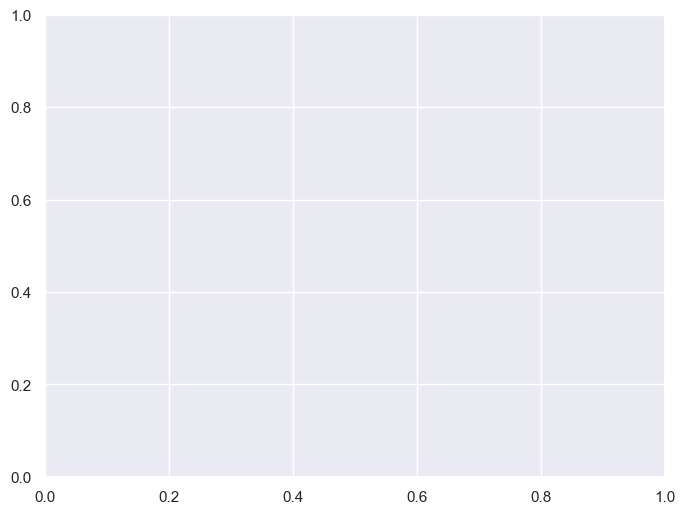

In [74]:
# load sample data
training = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_to_compare2_pemba['Model']=='ACCESS-CM2'].drop('Model',axis=1).rename(columns = {'Date':'time','Mean of the daily precipitation rate mm/day':'pcp'}).set_index('time') # training data is meant to represent data from a typical climate model 
targets = pr_obs_NOAA_to_compare_pemba.drop('Year',axis=1).rename(columns = {'DATE':'time','PRCP':'pcp'}).set_index('time') # the targets data is meant to represent our "observations"

# print a table of the training/targets data
#display(pd.concat({'training': training, 'targets': targets}, axis=1))
display(pd.DataFrame.merge(training,targets,on='time'))

# make a plot of the temperature and precipitation data
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8, 6), sharex=True) # nrows = 2 of temp
time_slice = slice('1990-01-01', '1990-12-31')

# plot-temperature
#training[time_slice]['tmax'].plot(ax=axes[0], label='training')
#targets[time_slice]['tmax'].plot(ax=axes[0], label='targets')
#axes[0].legend()
#axes[0].set_ylabel('Temperature [C]')

# plot-precipitation
i = 0 # 1 if temperature
training[time_slice]['pcp'].plot(ax=axes[0],label='training')
targets[time_slice]['pcp'].plot(ax=axes[0], label='targets')
axes[0].legend()
_ = axes[0].set_ylabel('Precipitation [mm/day]')

In [76]:
# exploratory data analysis for arrm model

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from mlinsights.mlmodel import PiecewiseRegressor

def ARRM(n_bins=7):
    return Pipeline([
        ('')
    ])


sns.set(style='whitegrid')
c = {'train': 'black', 'predict': 'blue', 'test': 'grey'}

qqwargs = {'n_quantiles': 1e6, 'copy': True, 'subsample': 1e6}
n_bins = 7

X = training[['tmax']]['1980': '2000'].values
y = targets[['tmax']]['1980': '2000'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
xqt = QuantileTransformer(**qqwargs).fit(X_train)
Xq_train = xqt.transform(X_train)
Xq_test = xqt.transform(X_test)

yqt = QuantileTransformer(**qqwargs).fit(y_train)
yq_train = xqt.transform(y_train)[:, 0]
yq_test = xqt.transform(y_test)[:, 0]


print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# model = PiecewiseRegressor(binner=KBinsDiscretizer(n_bins=n_bins, strategy='quantile'))
# model.fit(Xq_train, yq_train)
# predq = model.predict(Xq_test)
# pred = qt.inverse_transform(predq.reshape(-1, 1))

y_train = y_train[:, 0]
for strat in ['kmeans', 'uniform', 'quantile']:
    model = PiecewiseRegressor(binner=KBinsDiscretizer(n_bins=n_bins, strategy=strat))

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(strat, model.score(X_test, y_test))
    
model = PiecewiseRegressor(binner=KBinsDiscretizer(n_bins=n_bins, strategy='kmeans'))
model.fit(X_train, y_train)
pred = model.predict(X_test)


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(X_train, y_train, c=c['train'], s=5, label='train')
plt.scatter(X_test, y_test, c=c['test'], s=5, label='test')
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.sort(X_train, axis=0), np.sort(y_train, axis=0), c=c['train'], s=5, label='train')
plt.scatter(np.sort(X_test, axis=0), np.sort(y_test, axis=0), c=c['test'], s=5, label='test')
plt.plot(np.sort(X_test, axis=0), np.sort(pred, axis=0), c=c['predict'], lw=2, label='predictions')
ax.legend()

# fig, ax = plt.subplots(1, 1)
# ax.plot(Xq_test[:, 0], yq_test, ".", label='data', c=c['test'])
# ax.plot(Xq_test[:, 0], predq, ".", label="predictions", c=c['predict'])
# ax.set_title(f"Piecewise Linear Regression\n{n_bins} buckets")
# ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(X_test[:, 0], y_test, ".", label='data', c=c['test'])
ax.plot(X_test[:, 0], pred, ".", label="predictions", c=c['predict'])
ax.set_title(f"Piecewise Linear Regression\n{n_bins} buckets")
ax.legend()

[autoreload of pkg_resources failed: Traceback (most recent call last):
  File "C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\site-packages\pkg_resources\__init__.py", line 136, in <module>
    parse_version = packaging.version.Version
AttributeError: module 'pkg_resources._vendor.packag

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\site-packages\sklearn\utils\fixes.py)